In [1]:
from data_aquisition import twitter_data
import datetime as dt
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 10000
pd.set_option('display.max_colwidth', 40)
pd.options.display.max_columns = 10000

In [34]:
start_date = dt.date(year=2021, month=3, day=21)
end_date = dt.date(year=2021, month=3, day=24)

In [3]:
# test_df = twitter_data.generate_df(['DPLN'], start_date, None)
# Parquet isn't working with nested features
# test_df = pd.read_parquet('DLPN_2021_3_19_to_2021_3_24.parquet')
# Reading from pickle file
test_df = pd.read_pickle('DLPN_2021_03_20_to_2021_03_28.pkl')

In [4]:
test_df.index.min()

Timestamp('2021-03-20 18:30:27+0000', tz='UTC')

In [5]:
test_df.index.max()

Timestamp('2021-03-28 19:34:35+0000', tz='UTC')

In [6]:
test_df.head()

contributors coordinates  \
created_at                                           
2021-03-28 19:34:35+00:00         None        None   
2021-03-28 19:34:01+00:00         None        None   
2021-03-28 19:23:19+00:00         None        None   
2021-03-28 17:57:04+00:00         None        None   
2021-03-28 16:44:54+00:00         None        None   

                                                entities.hashtags  \
created_at                                                          
2021-03-28 19:34:35+00:00  [{'text': '작대기', 'indices': [55, 59]}]   
2021-03-28 19:34:01+00:00                                      []   
2021-03-28 19:23:19+00:00                                      []   
2021-03-28 17:57:04+00:00                                      []   
2021-03-28 16:44:54+00:00                                      []   

                                                    entities.media  \
created_at                                                           
2021-03-28 19:34:35+00:00  [{'id': 1376256401777909771, 'id_str...   
2021-03-28 19:34:01+00:00                                      NaN   
2021-03-28 19:23:19+00:00                                      NaN   
2021-03-28 17:57:04+00:00                                      NaN   
2021-03-28 16:44:54+00:00                                      NaN   

                                                  entities.symbols  \
created_at                                                           
2021-03-28 19:34:35+00:00     [{'text': 'd', 'indices': [61, 63]}]   
2021-03-28 19:34:01+00:00  [{'text': 'KNDI', 'indices': [88, 93...   
2021-03-28 19:23:19+00:00  [{'text': 'JE', 'indices': [112, 115]}]   
2021-03-28 17:57:04+00:00  [{'text': 'IRM', 'indices': [58, 62]...   
2021-03-28 16:44:54+00:00     [{'text': 'd', 'indices': [80, 82]}]   

                                                     entities.urls  \
created_at                                                           
2021-03-28 19:34:35+00:00                                       []   
2021-03-28 19:34:01+00:00  [{'url': 'https://t.co/iFDDBCSyo8', ...   
2021-03-28 19:23:19+00:00  [{'url': 'https://t.co/Ng11sJiSMA', ...   
2021-03-28 17:57:04+00:00  [{'url': 'https://t.co/Whe1ZpUKRh', ...   
2021-03-28 16:44:54+00:00                                       []   

                                            entities.user_mentions  \
created_at                                                           
2021-03-28 19:34:35+00:00                                       []   
2021-03-28 19:34:01+00:00                                       []   
2021-03-28 19:23:19+00:00                                       []   
2021-03-28 17:57:04+00:00  [{'screen_name': 'ChartingOptions', ...   
2021-03-28 16:44:54+00:00  [{'screen_name': 'OTC_Bitcoin', 'nam...   

                                           extended_entities.media  \
created_at                                                           
2021-03-28 19:34:35+00:00  [{'id': 1376256401777909771, 'id_str...   
2021-03-28 19:34:01+00:00                                      NaN   
2021-03-28 19:23:19+00:00                                      NaN   
2021-03-28 17:57:04+00:00                                      NaN   
2021-03-28 16:44:54+00:00                                      NaN   

                           favorite_count  favorited   geo  \
created_at                                                   
2021-03-28 19:34:35+00:00               0      False  None   
2021-03-28 19:34:01+00:00               0      False  None   
2021-03-28 19:23:19+00:00               0      False  None   
2021-03-28 17:57:04+00:00               2      False  None   
2021-03-28 16:44:54+00:00               0      False  None   

                                            id               id_str  \
created_at                                                            
2021-03-28 19:34:35+00:00  1376256422346780675  1376256422346780675   
2021-03-28 19:34:01+00:00  1376256279333593089  137625627933

In [7]:
print(test_df.shape)

(1169, 298)


In [8]:
test_df.dtypes

contributors                                                               object
coordinates                                                                object
entities.hashtags                                                          object
entities.media                                                             object
entities.symbols                                                           object
entities.urls                                                              object
entities.user_mentions                                                     object
extended_entities.media                                                    object
favorite_count                                                              int64
favorited                                                                    bool
geo                                                                        object
id                                                                          int64
id_str          

In [9]:
# Filter to ints and bool
test_df = test_df.select_dtypes(include=['float64', 'int64', 'bool'])

In [10]:
test_df.dtypes

favorite_count                                                int64
favorited                                                      bool
id                                                            int64
in_reply_to_status_id                                       float64
in_reply_to_user_id                                         float64
is_quote_status                                                bool
quoted_status.contributors                                  float64
quoted_status.coordinates                                   float64
quoted_status.favorite_count                                float64
quoted_status.geo                                           float64
quoted_status.id                                            float64
quoted_status.in_reply_to_status_id                         float64
quoted_status.in_reply_to_user_id                           float64
quoted_status.place                                         float64
quoted_status.quoted_status_id                  

In [ ]:
# Drop nulls
test_df.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


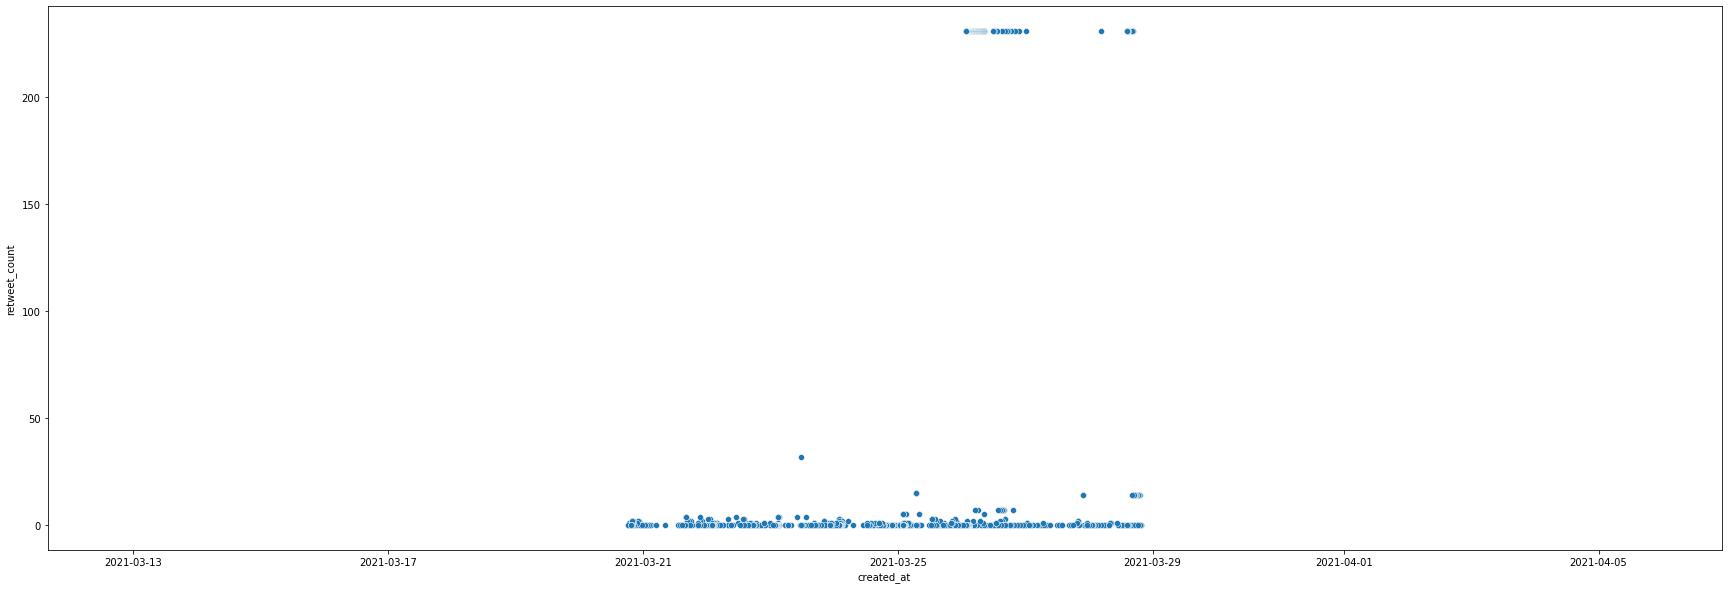

In [11]:
# First look at retweets
plt.figure(figsize=(30,10))
sns.scatterplot(data=test_df, x=test_df.index, y="retweet_count")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


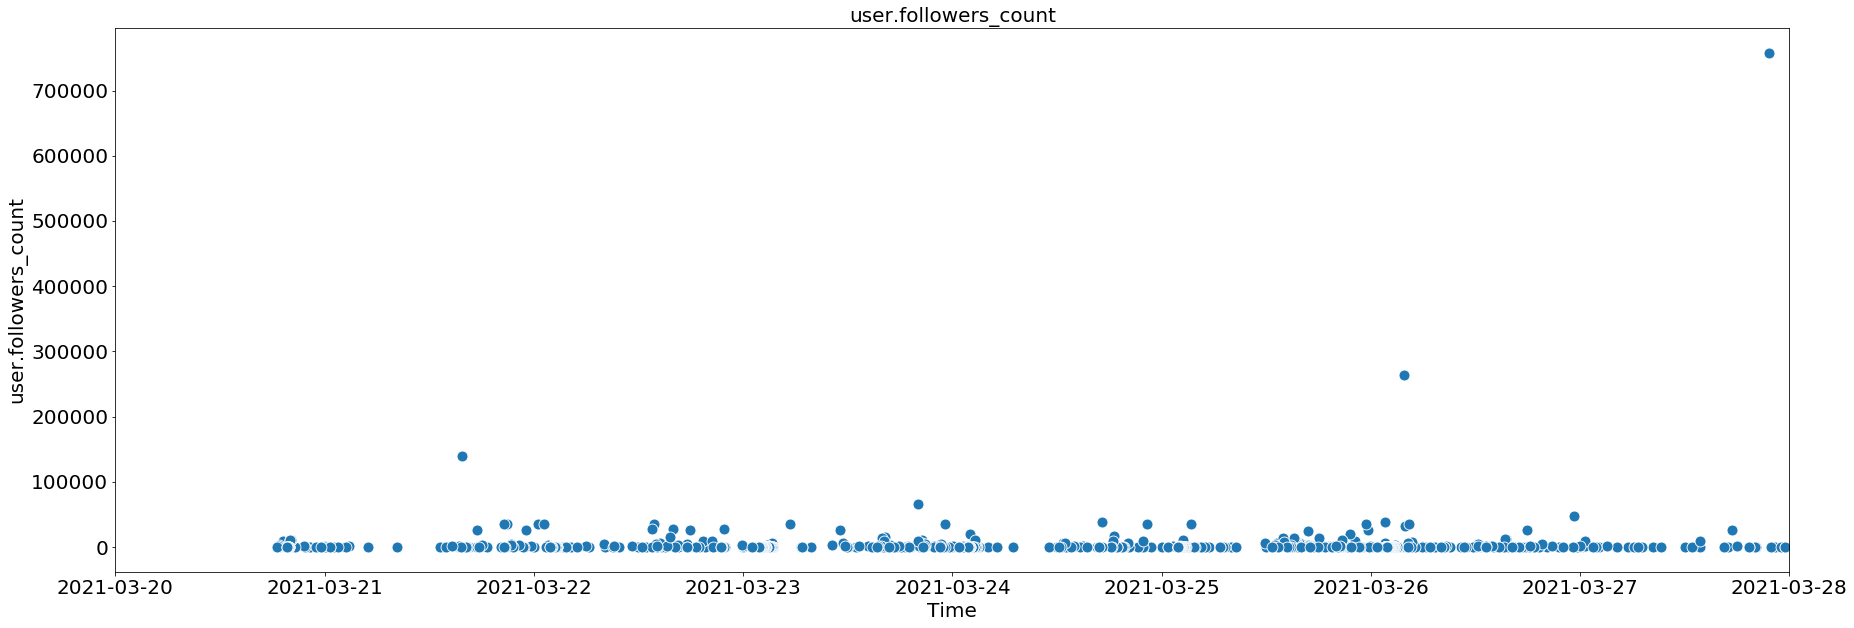

In [13]:
fig, ax = plt.subplots(figsize=(30,10))
sns.scatterplot(data=test_df, x=test_df.index, y="user.followers_count", s=120)
ax.set_xlim('2021-03-20','2021-03-28')
ax.set_title("user.followers_count",fontsize=20)
ax.set_xlabel("Time",fontsize=20)
ax.set_ylabel("user.followers_count",fontsize=20)
ax.tick_params(labelsize=20)
fig.show()

In [16]:
# Functionizing this
def plot_vs_time(col, start_date, end_date):
    fig, ax = plt.subplots(figsize=(30,10))
    sns.scatterplot(data=test_df, x=test_df.index, y=col, s=120)
    ax.set_xlim(start_date, end_date)
    ax.set_title(col,fontsize=20)
    ax.set_xlabel("Time",fontsize=20)
    ax.set_ylabel(col,fontsize=20)
    ax.tick_params(labelsize=20)
    fig.show()

In [14]:
test_df_num = test_df.select_dtypes(include=['float64', 'int64'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where e

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where e

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume 

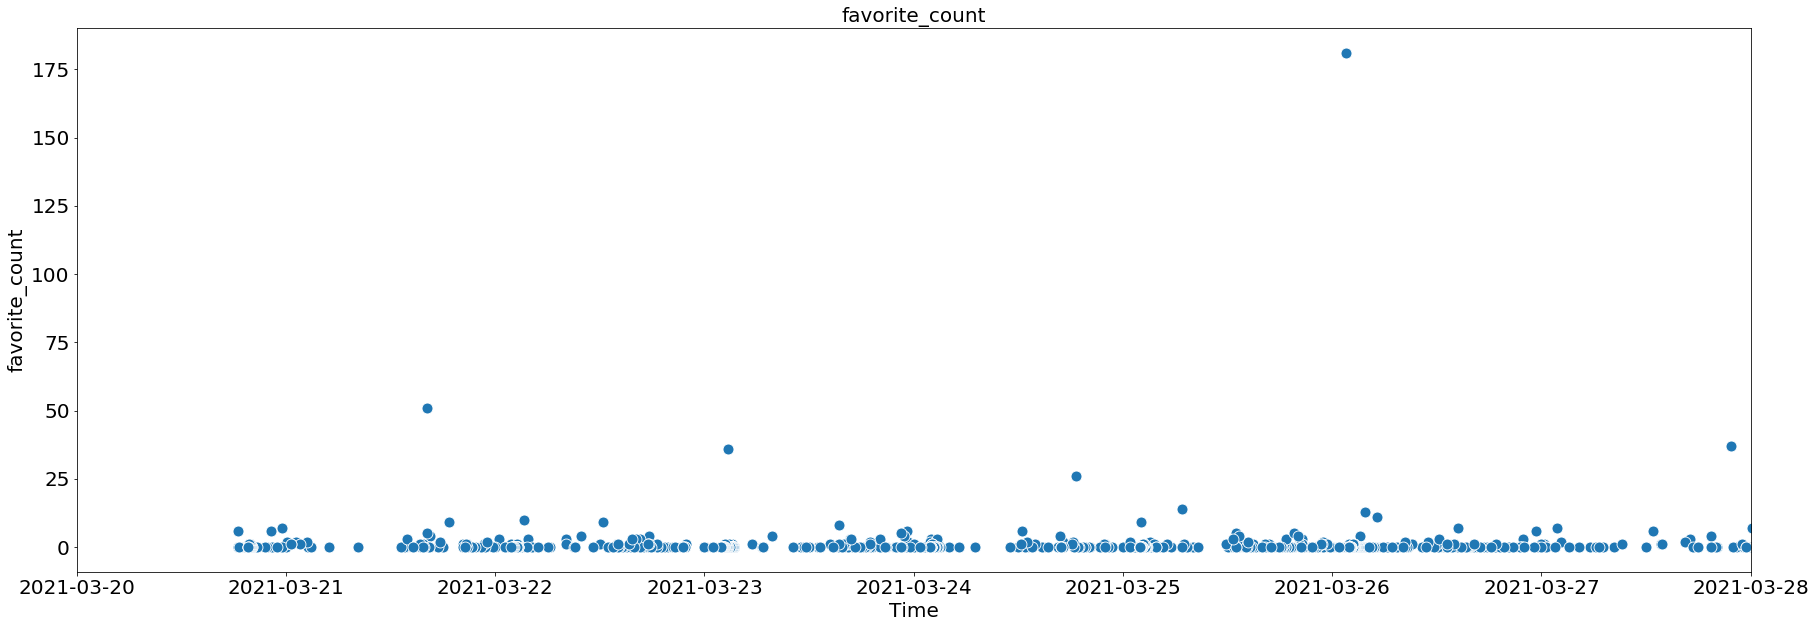

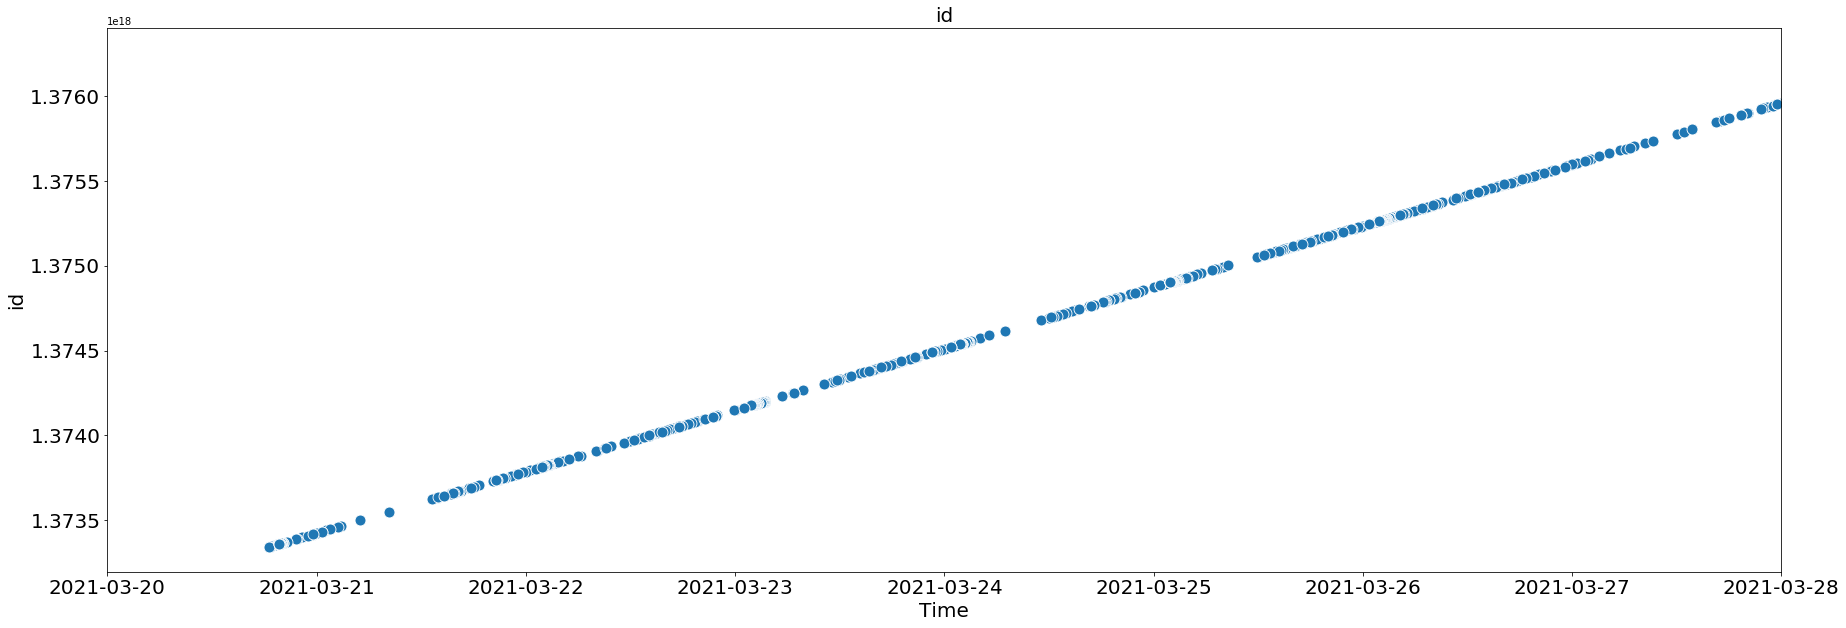

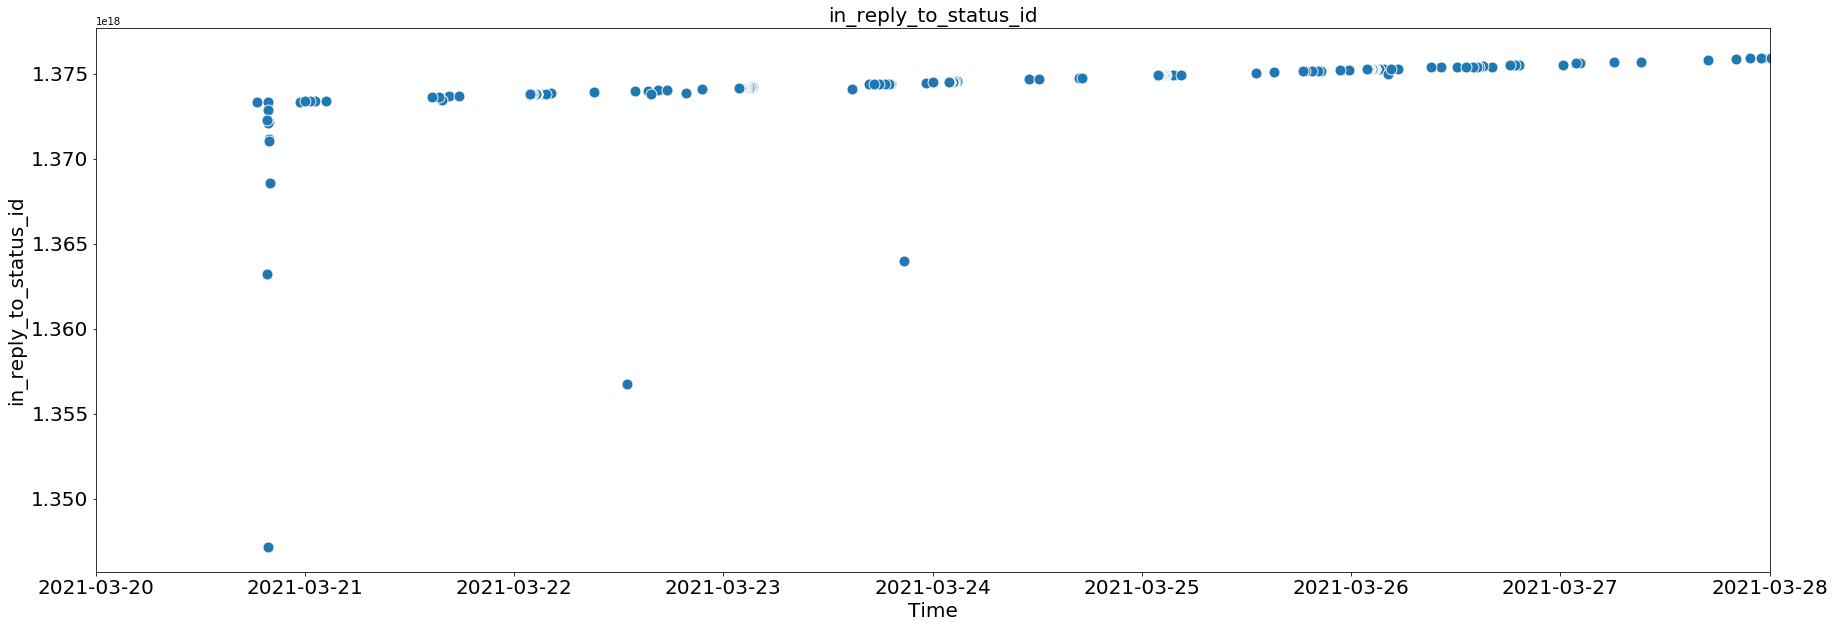

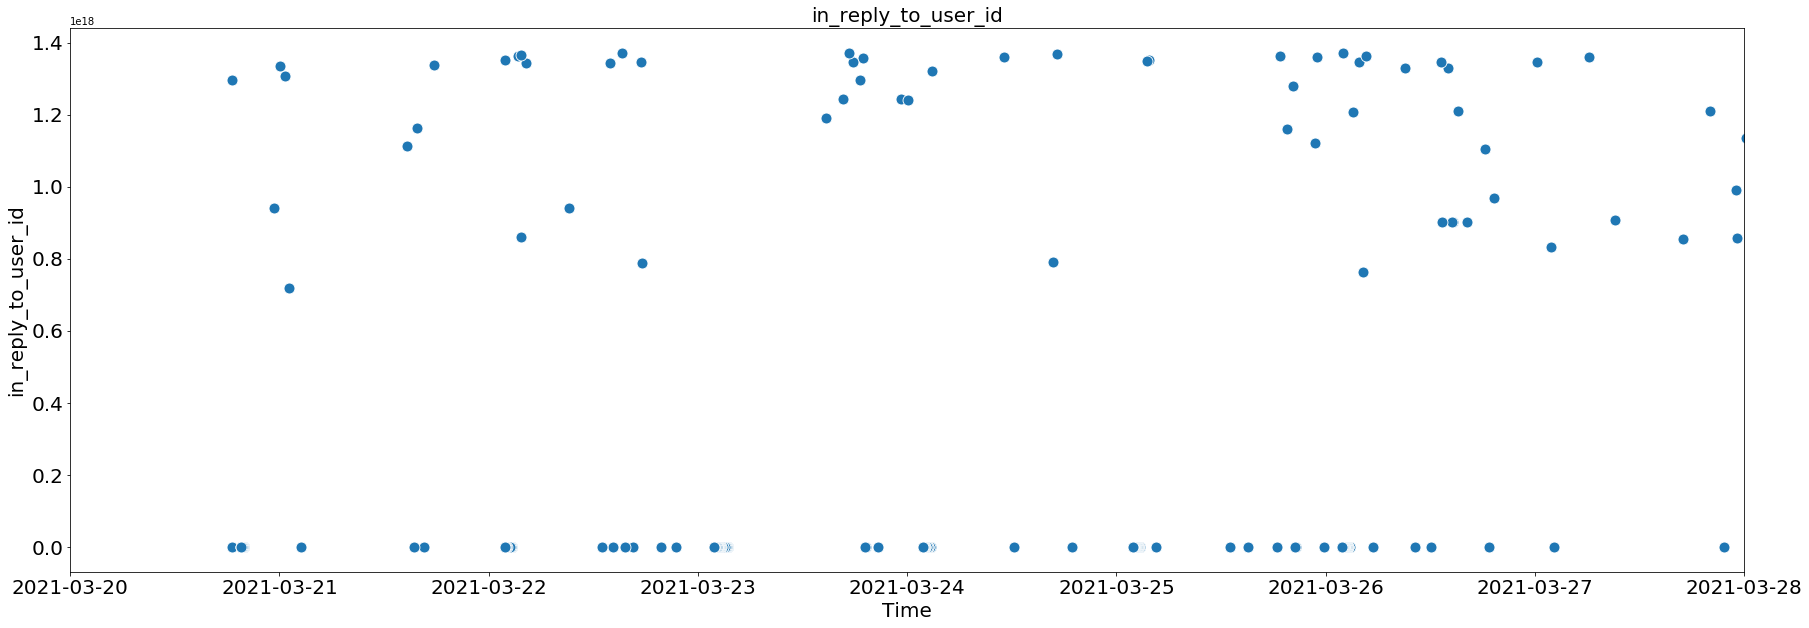

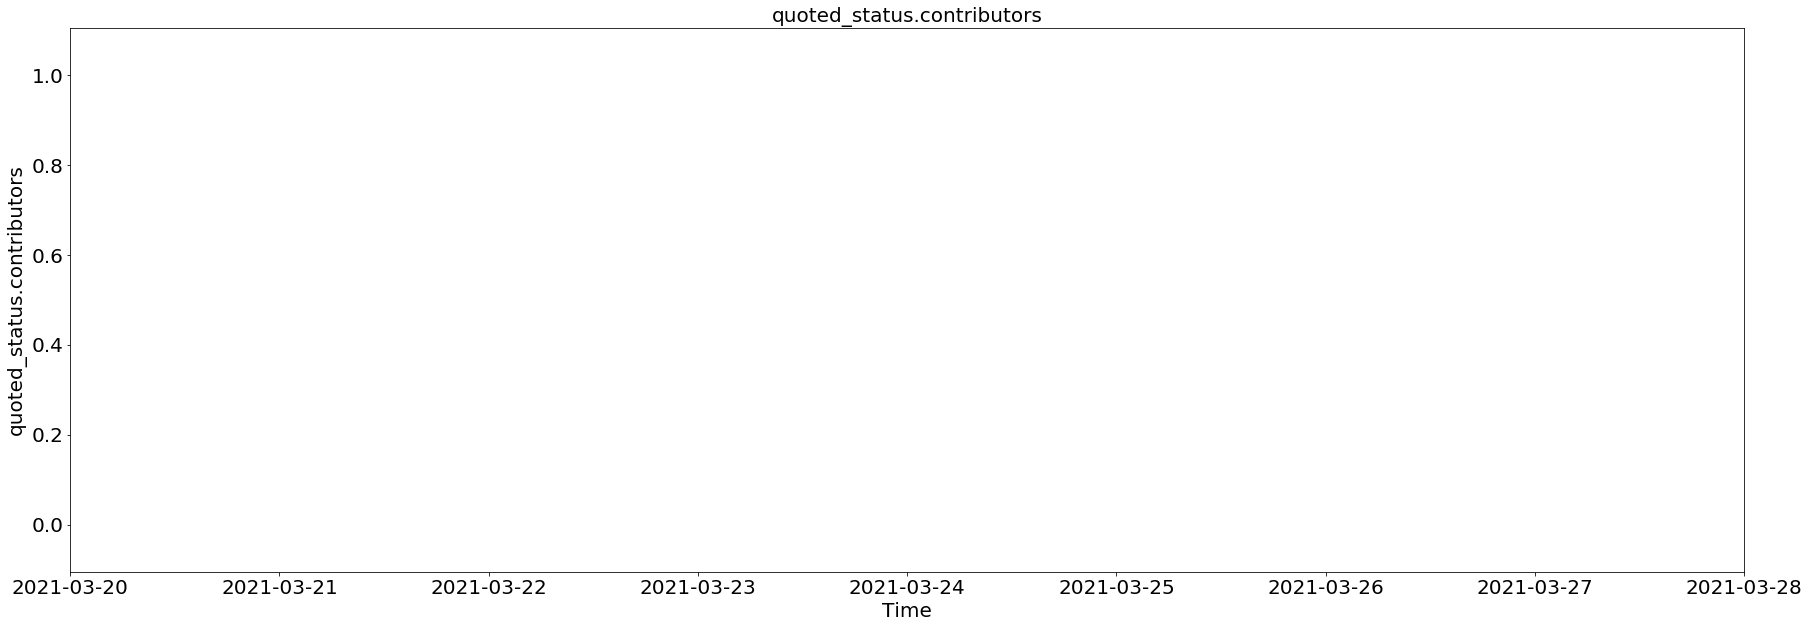

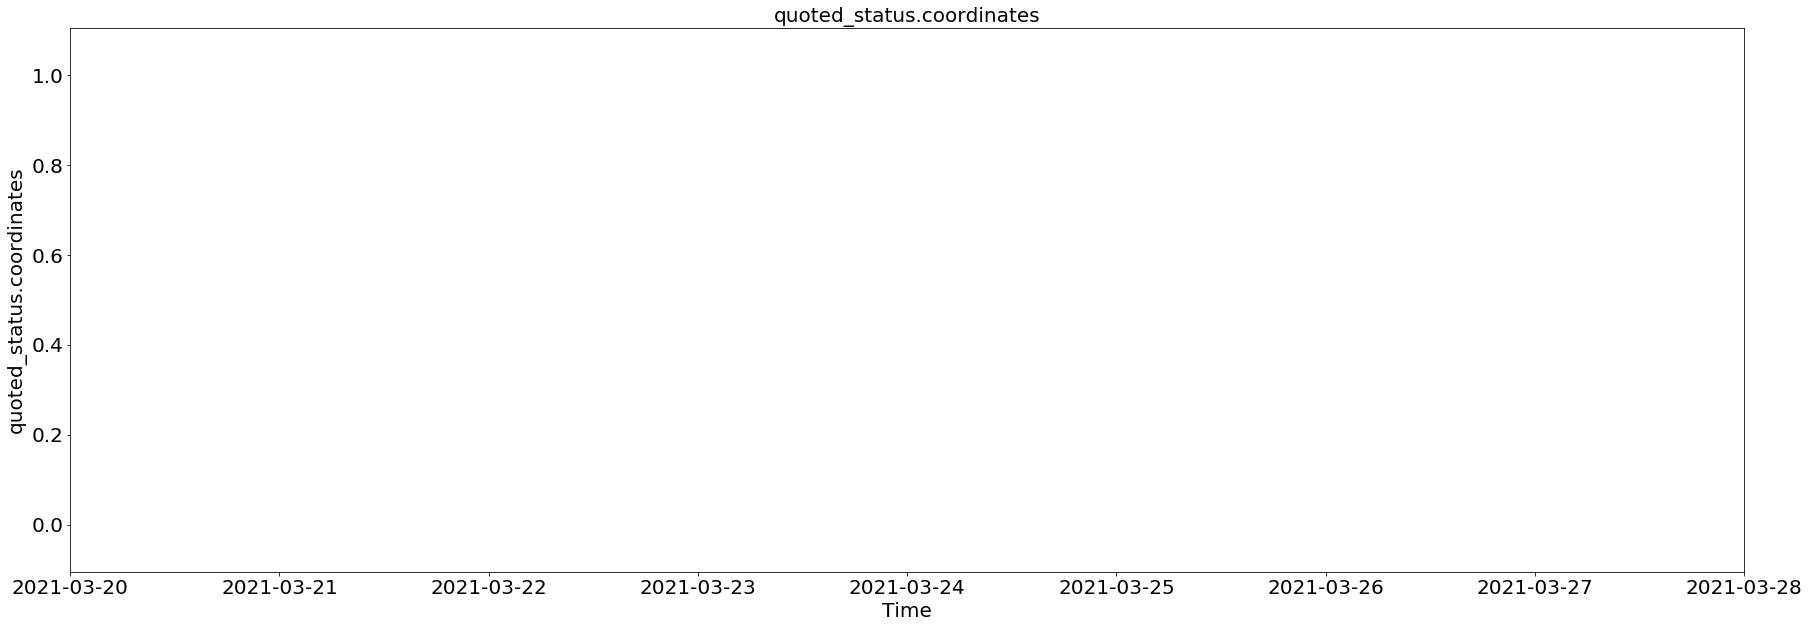

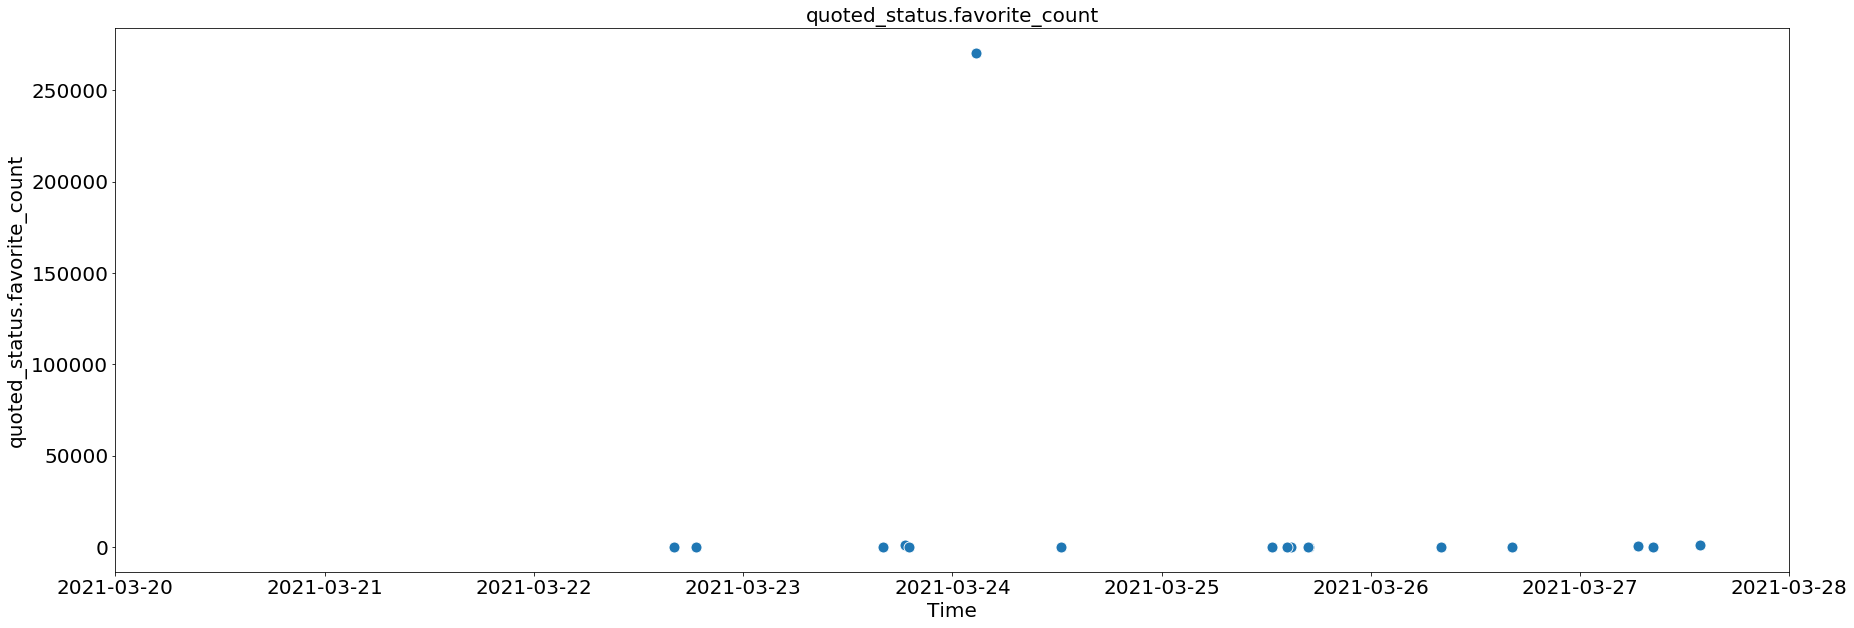

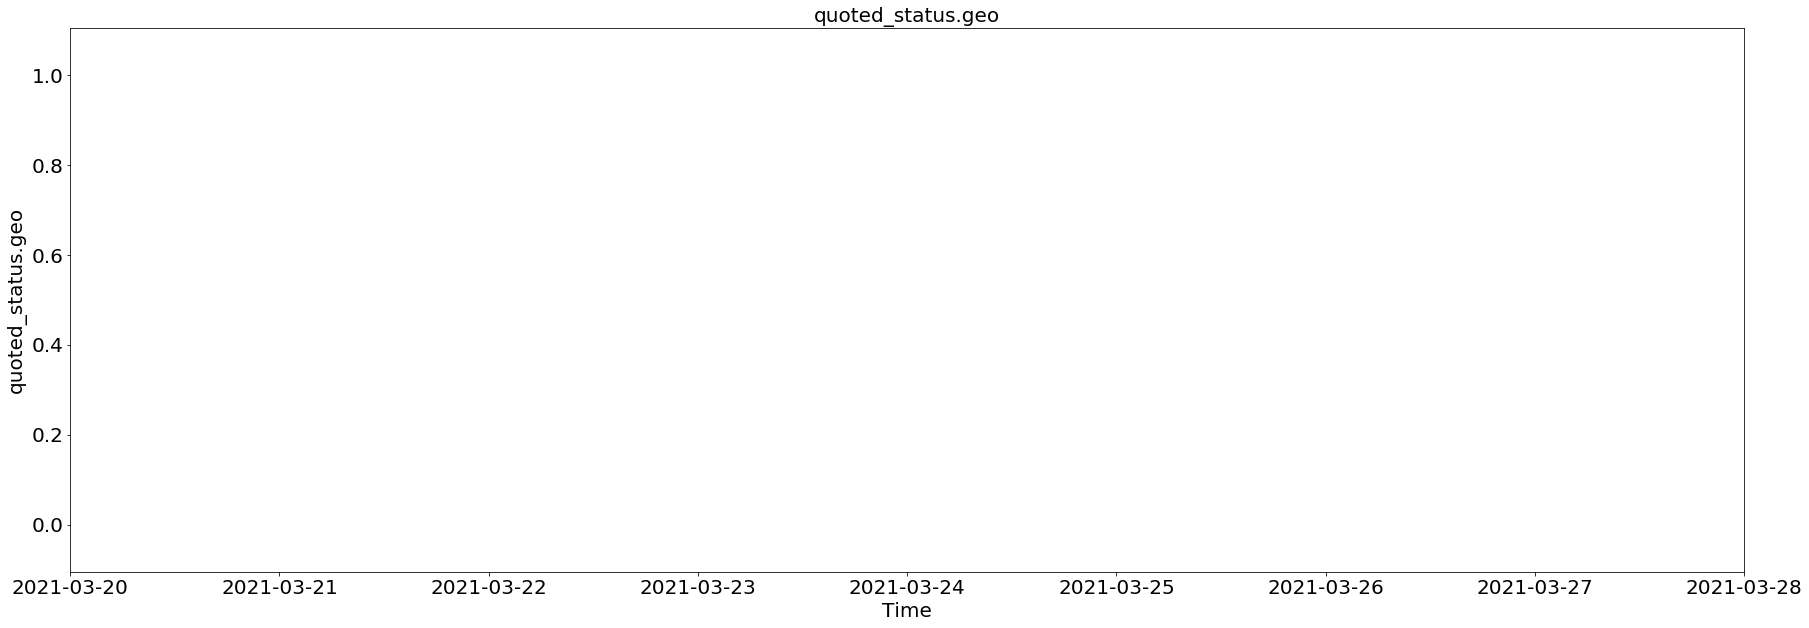

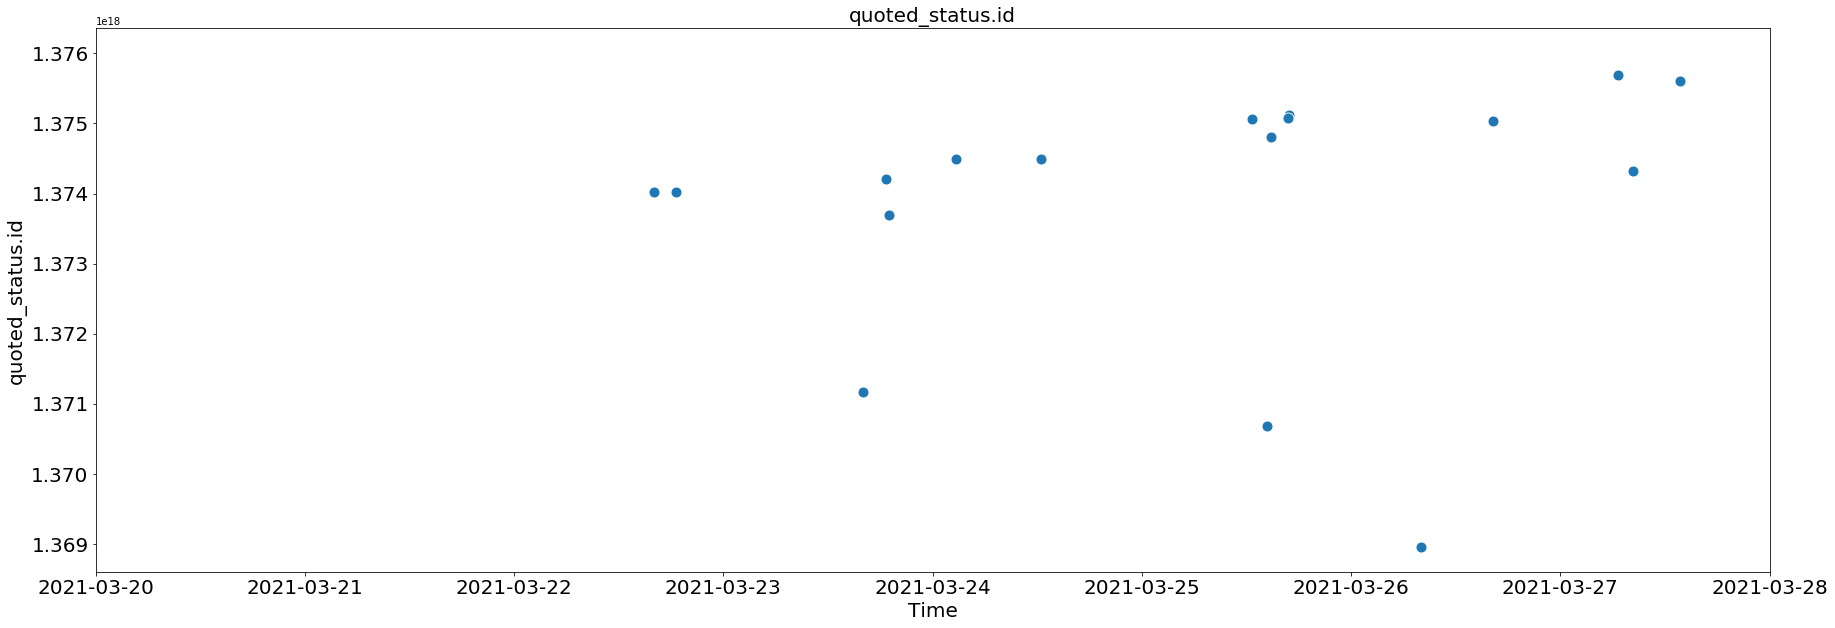

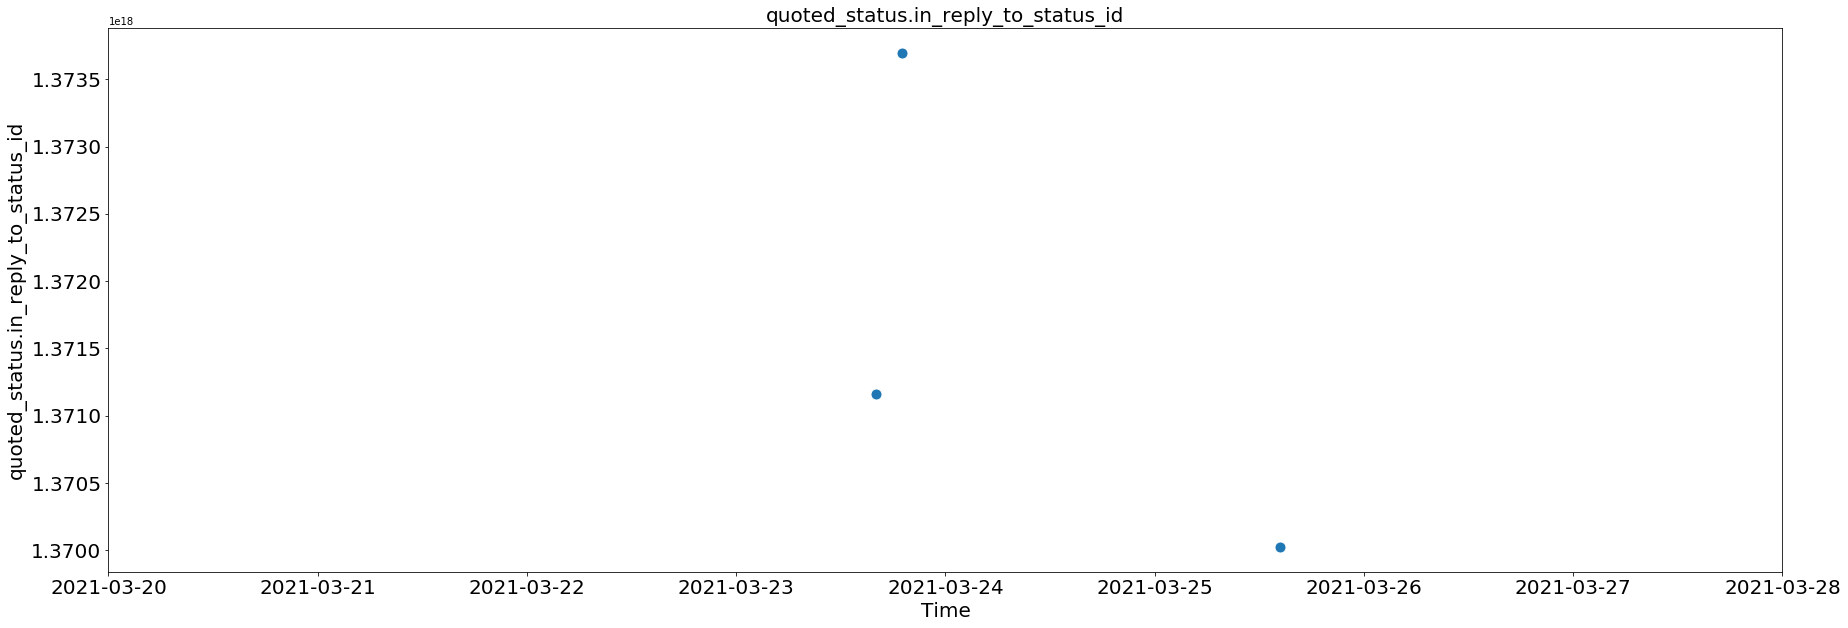

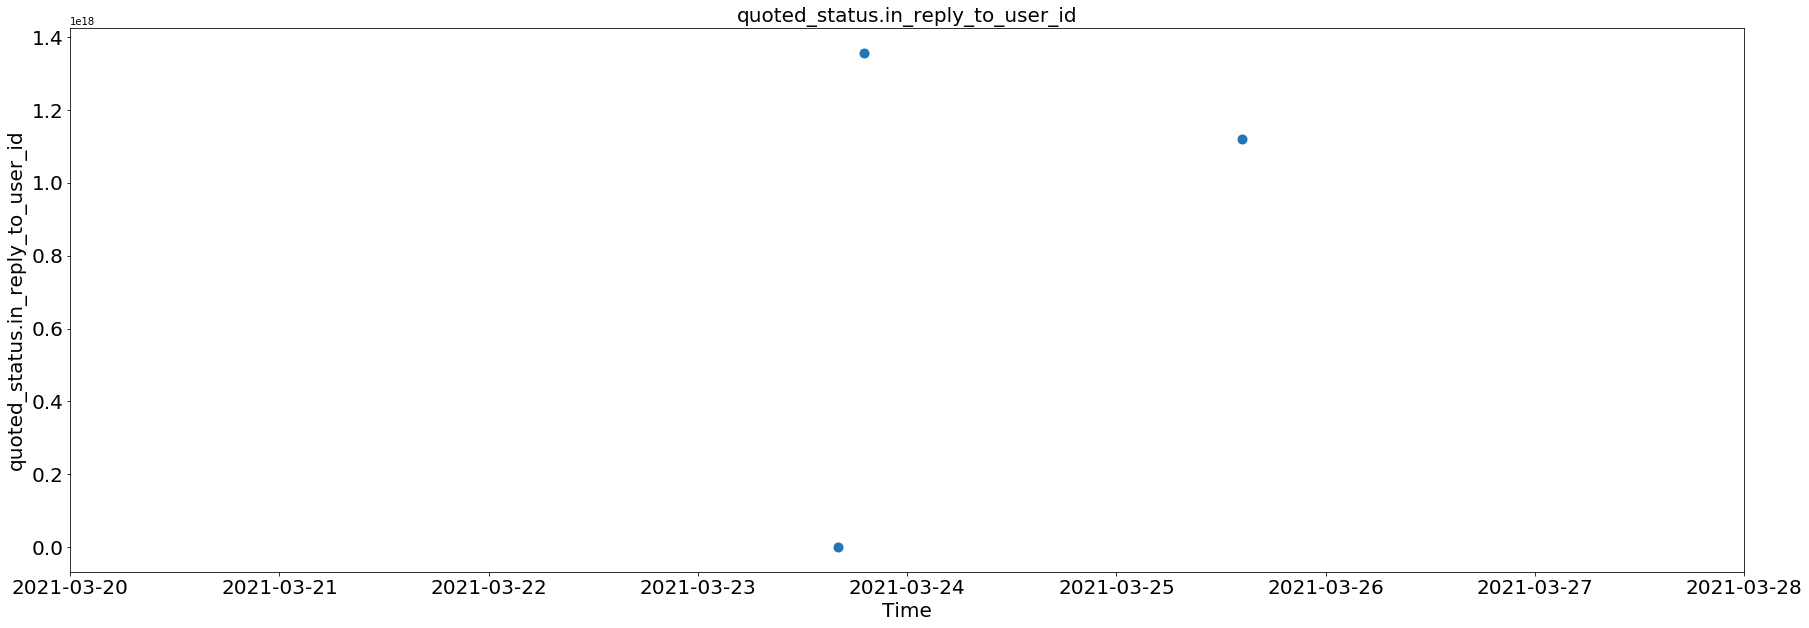

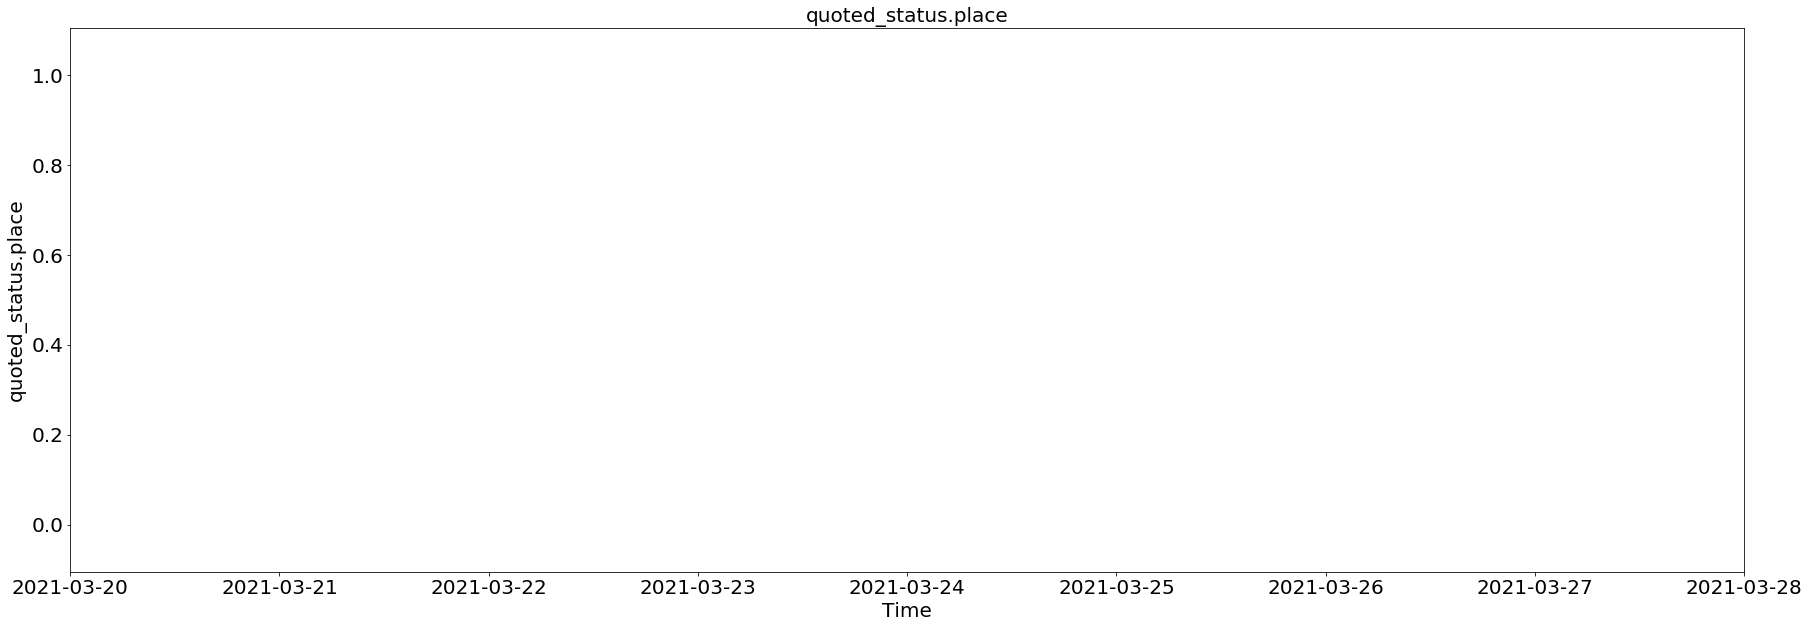

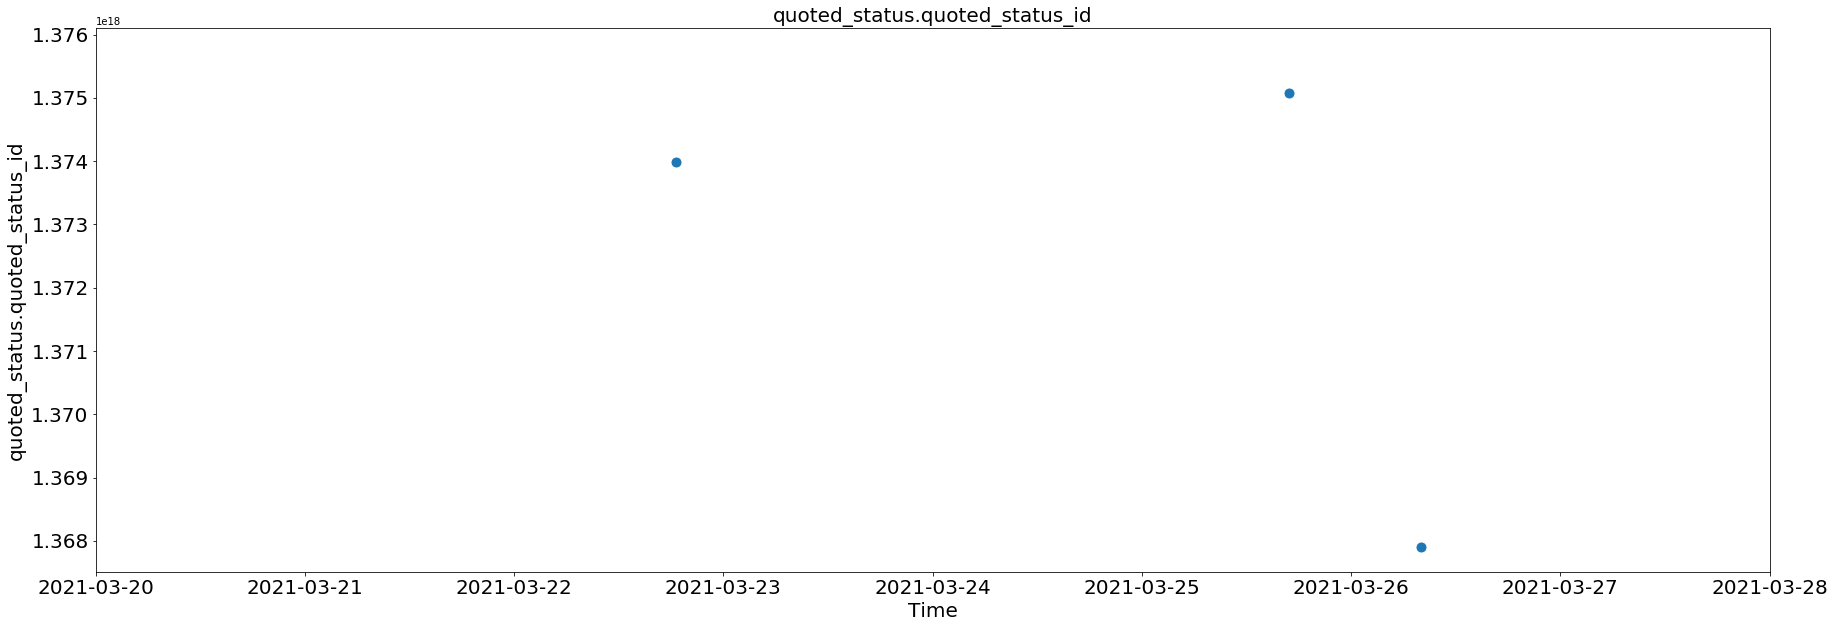

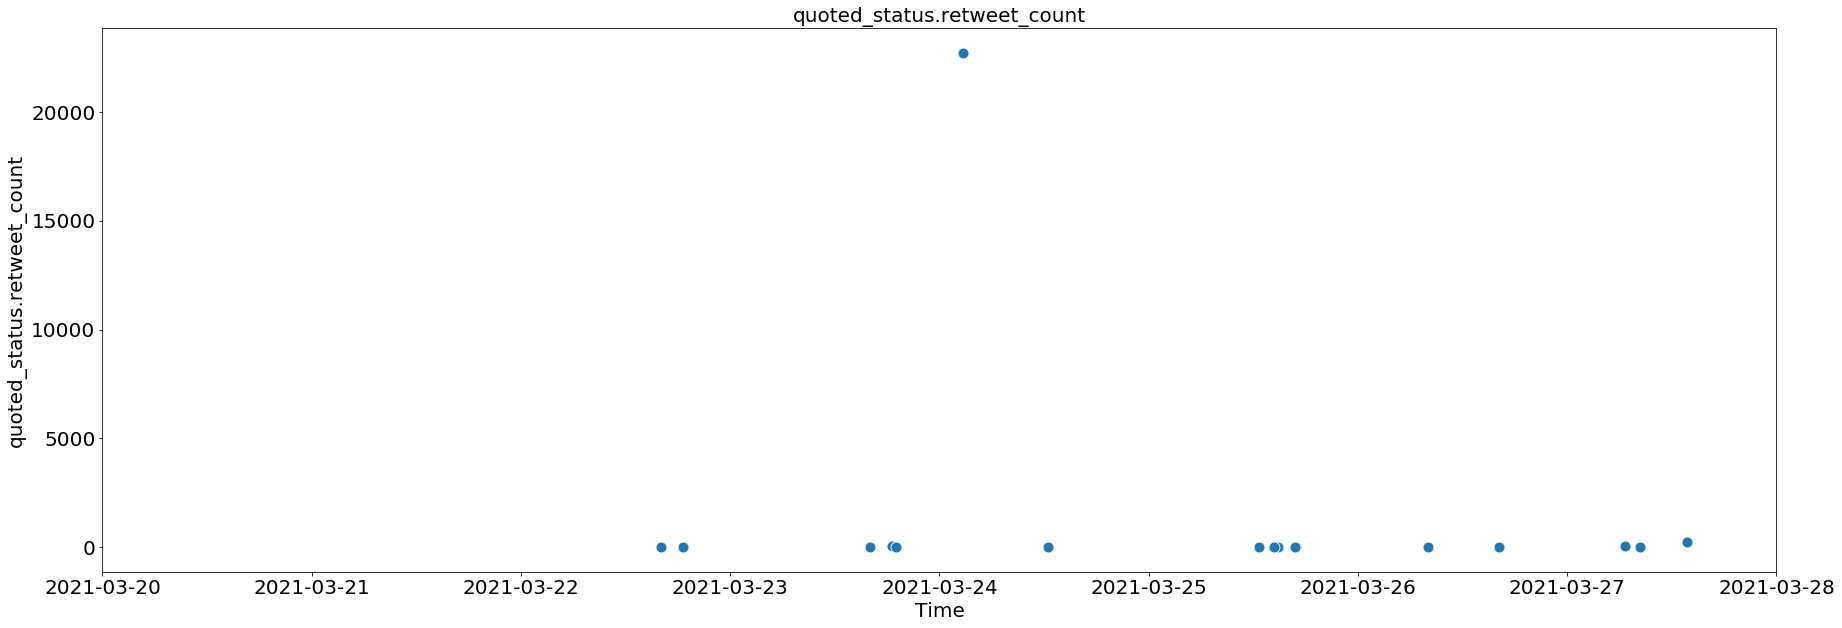

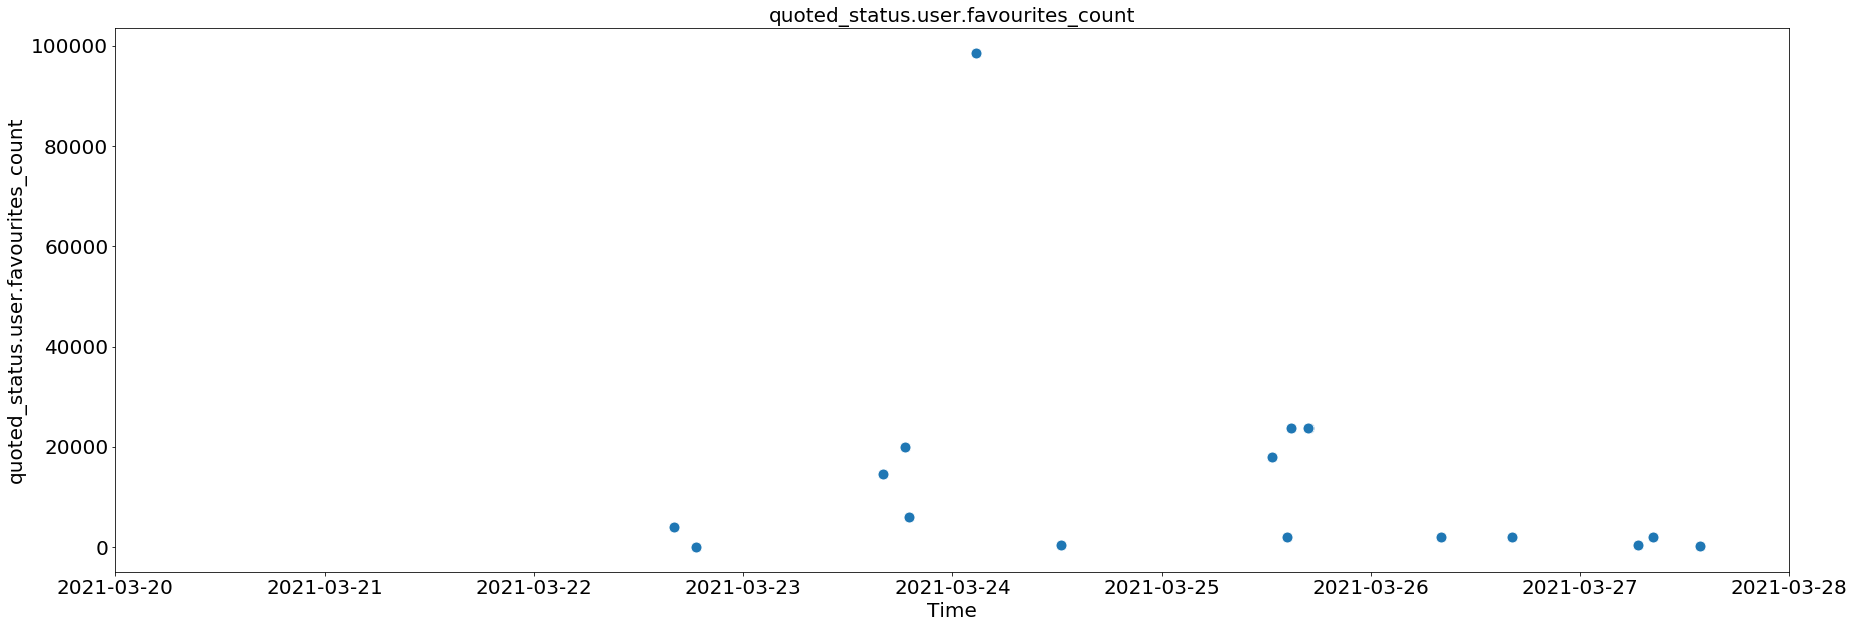

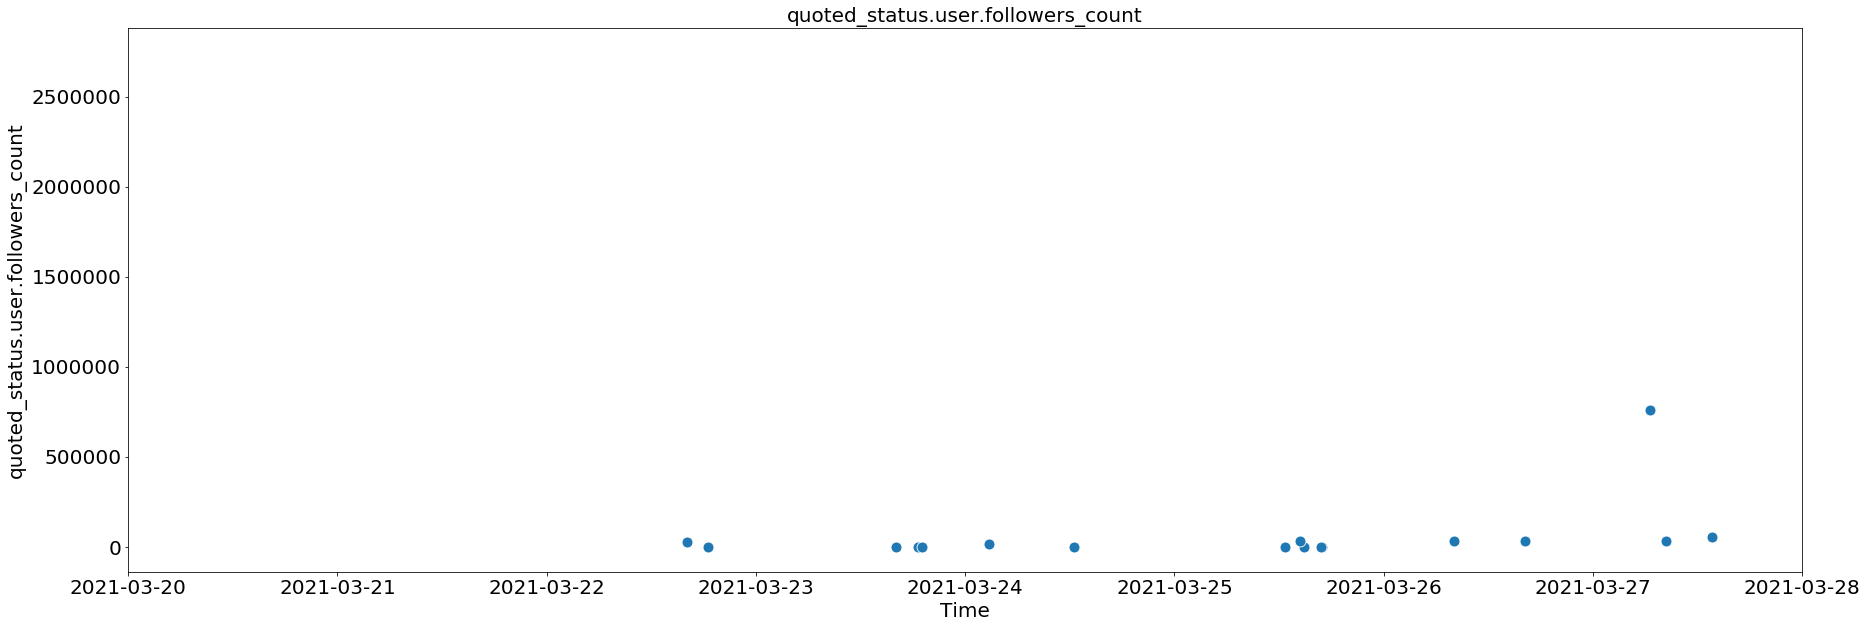

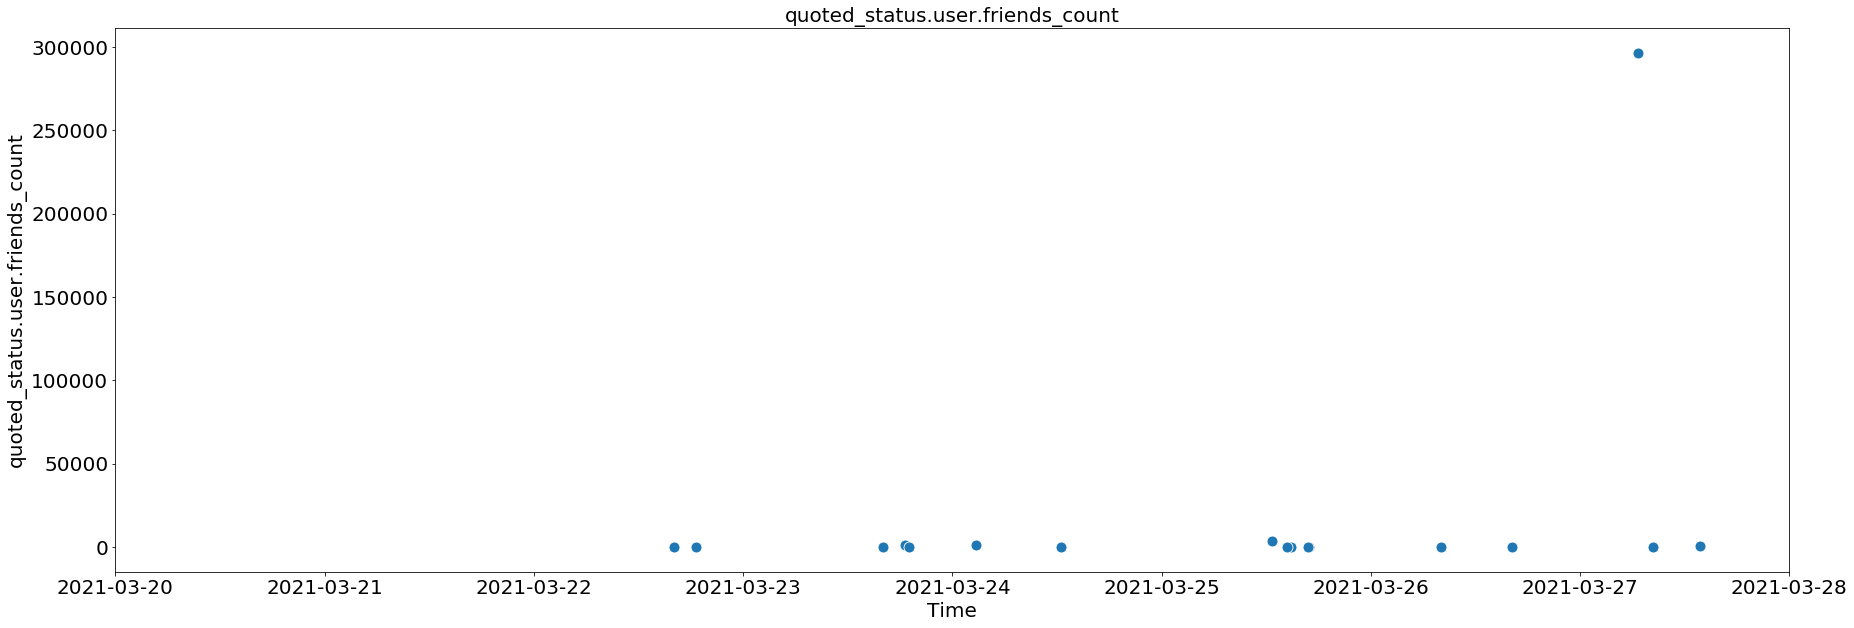

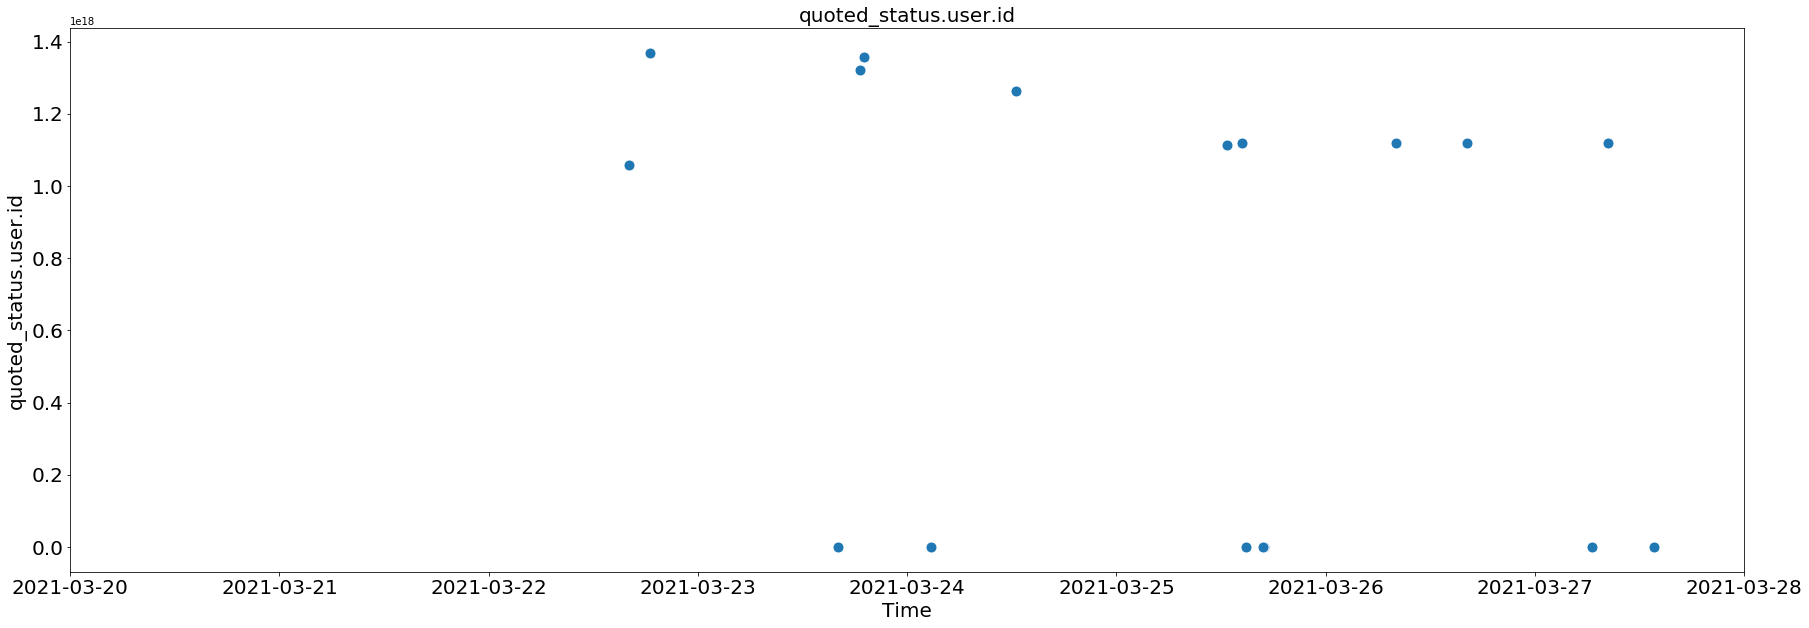

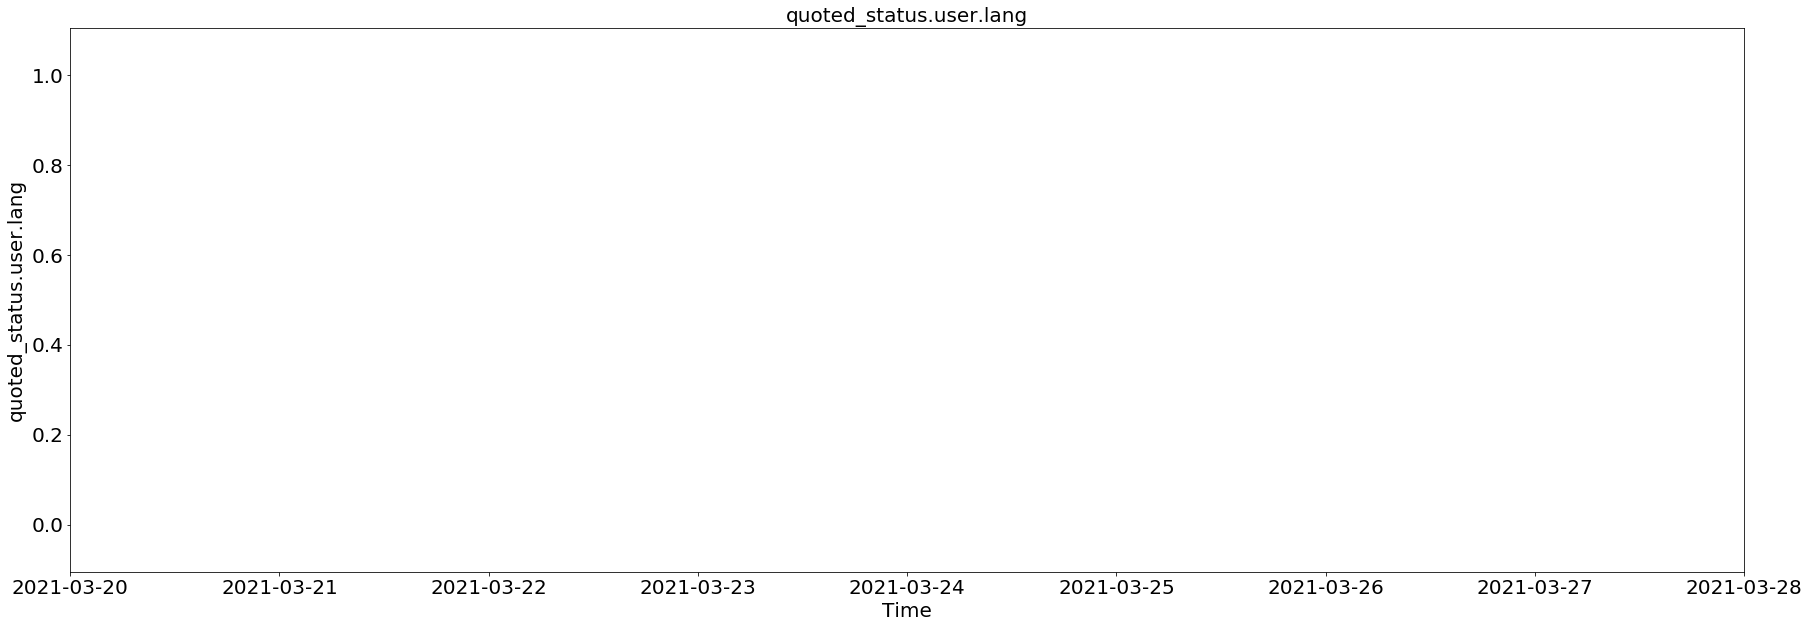

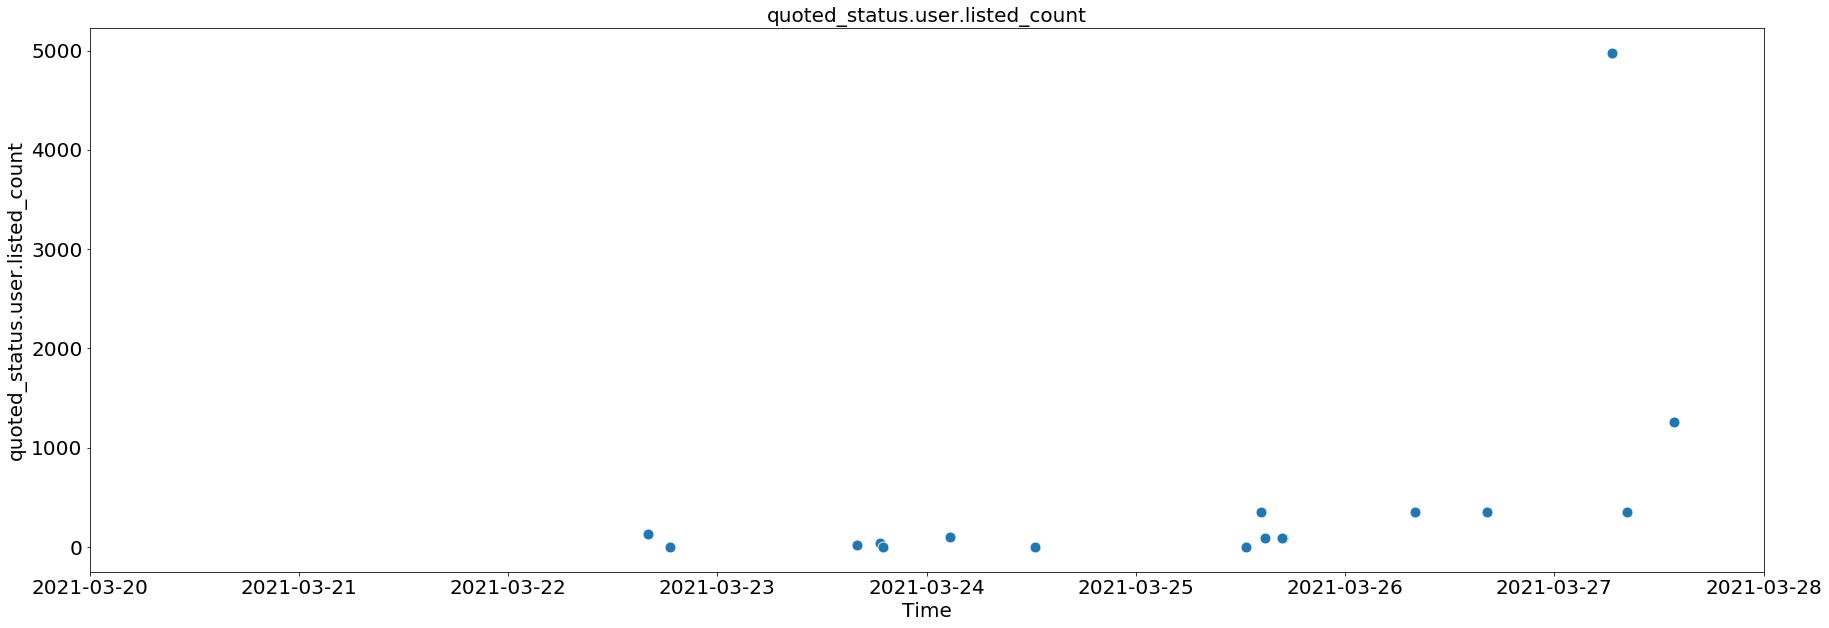

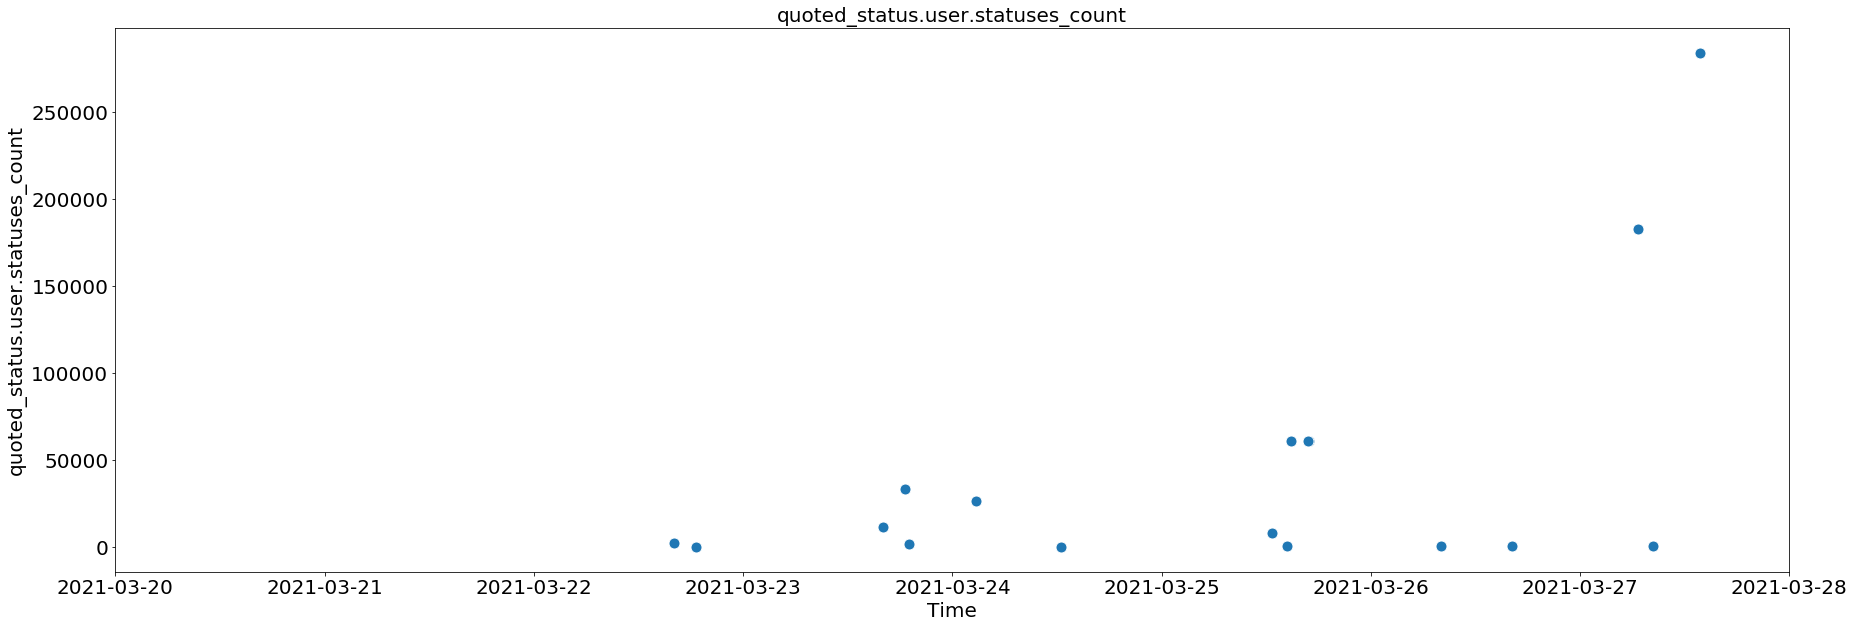

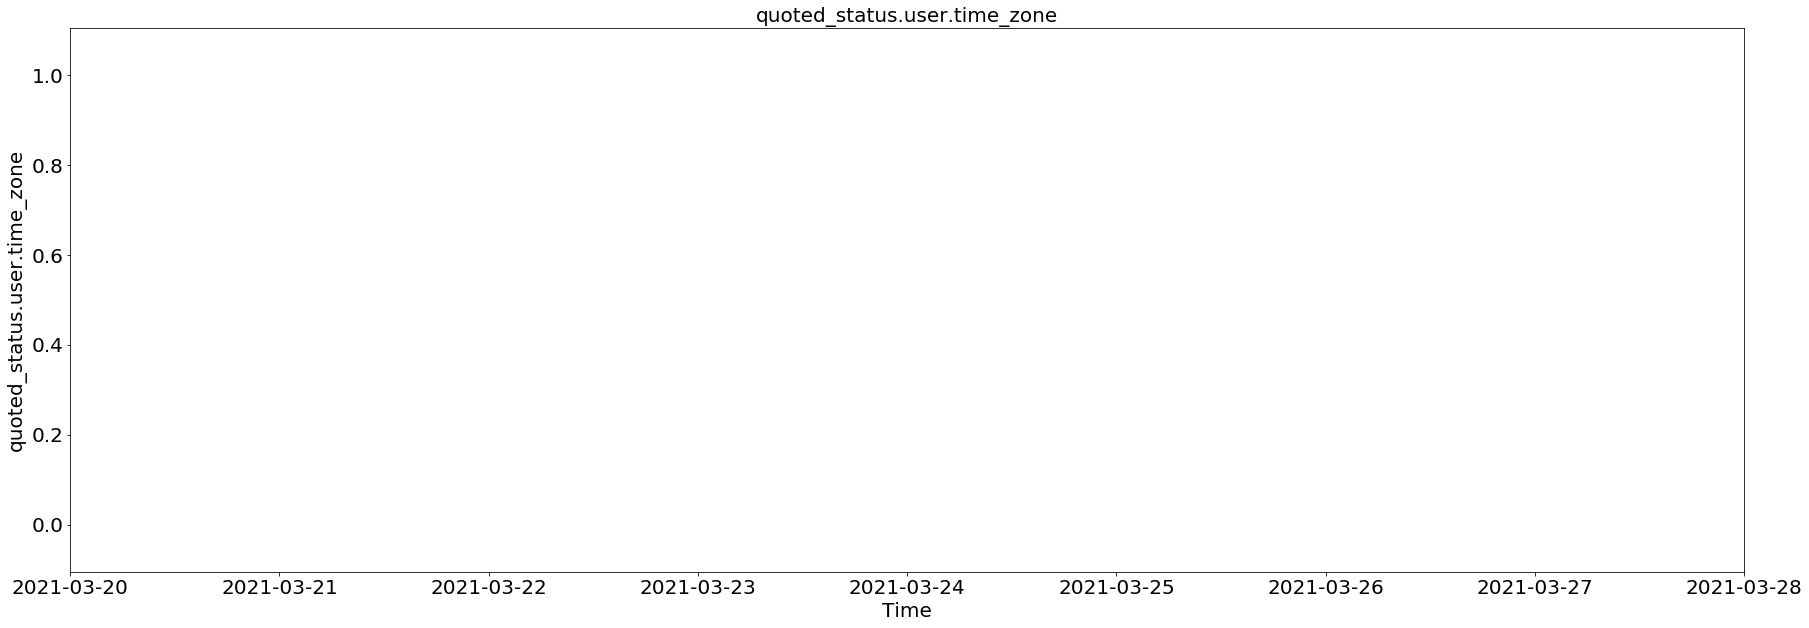

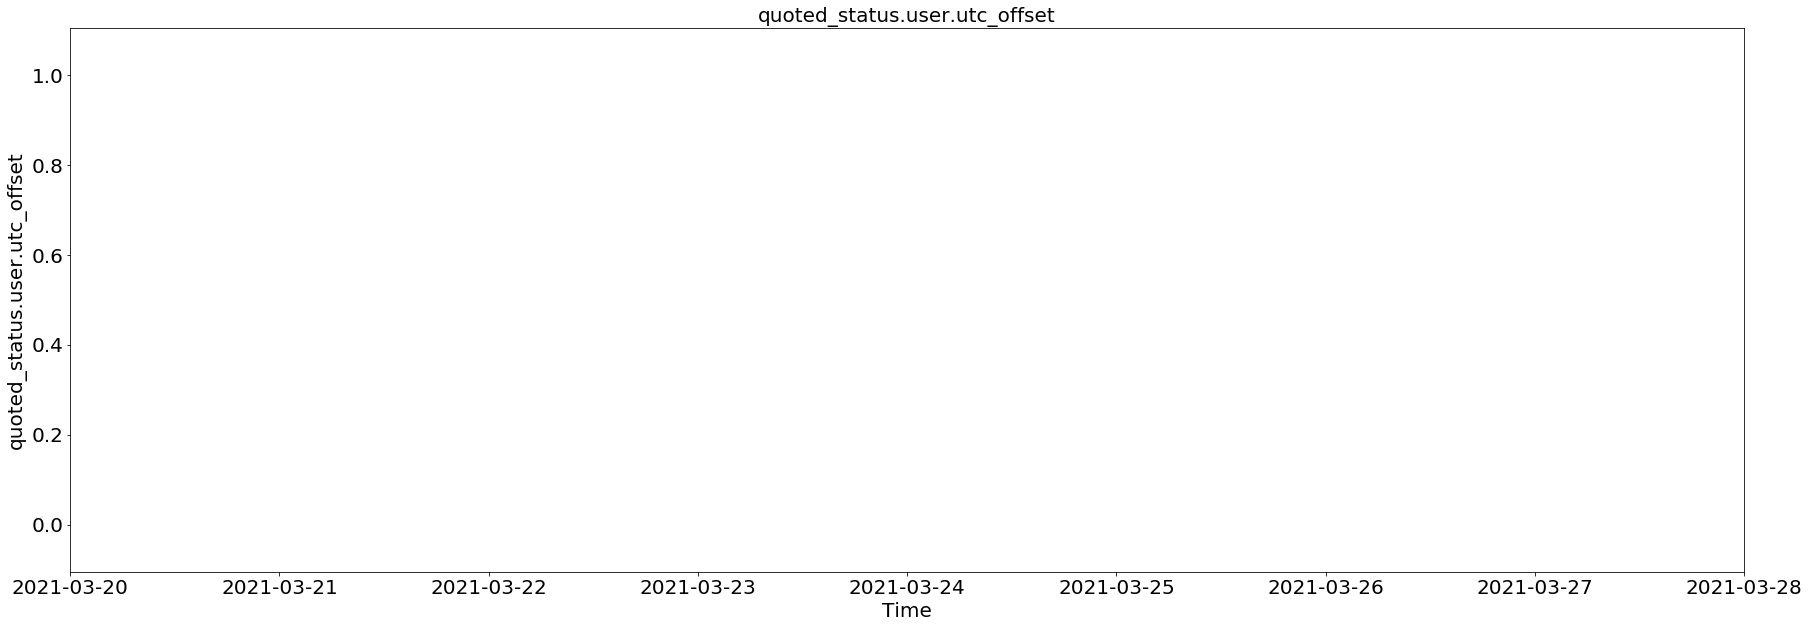

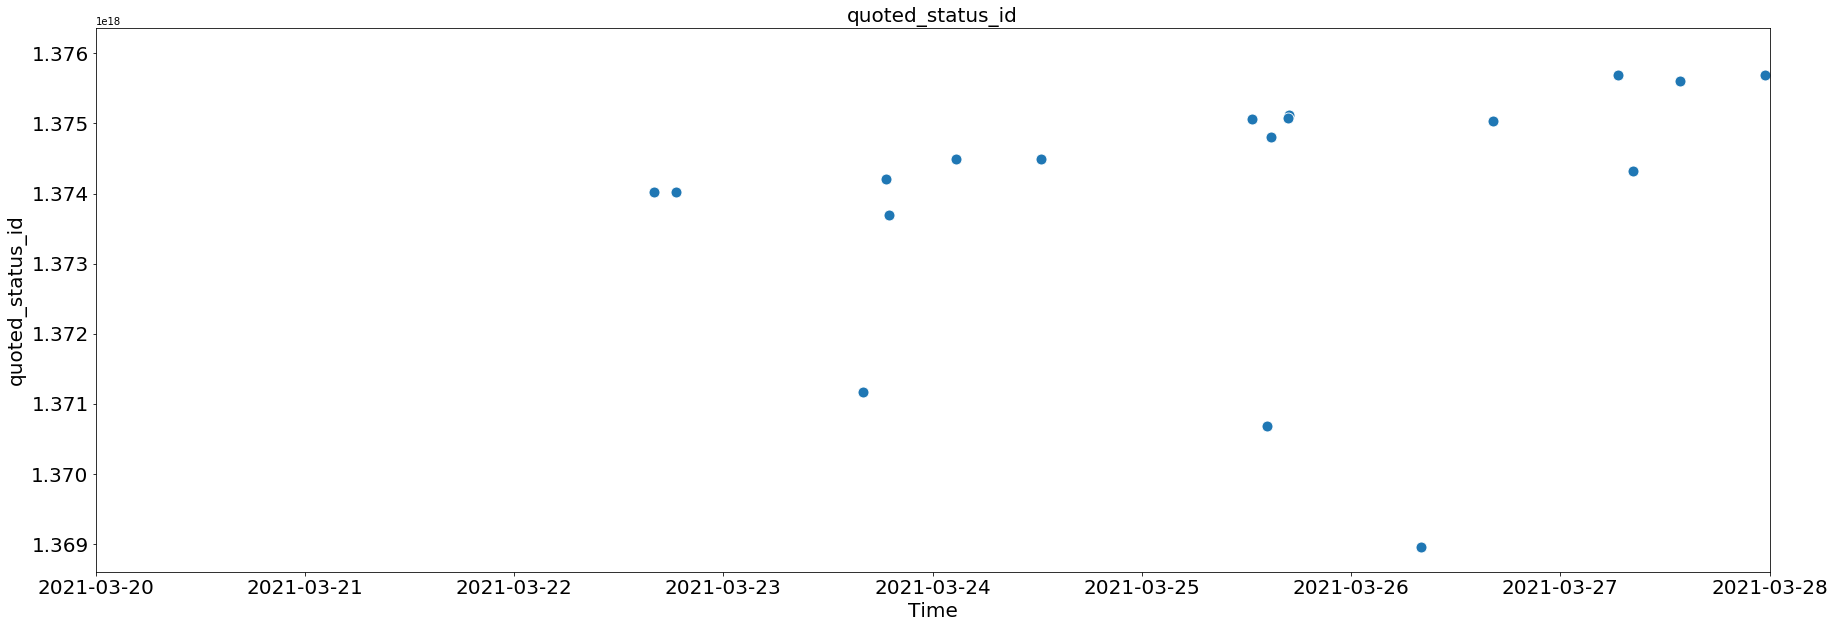

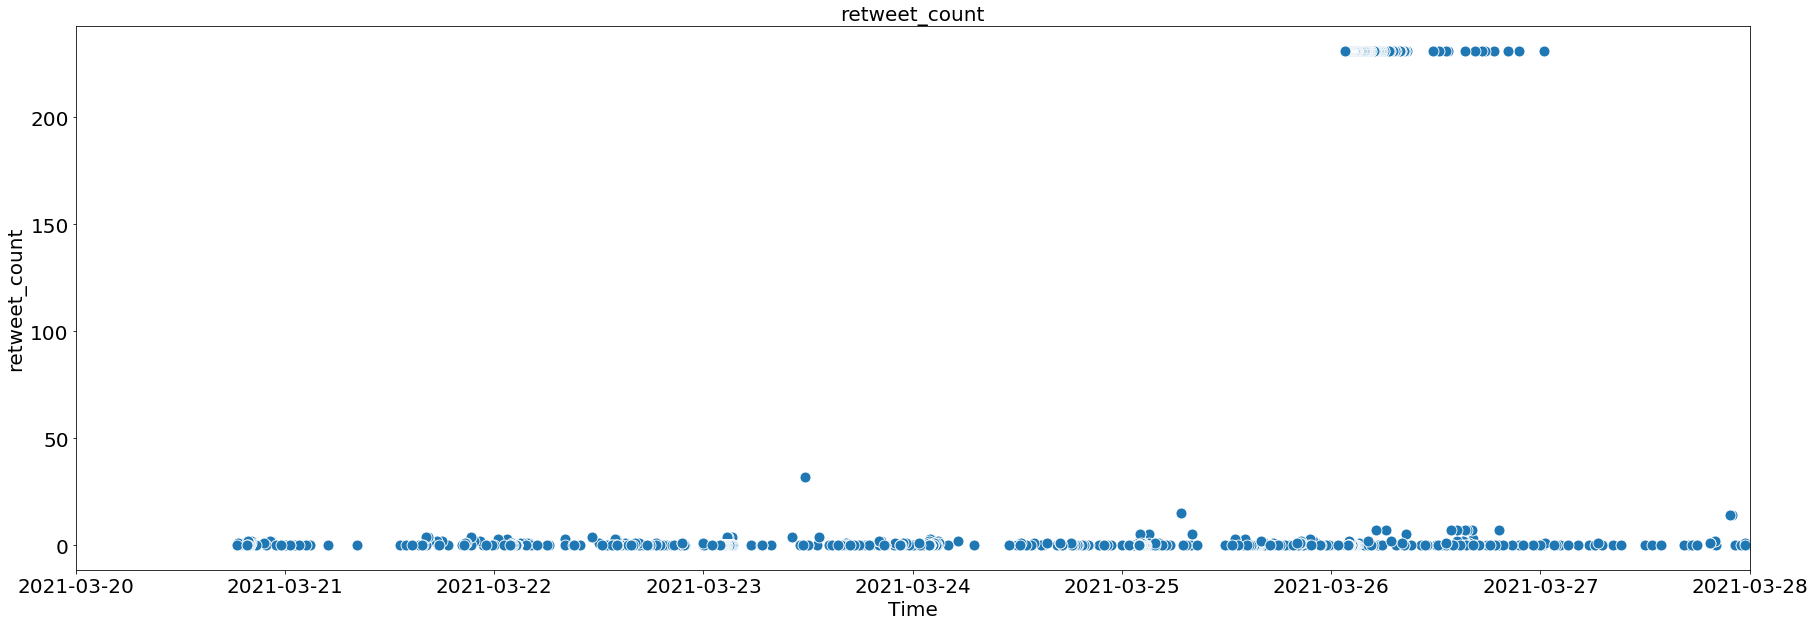

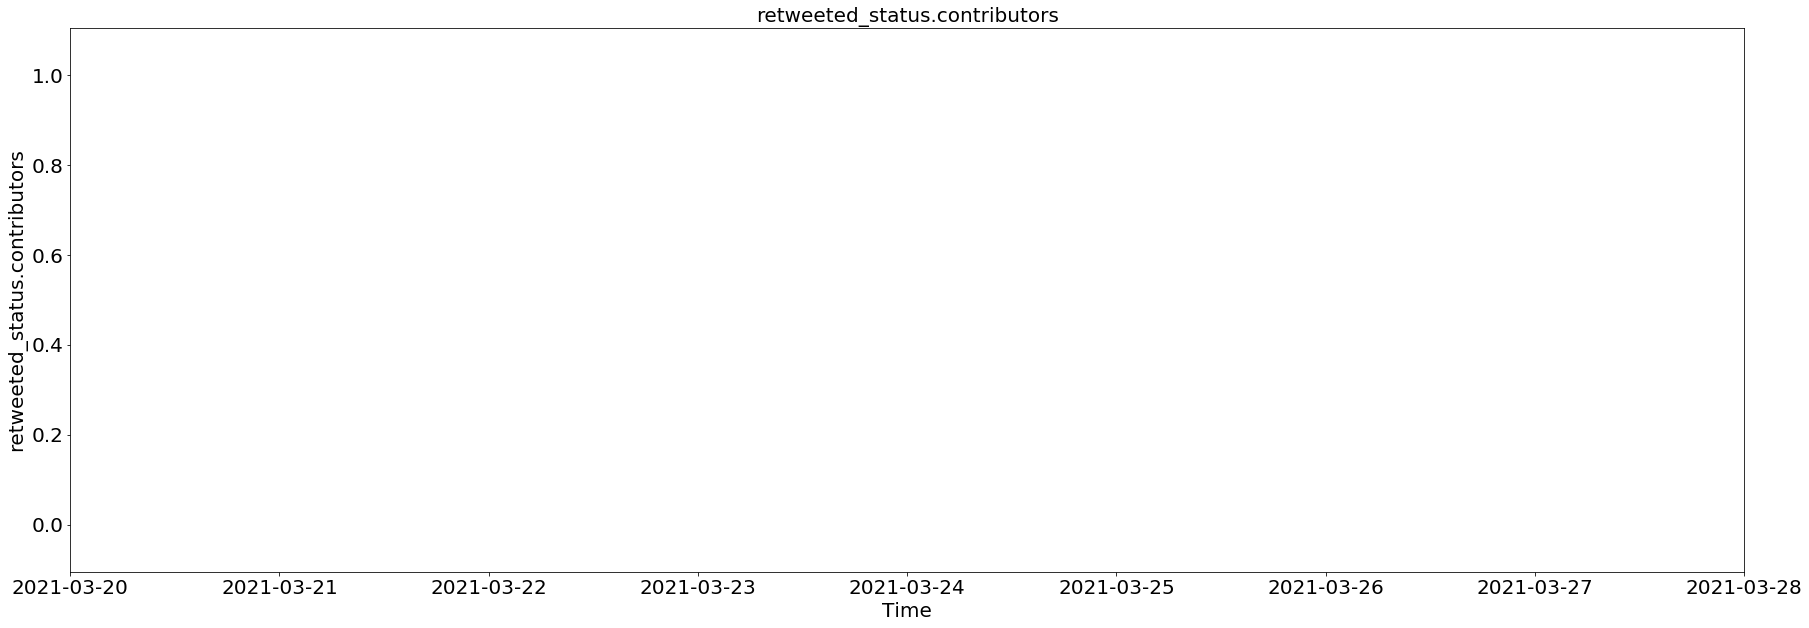

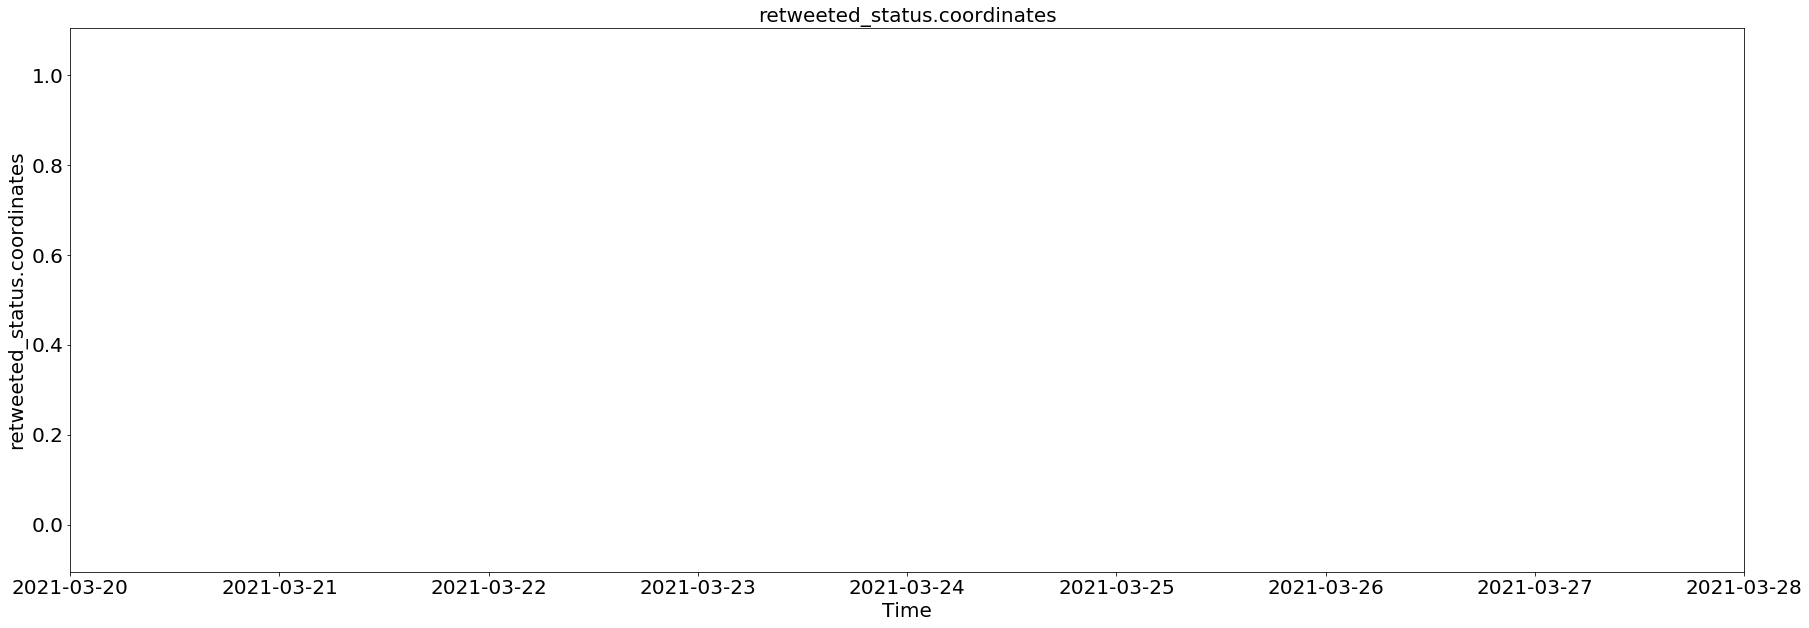

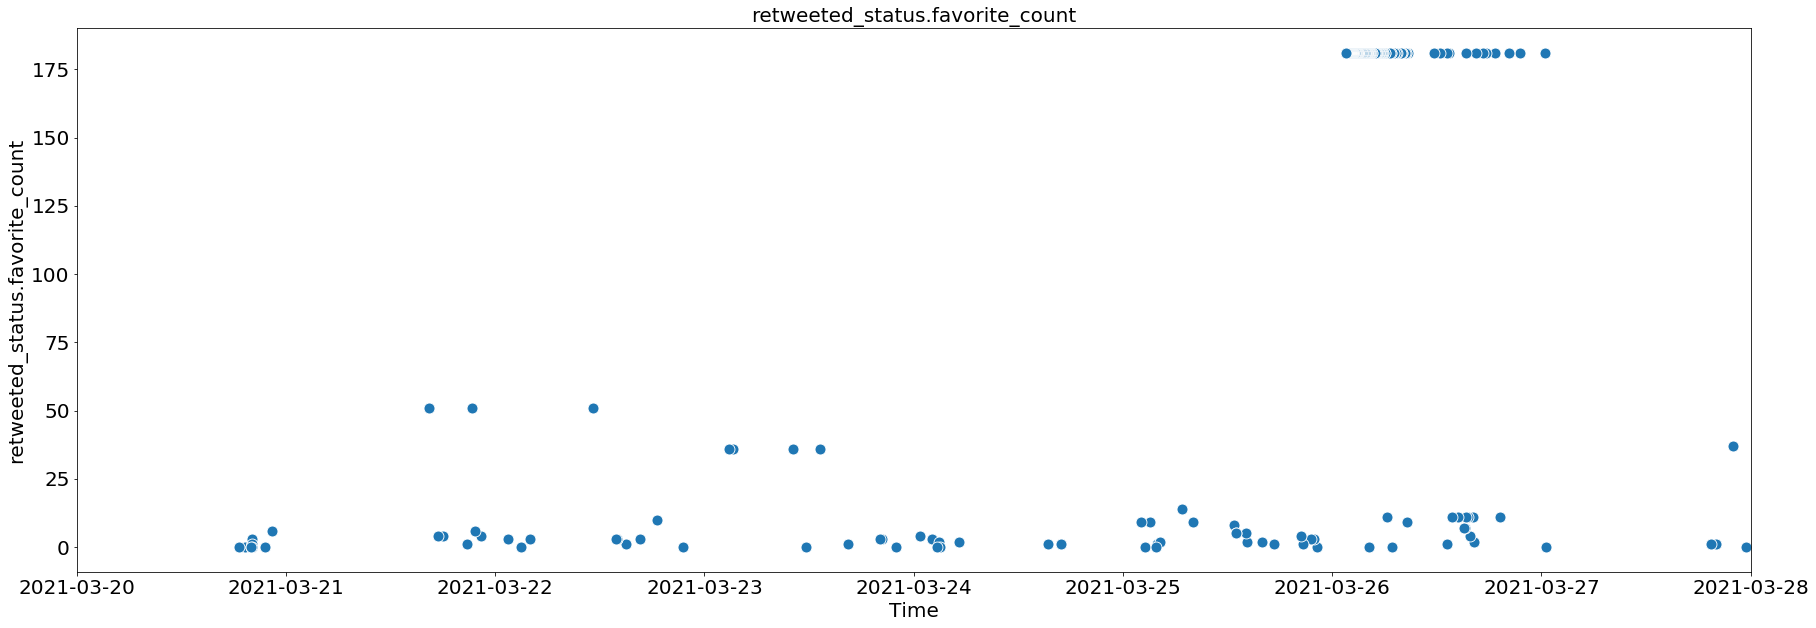

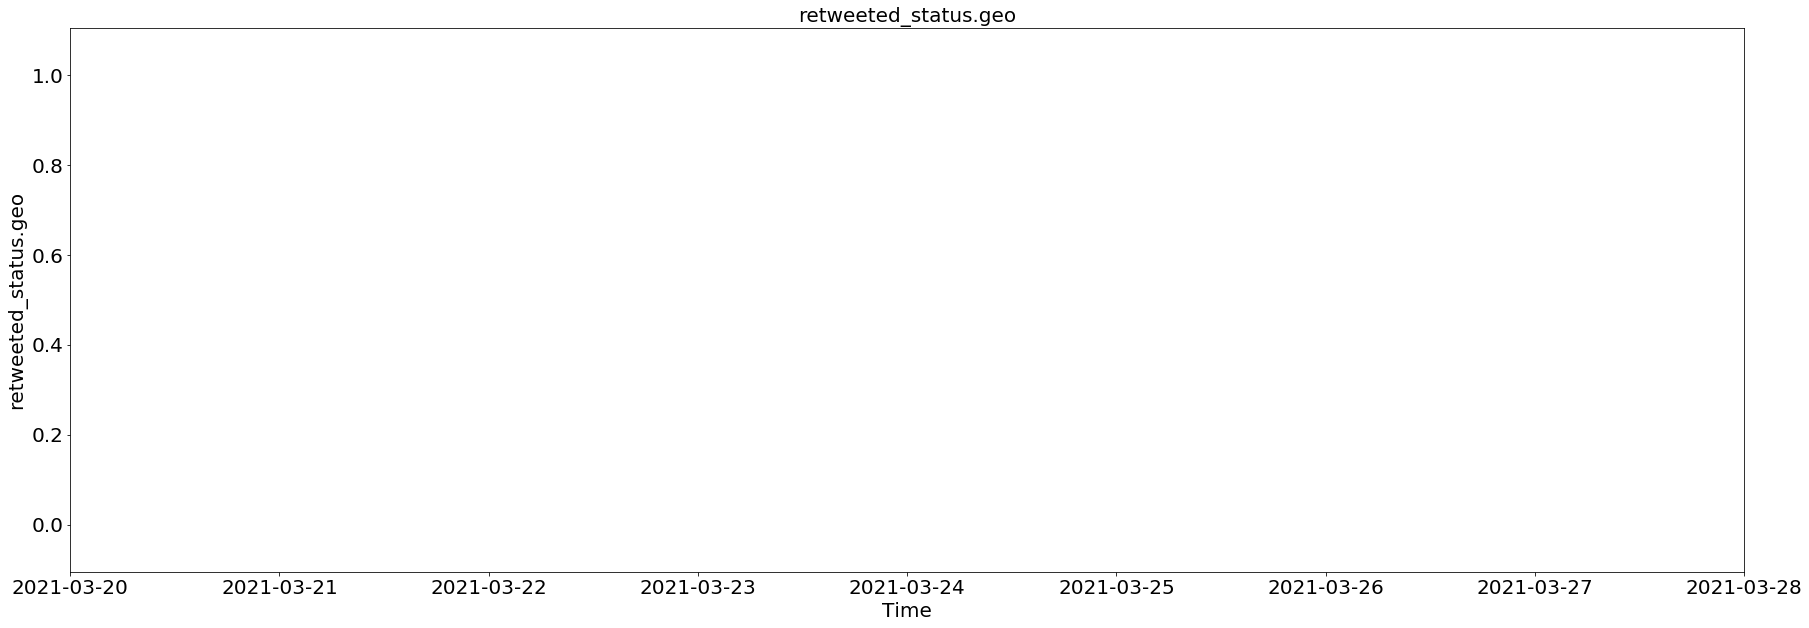

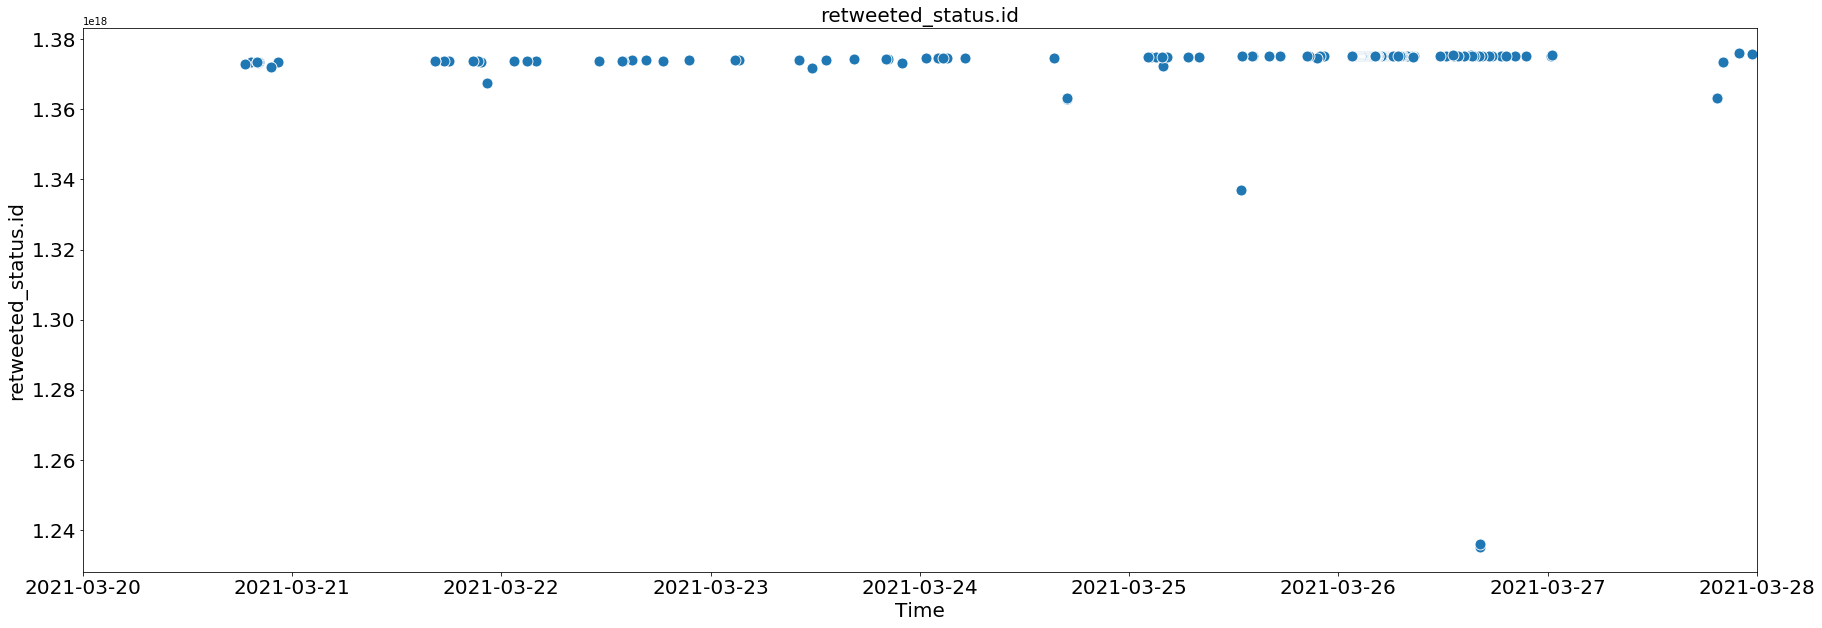

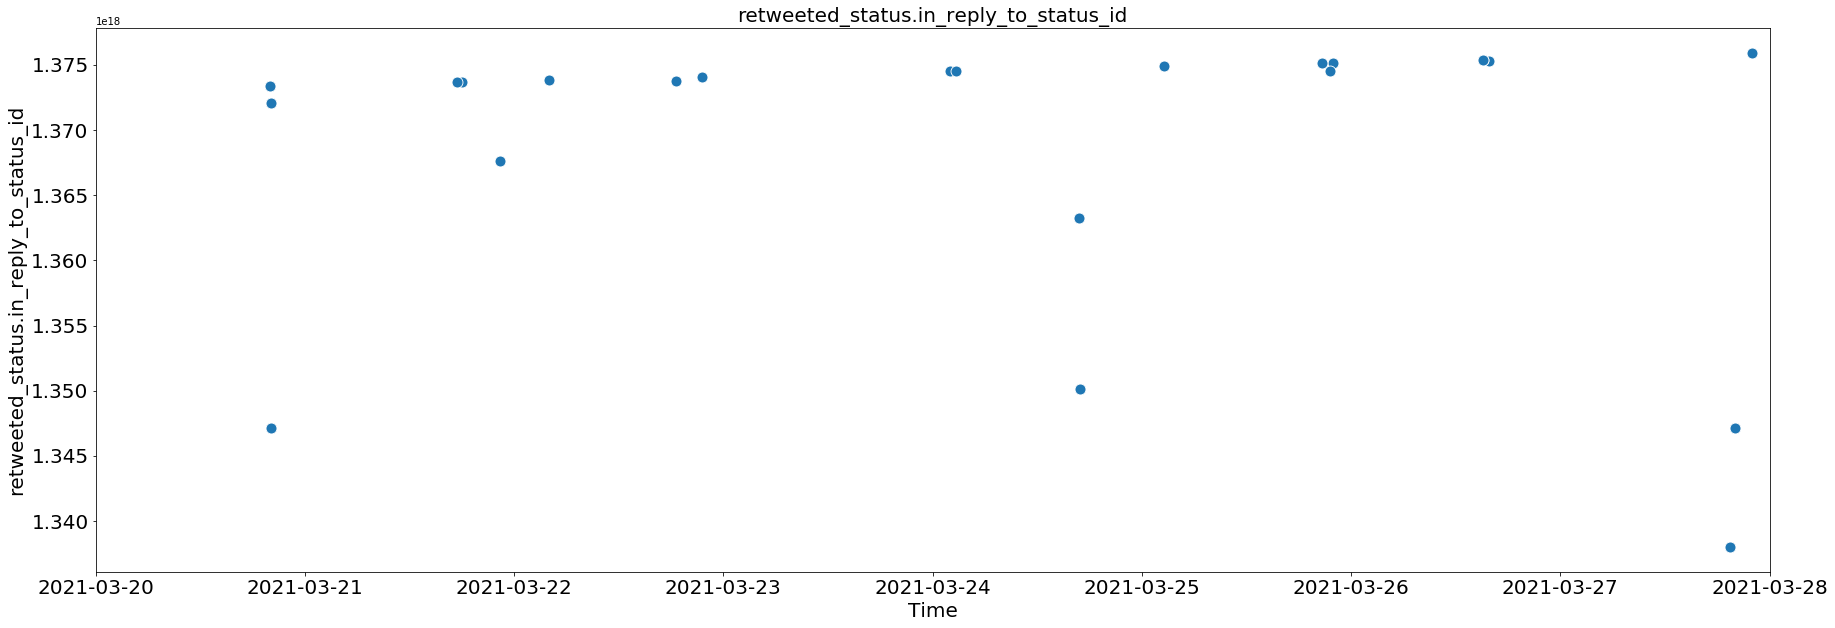

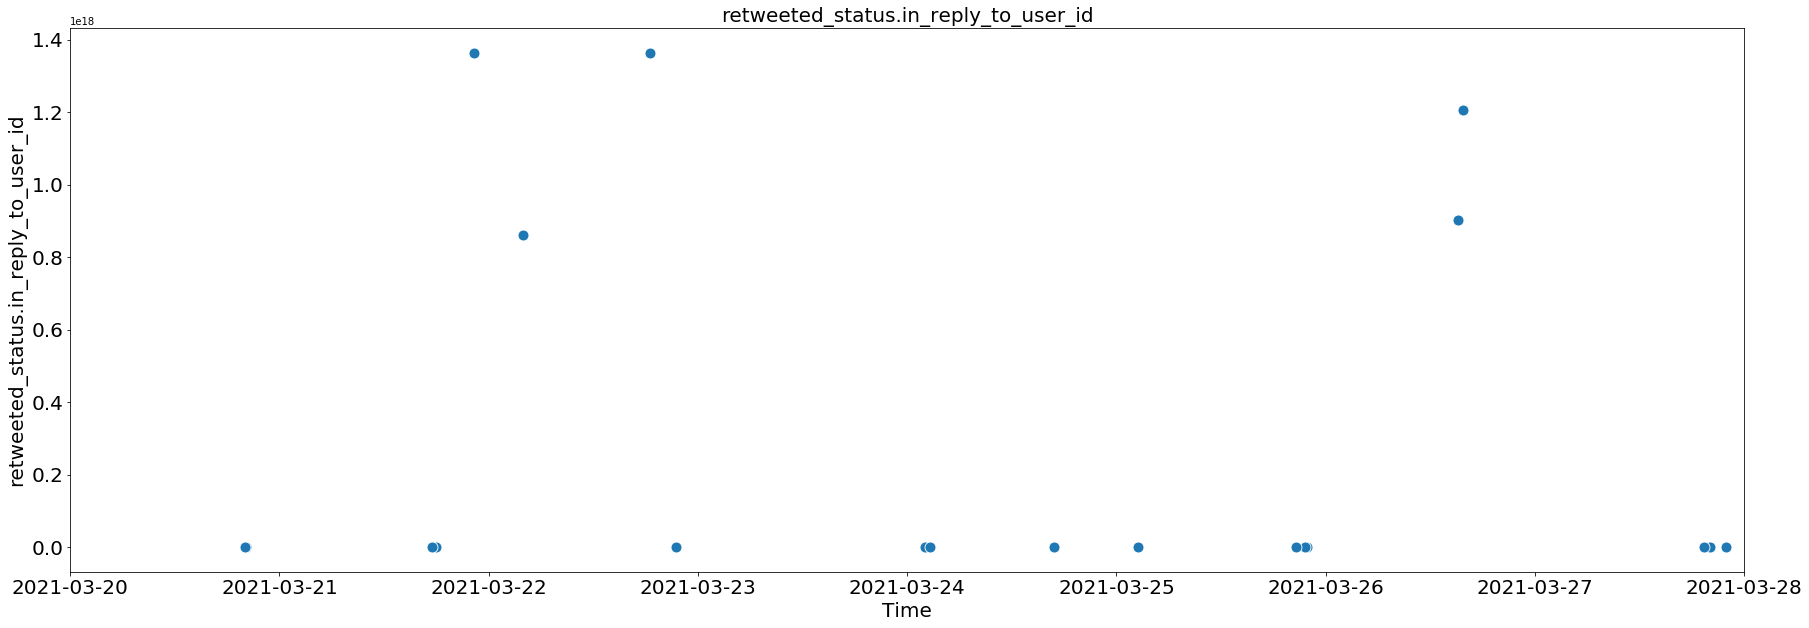

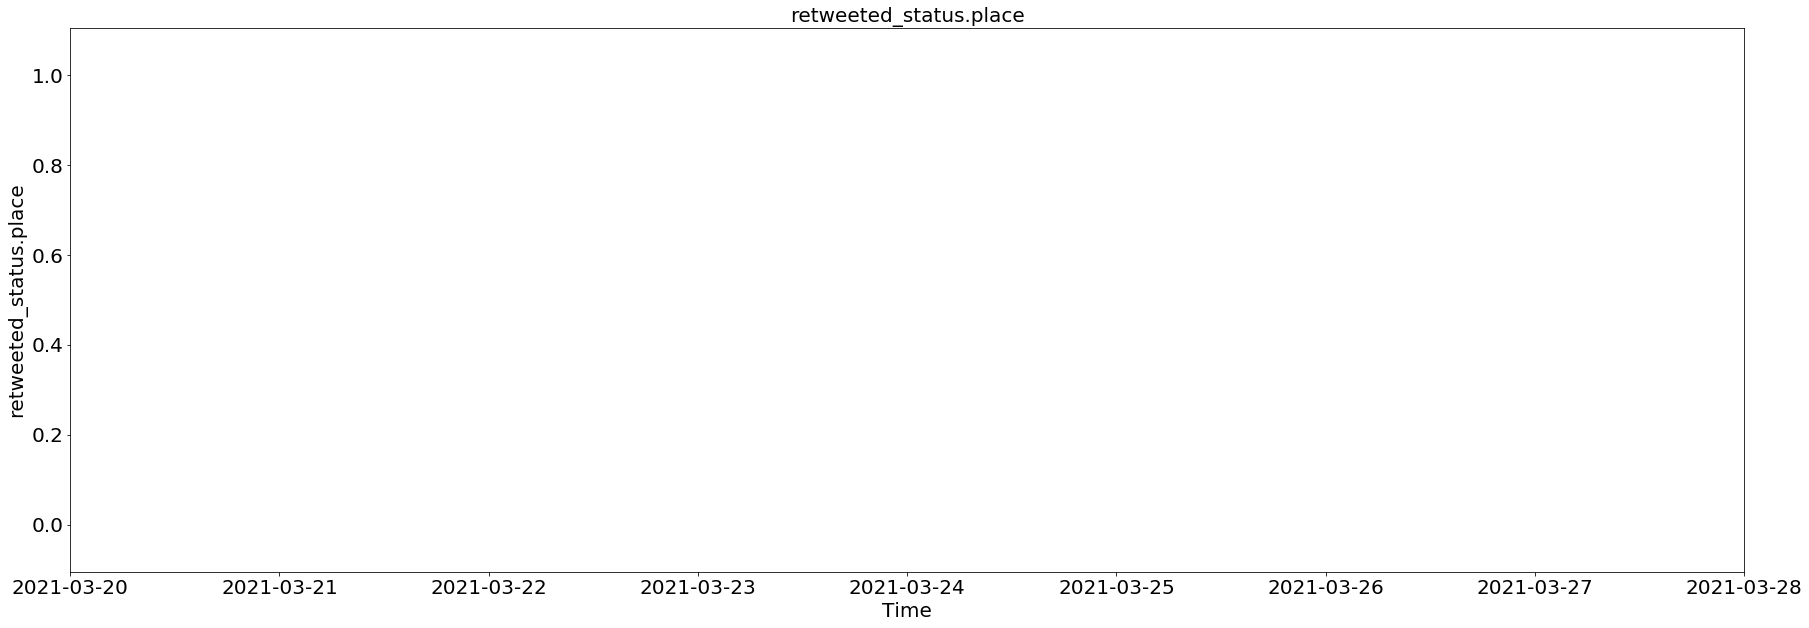

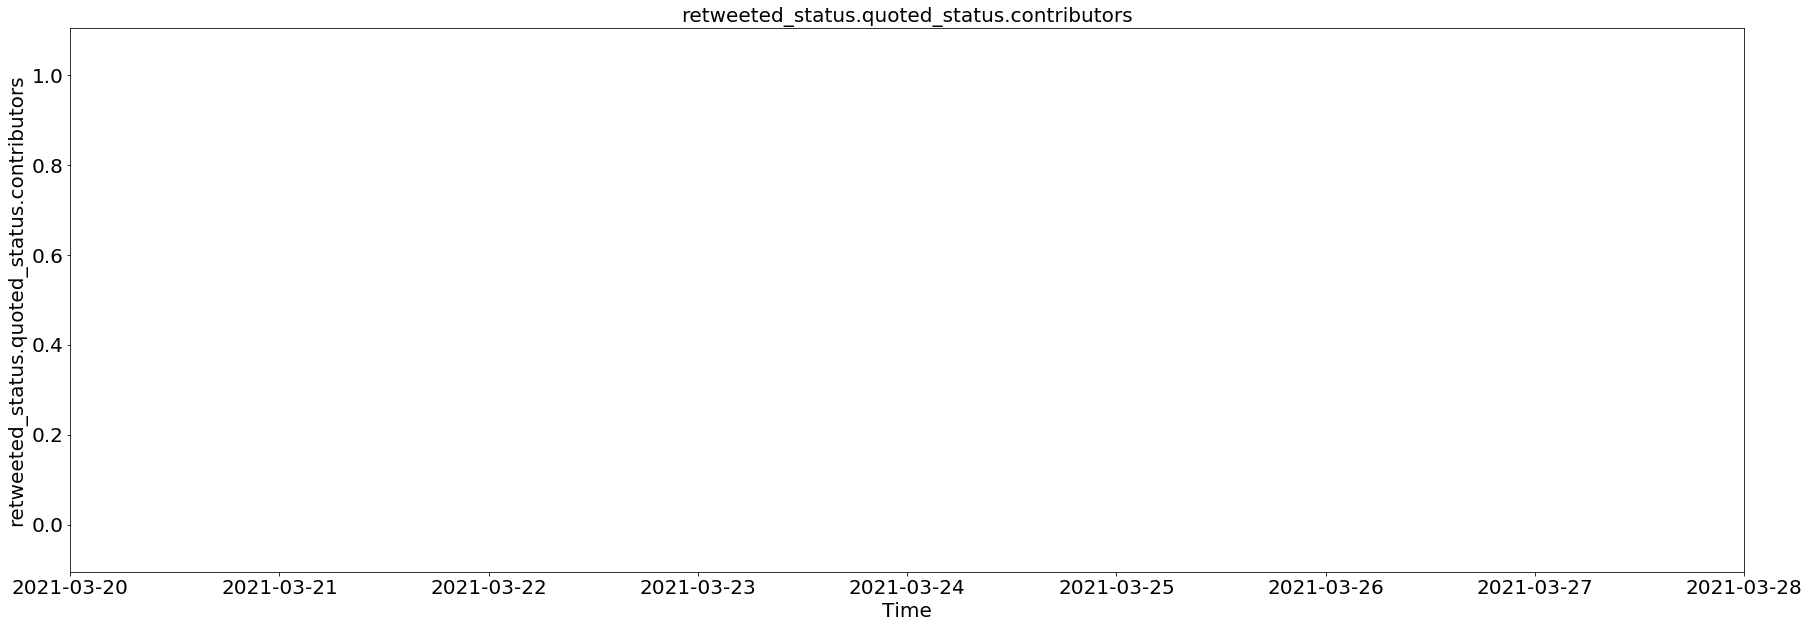

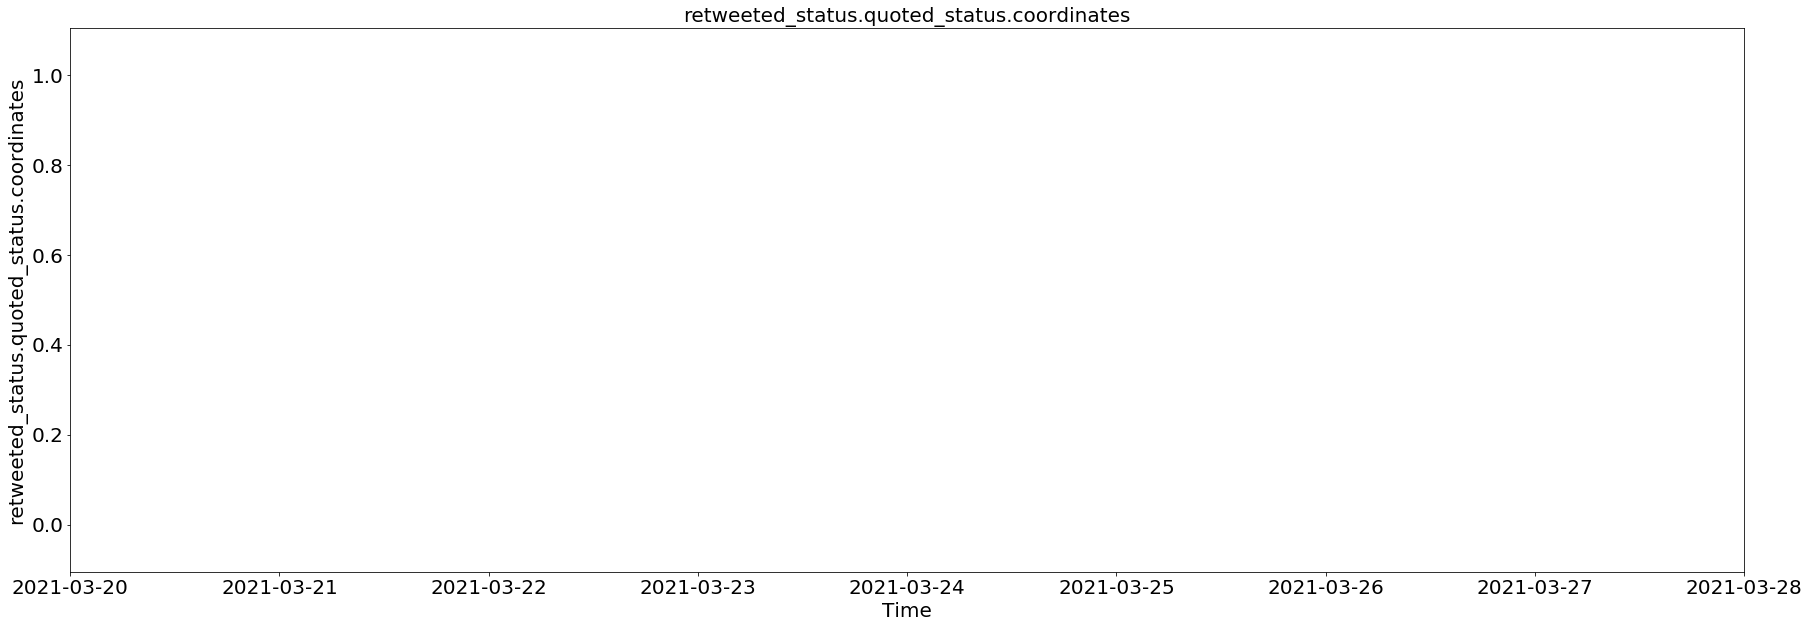

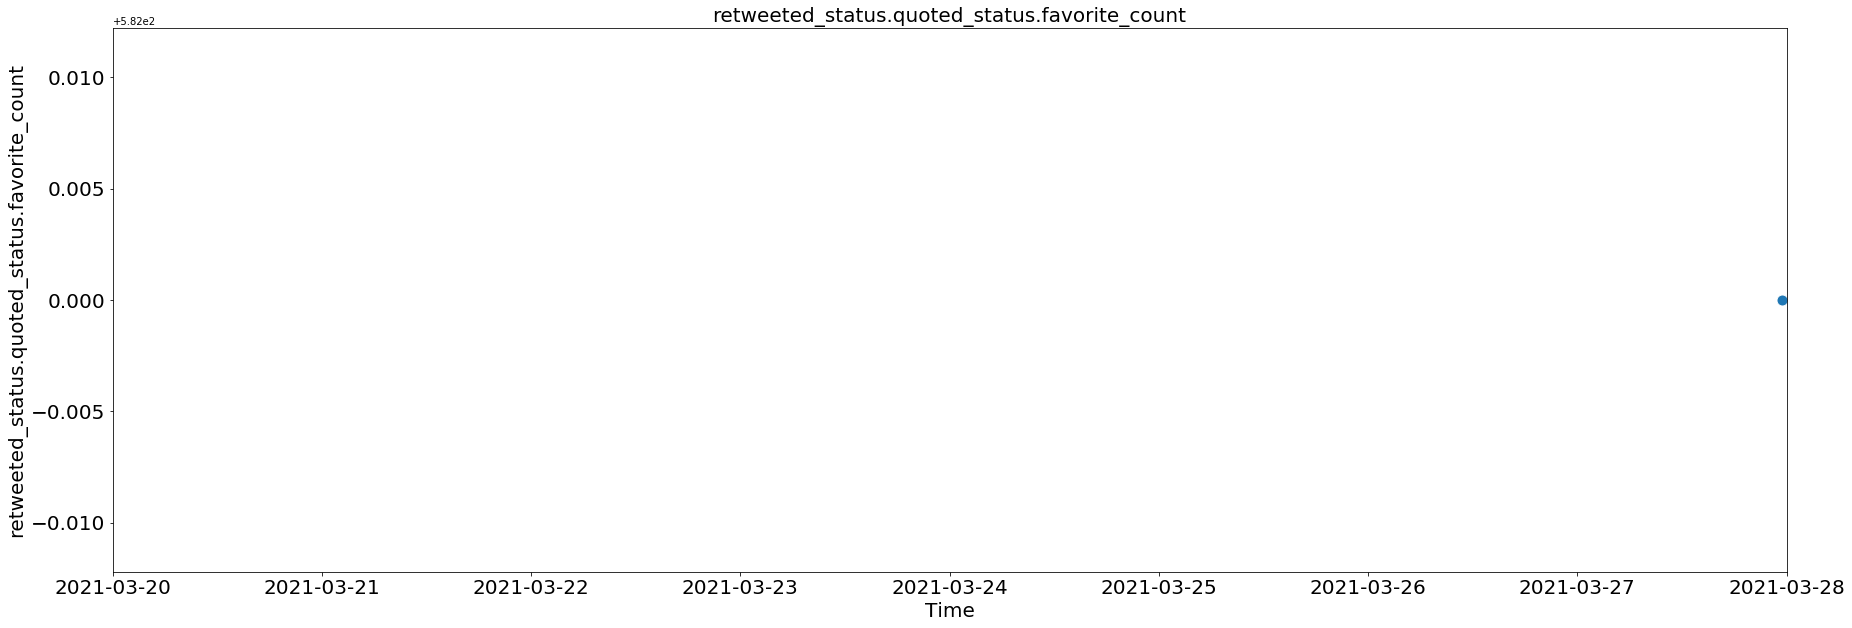

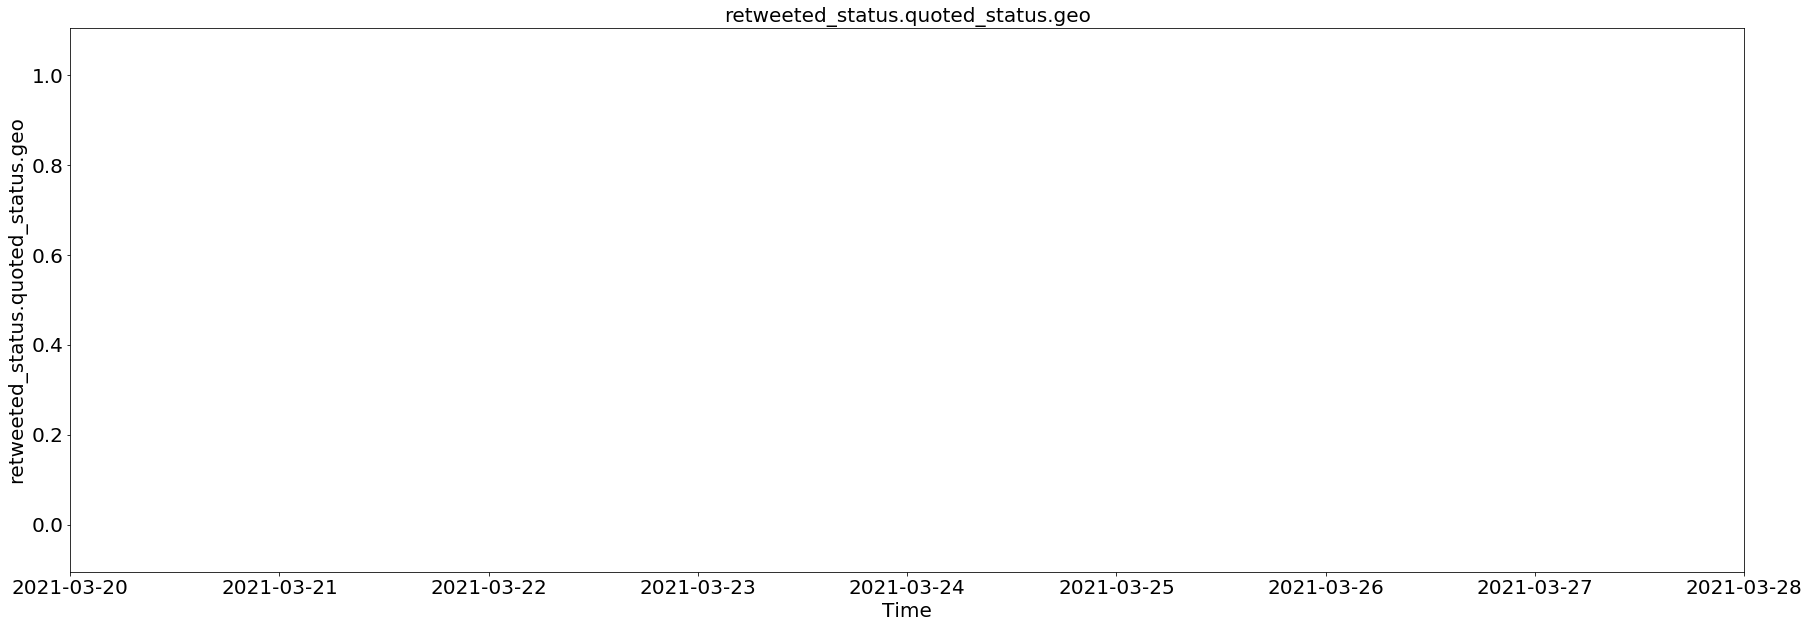

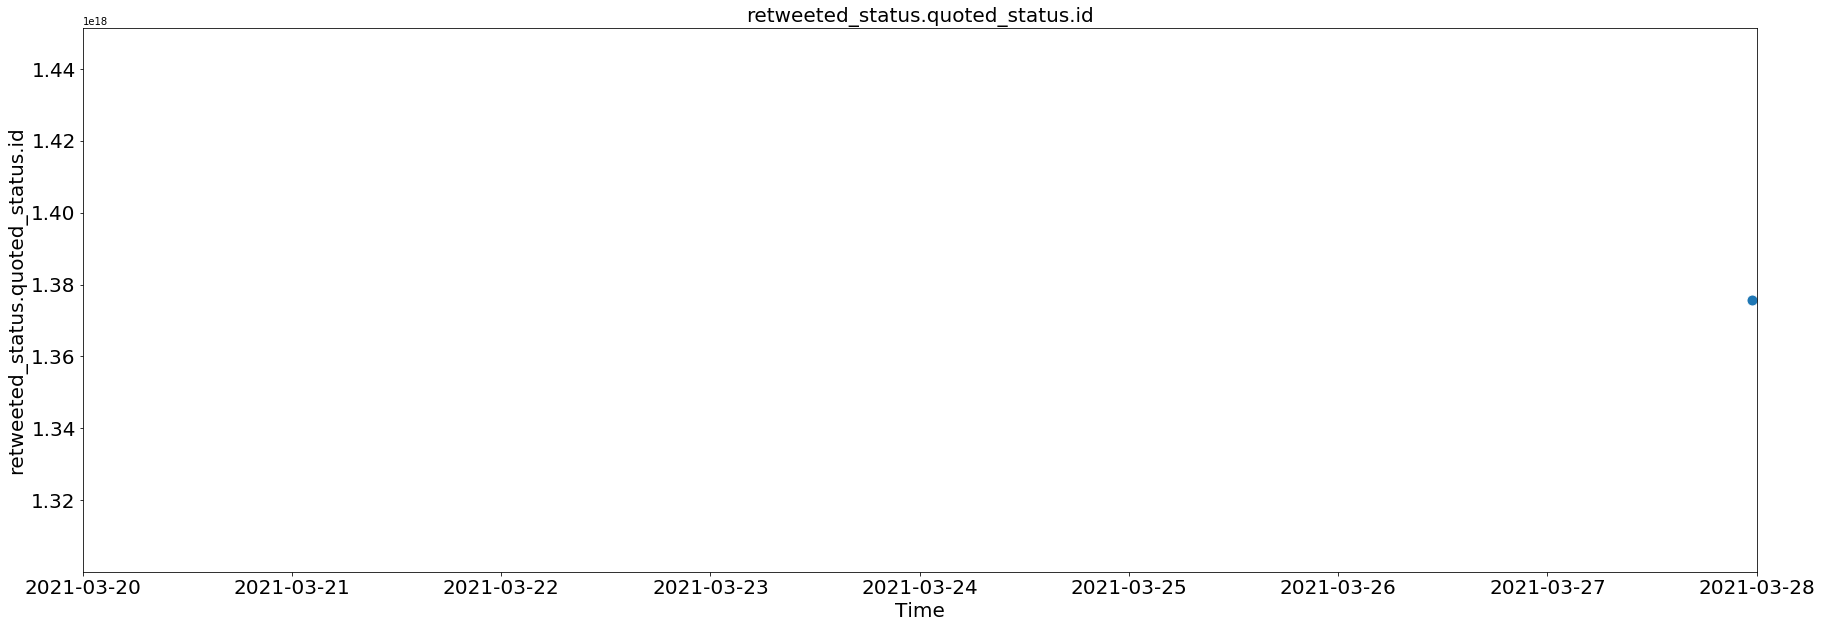

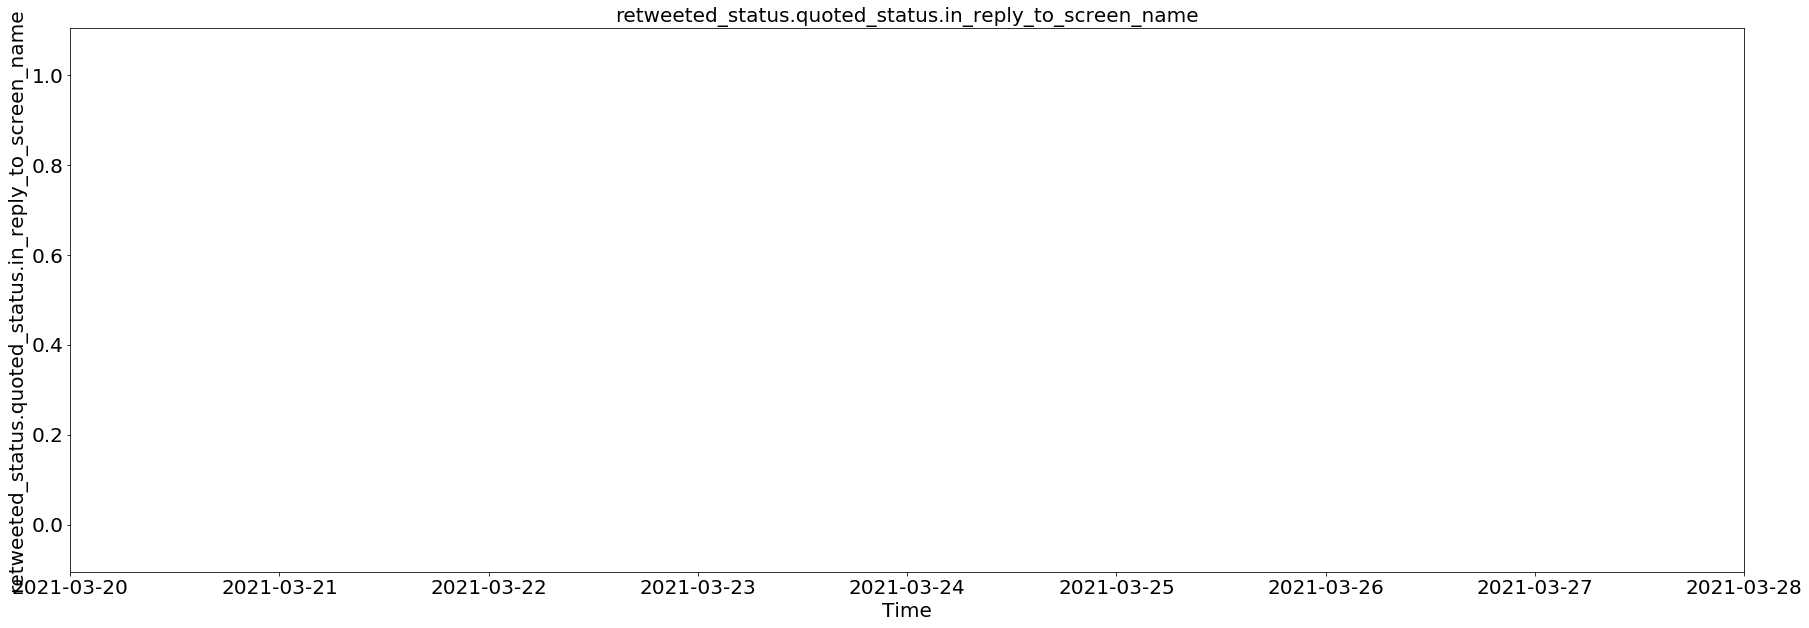

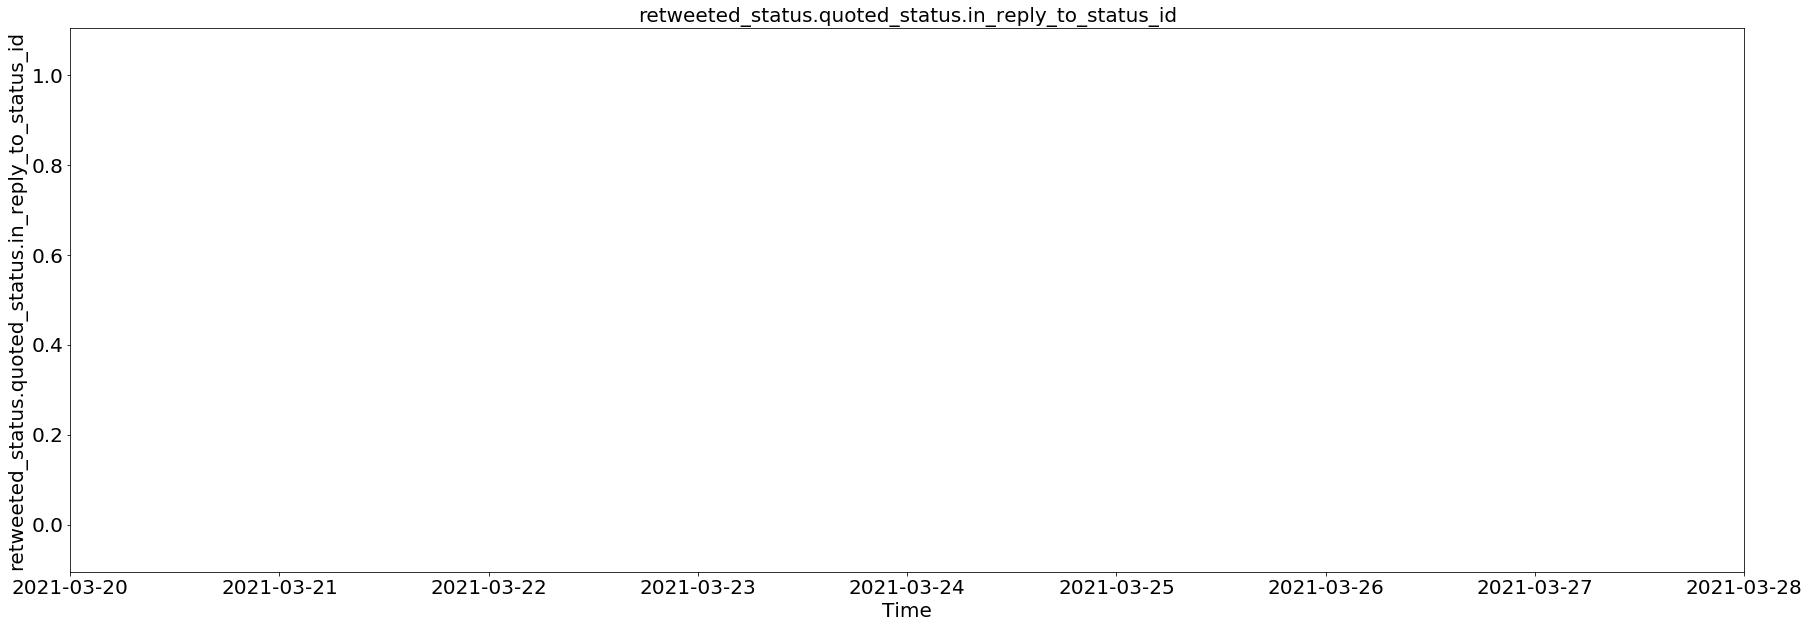

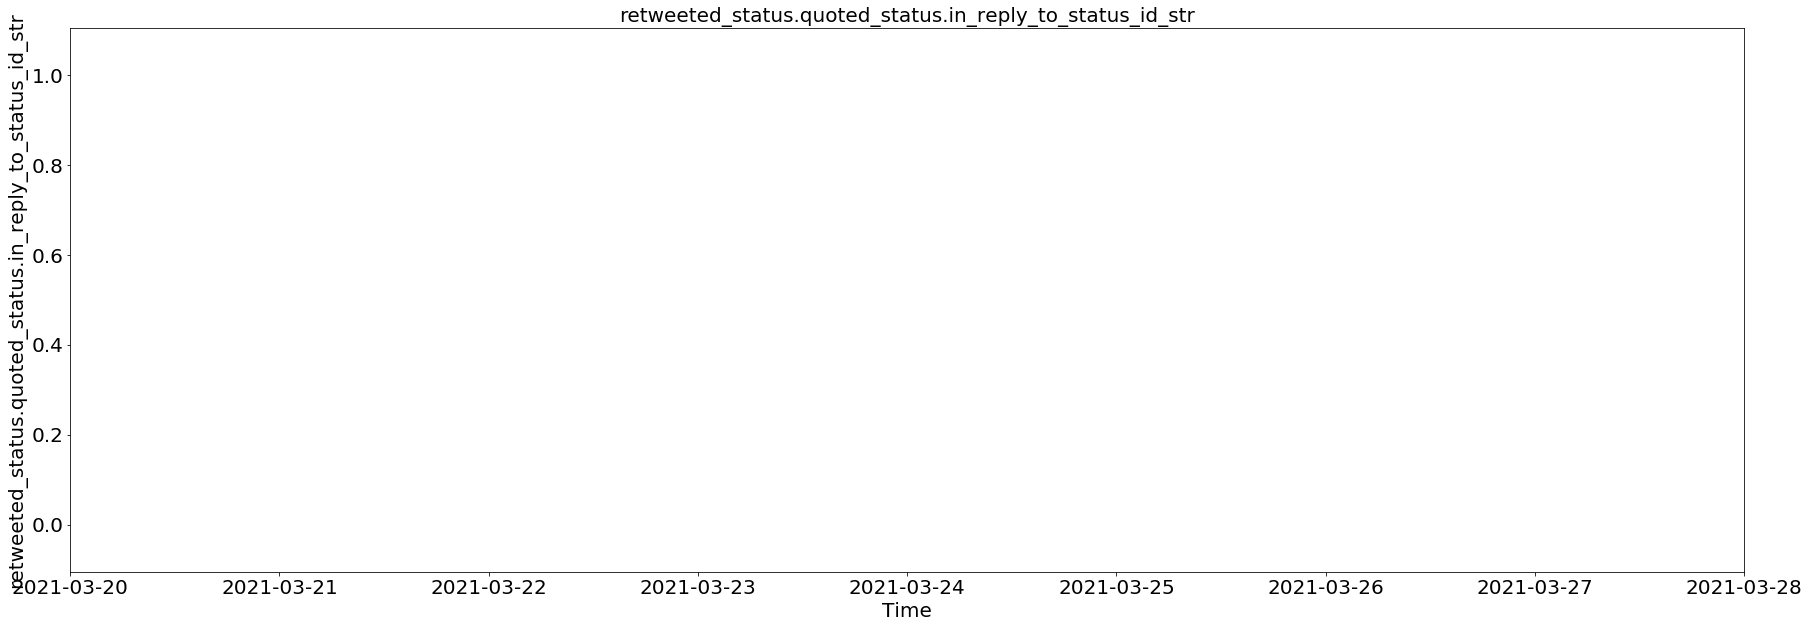

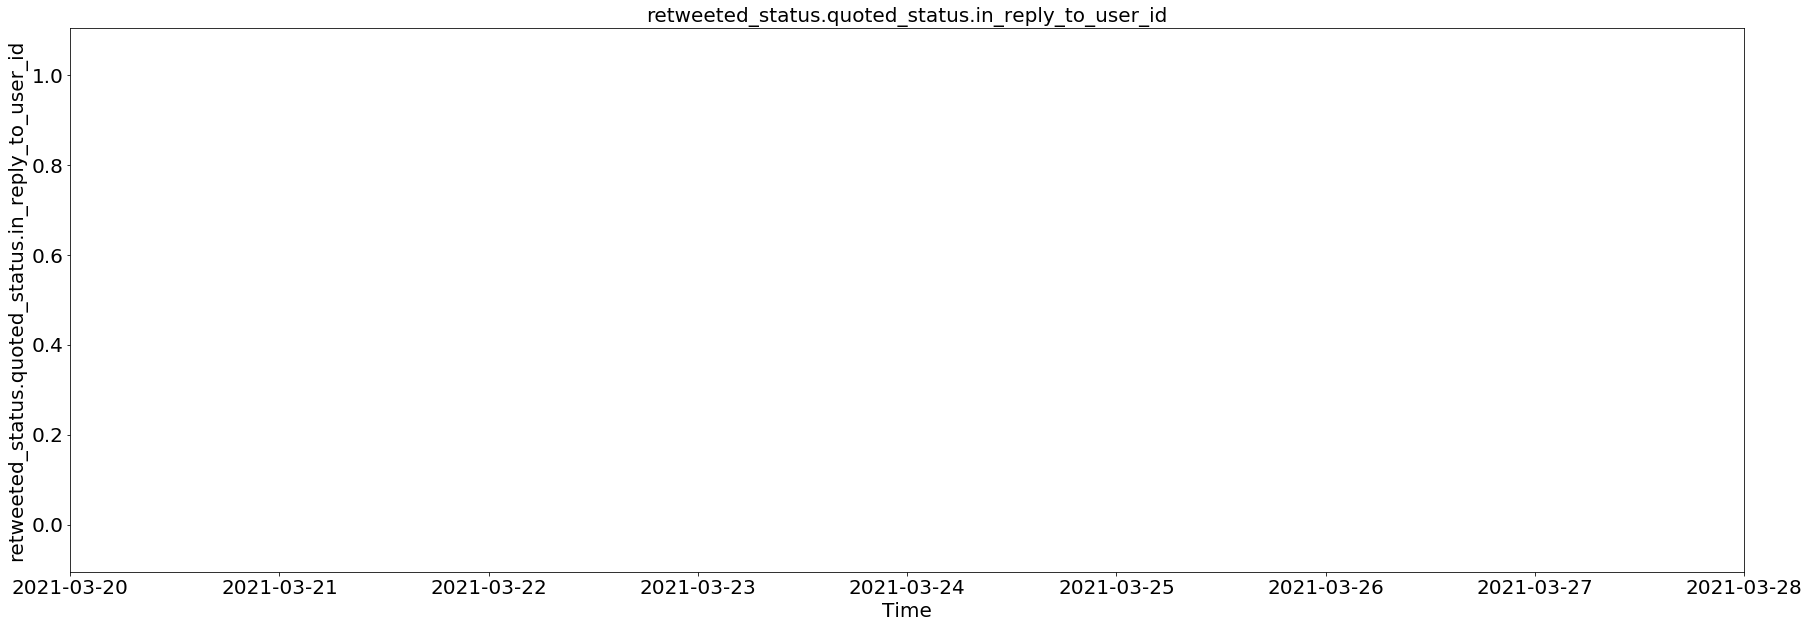

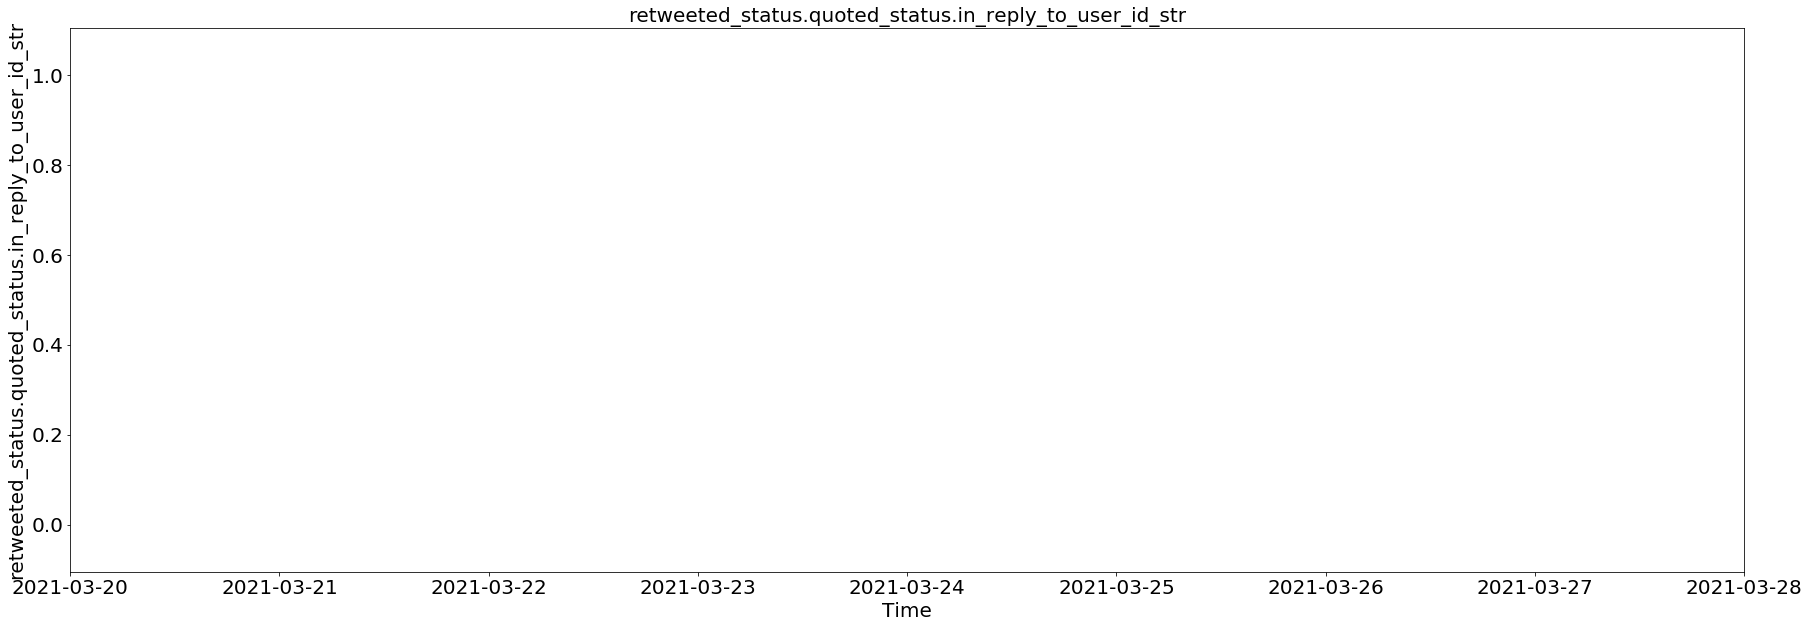

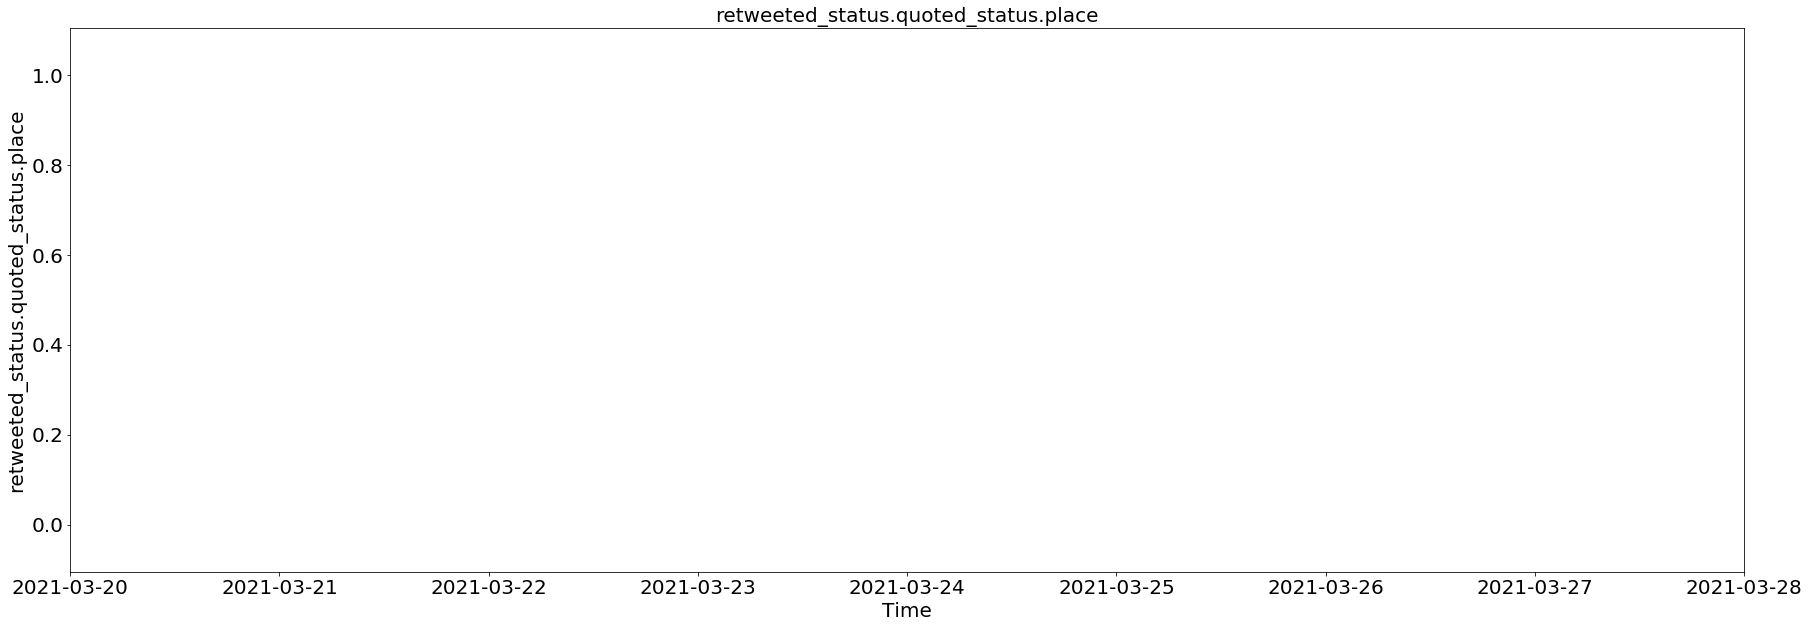

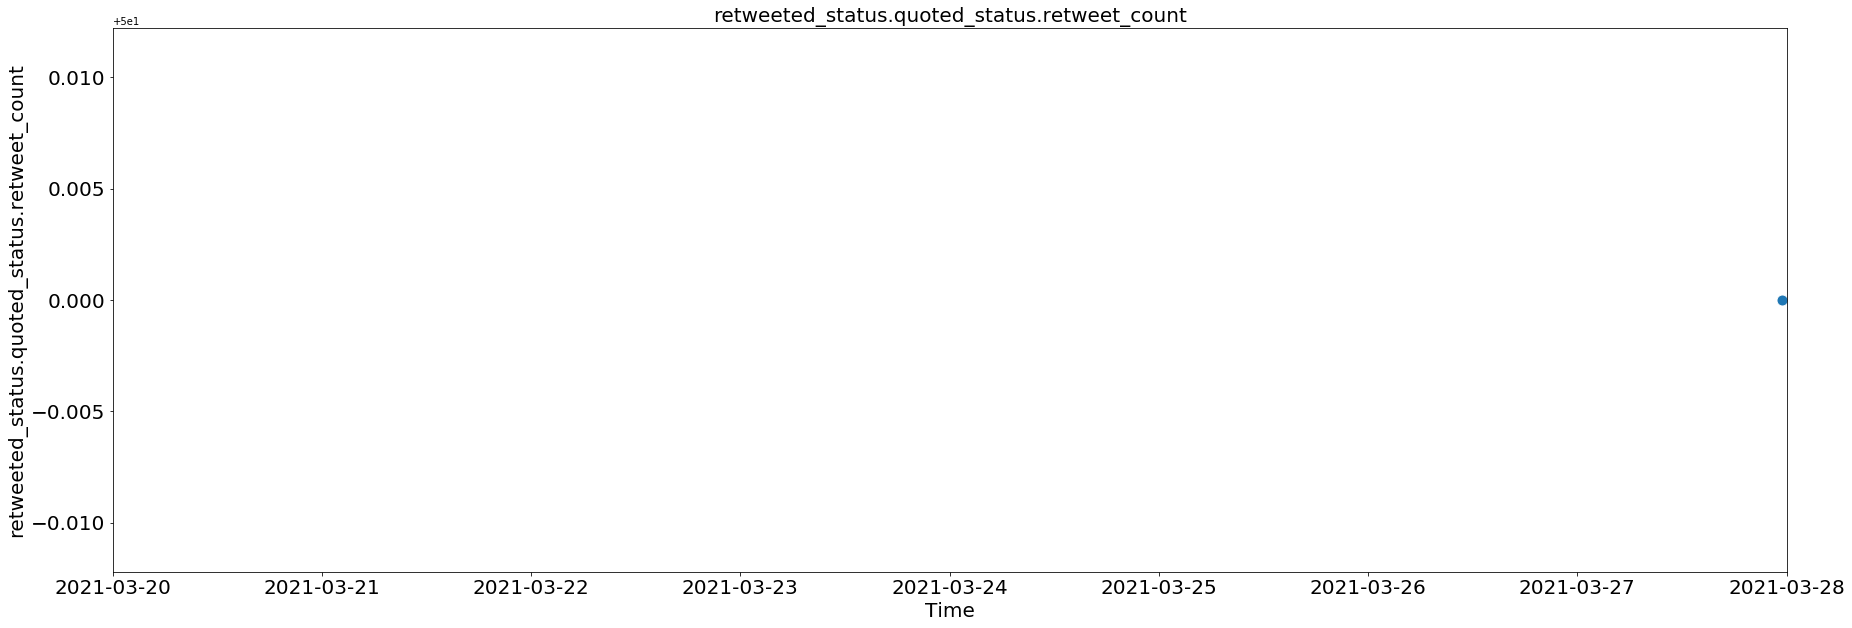

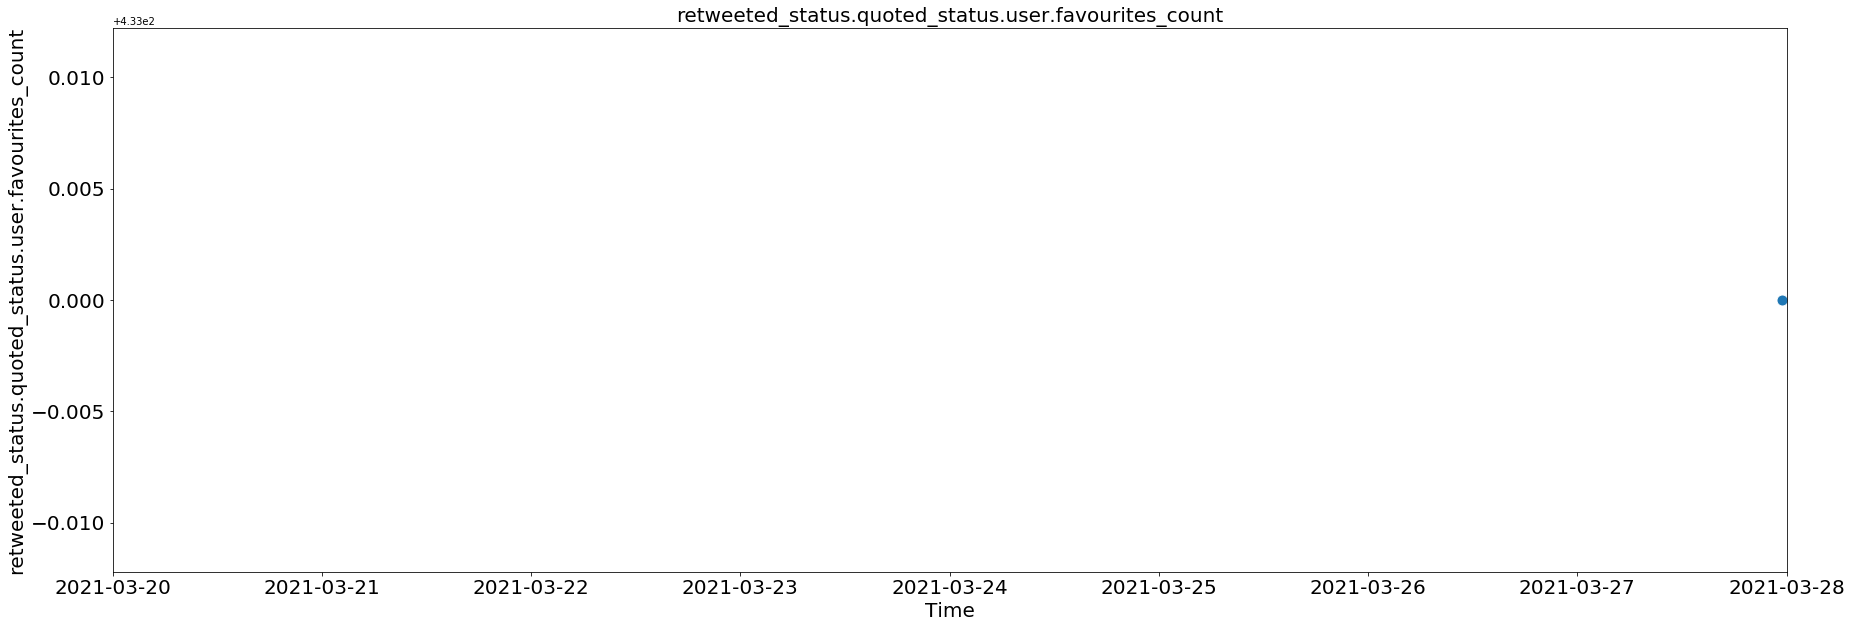

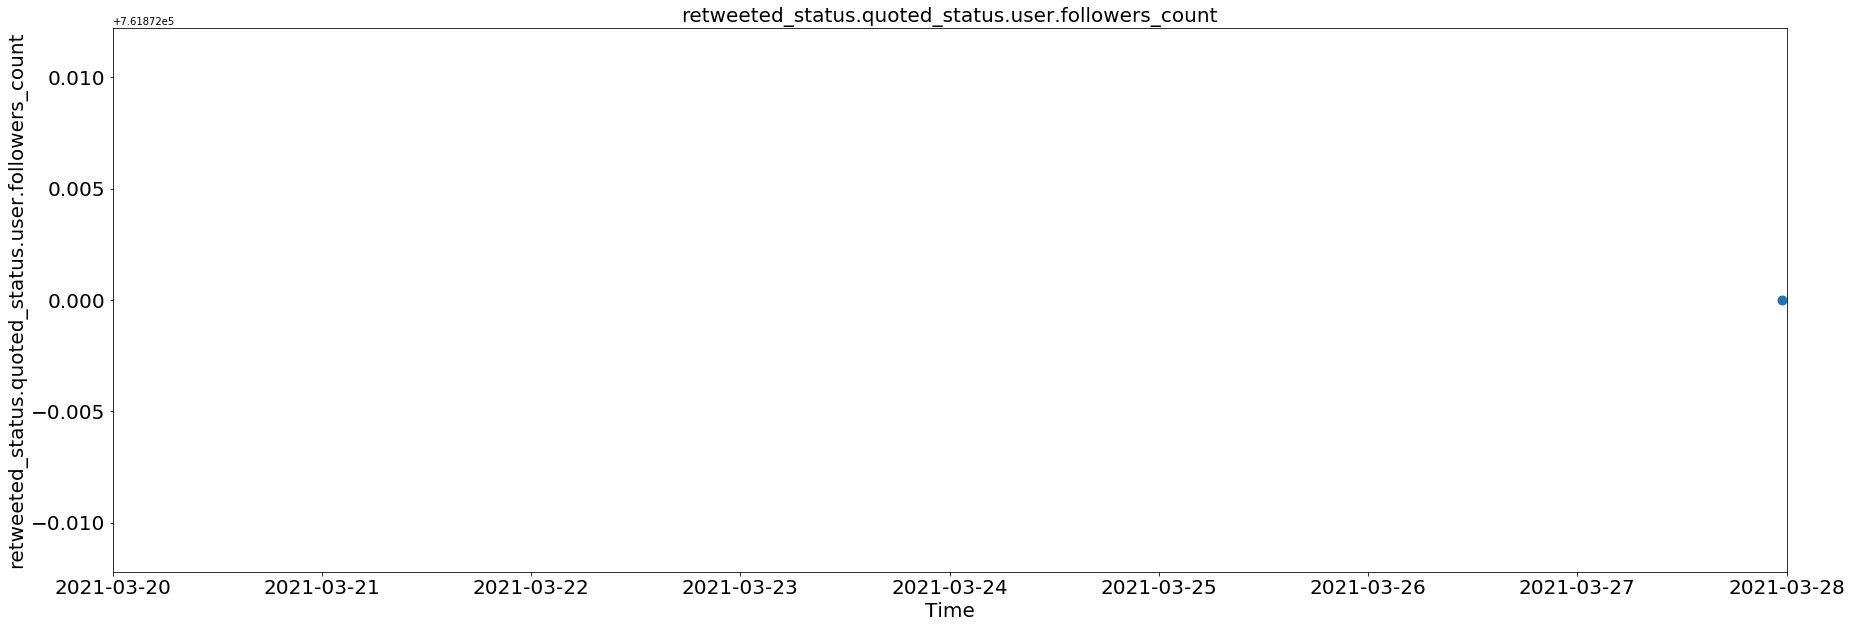

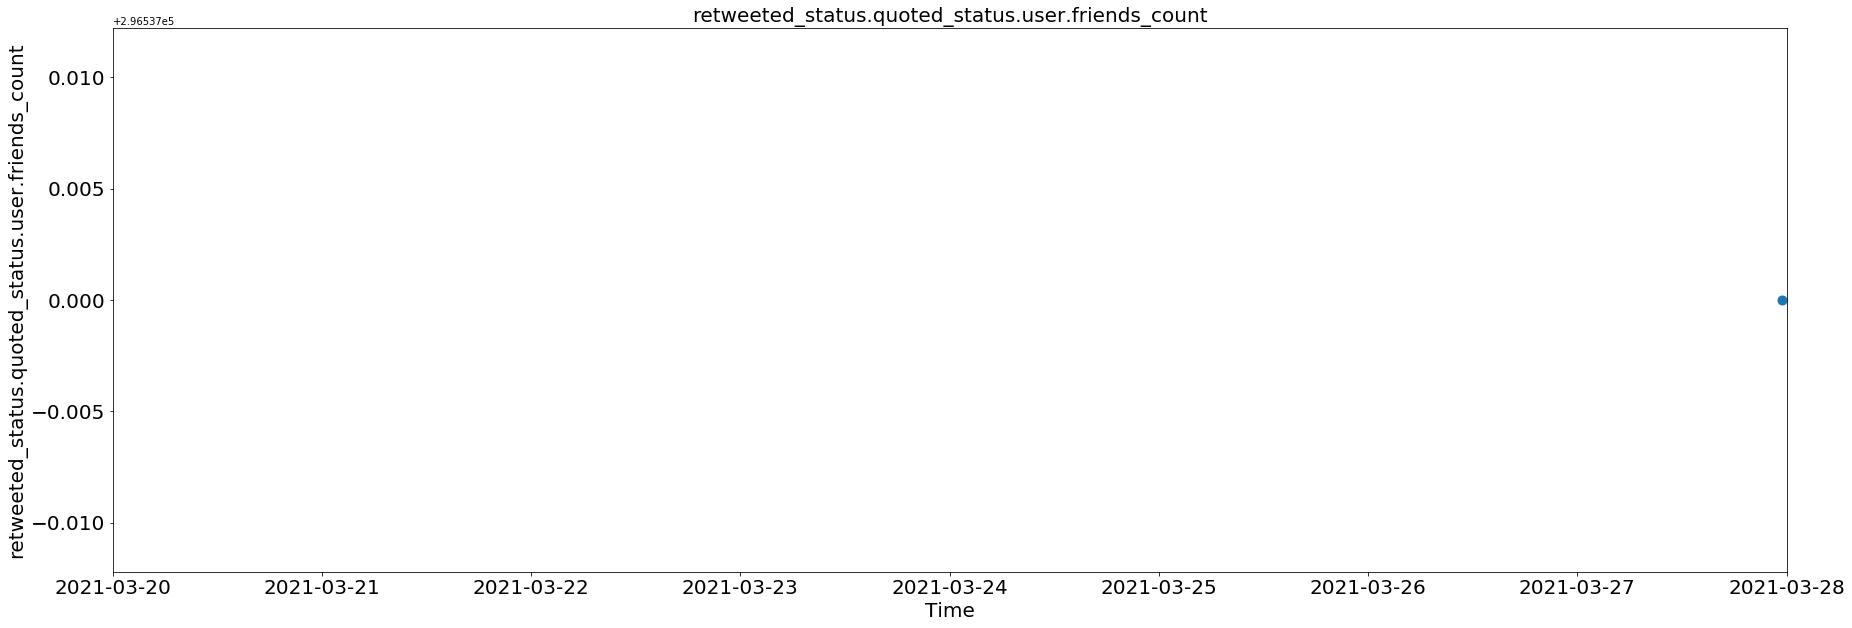

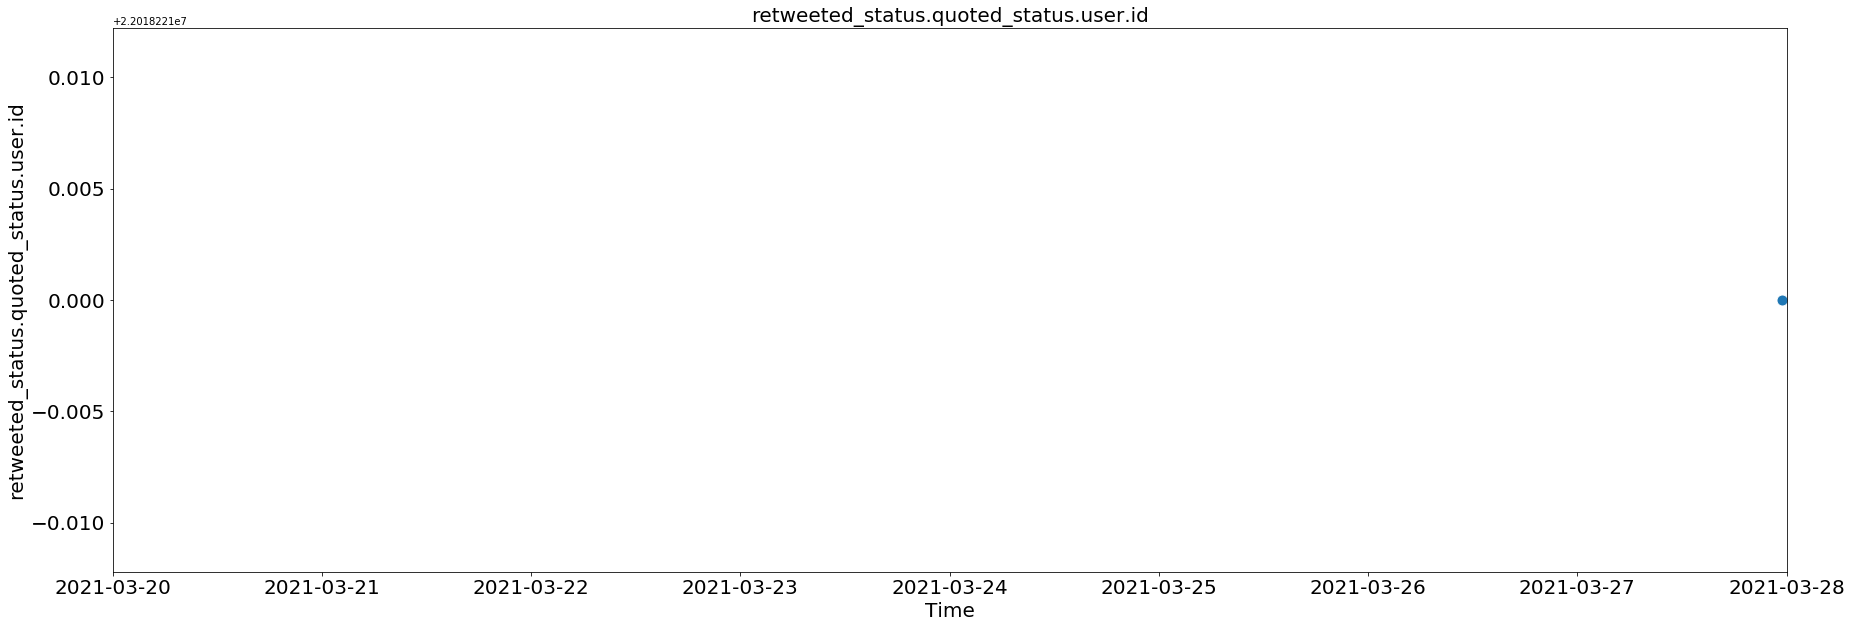

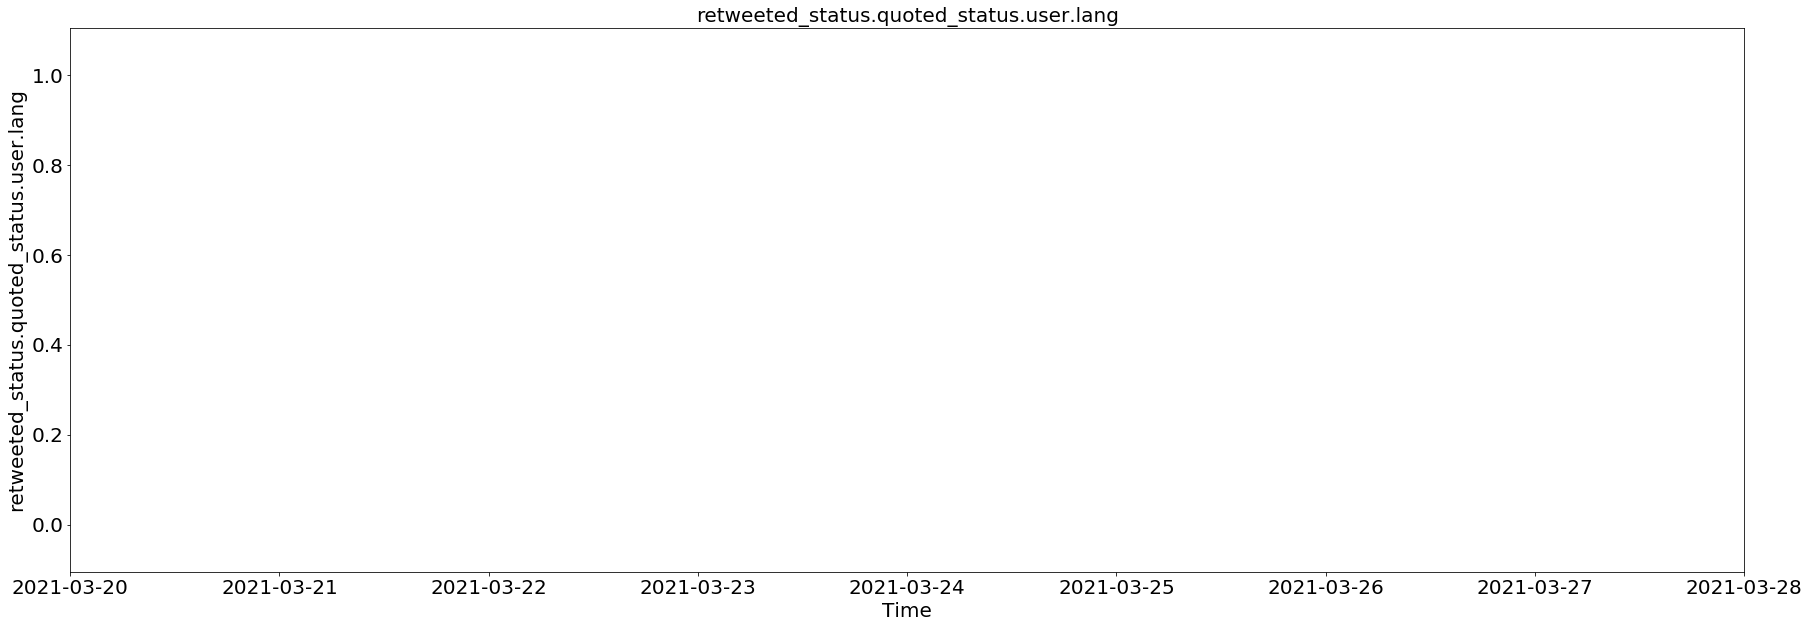

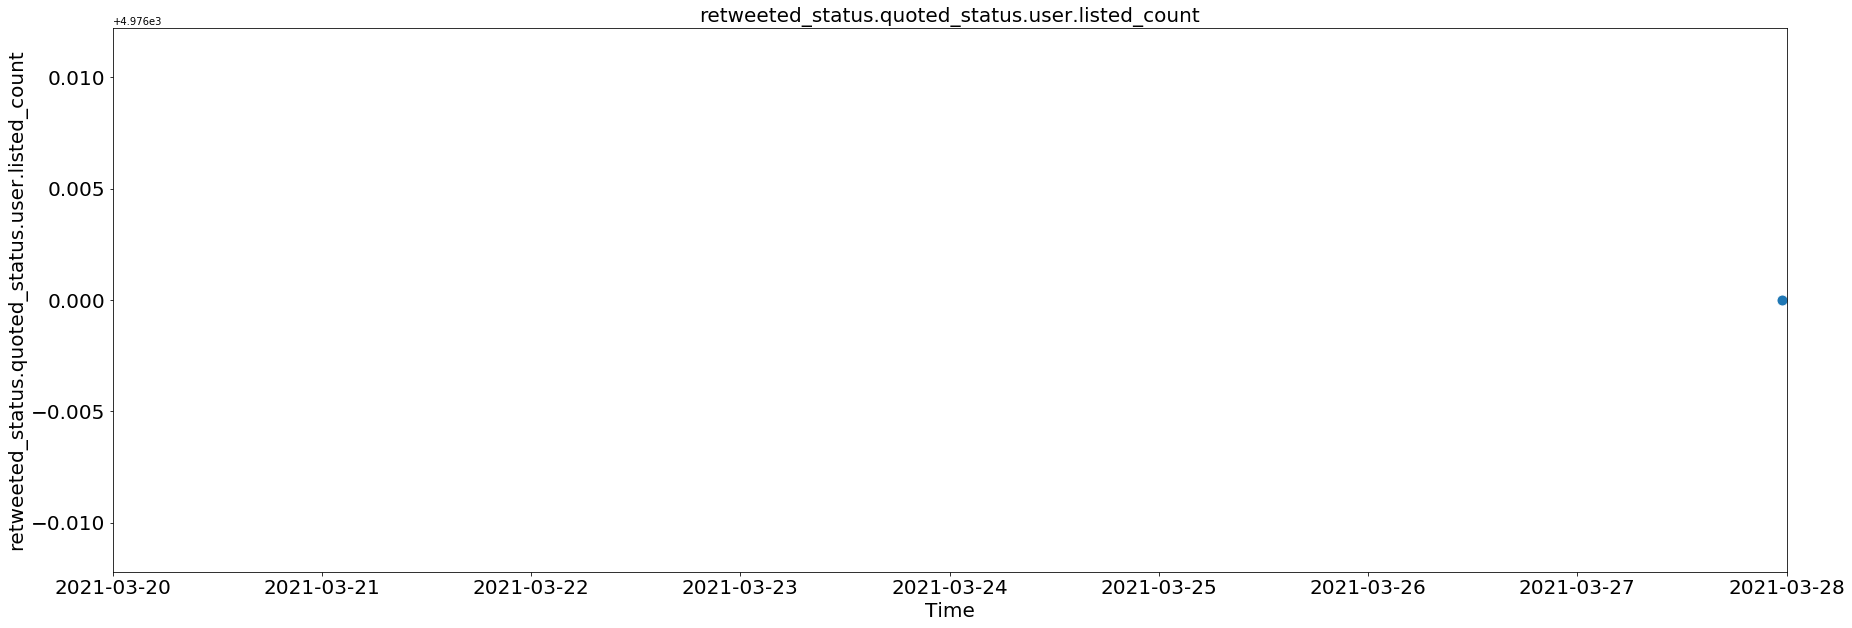

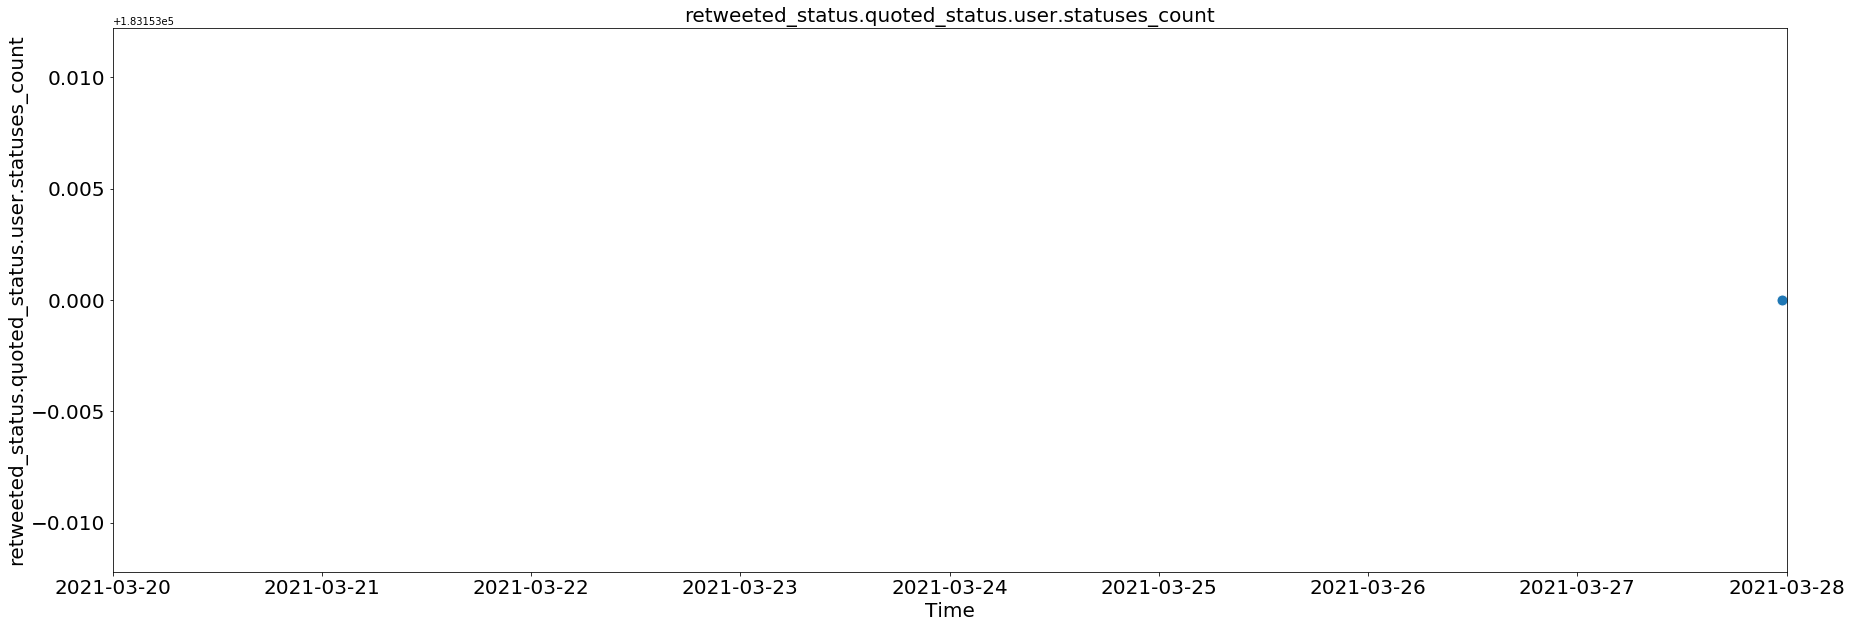

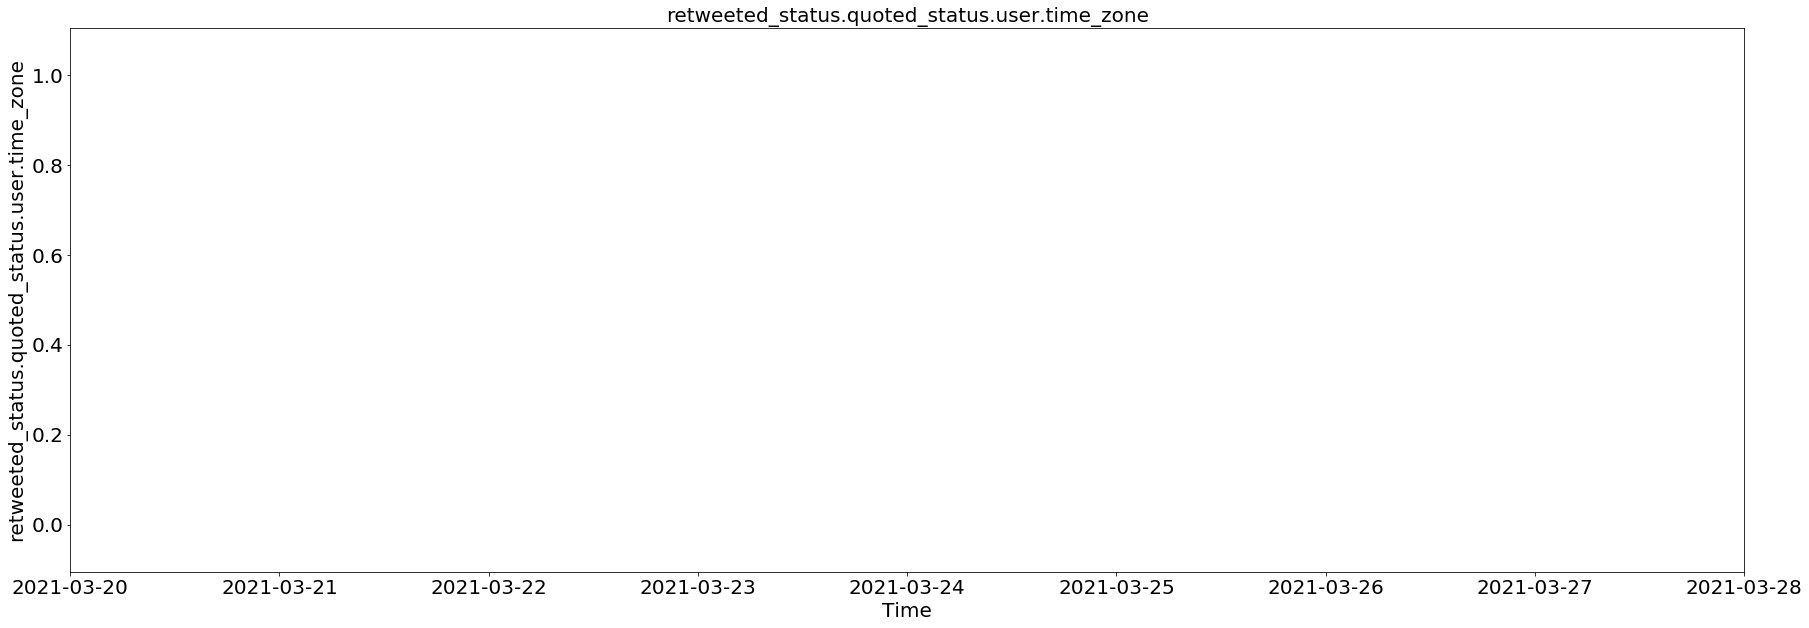

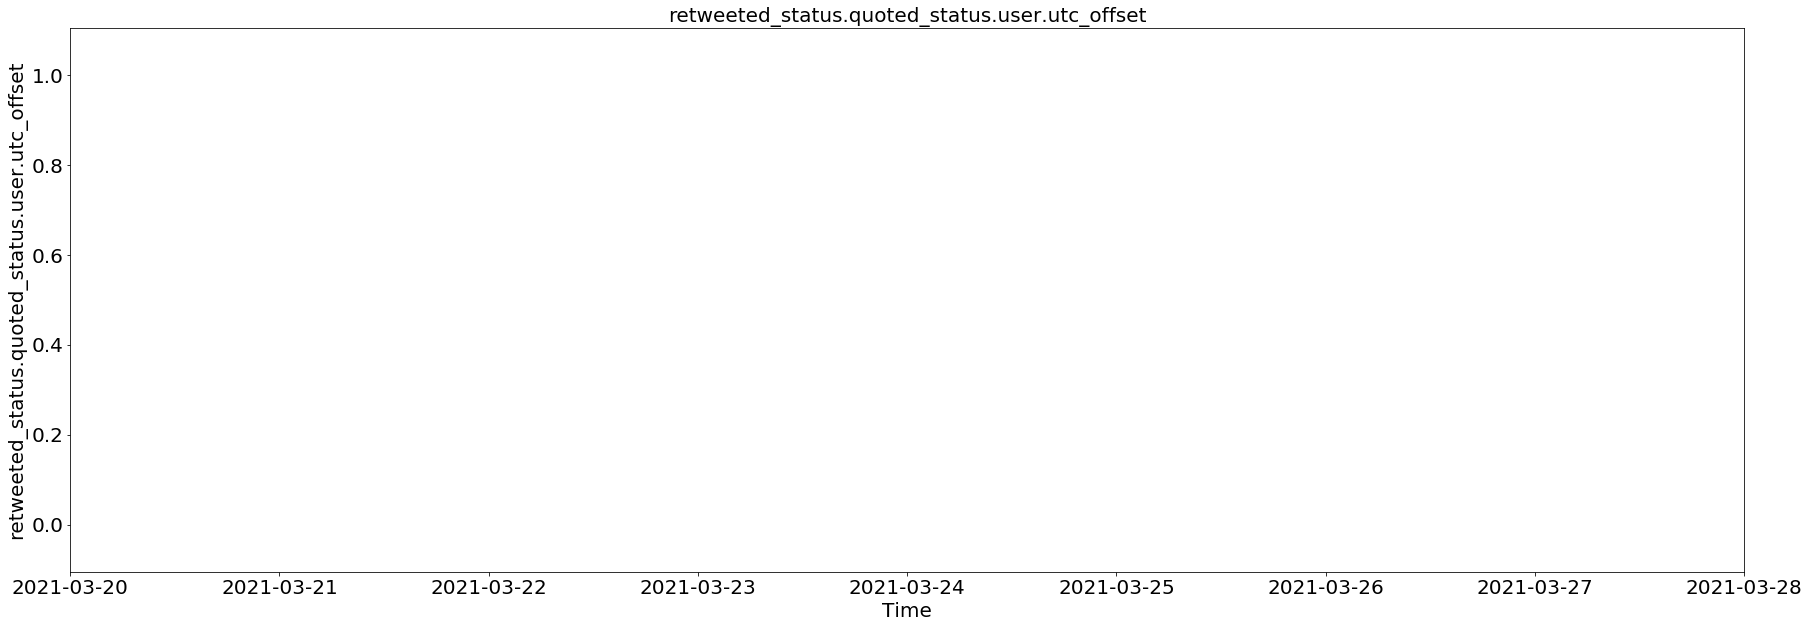

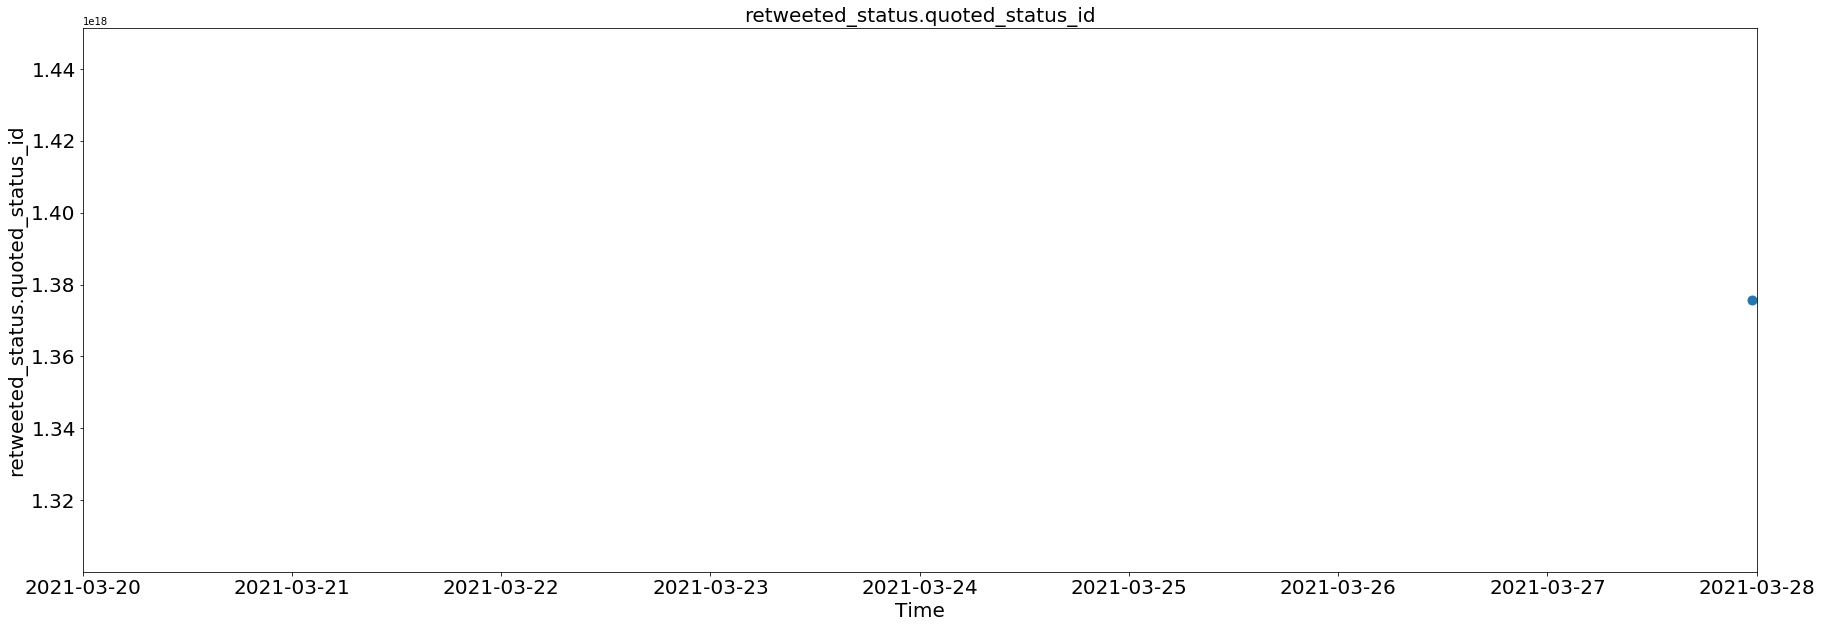

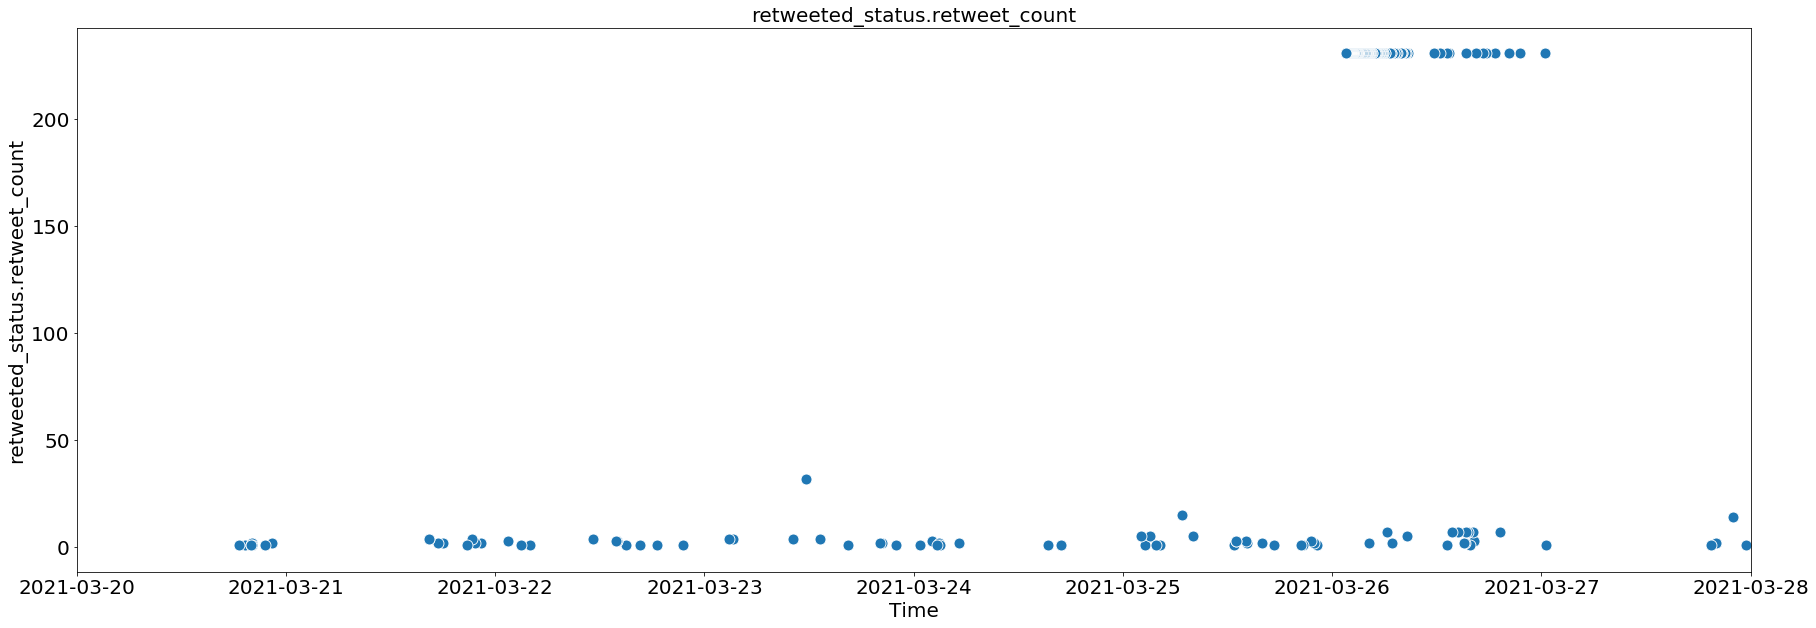

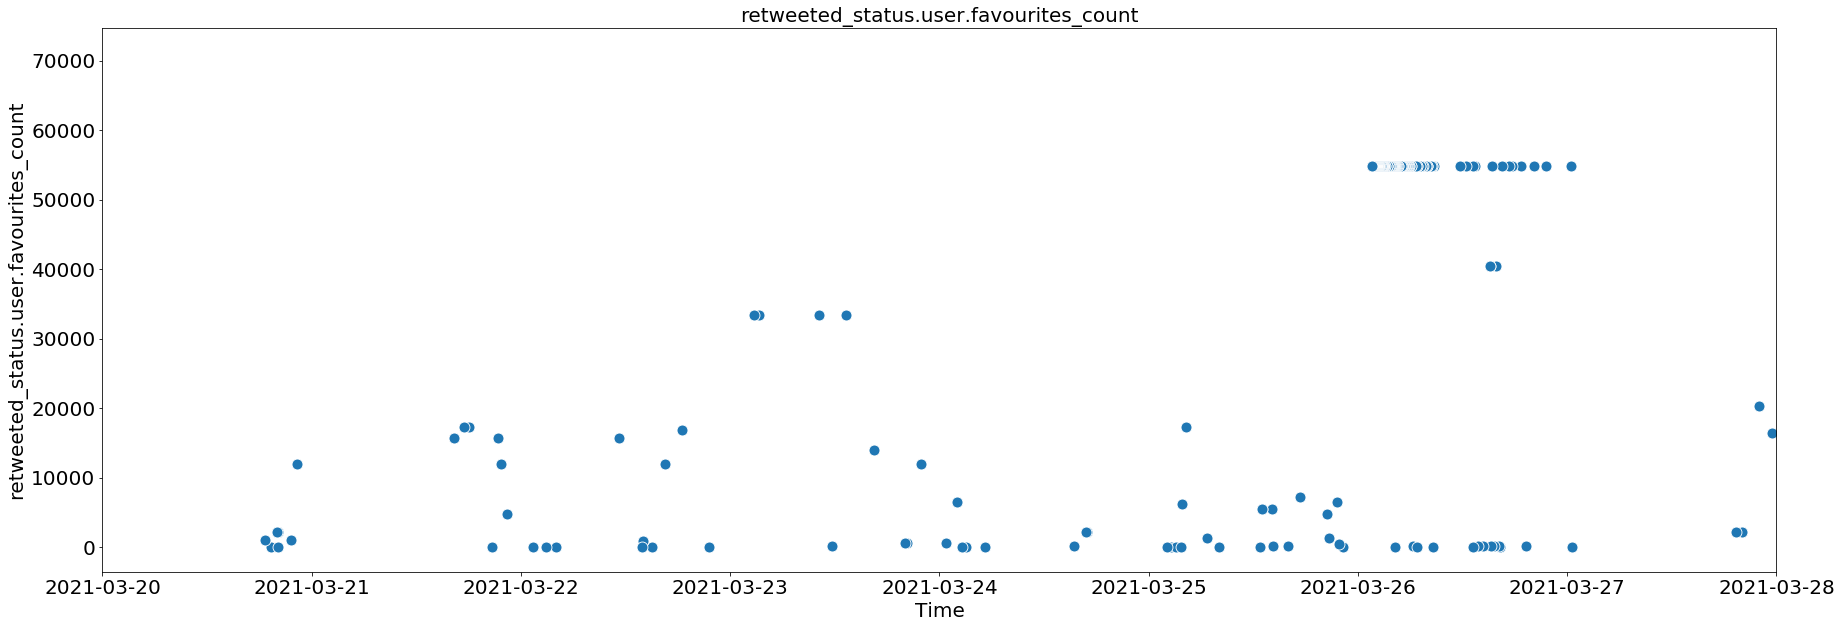

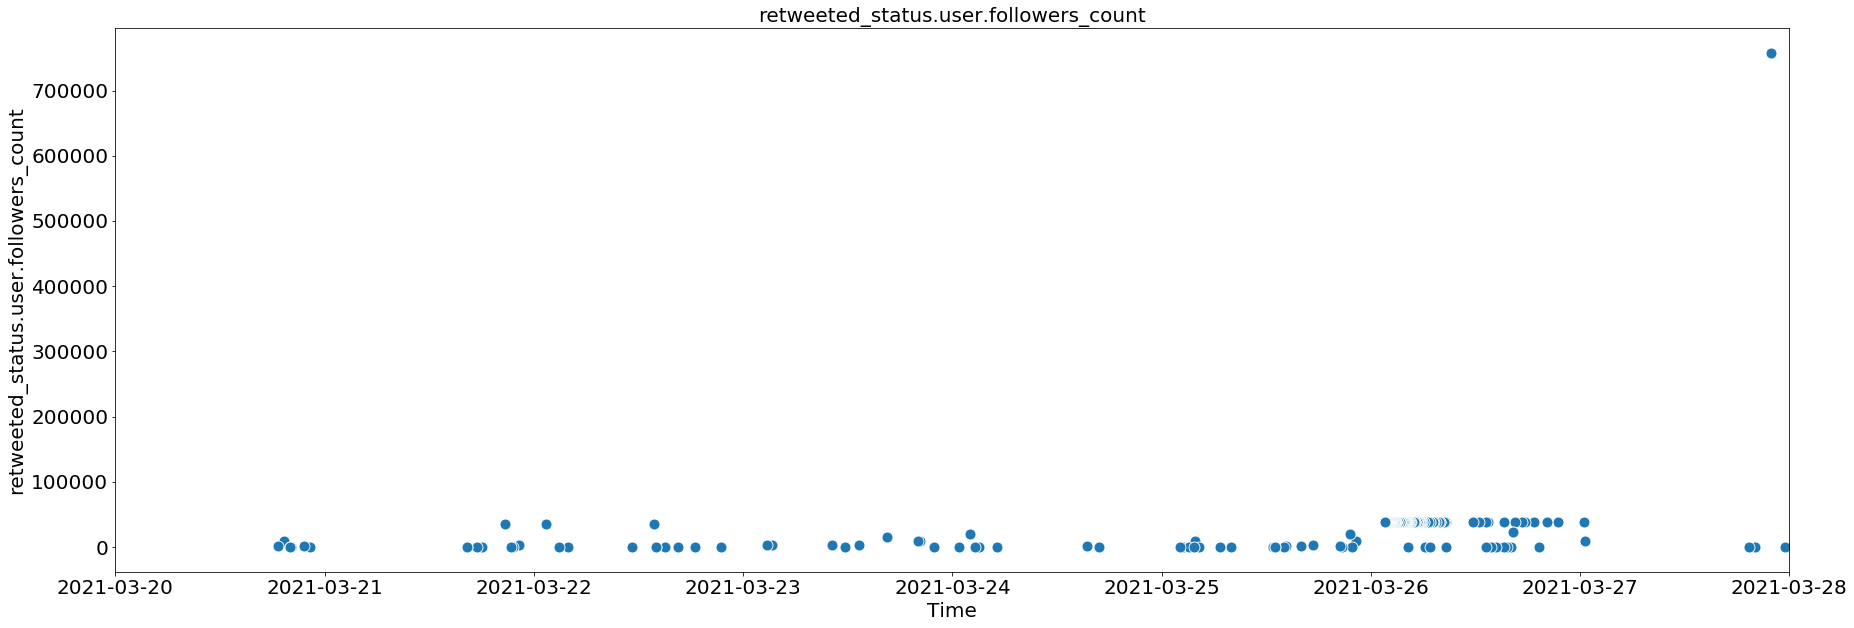

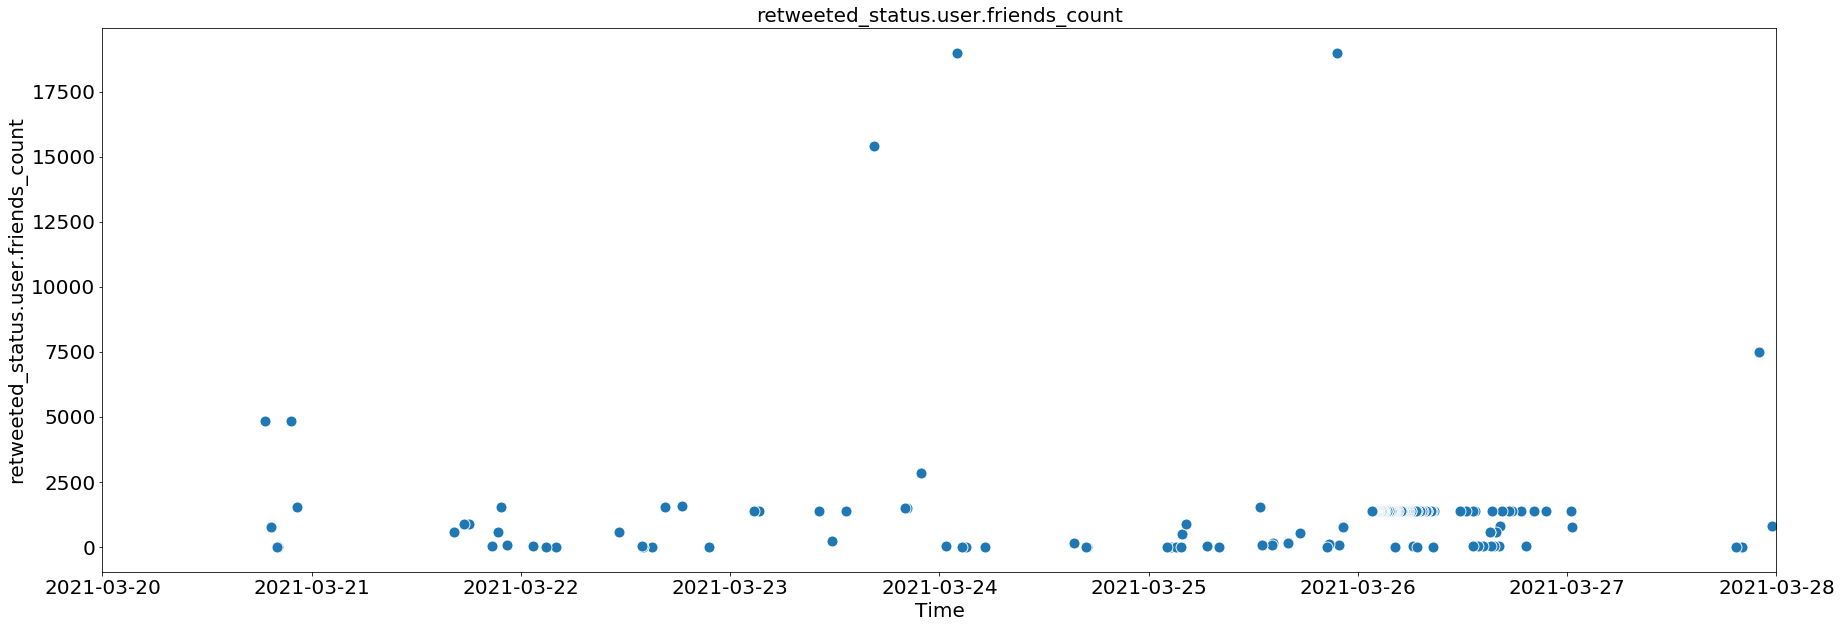

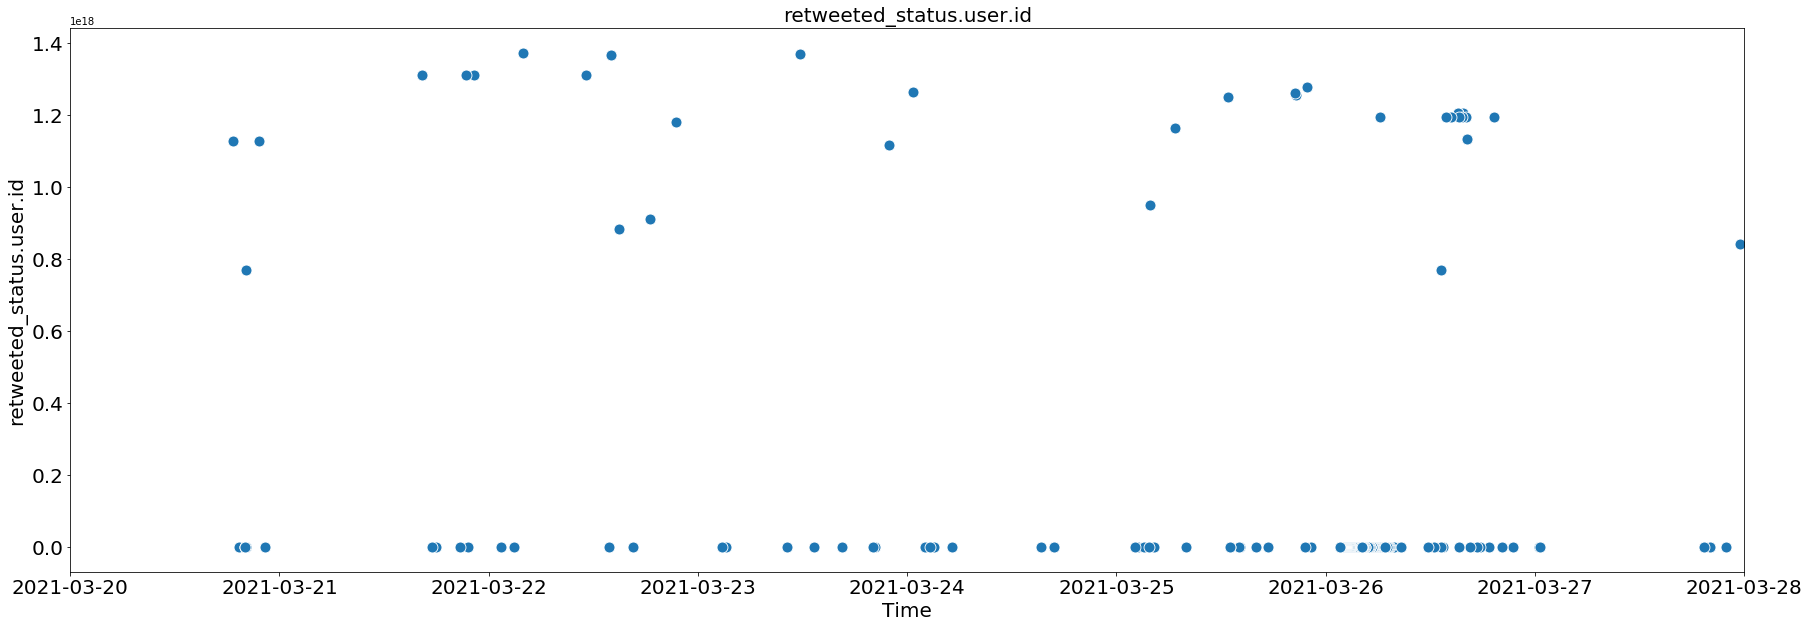

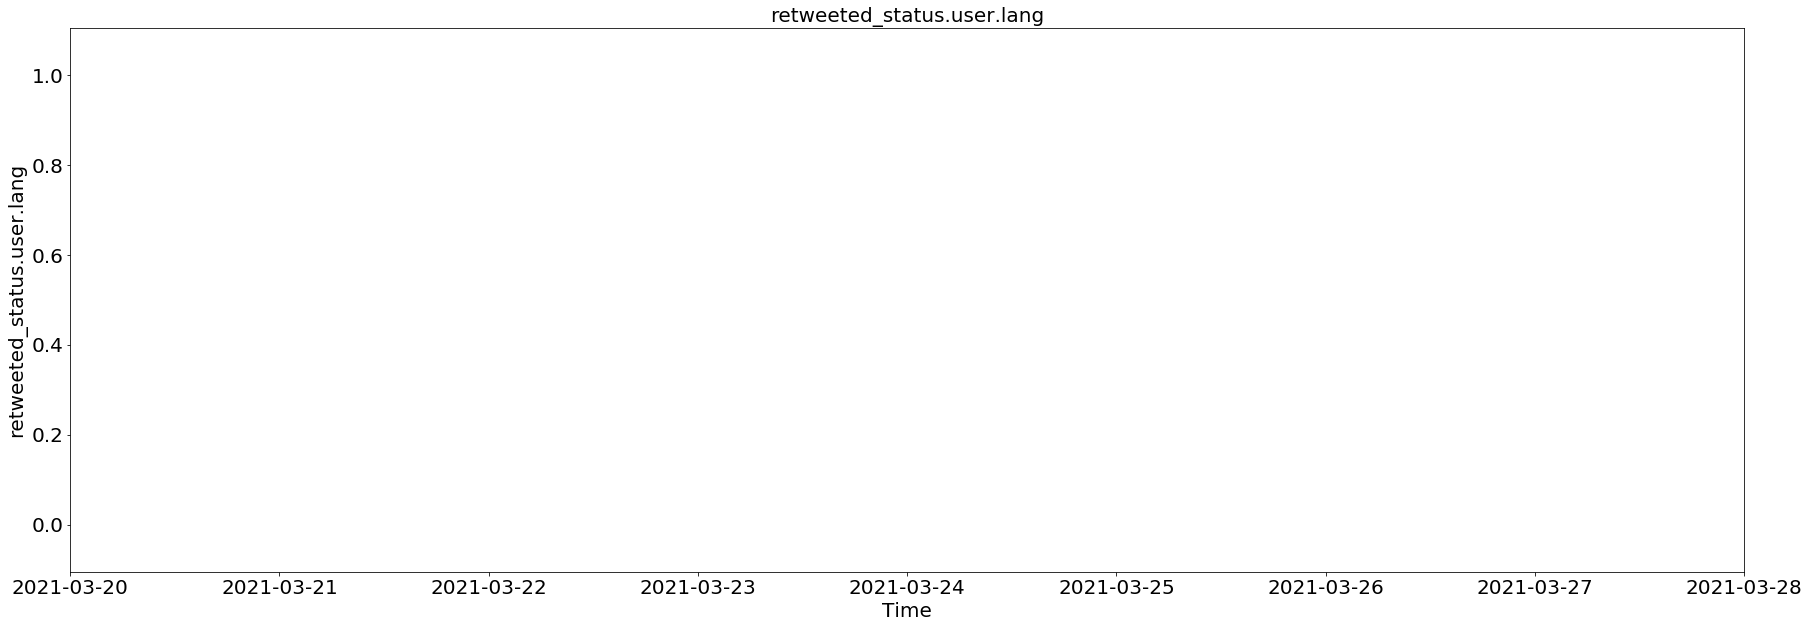

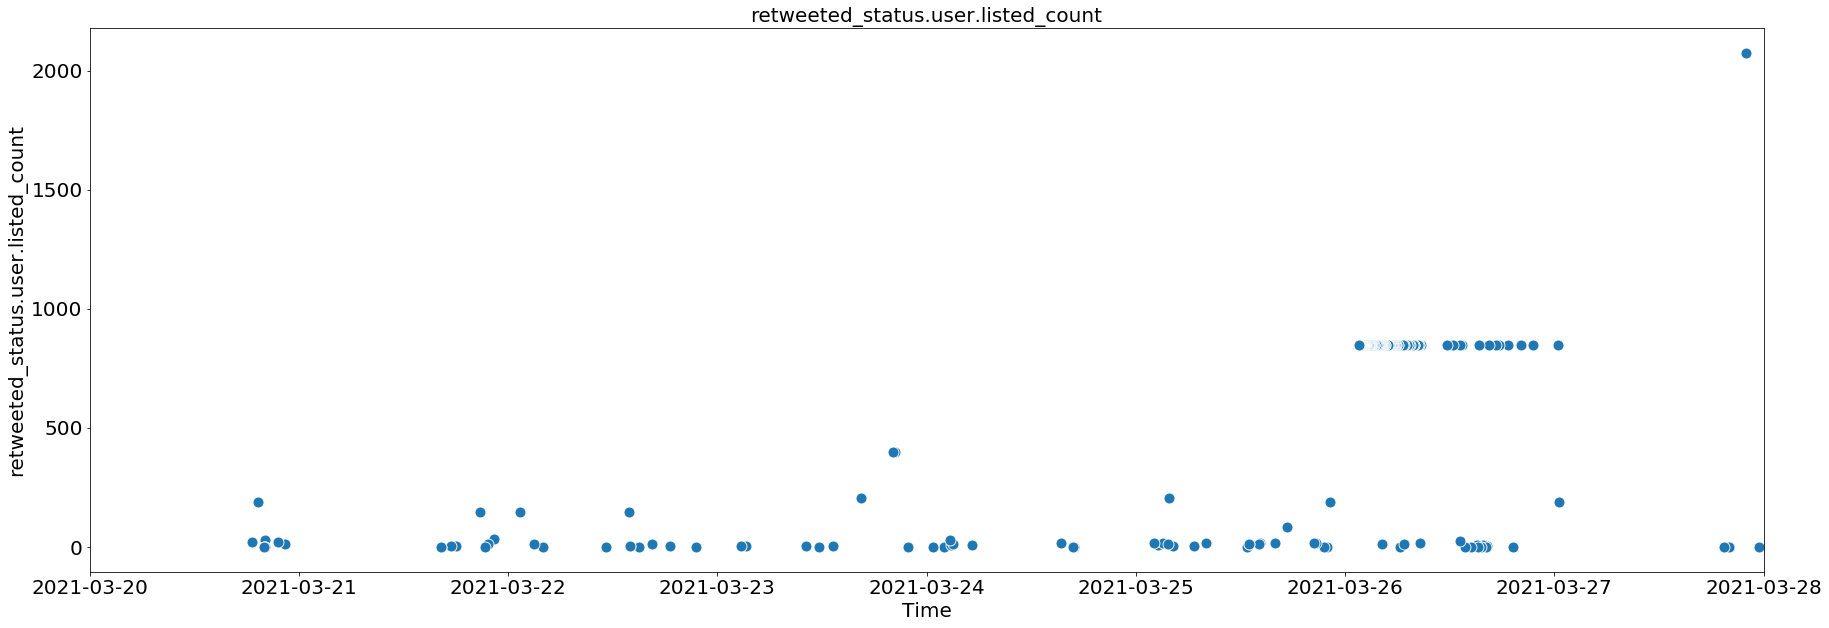

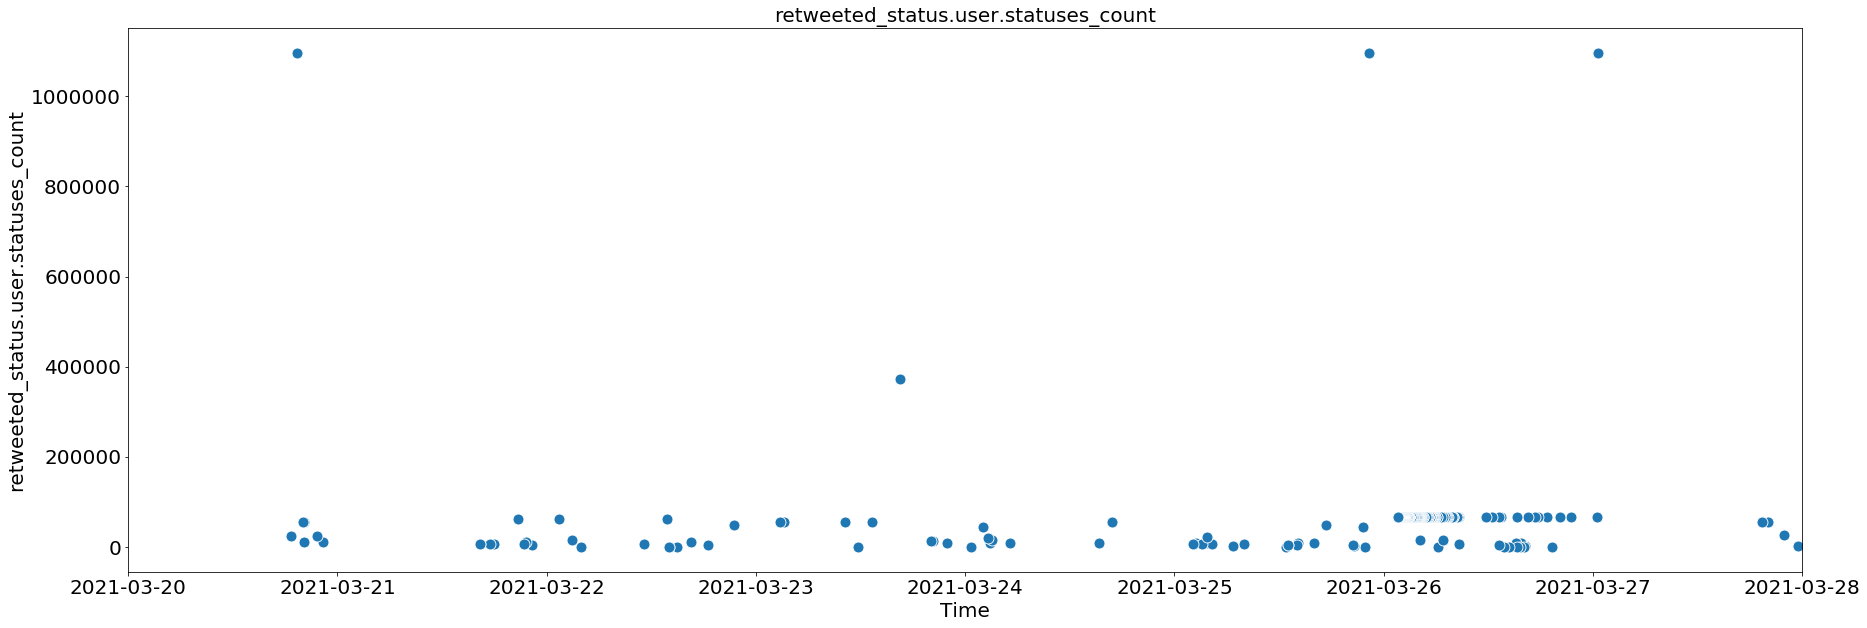

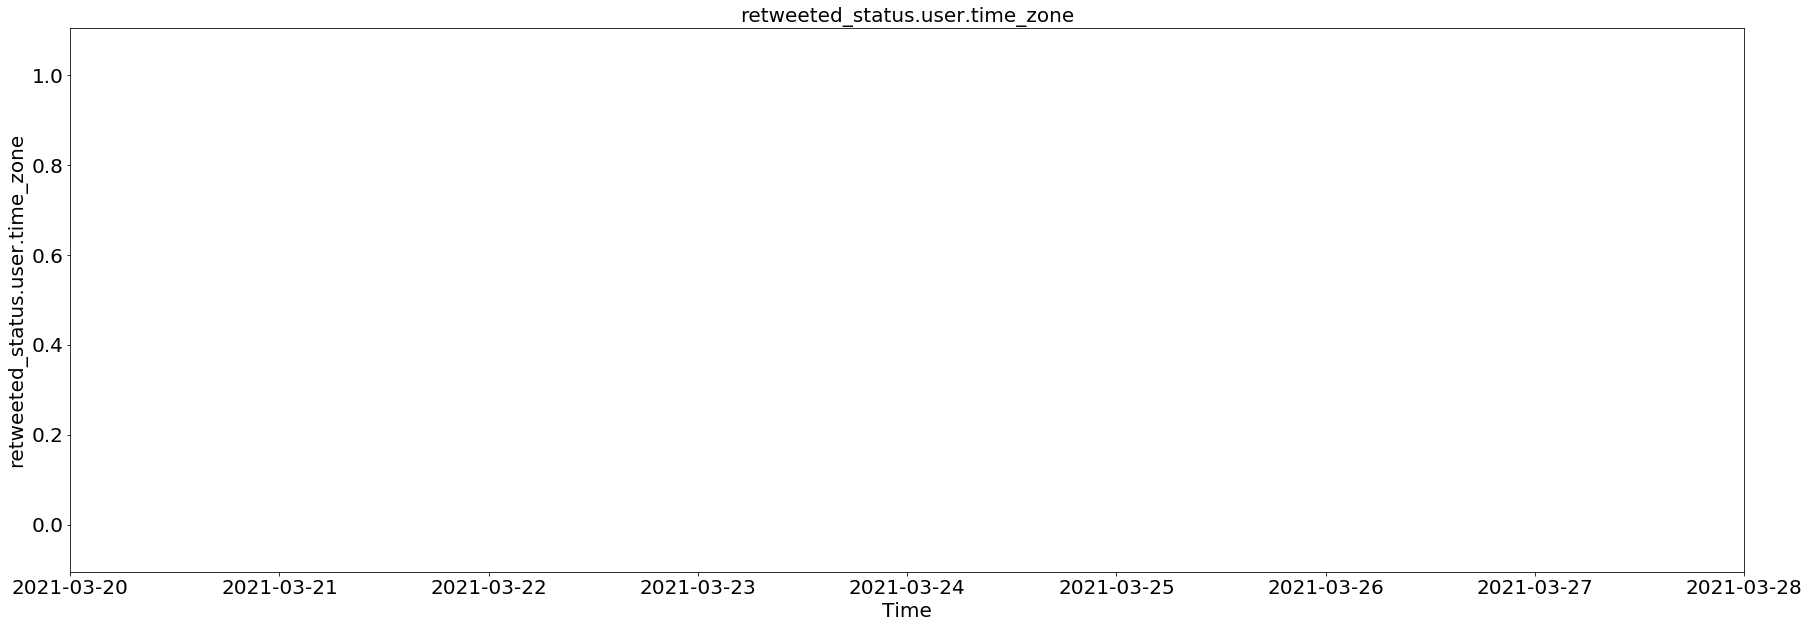

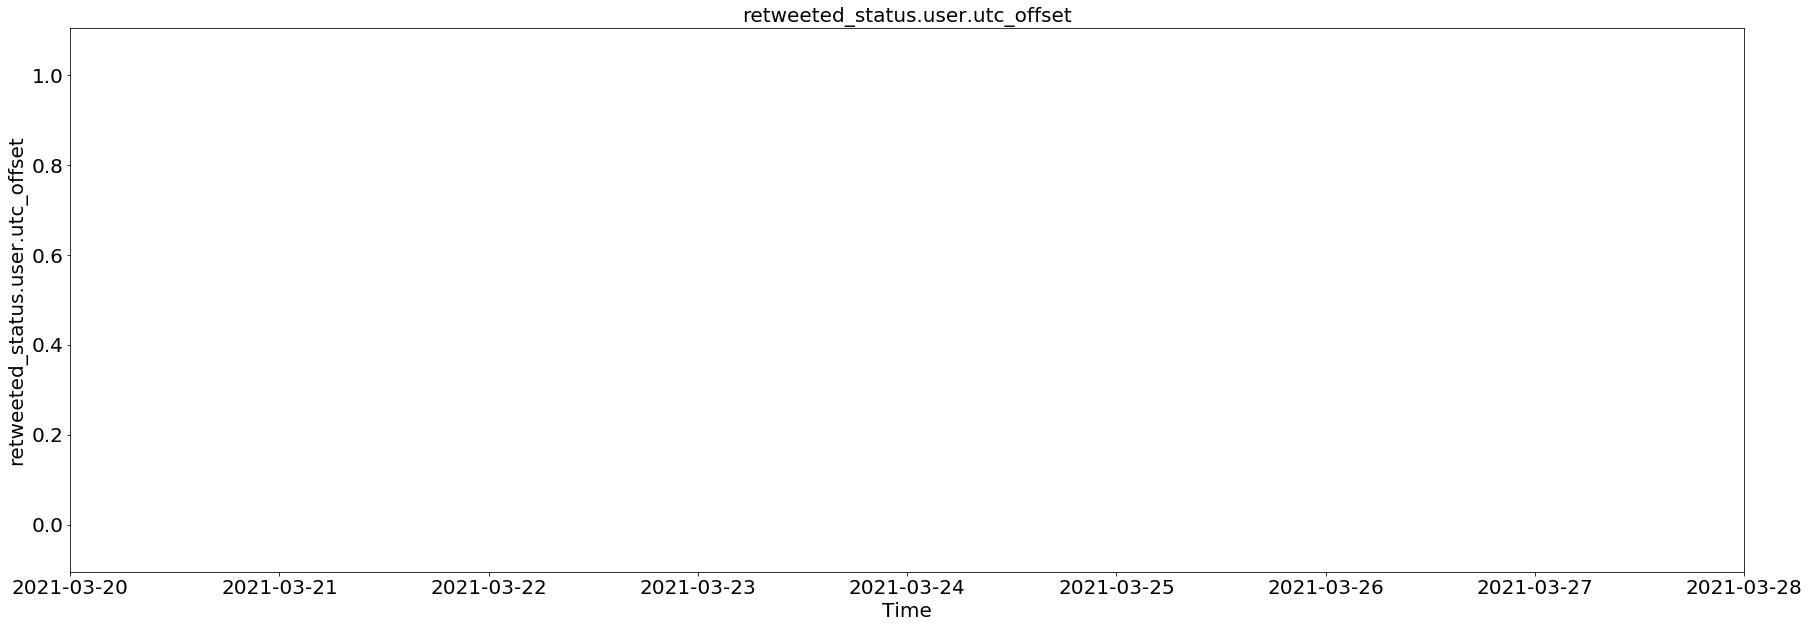

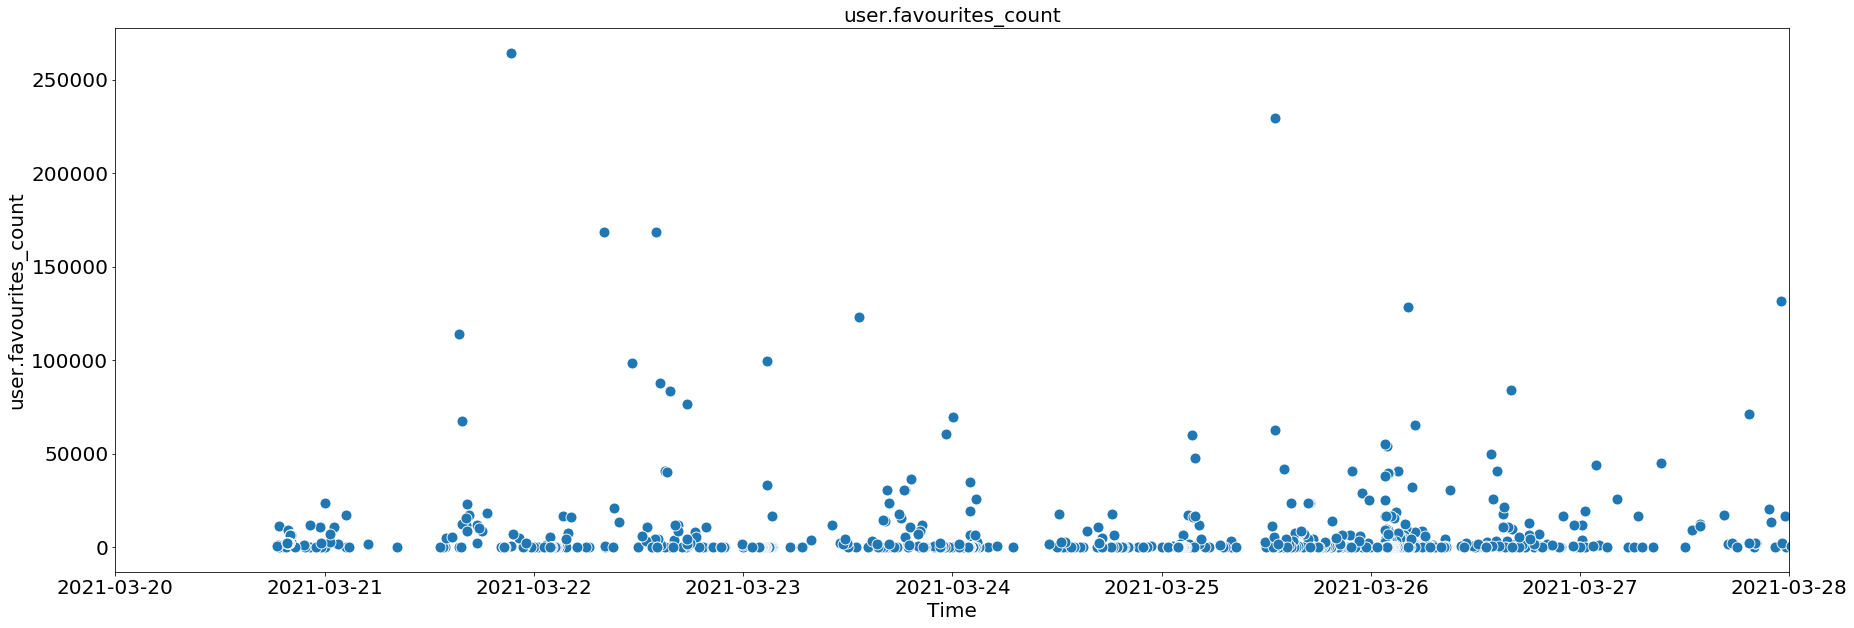

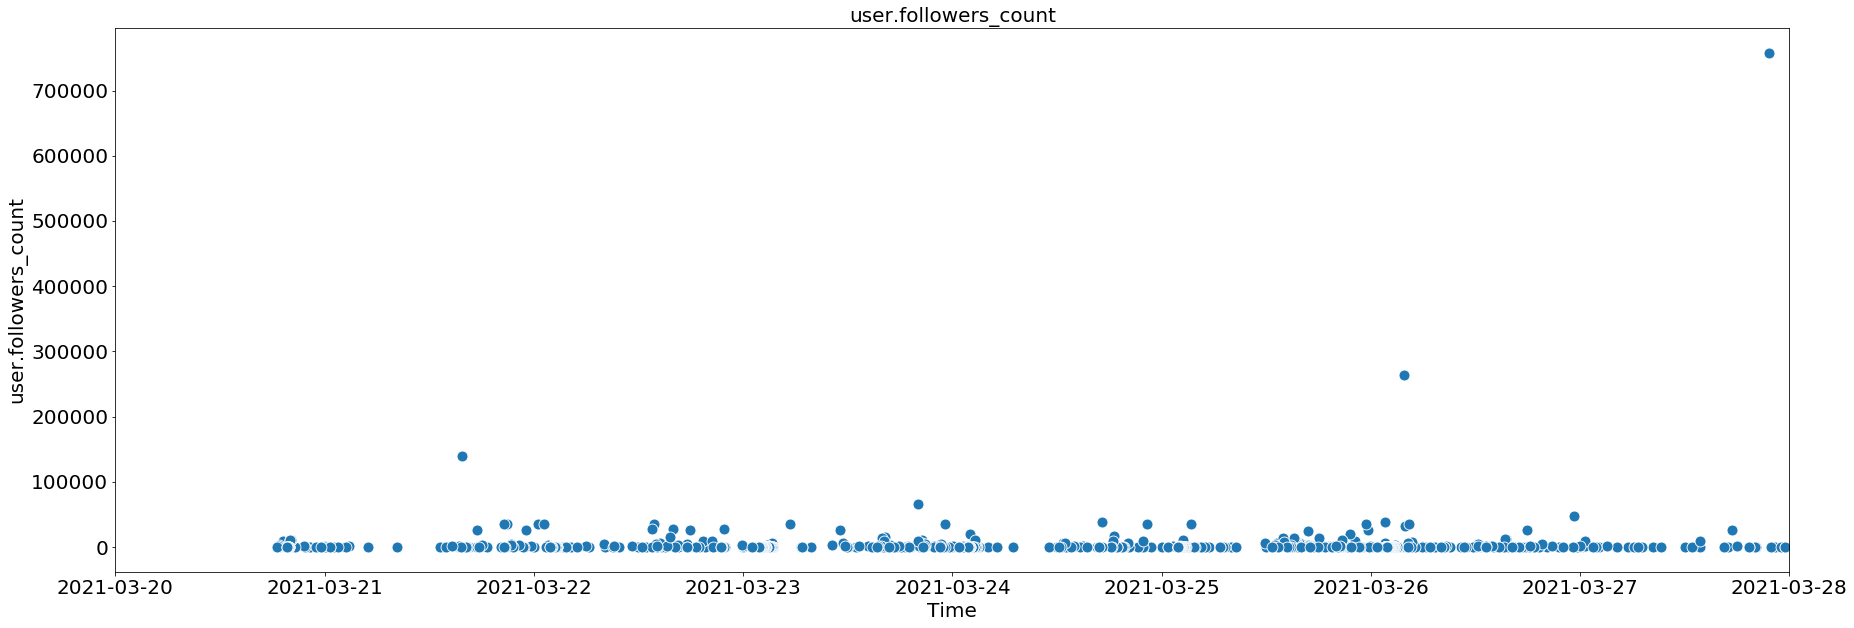

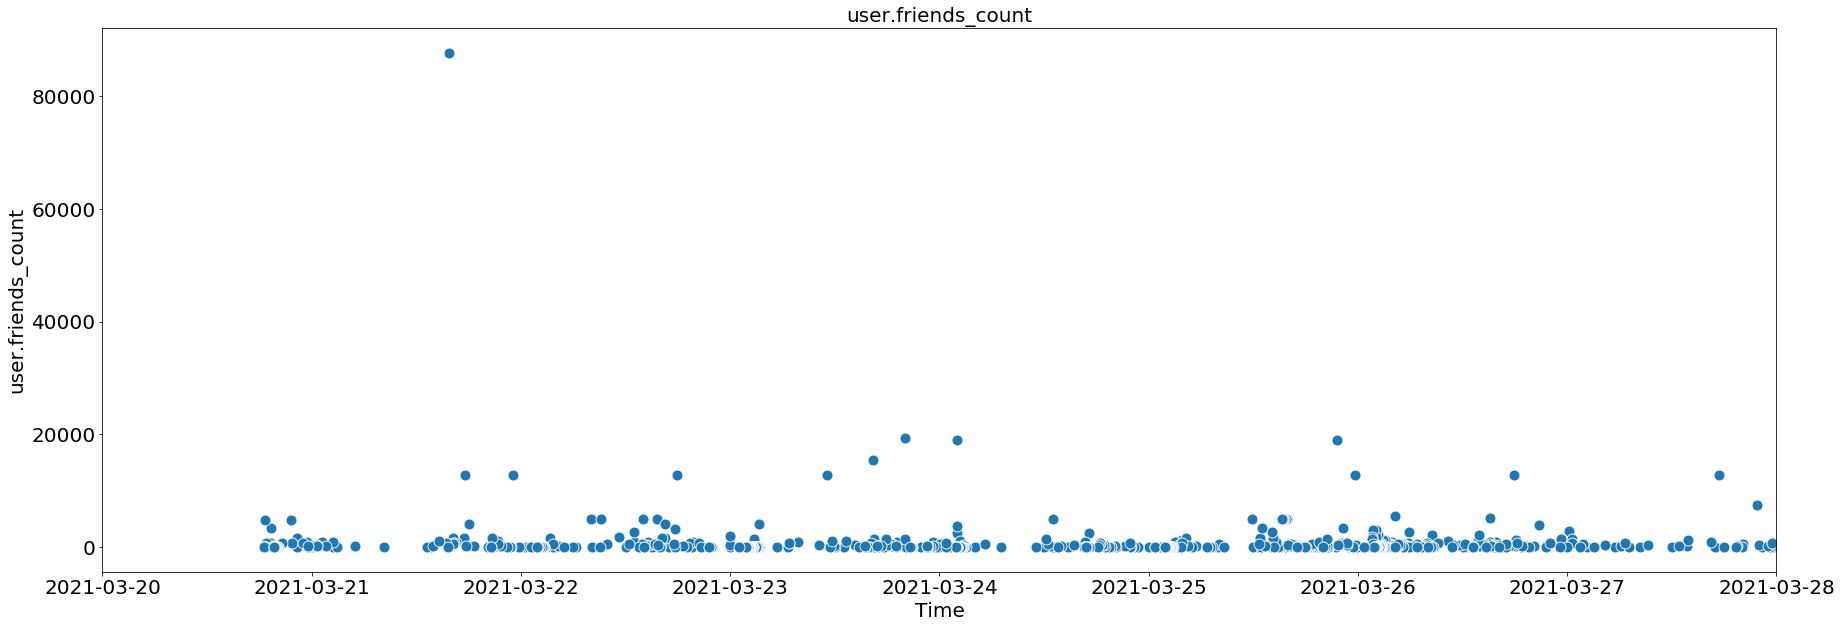

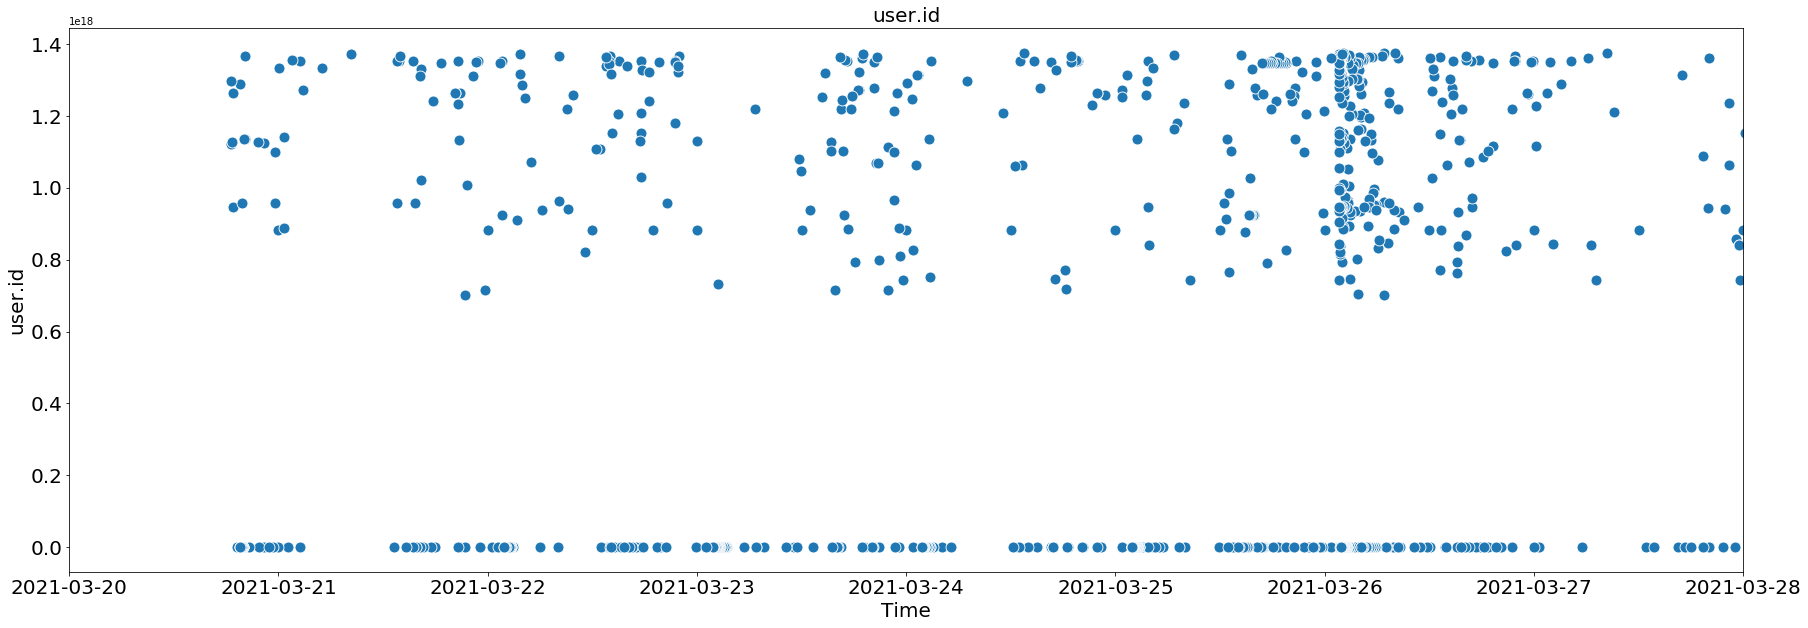

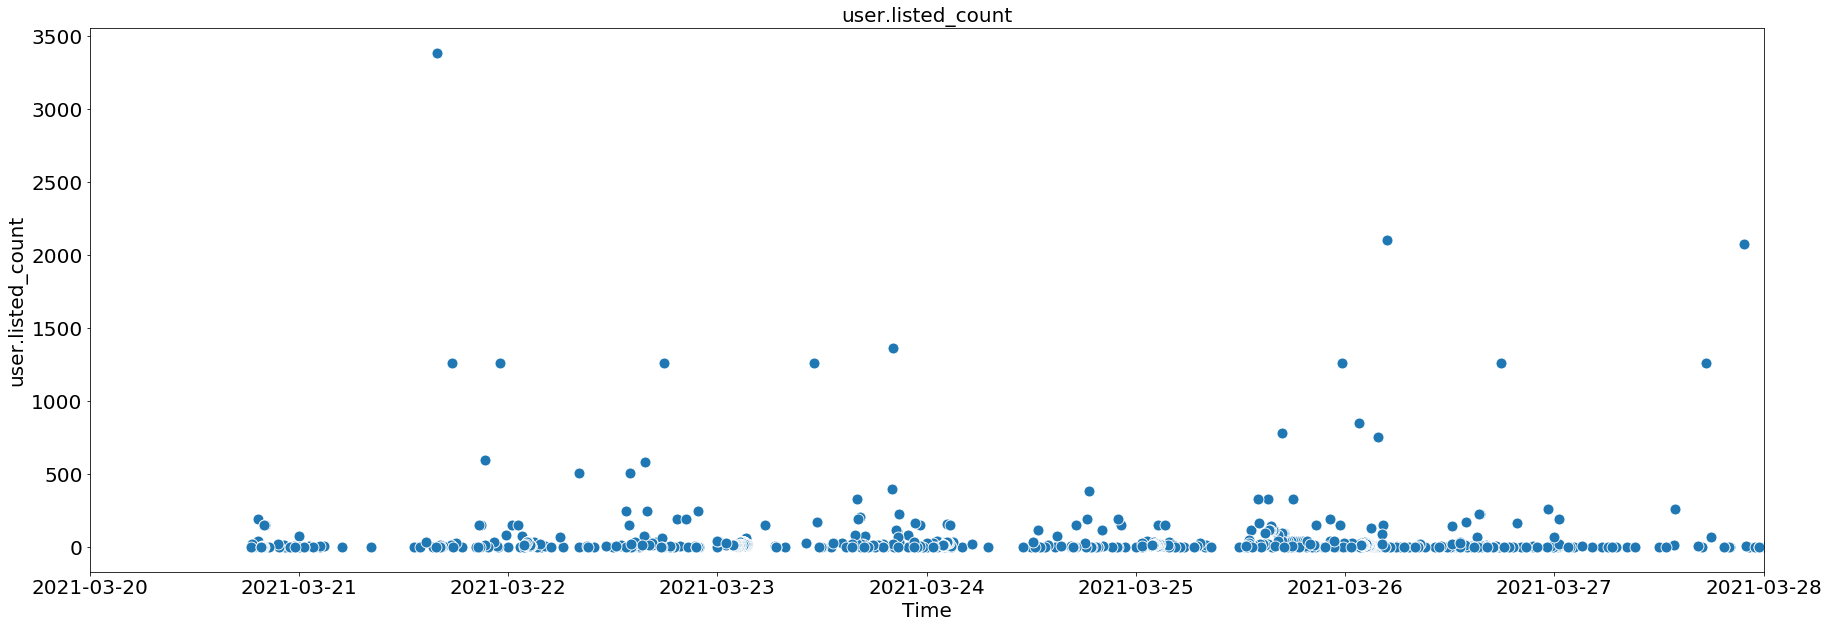

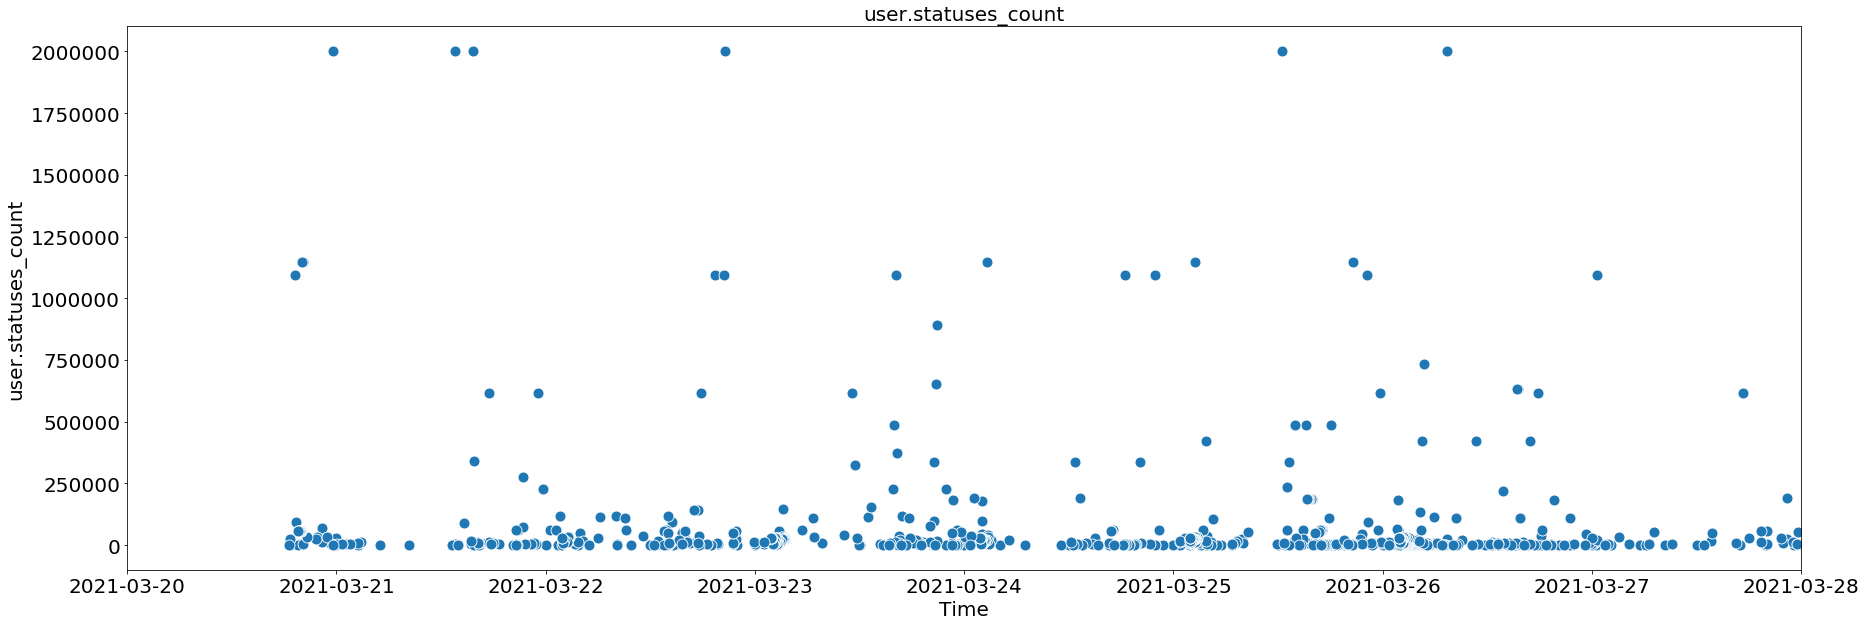

In [18]:
for col in test_df_num.columns:
    plot_vs_time(col, '2021-03-20', '2021-03-28')

# Combining with price data

In [19]:
import yfinance as yf

In [21]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        #tickers = "XSPA GNUS NKLA IBIO GME"
        tickers = "DLPN",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        #period = "5d",
        start = "2021-03-21",
        end = "2021-03-28",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [22]:
data.head()

Open  High   Low  Close  Volume
Datetime                                                  
2021-03-22 08:00:00-04:00  5.69  5.70  5.69   5.69       0
2021-03-22 08:03:00-04:00  5.69  5.69  5.69   5.69       0
2021-03-22 08:05:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:14:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:19:00-04:00  5.70  5.70  5.70   5.70       0

In [33]:
# Twitter data before tz convert
test_df.sort_index().head()

favorite_count  favorited                   id  \
created_at                                                                  
2021-03-20 18:30:27+00:00               6      False  1373341180516315136   
2021-03-20 18:31:41+00:00               0      False  1373341491326816256   
2021-03-20 18:37:10+00:00               0      False  1373342870560776195   
2021-03-20 18:44:42+00:00               0      False  1373344767396827136   
2021-03-20 18:48:05+00:00               0      False  1373345618614226951   

                           in_reply_to_status_id  in_reply_to_user_id  \
created_at                                                              
2021-03-20 18:30:27+00:00           1.373341e+18         1.296950e+18   
2021-03-20 18:31:41+00:00           1.373340e+18         2.499229e+09   
2021-03-20 18:37:10+00:00                    NaN                  NaN   
2021-03-20 18:44:42+00:00                    NaN                  NaN   
2021-03-20 18:48:05+00:00                    NaN                  NaN   

                           is_quote_status  quoted_status.contributors  \
created_at                                                               
2021-03-20 18:30:27+00:00            False                         NaN   
2021-03-20 18:31:41+00:00            False                         NaN   
2021-03-20 18:37:10+00:00            False                         NaN   
2021-03-20 18:44:42+00:00            False                         NaN   
2021-03-20 18:48:05+00:00            False                         NaN   

                           quoted_status.coordinates  \
created_at                                             
2021-03-20 18:30:27+00:00                        NaN   
2021-03-20 18:31:41+00:00                        NaN   
2021-03-20 18:37:10+00:00                        NaN   
2021-03-20 18:44:42+00:00                        NaN   
2021-03-20 18:48:05+00:00                        NaN   

                           quoted_status.favorite_count  quoted_status.geo  \
created_at                                                                   
2021-03-20 18:30:27+00:00                           NaN                NaN   
2021-03-20 18:31:41+00:00                           NaN                NaN   
2021-03-20 18:37:10+00:00                           NaN                NaN   
2021-03-20 18:44:42+00:00                           NaN                NaN   
2021-03-20 18:48:05+00:00                           NaN                NaN   

                           quoted_status.id  \
created_at                                    
2021-03-20 18:30:27+00:00               NaN   
2021-03-20 18:31:41+00:00               NaN   
2021-03-20 18:37:10+00:00               NaN   
2021-03-20 18:44:42+00:00               NaN   
2021-03-20 18:48:05+00:00               NaN   

                           quoted_status.in_reply_to_status_id  \
created_at                                                       
2021-03-20 18:30:27+00:00                                  NaN   
2021-03-20 18:31:41+00:00                                  NaN   
2021-03-20 18:37:10+00:00                                  NaN   
2021-03-20 18:44:42+00:00                                  NaN   
2021-03-20 18:48:05+00:00                                  NaN   

                           quoted_status.in_reply_to_user_id  \
created_at                                                     
2021-03-20 18:30:27+00:00                                NaN   
2021-03-20 18:31:41+00:00                                NaN   
2021-03-20 18:37:10+00:00                                NaN   
2021-03-20 18:44:42+00:00                                NaN   
2021-03-20 18:48:05+00:00                                NaN   

                           quoted_status.place  \
created_at                                       
2021-03-20 18:30:27+00:00                  NaN   
2021-03-20 18:31:41+00:00                  NaN   
2021-03-20 18:37:10+00:00                  NaN   
2021-03-20 18:44:42+00:0

In [34]:
test_df['Datetime'] = test_df.index
twitter = test_df.set_index('Datetime')
twitter.sort_index(inplace=True)

In [35]:
import pytz
eastern = pytz.timezone('US/Eastern')
twitter.index = twitter.index.tz_convert(eastern)

In [36]:
twitter.head()

favorite_count  favorited                   id  \
Datetime                                                                    
2021-03-20 14:30:27-04:00               6      False  1373341180516315136   
2021-03-20 14:31:41-04:00               0      False  1373341491326816256   
2021-03-20 14:37:10-04:00               0      False  1373342870560776195   
2021-03-20 14:44:42-04:00               0      False  1373344767396827136   
2021-03-20 14:48:05-04:00               0      False  1373345618614226951   

                           in_reply_to_status_id  in_reply_to_user_id  \
Datetime                                                                
2021-03-20 14:30:27-04:00           1.373341e+18         1.296950e+18   
2021-03-20 14:31:41-04:00           1.373340e+18         2.499229e+09   
2021-03-20 14:37:10-04:00                    NaN                  NaN   
2021-03-20 14:44:42-04:00                    NaN                  NaN   
2021-03-20 14:48:05-04:00                    NaN                  NaN   

                           is_quote_status  quoted_status.contributors  \
Datetime                                                                 
2021-03-20 14:30:27-04:00            False                         NaN   
2021-03-20 14:31:41-04:00            False                         NaN   
2021-03-20 14:37:10-04:00            False                         NaN   
2021-03-20 14:44:42-04:00            False                         NaN   
2021-03-20 14:48:05-04:00            False                         NaN   

                           quoted_status.coordinates  \
Datetime                                               
2021-03-20 14:30:27-04:00                        NaN   
2021-03-20 14:31:41-04:00                        NaN   
2021-03-20 14:37:10-04:00                        NaN   
2021-03-20 14:44:42-04:00                        NaN   
2021-03-20 14:48:05-04:00                        NaN   

                           quoted_status.favorite_count  quoted_status.geo  \
Datetime                                                                     
2021-03-20 14:30:27-04:00                           NaN                NaN   
2021-03-20 14:31:41-04:00                           NaN                NaN   
2021-03-20 14:37:10-04:00                           NaN                NaN   
2021-03-20 14:44:42-04:00                           NaN                NaN   
2021-03-20 14:48:05-04:00                           NaN                NaN   

                           quoted_status.id  \
Datetime                                      
2021-03-20 14:30:27-04:00               NaN   
2021-03-20 14:31:41-04:00               NaN   
2021-03-20 14:37:10-04:00               NaN   
2021-03-20 14:44:42-04:00               NaN   
2021-03-20 14:48:05-04:00               NaN   

                           quoted_status.in_reply_to_status_id  \
Datetime                                                         
2021-03-20 14:30:27-04:00                                  NaN   
2021-03-20 14:31:41-04:00                                  NaN   
2021-03-20 14:37:10-04:00                                  NaN   
2021-03-20 14:44:42-04:00                                  NaN   
2021-03-20 14:48:05-04:00                                  NaN   

                           quoted_status.in_reply_to_user_id  \
Datetime                                                       
2021-03-20 14:30:27-04:00                                NaN   
2021-03-20 14:31:41-04:00                                NaN   
2021-03-20 14:37:10-04:00                                NaN   
2021-03-20 14:44:42-04:00                                NaN   
2021-03-20 14:48:05-04:00                                NaN   

                           quoted_status.place  \
Datetime                                         
2021-03-20 14:30:27-04:00                  NaN   
2021-03-20 14:31:41-04:00                  NaN   
2021-03-20 14:37:10-04:00                  NaN   
2021-03-20 14:44:42-04:0

In [37]:
data['Datetime'] = pd.to_datetime(data.index)
data = data.set_index('Datetime')
data.index = data.index.tz_convert(eastern)
data.head()

Open  High   Low  Close  Volume
Datetime                                                  
2021-03-22 08:00:00-04:00  5.69  5.70  5.69   5.69       0
2021-03-22 08:03:00-04:00  5.69  5.69  5.69   5.69       0
2021-03-22 08:05:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:14:00-04:00  5.70  5.70  5.70   5.70       0
2021-03-22 08:19:00-04:00  5.70  5.70  5.70   5.70       0

In [38]:
twitter_stonks = pd.merge_asof(twitter, data, on="Datetime", direction="nearest")

In [39]:
twitter_stonks.head()

Datetime  favorite_count  favorited                   id  \
0 2021-03-20 14:30:27-04:00               6      False  1373341180516315136   
1 2021-03-20 14:31:41-04:00               0      False  1373341491326816256   
2 2021-03-20 14:37:10-04:00               0      False  1373342870560776195   
3 2021-03-20 14:44:42-04:00               0      False  1373344767396827136   
4 2021-03-20 14:48:05-04:00               0      False  1373345618614226951   

   in_reply_to_status_id  in_reply_to_user_id  is_quote_status  \
0           1.373341e+18         1.296950e+18            False   
1           1.373340e+18         2.499229e+09            False   
2                    NaN                  NaN            False   
3                    NaN                  NaN            False   
4                    NaN                  NaN            False   

   quoted_status.contributors  quoted_status.coordinates  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   

   quoted_status.favorite_count  quoted_status.geo  quoted_status.id  \
0                           NaN                NaN               NaN   
1                           NaN                NaN               NaN   
2                           NaN                NaN               NaN   
3                           NaN                NaN               NaN   
4                           NaN                NaN               NaN   

   quoted_status.in_reply_to_status_id  quoted_status.in_reply_to_user_id  \
0                                  NaN                                NaN   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  NaN                                NaN   
4                                  NaN                                NaN   

   quoted_status.place  quoted_status.quoted_status_id  \
0                  NaN                             NaN   
1                  NaN                             NaN   
2                  NaN                             NaN   
3                  NaN                             NaN   
4                  NaN                             NaN   

   quoted_status.retweet_count  quoted_status.user.favourites_count  \
0                          NaN                                  NaN   
1                          NaN                                  NaN   
2                          NaN                                  NaN   
3                          NaN                                  NaN   
4                          NaN                                  NaN   

   quoted_status.user.followers_count  quoted_status.user.friends_count  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   

   quoted_status.user.id  quoted_status.user.lang  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   

   quoted_status.user.listed_count  quoted_status.user.statuses_count  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


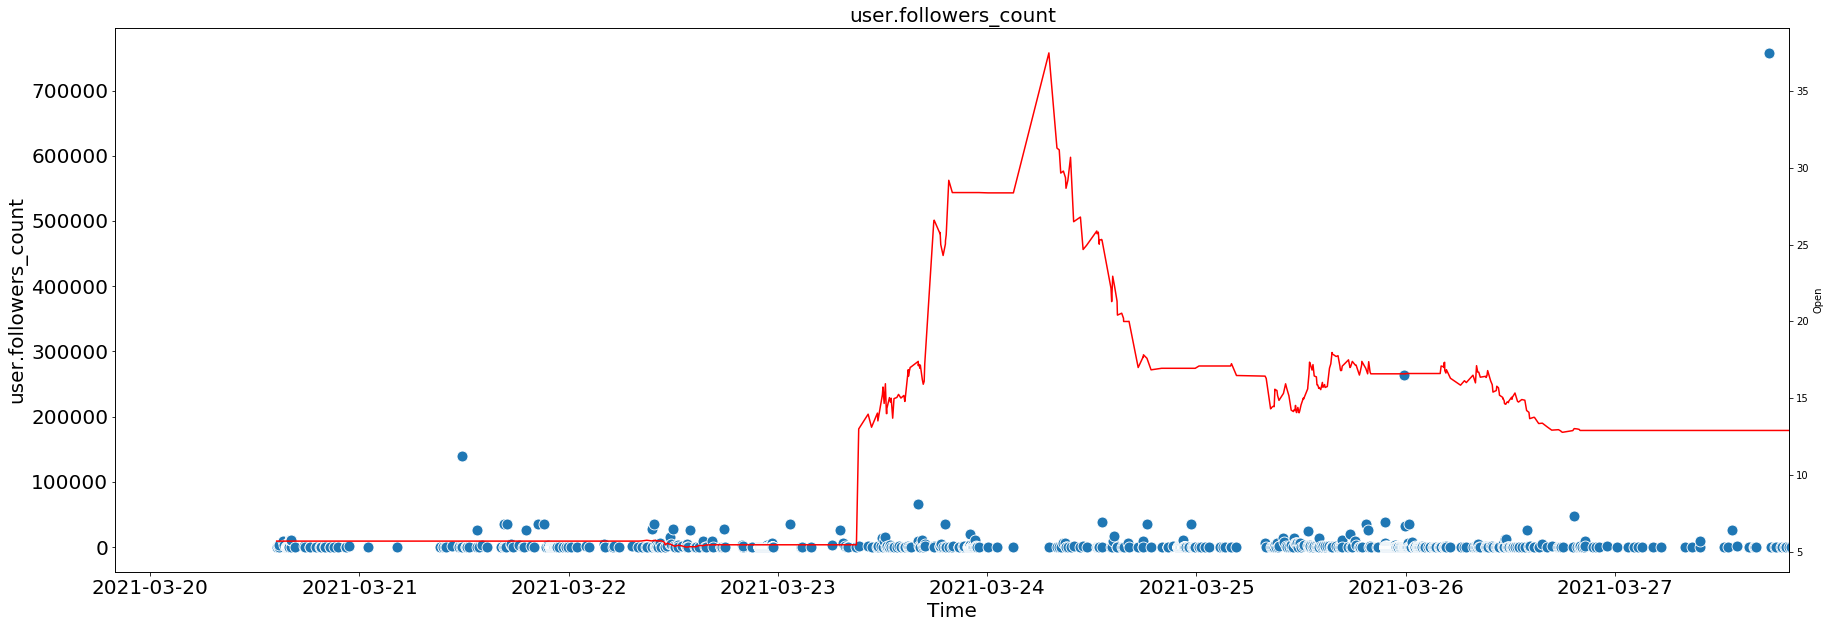

In [46]:
# First look at retweets
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.scatterplot(data=twitter_stonks, x=twitter_stonks['Datetime'], y="user.followers_count", s=120)
ax1.set_xlim('2021-03-20','2021-03-28')
ax1.set_title("user.followers_count",fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel("user.followers_count",fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=twitter_stonks, x=twitter_stonks['Datetime'], y="Open", color='red')
fig.show()

In [69]:
# functionize plot
def plot_vs_price(df, col, start, end):
    fig, ax1 = plt.subplots(figsize=(30,10))
    ax1 = sns.scatterplot(data=twitter_stonks, x=df['Datetime'], y=col, s=120)
    ax1.set_xlim(start, end)
    ax1.set_title(col,fontsize=20)
    ax1.set_xlabel("Time",fontsize=20)
    ax1.set_ylabel(col,fontsize=20)
    ax1.tick_params(labelsize=20)
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(data=df, x=df['Datetime'], y="Open", color='red')
    ax2.set_ylabel("Price",fontsize=20)
    ax2.tick_params(labelsize=20)
    fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


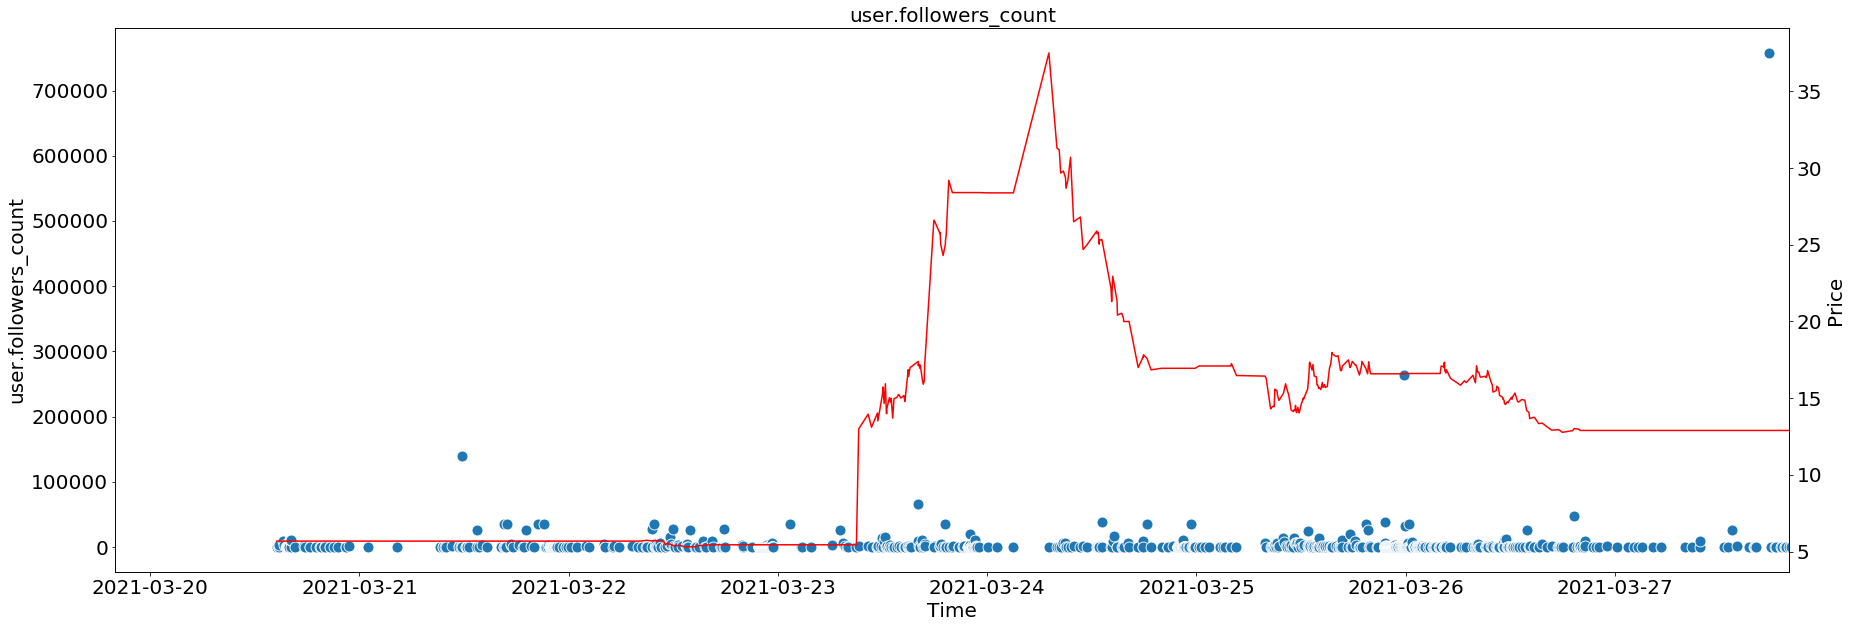

In [70]:
# Test function 
plot_vs_price(twitter_stonks, 'user.followers_count', '2021-03-20', '2021-03-28')

In [55]:
twitter_stonks_num = twitter_stonks.select_dtypes(include=['float64', 'int64'])

In [62]:
twitter_stonks_num.dtypes

favorite_count                                                int64
id                                                            int64
in_reply_to_status_id                                       float64
in_reply_to_user_id                                         float64
quoted_status.contributors                                  float64
quoted_status.coordinates                                   float64
quoted_status.favorite_count                                float64
quoted_status.geo                                           float64
quoted_status.id                                            float64
quoted_status.in_reply_to_status_id                         float64
quoted_status.in_reply_to_user_id                           float64
quoted_status.place                                         float64
quoted_status.quoted_status_id                              float64
quoted_status.retweet_count                                 float64
quoted_status.user.favourites_count             

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Conve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep

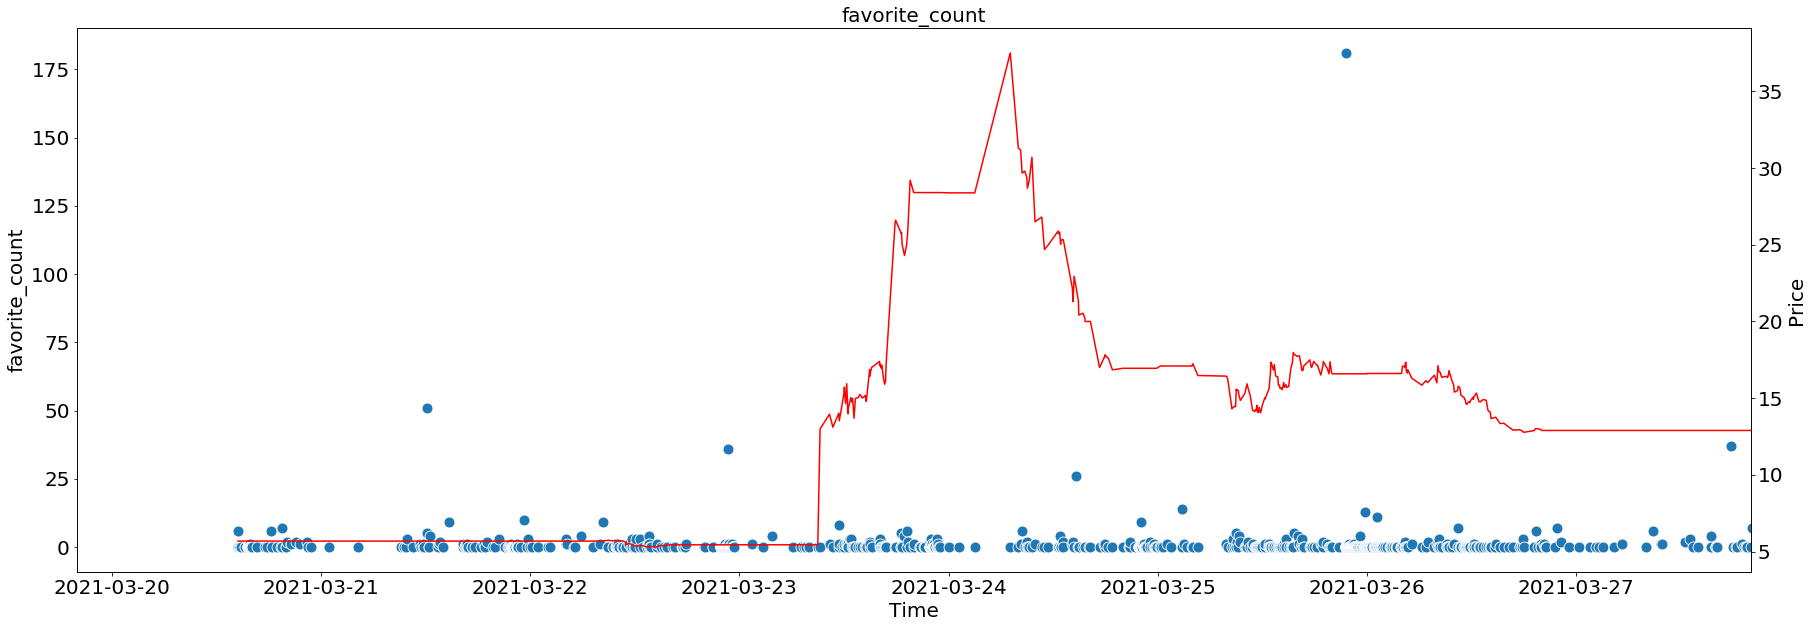

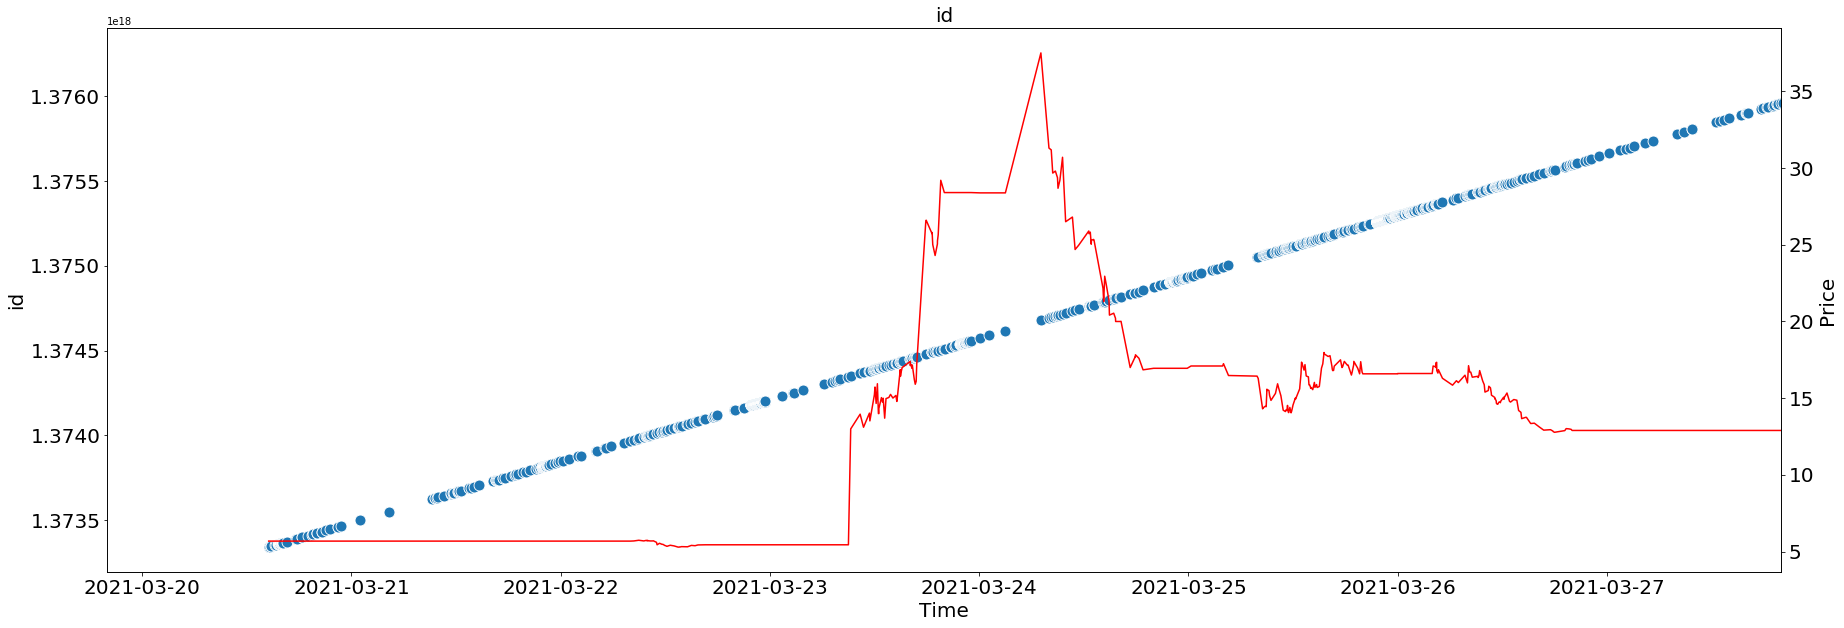

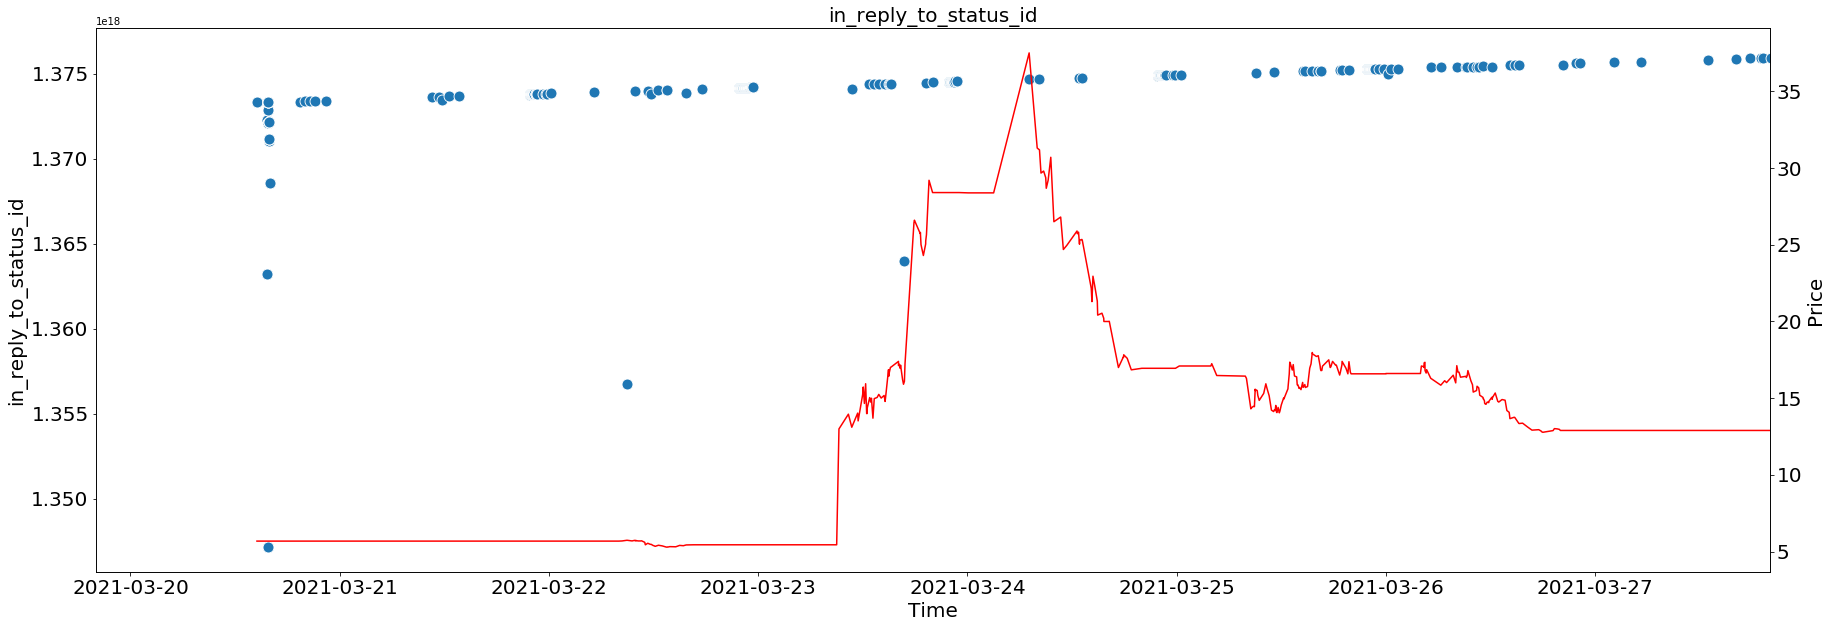

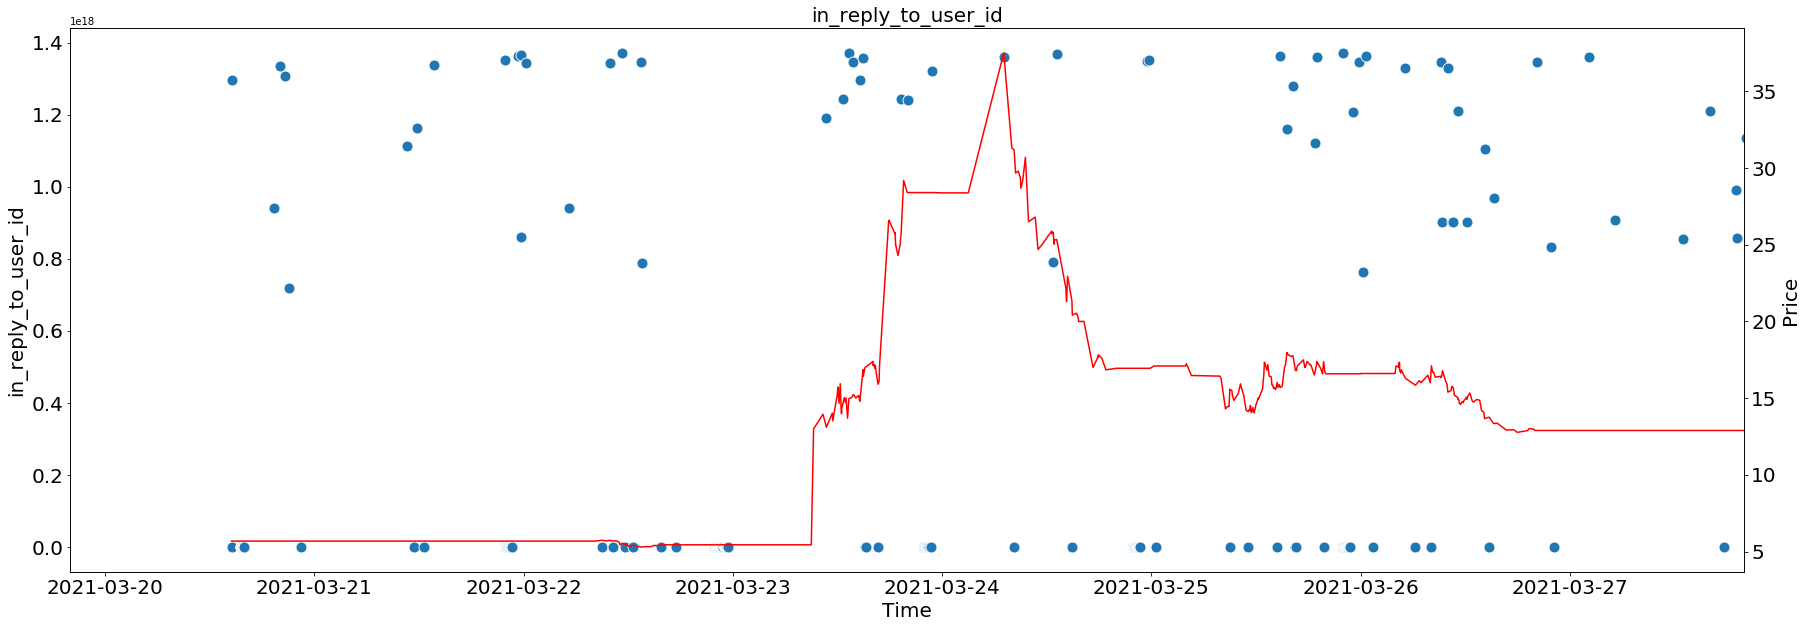

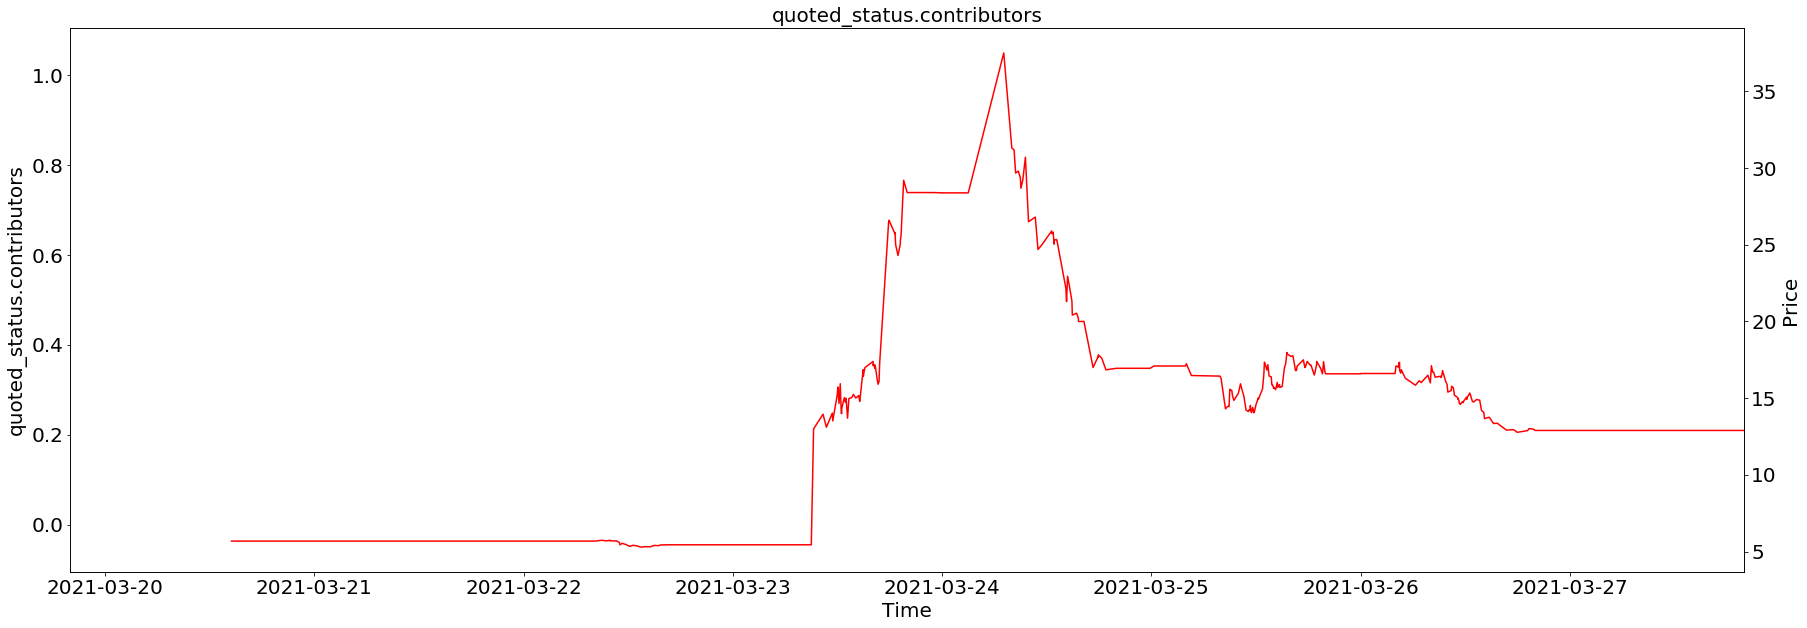

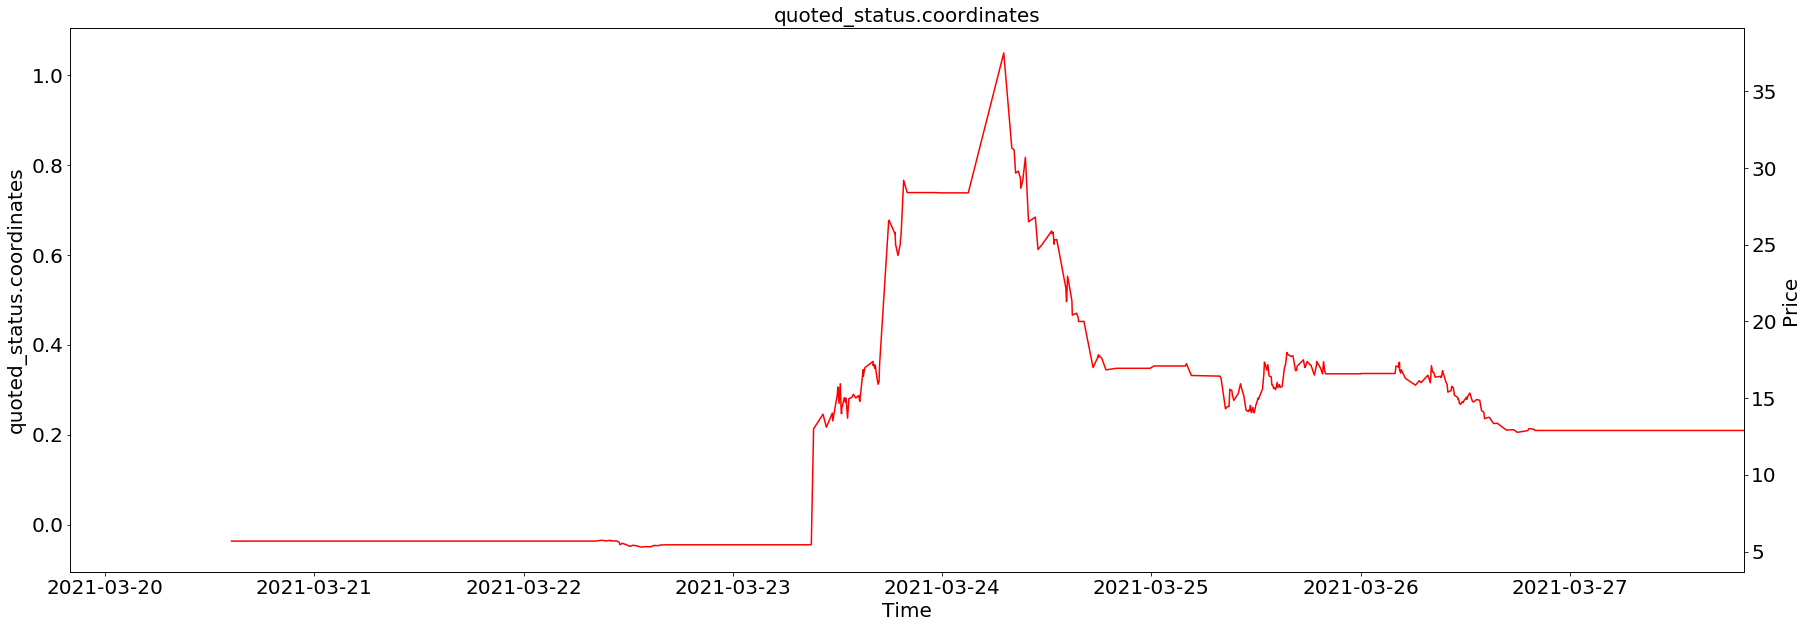

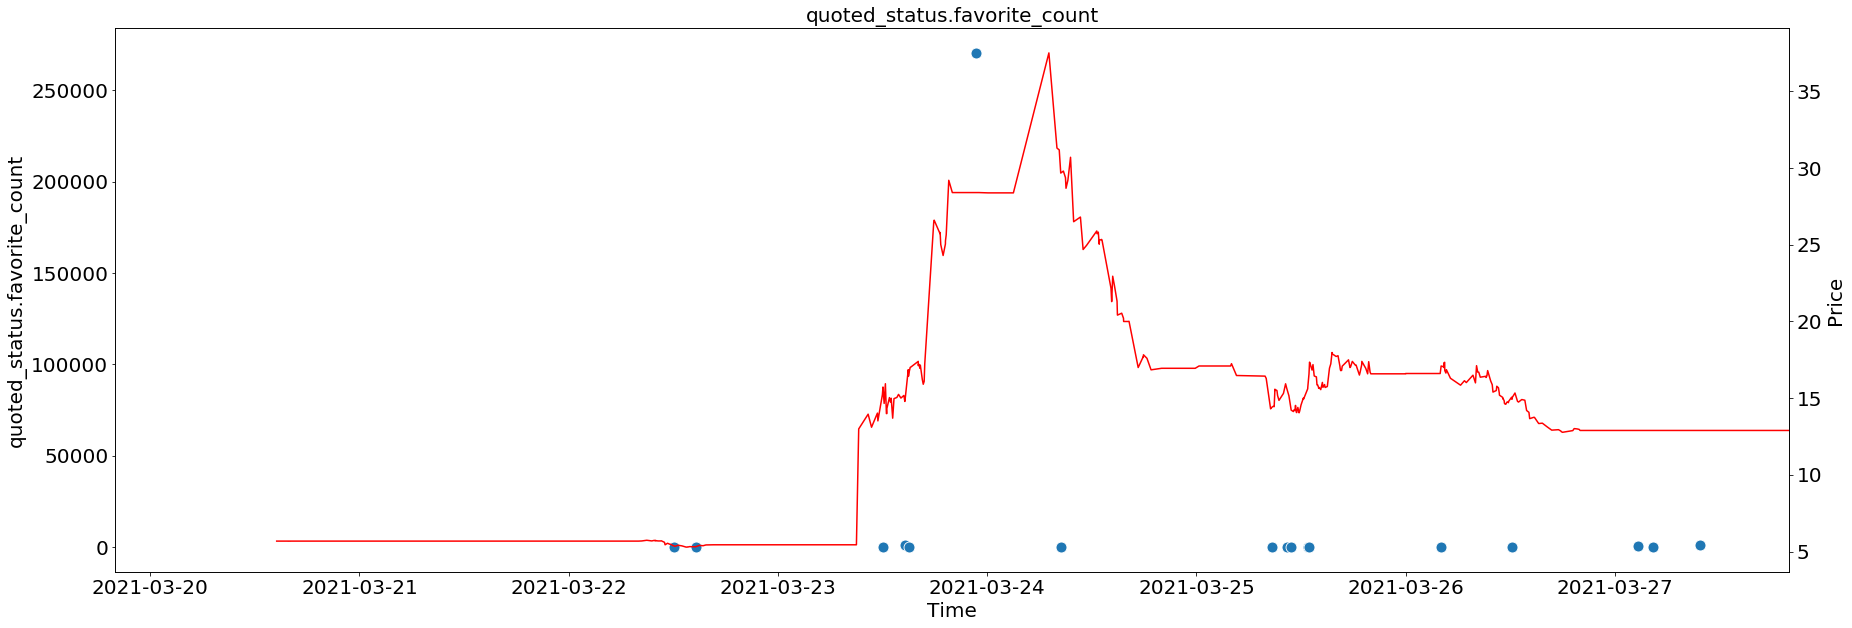

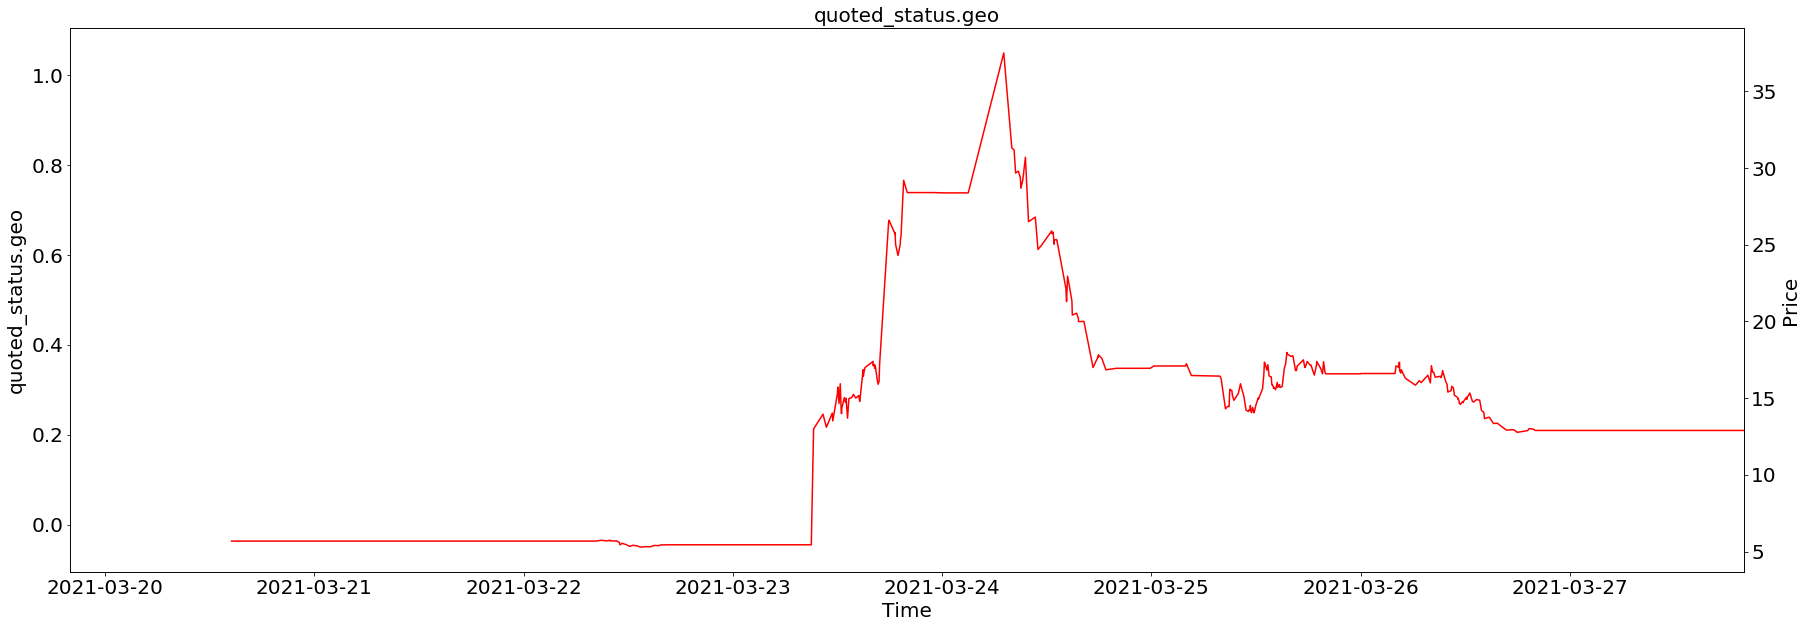

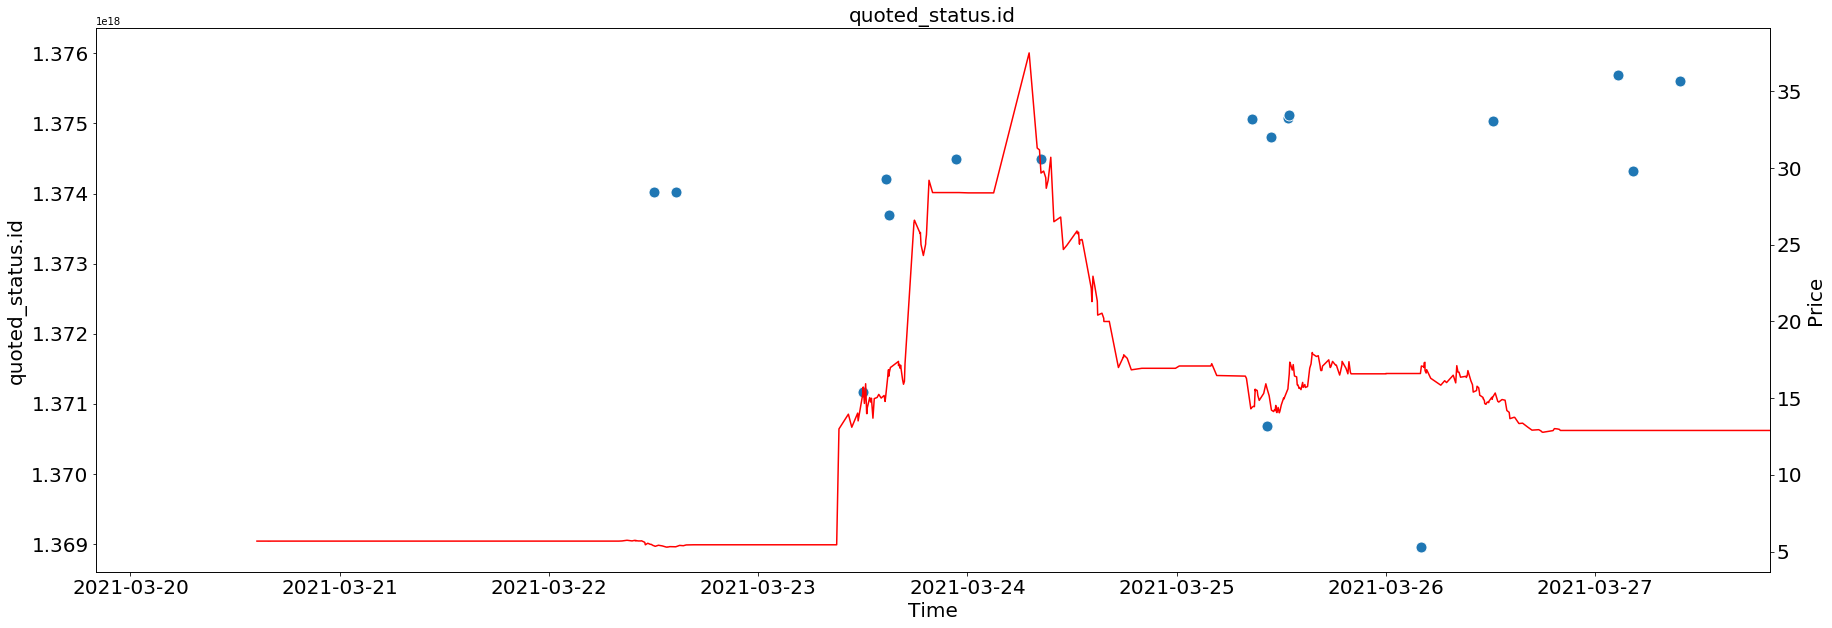

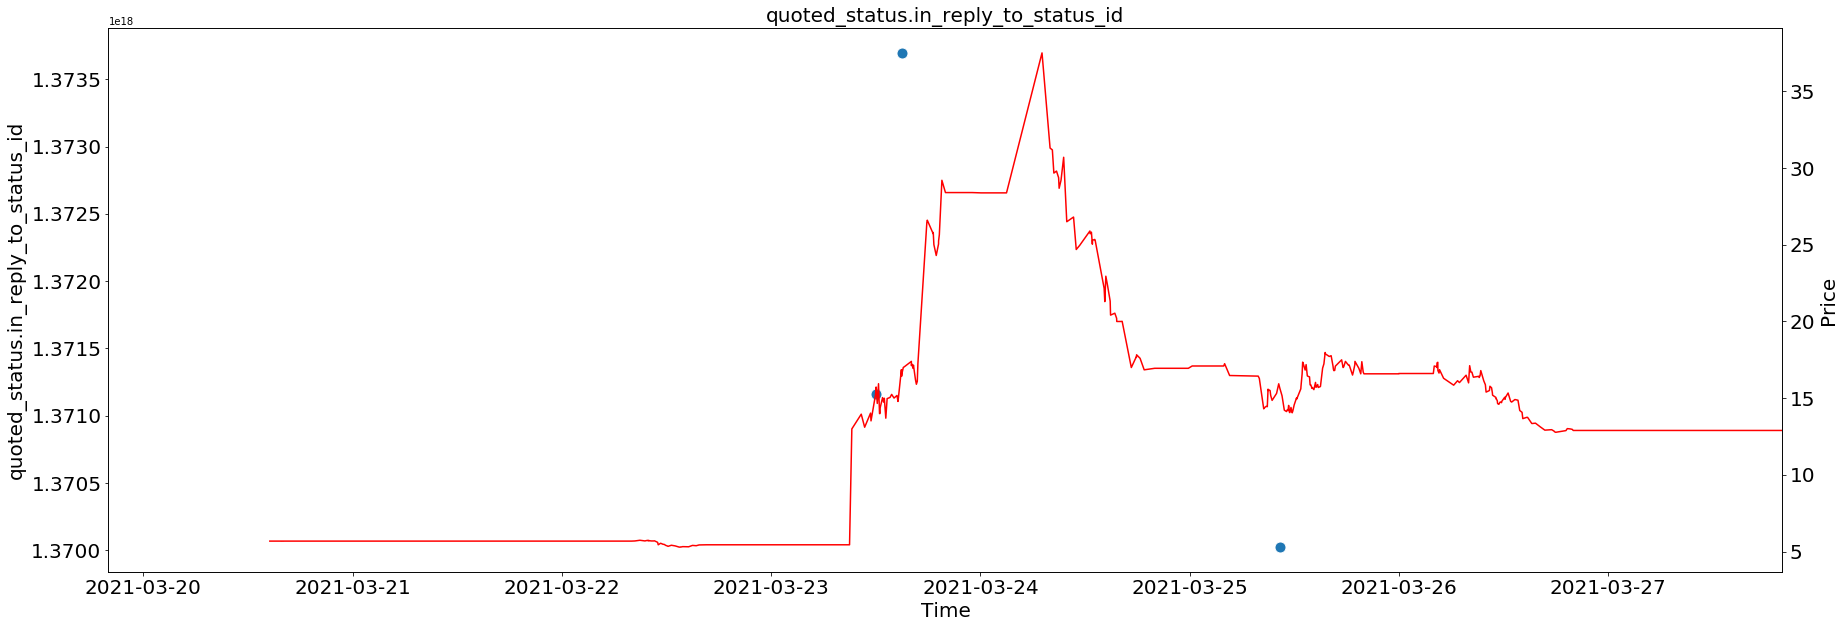

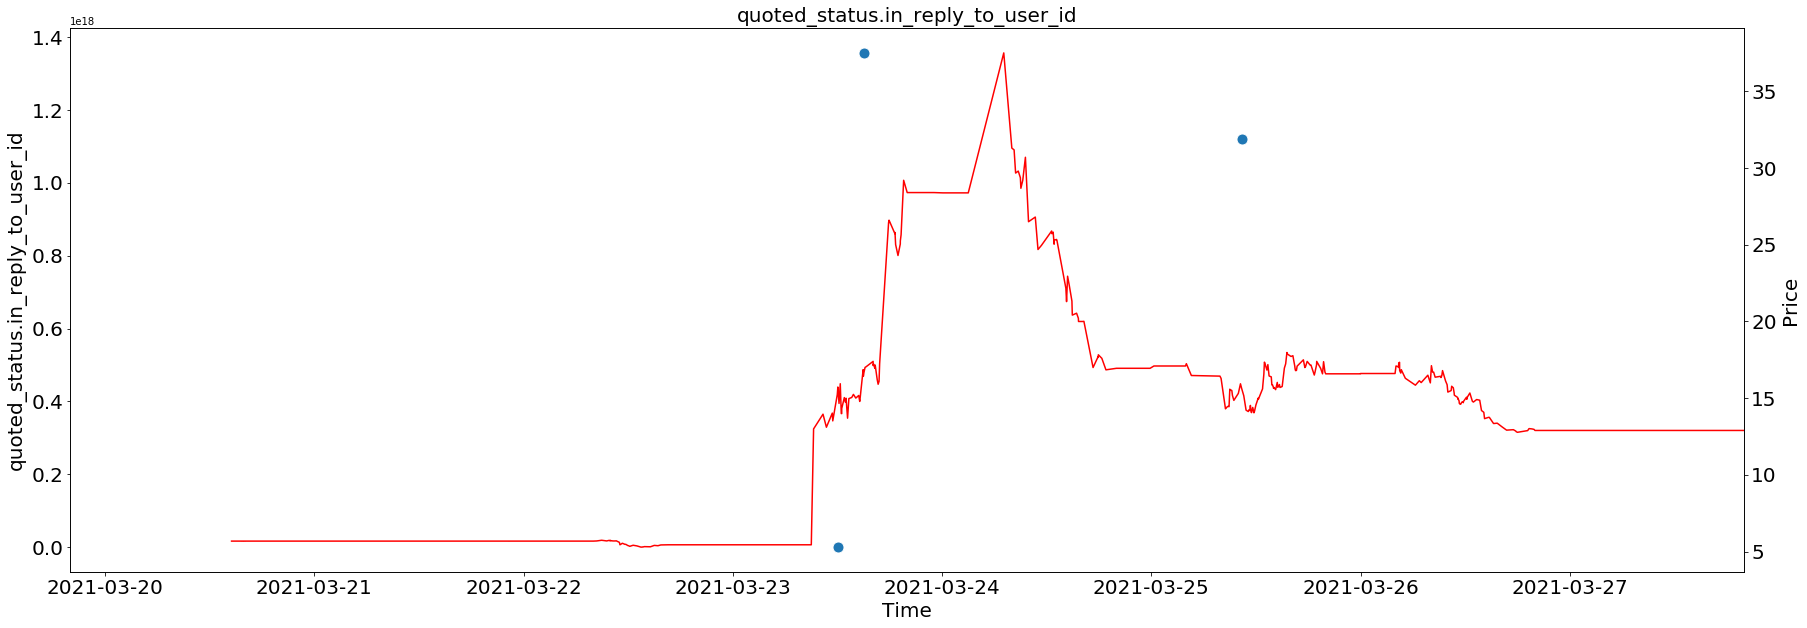

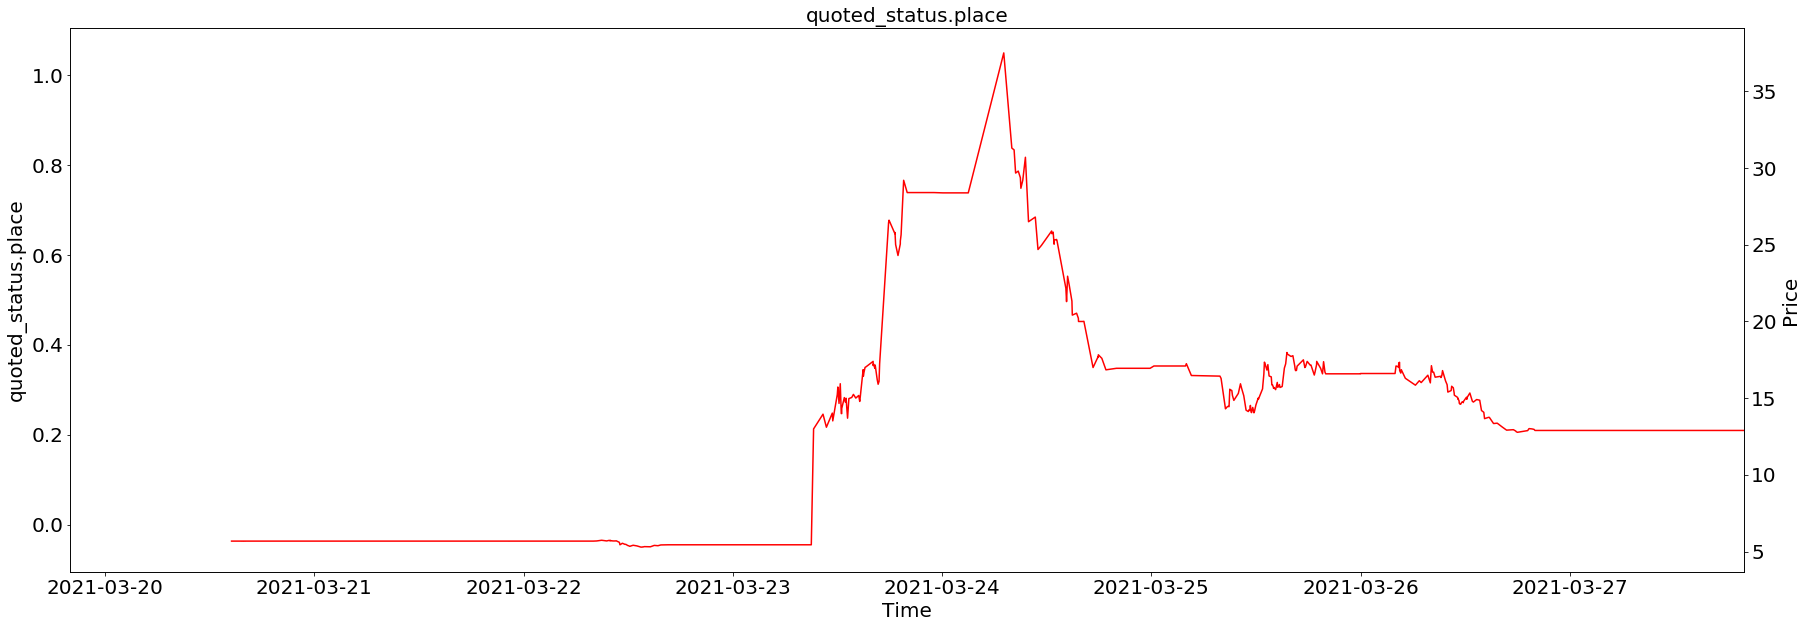

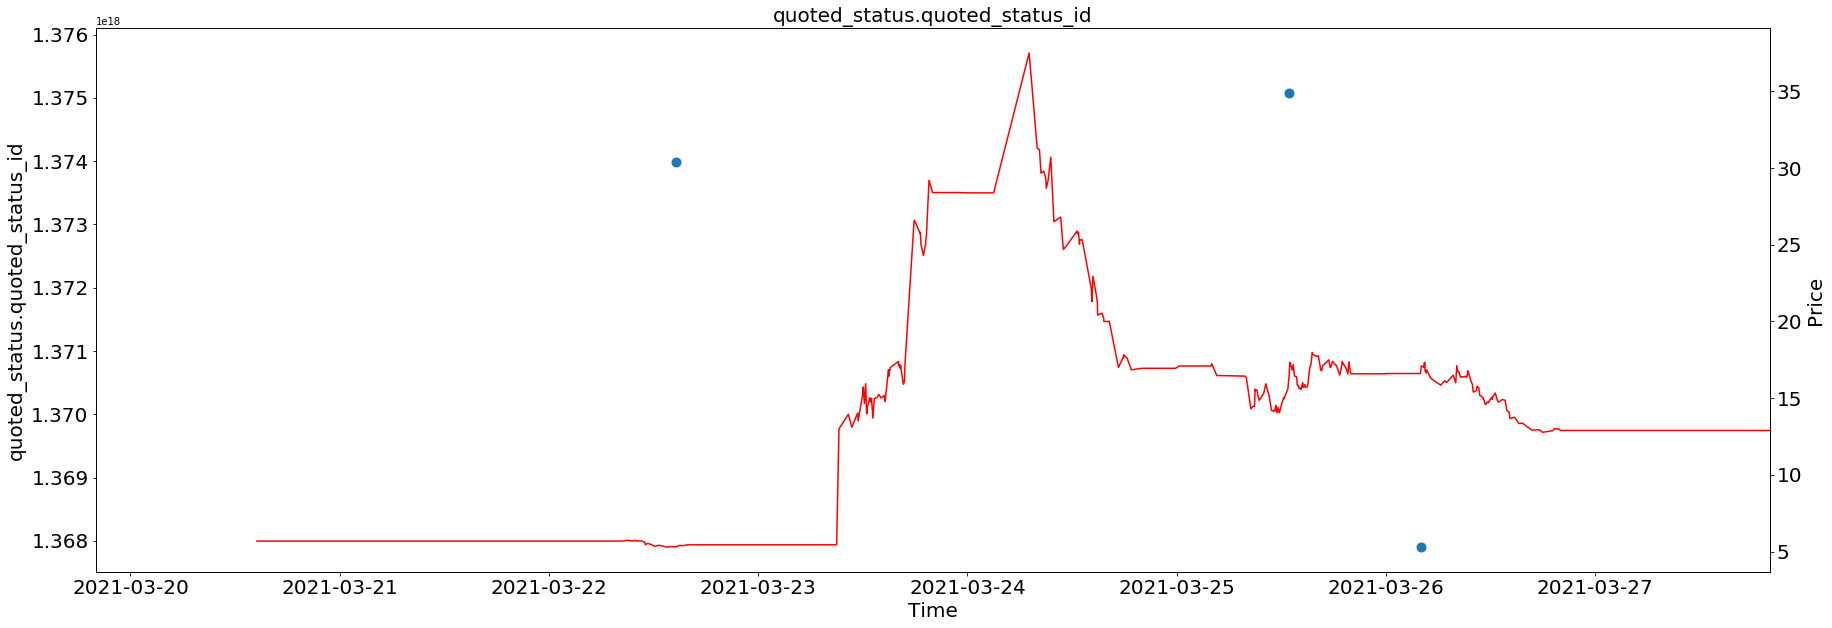

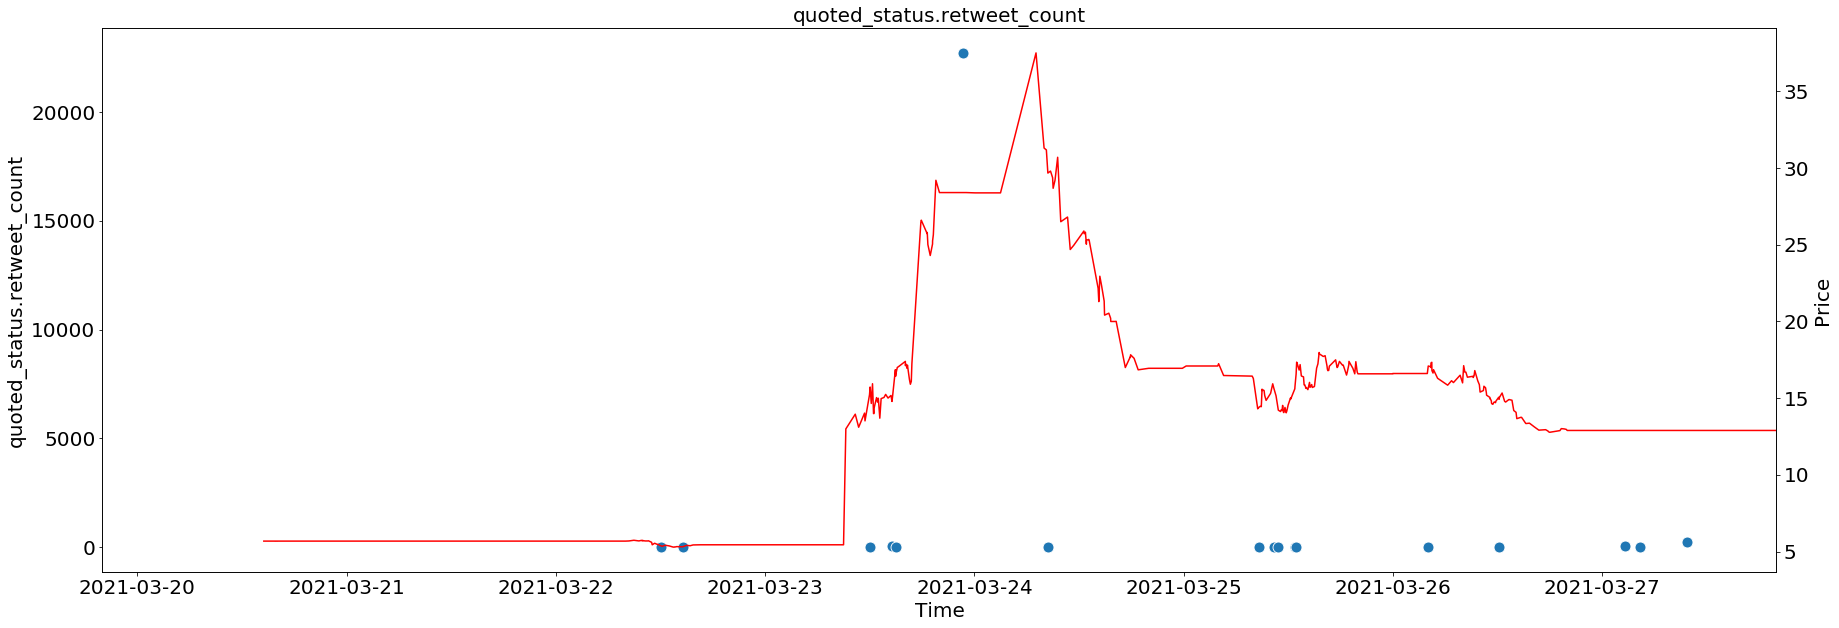

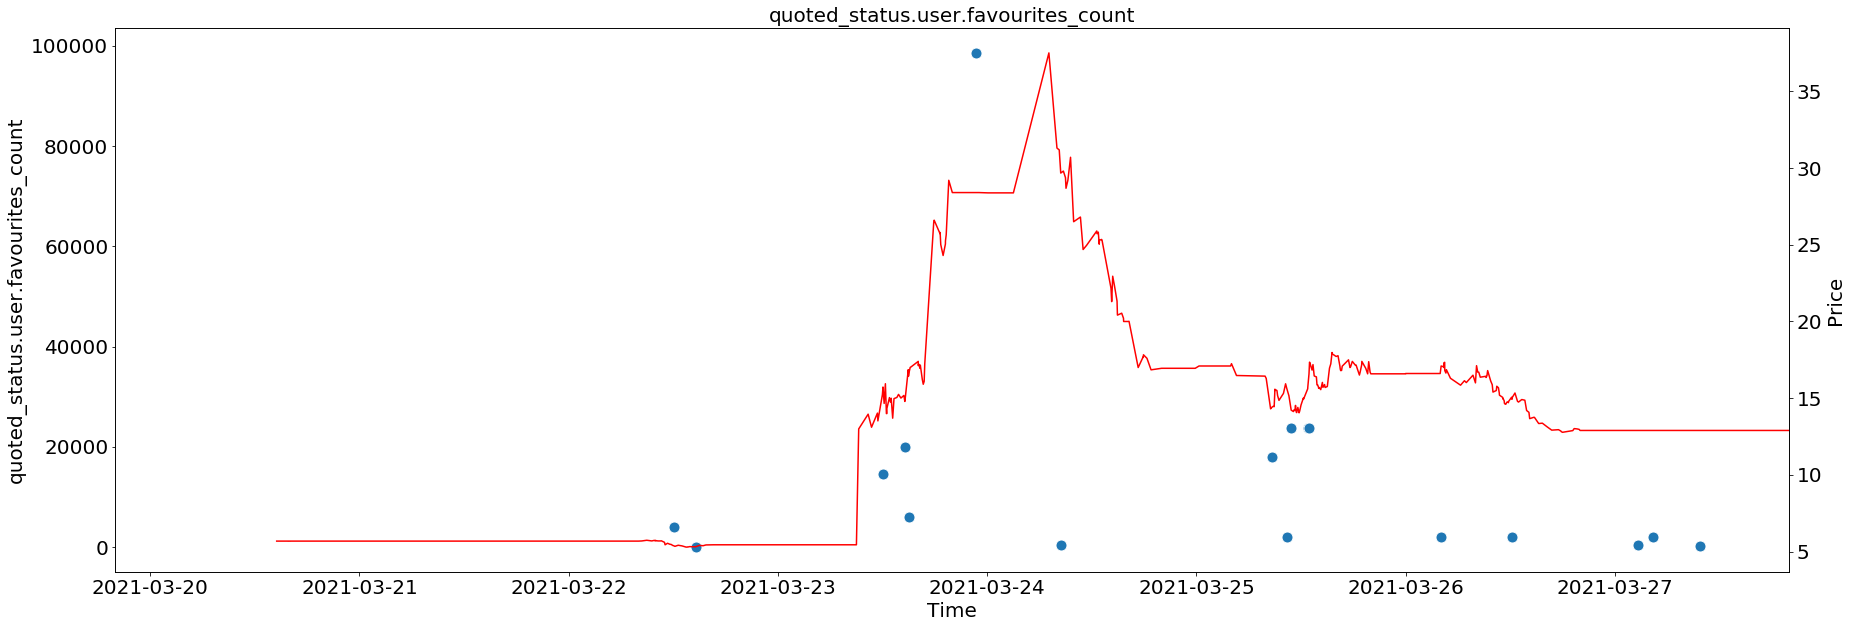

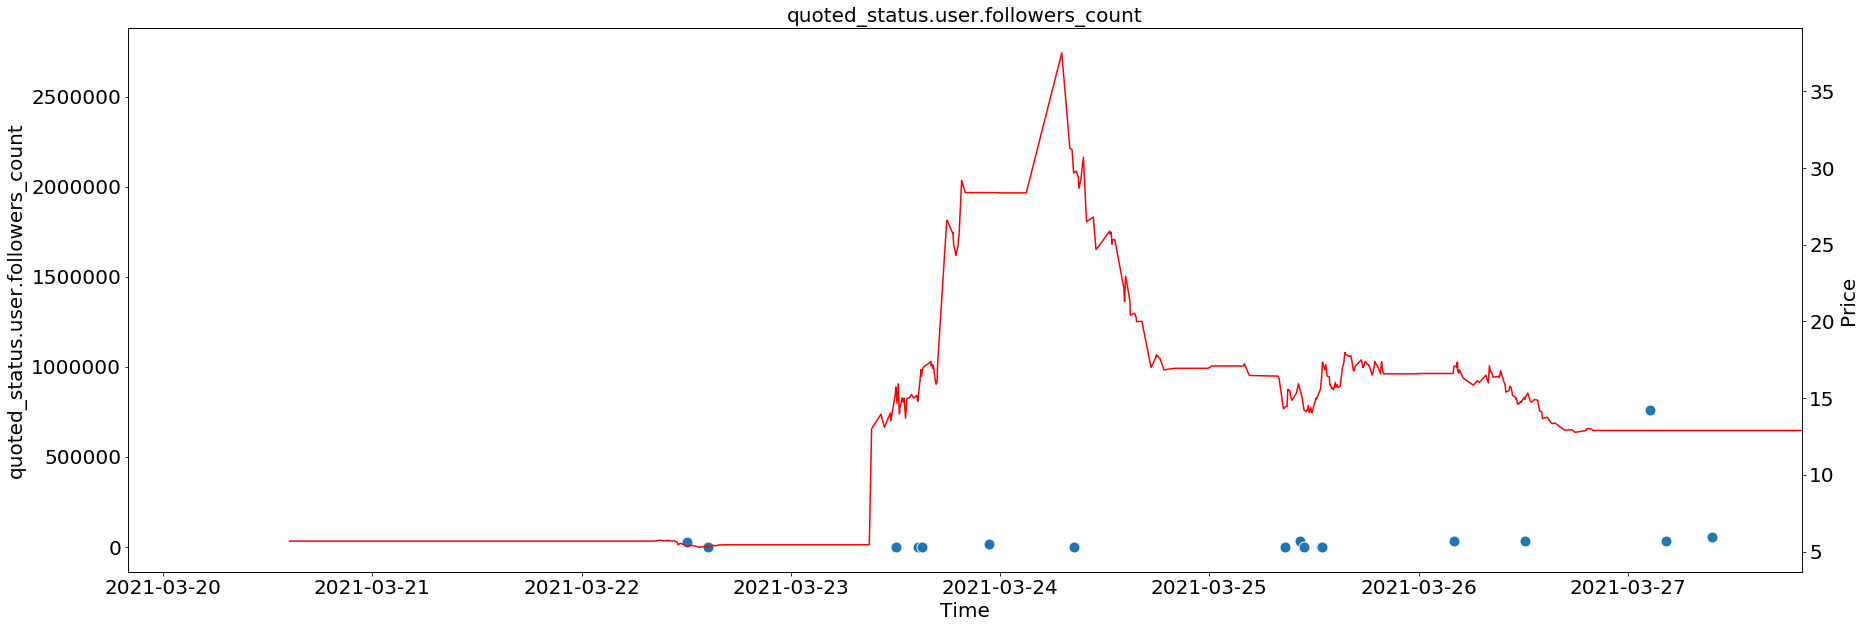

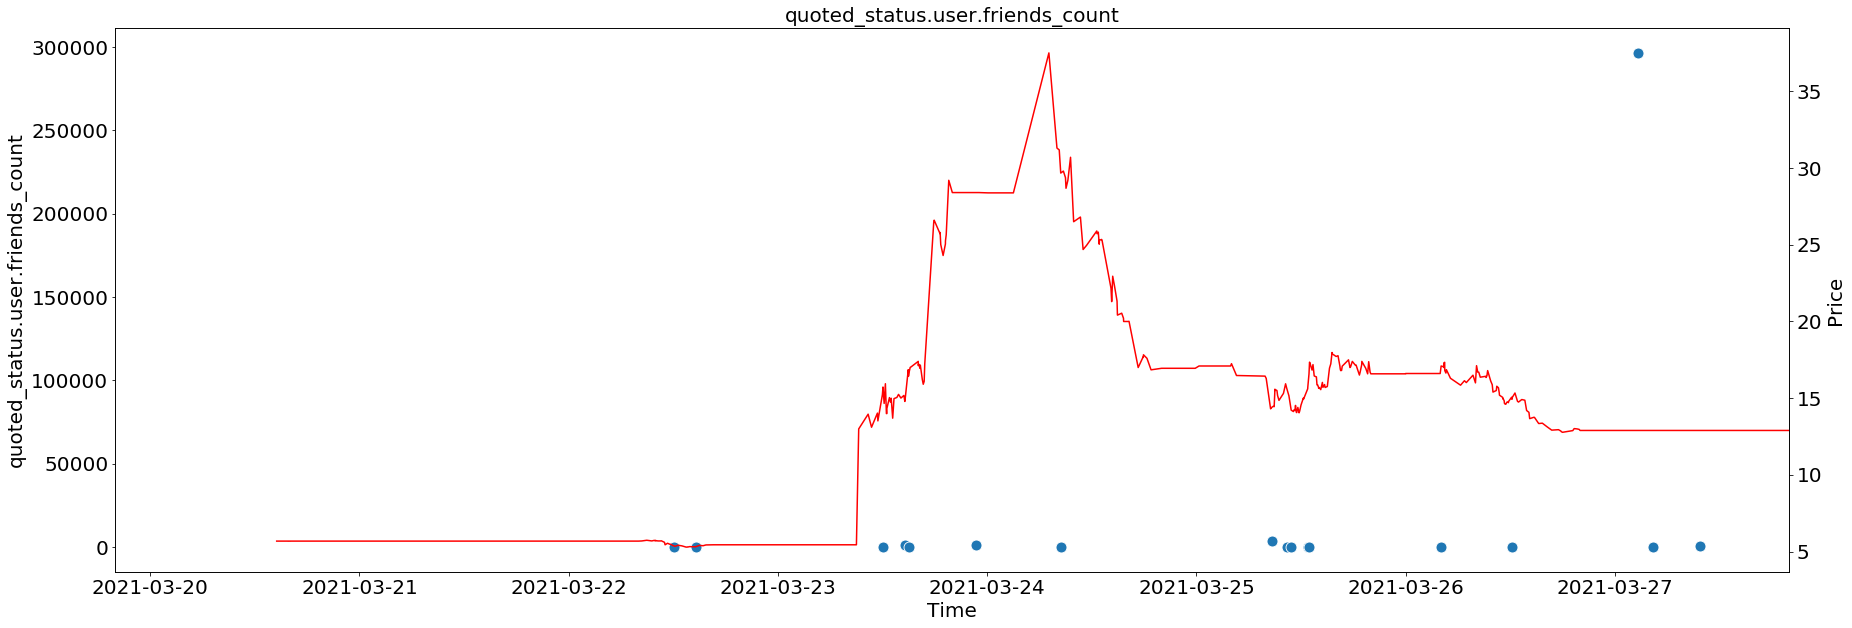

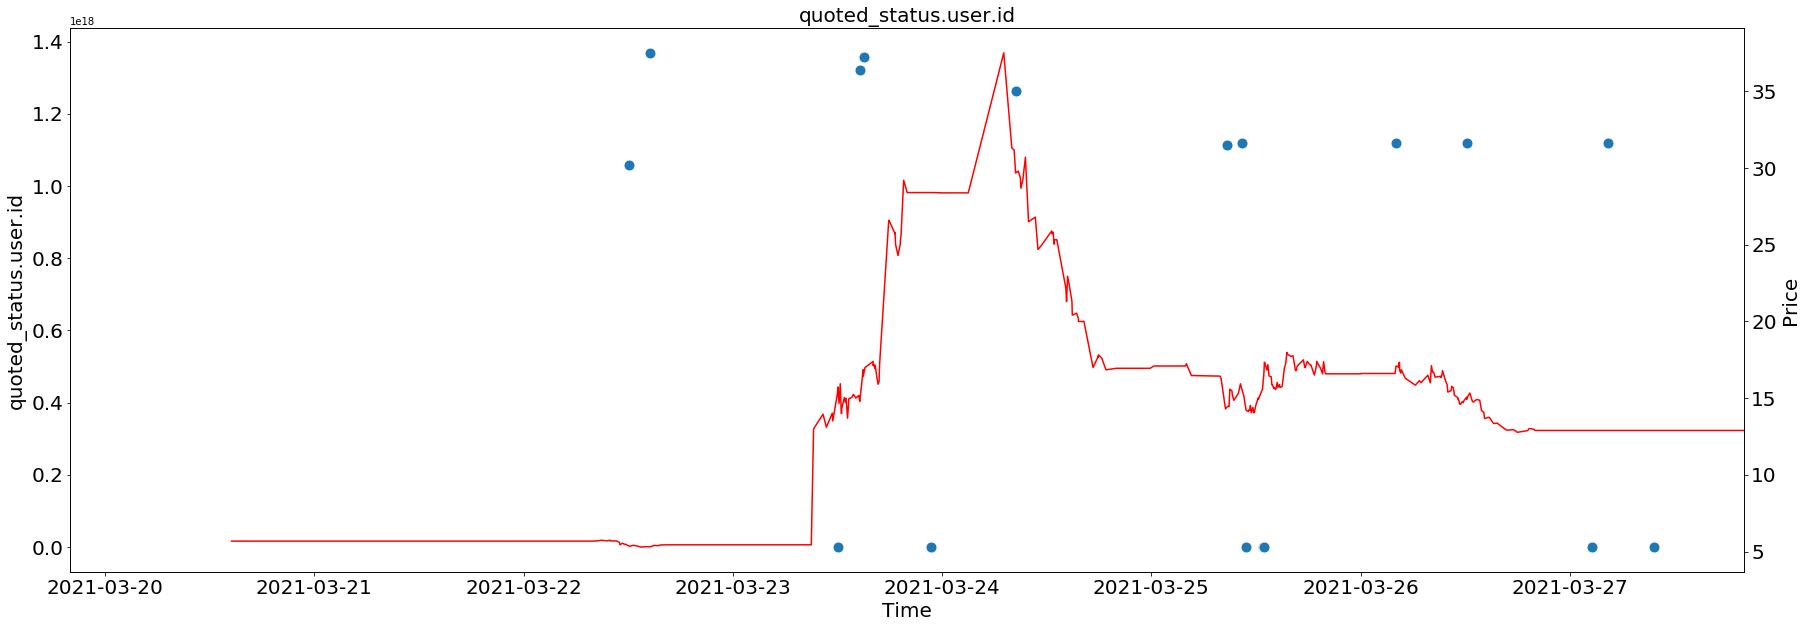

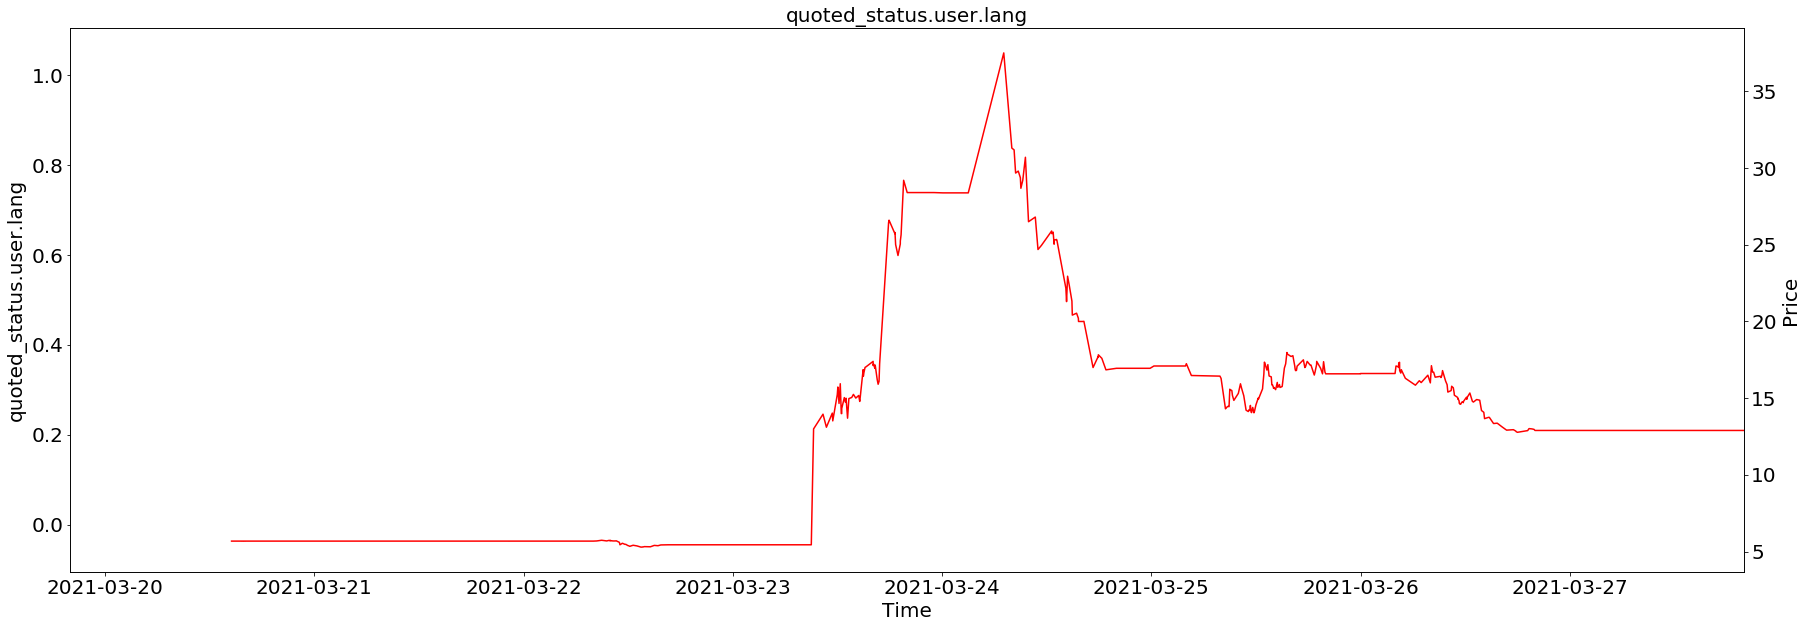

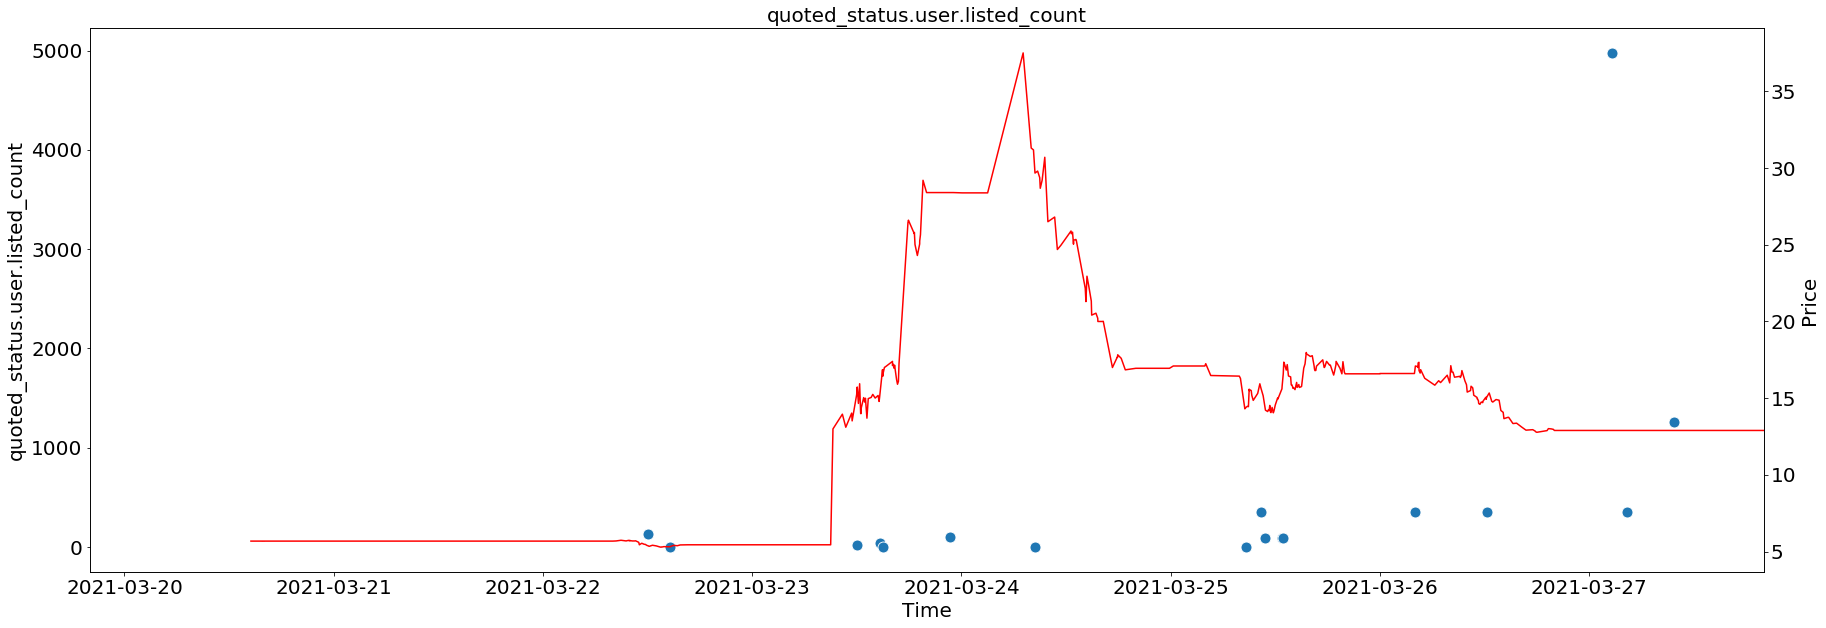

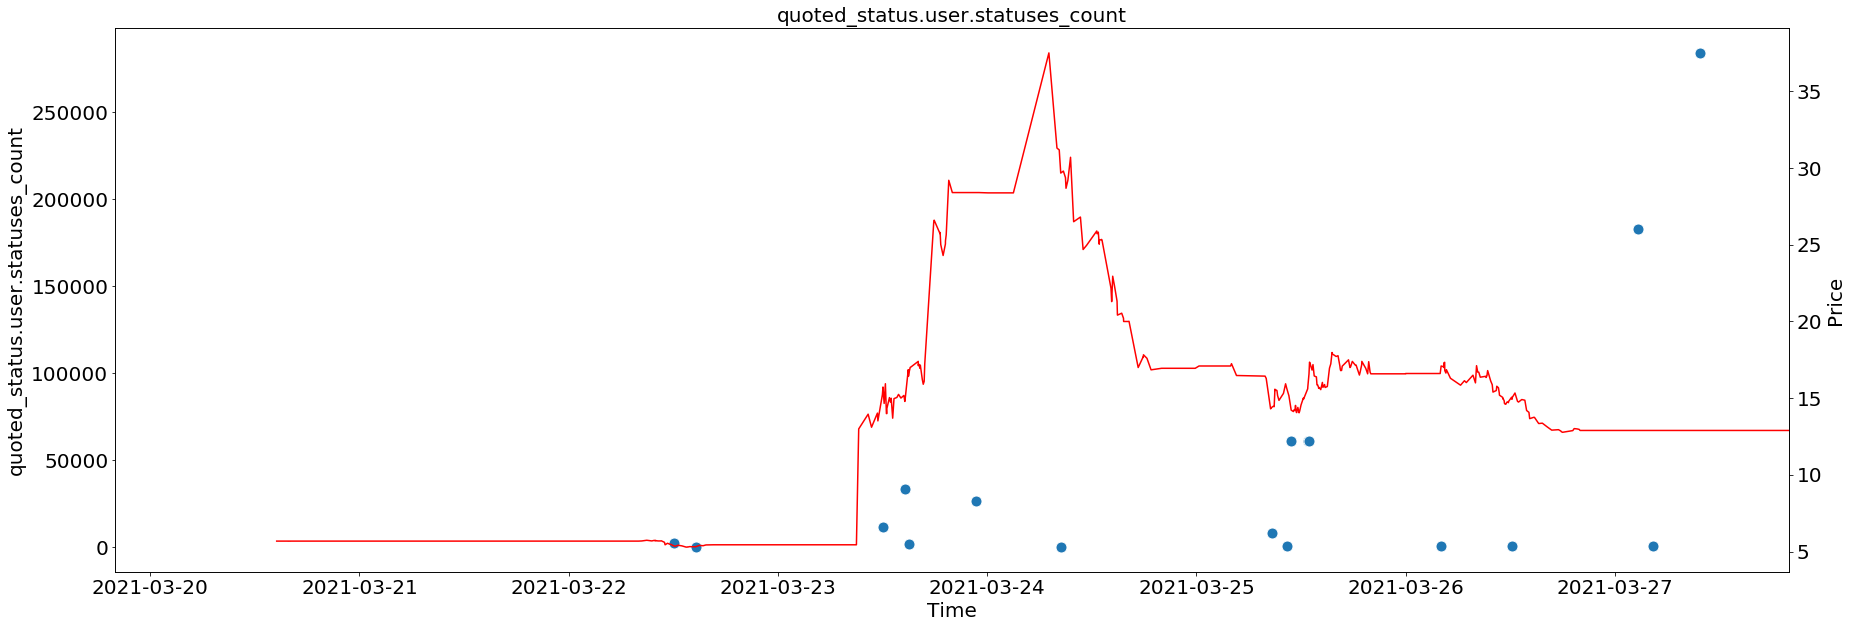

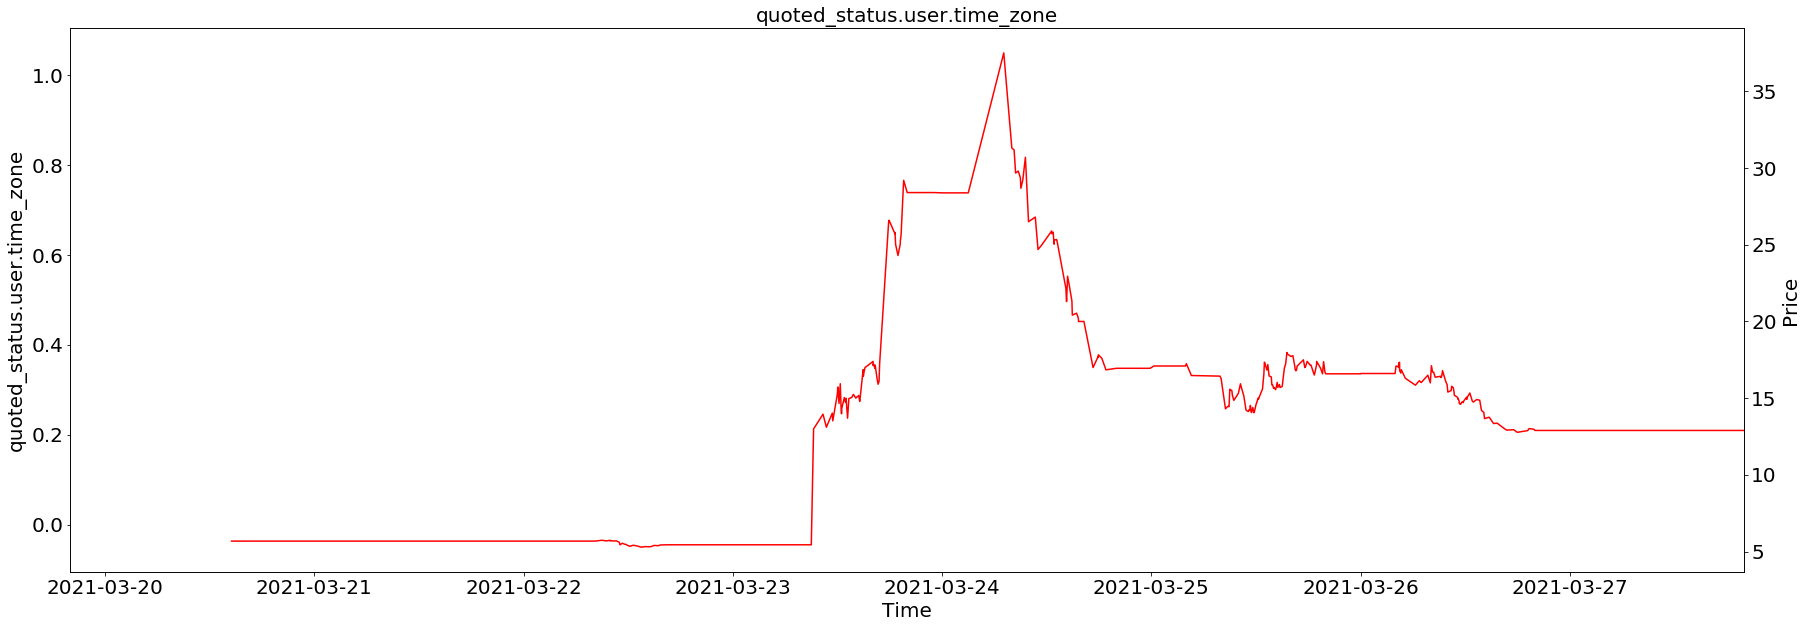

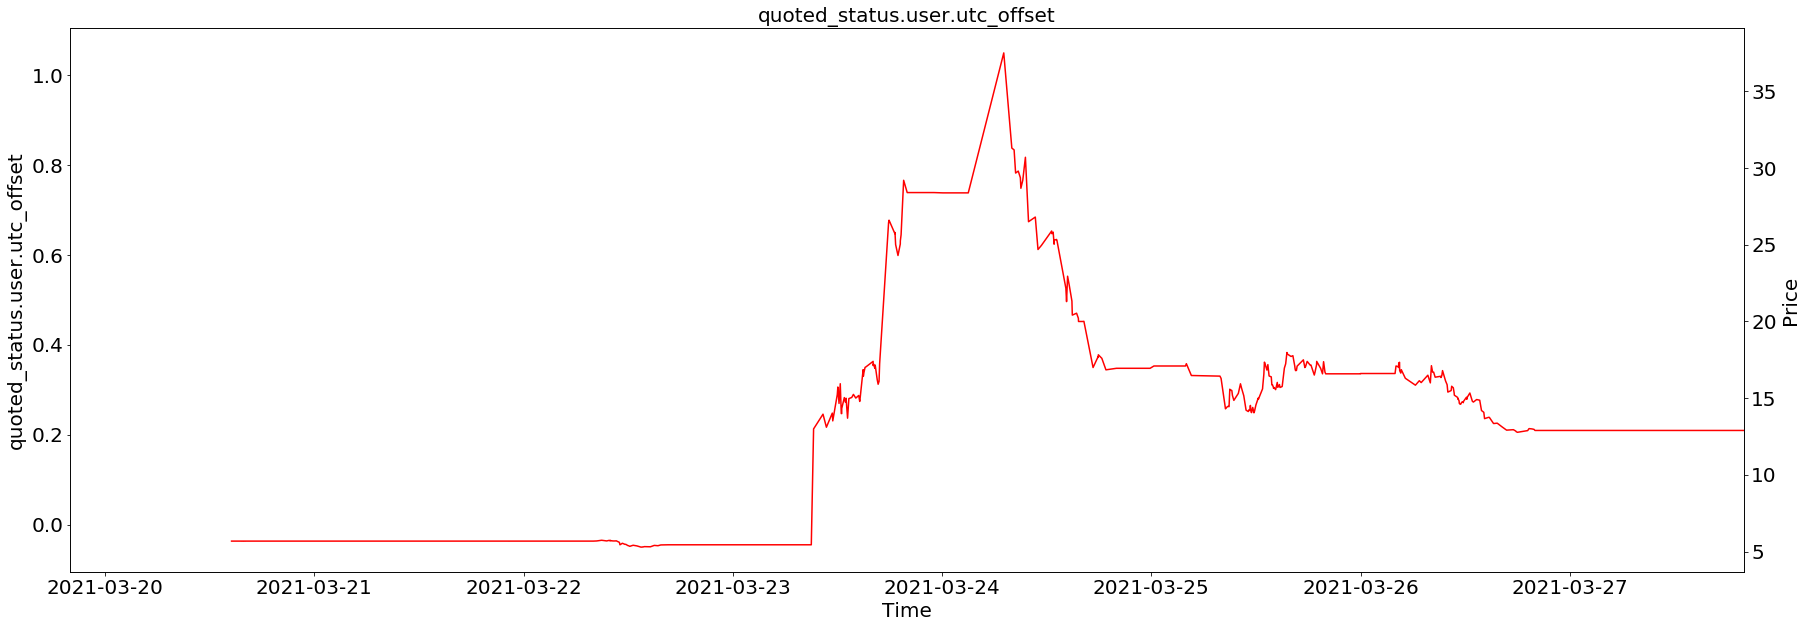

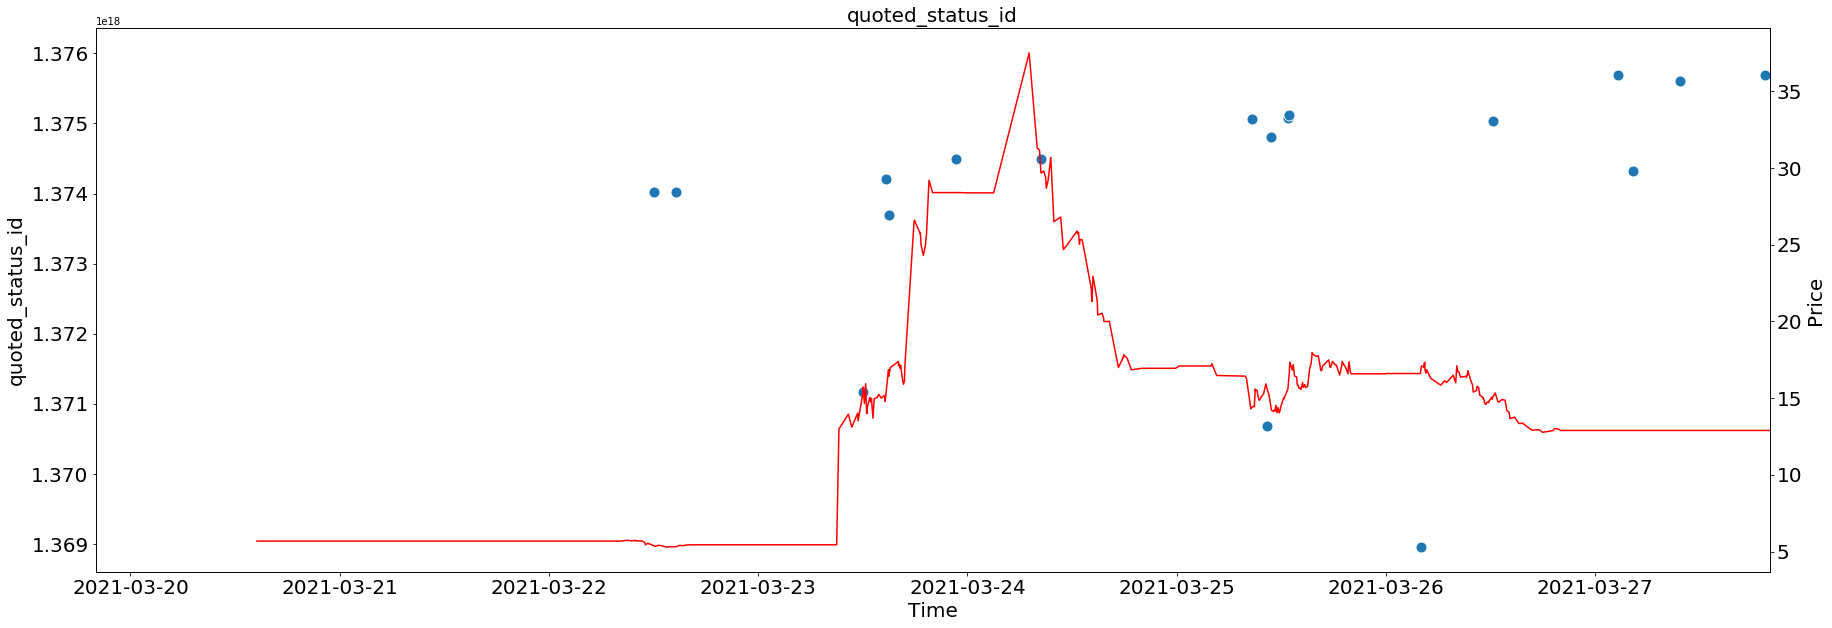

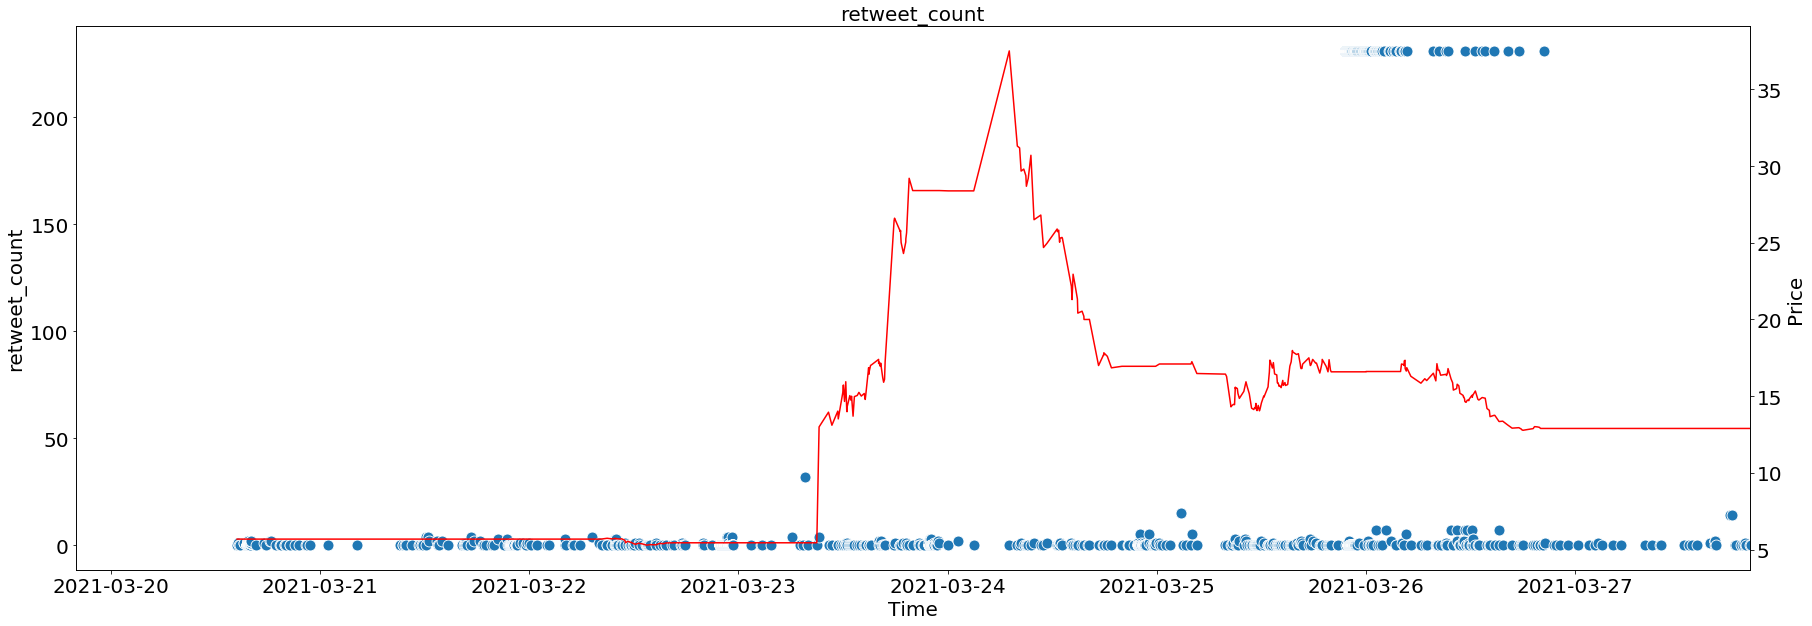

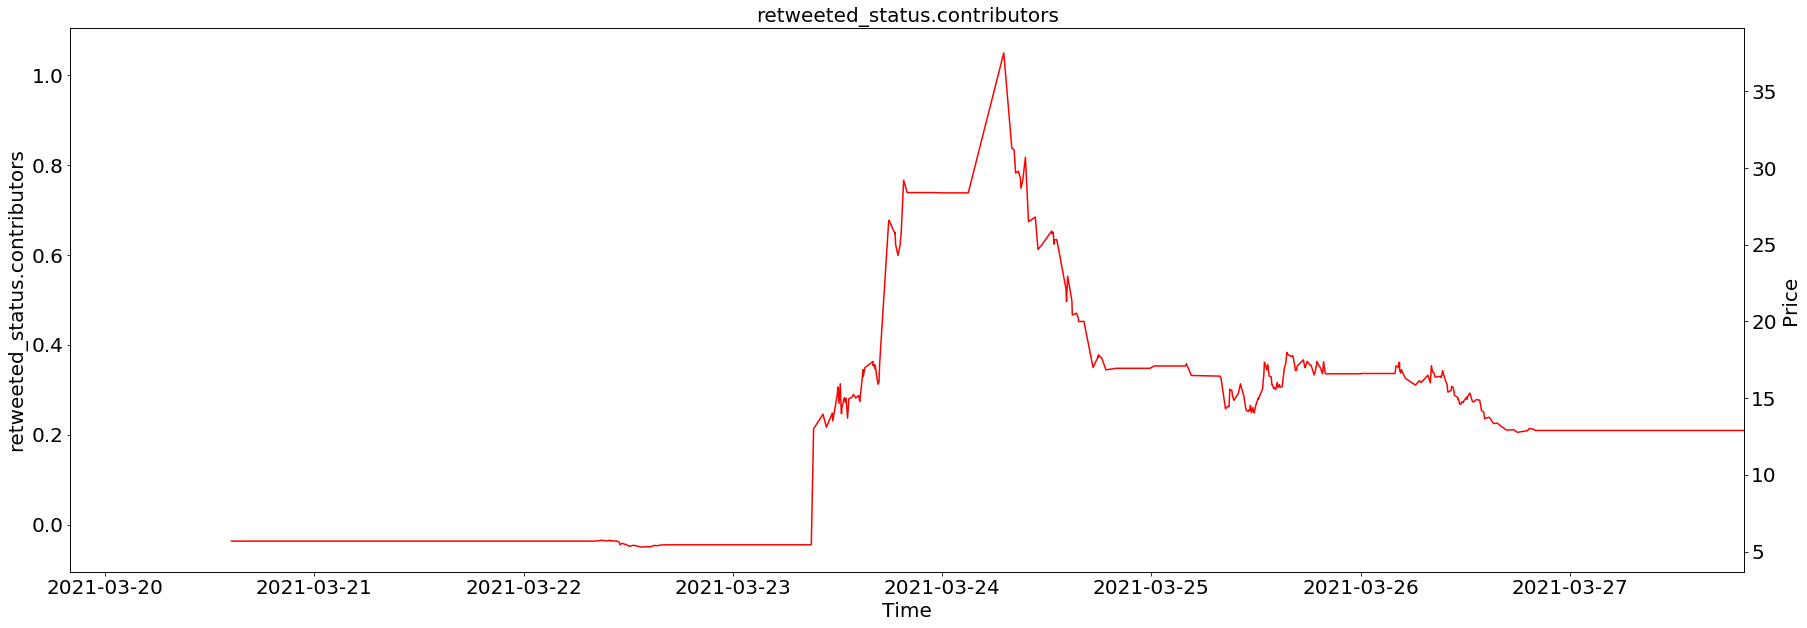

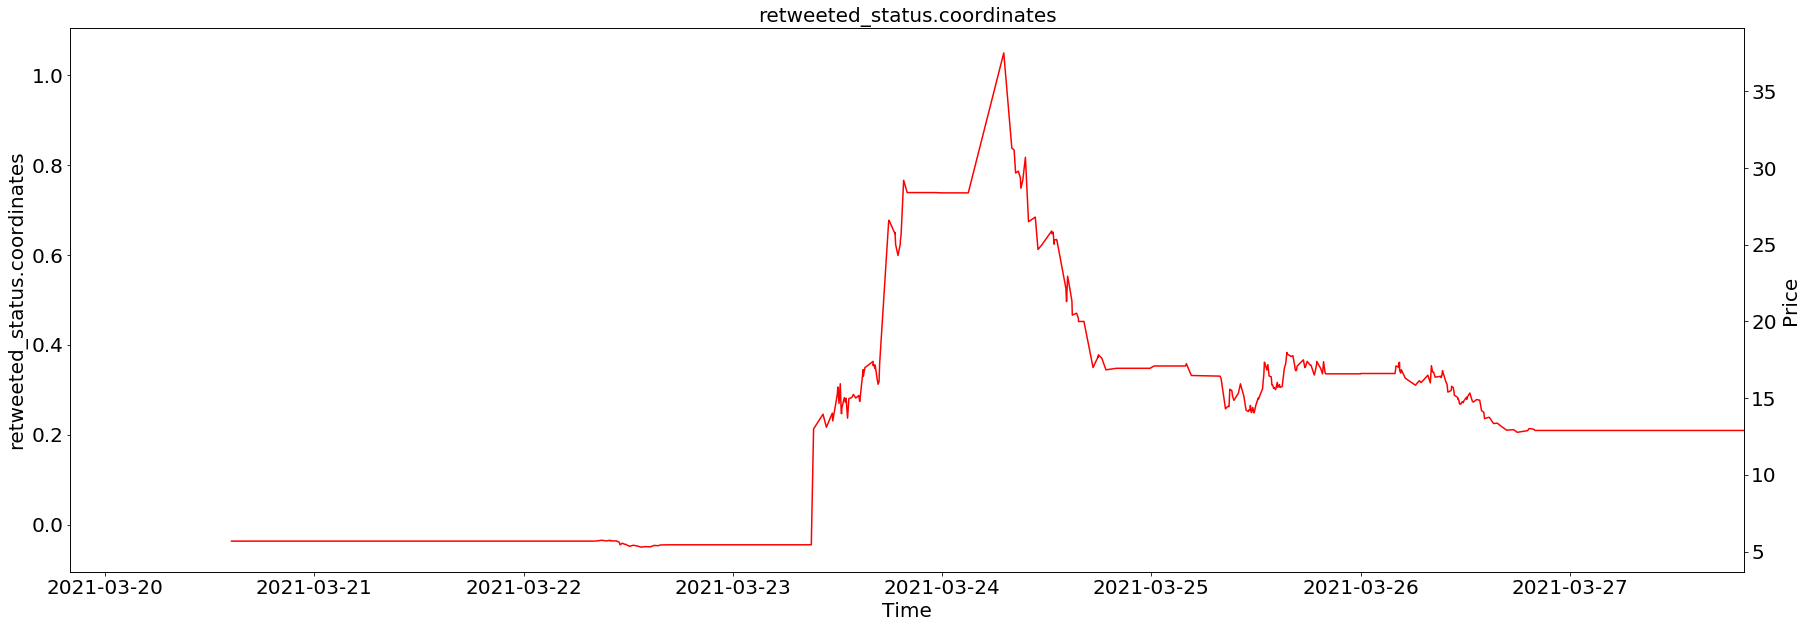

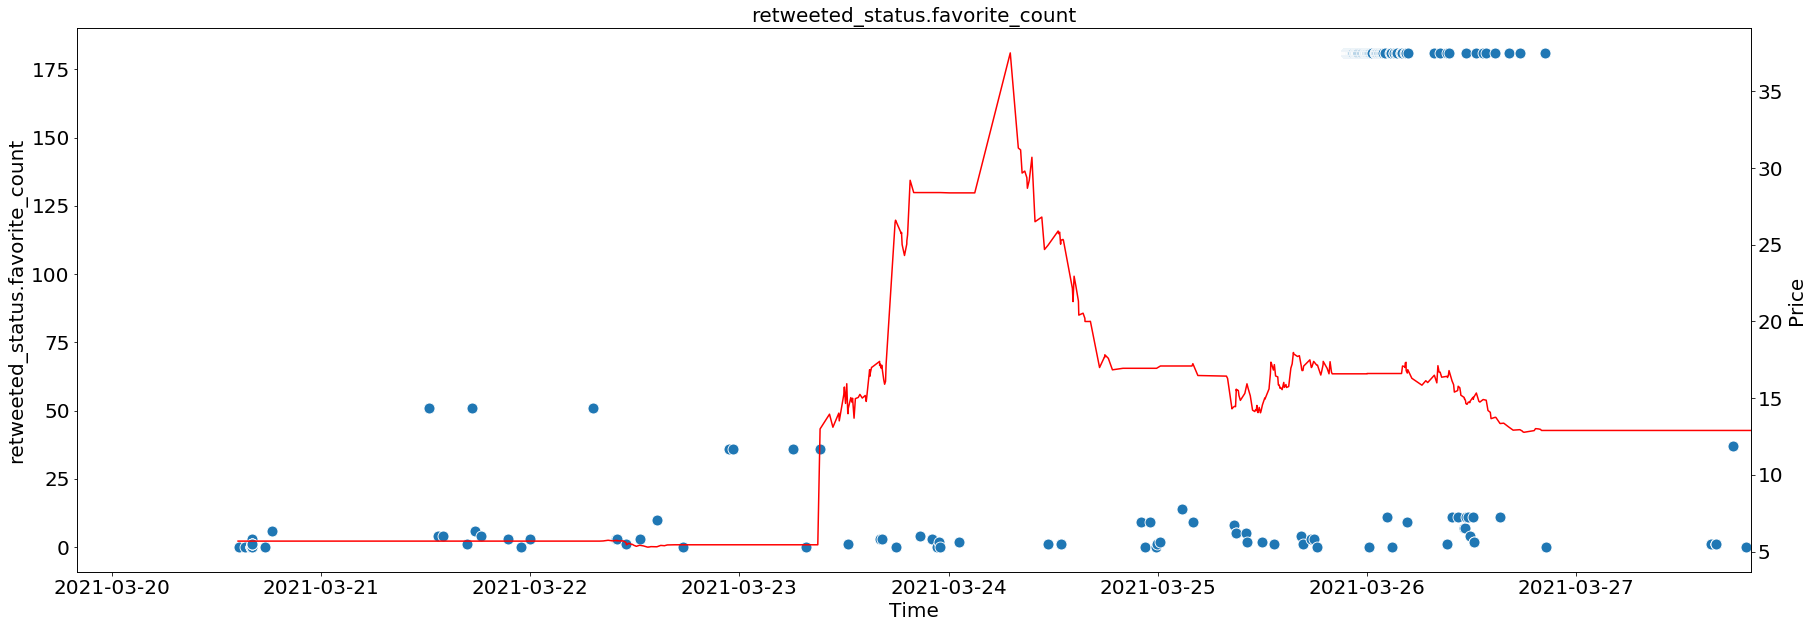

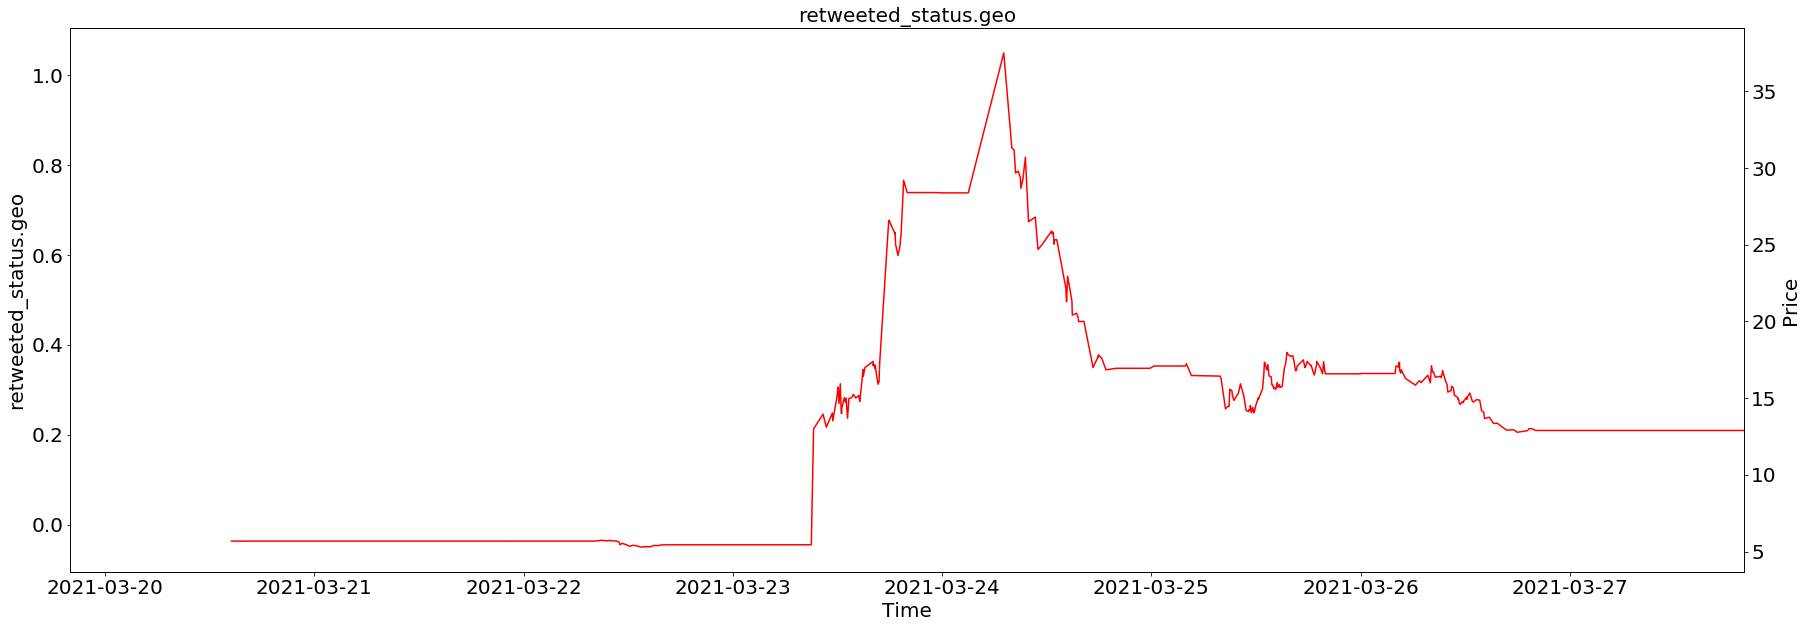

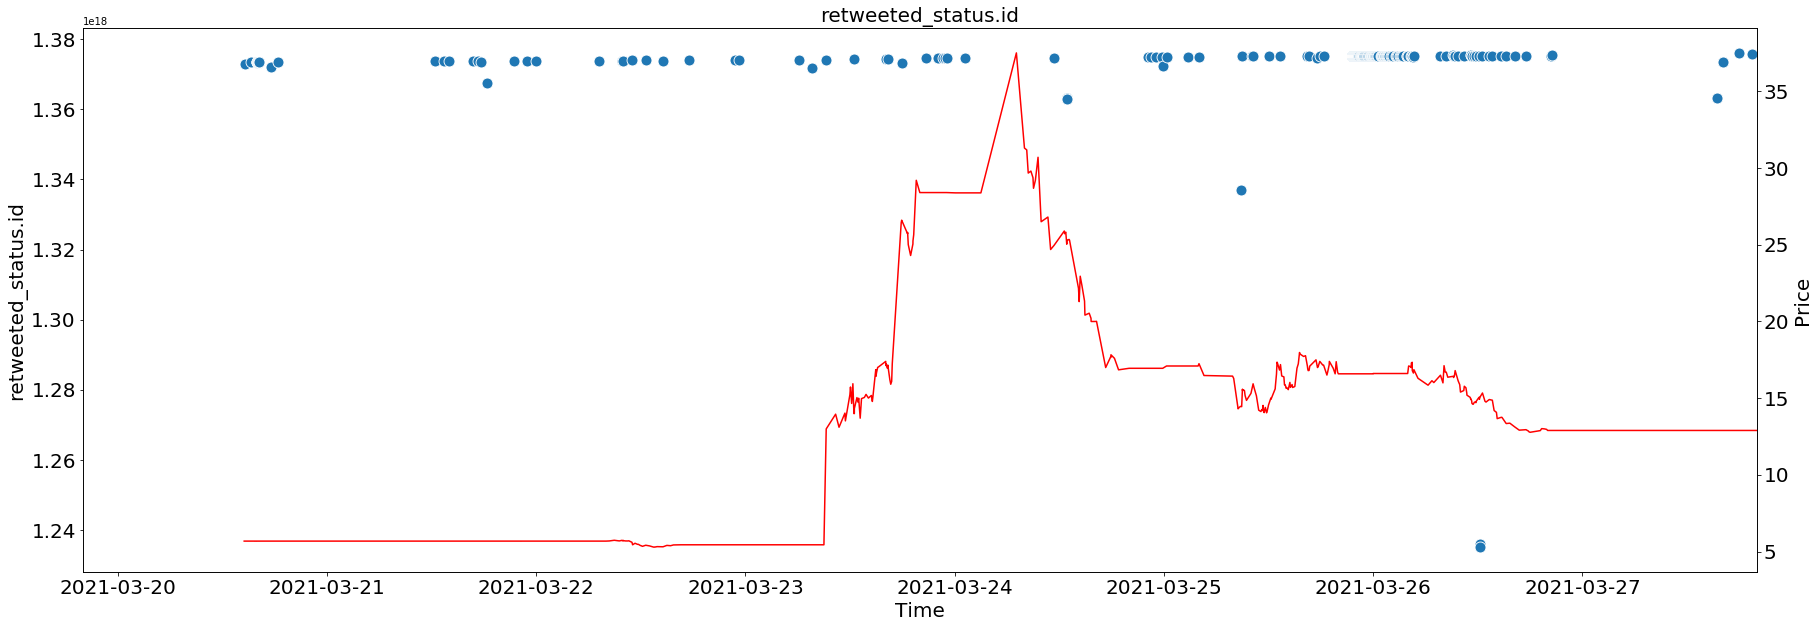

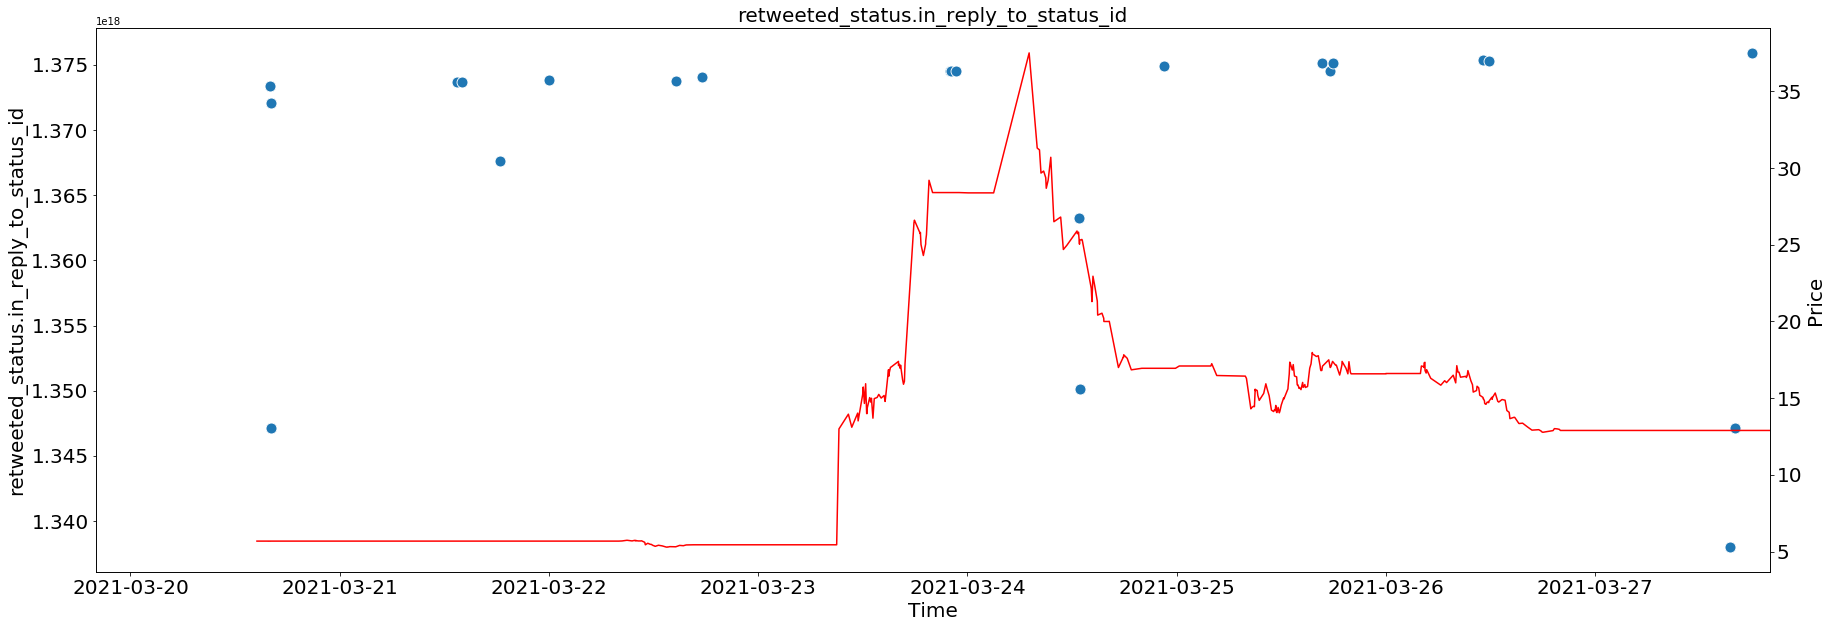

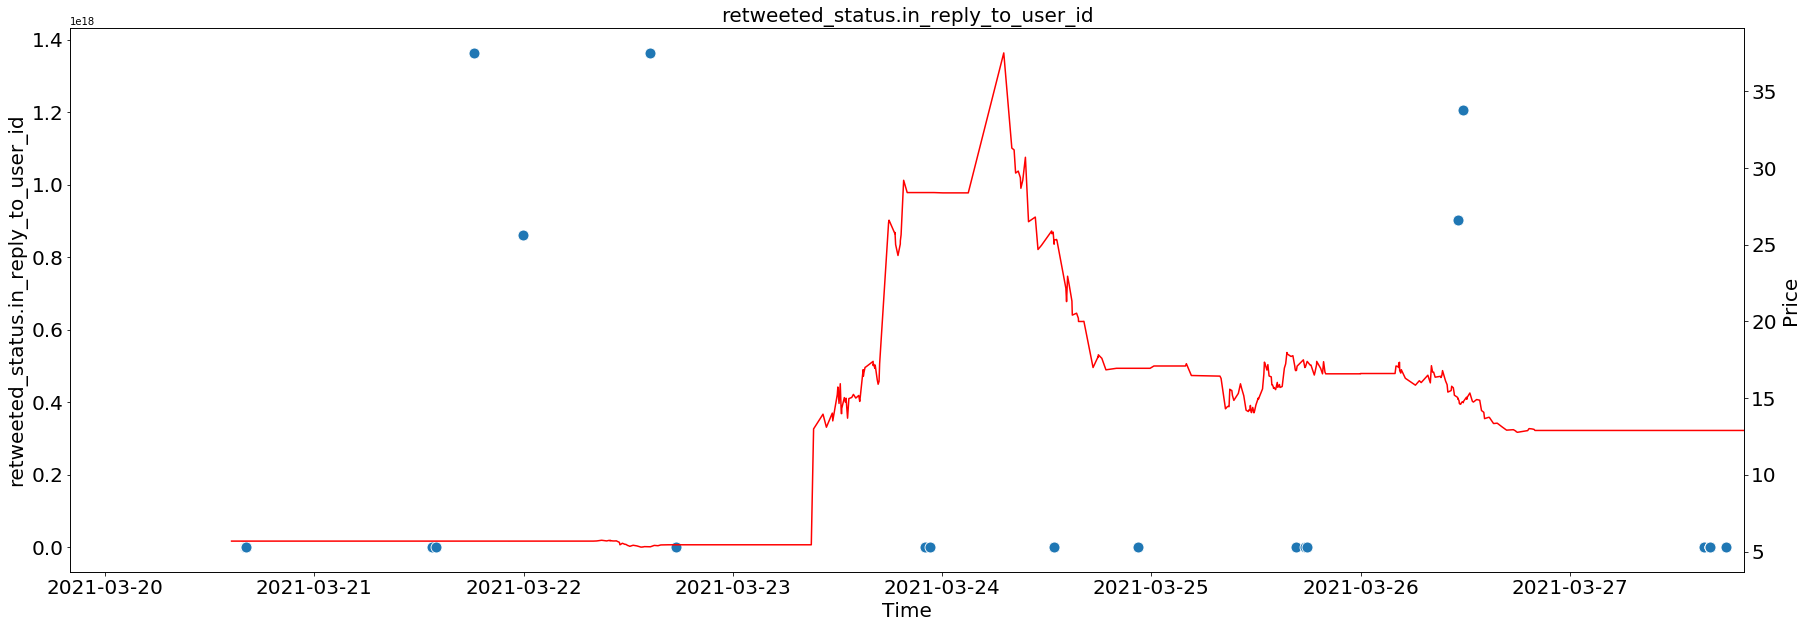

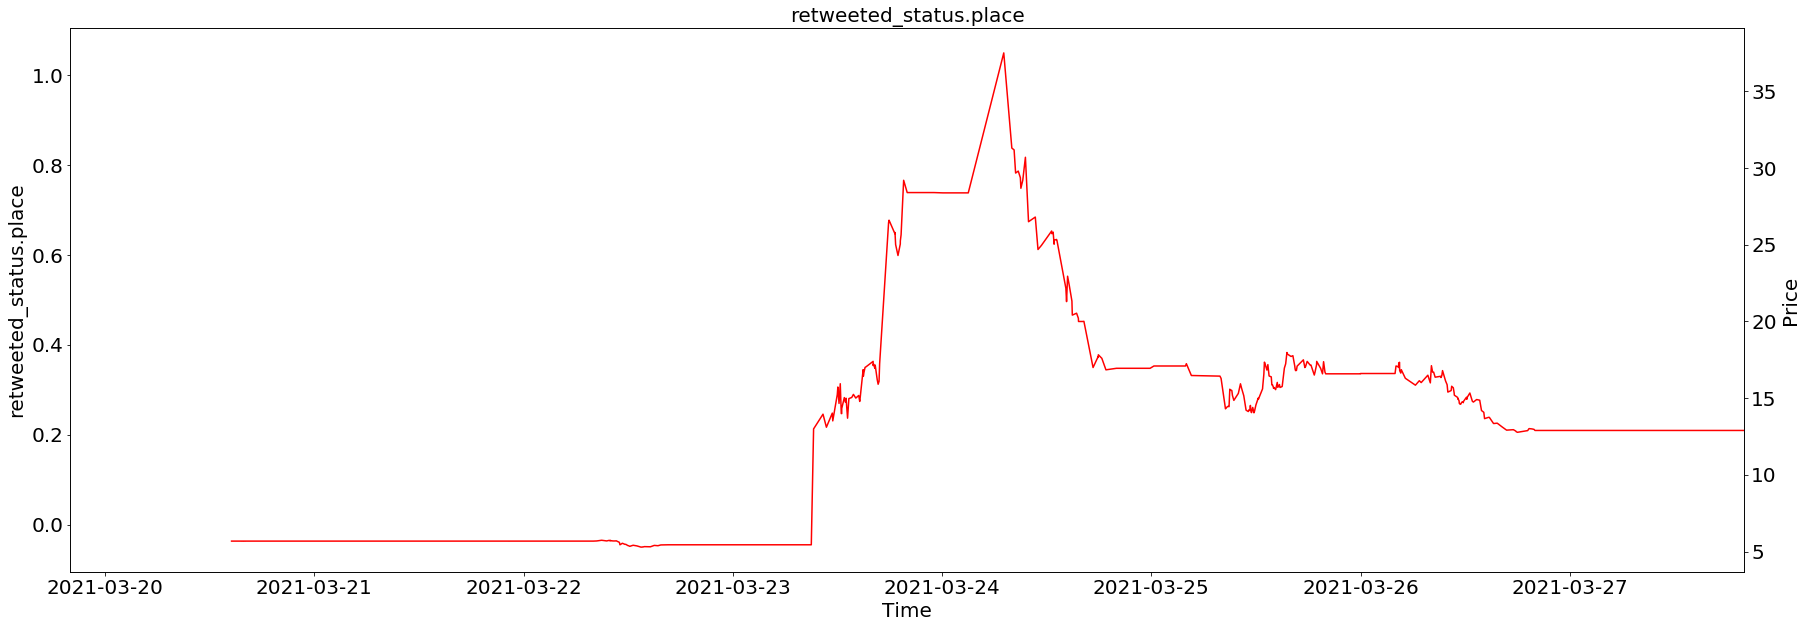

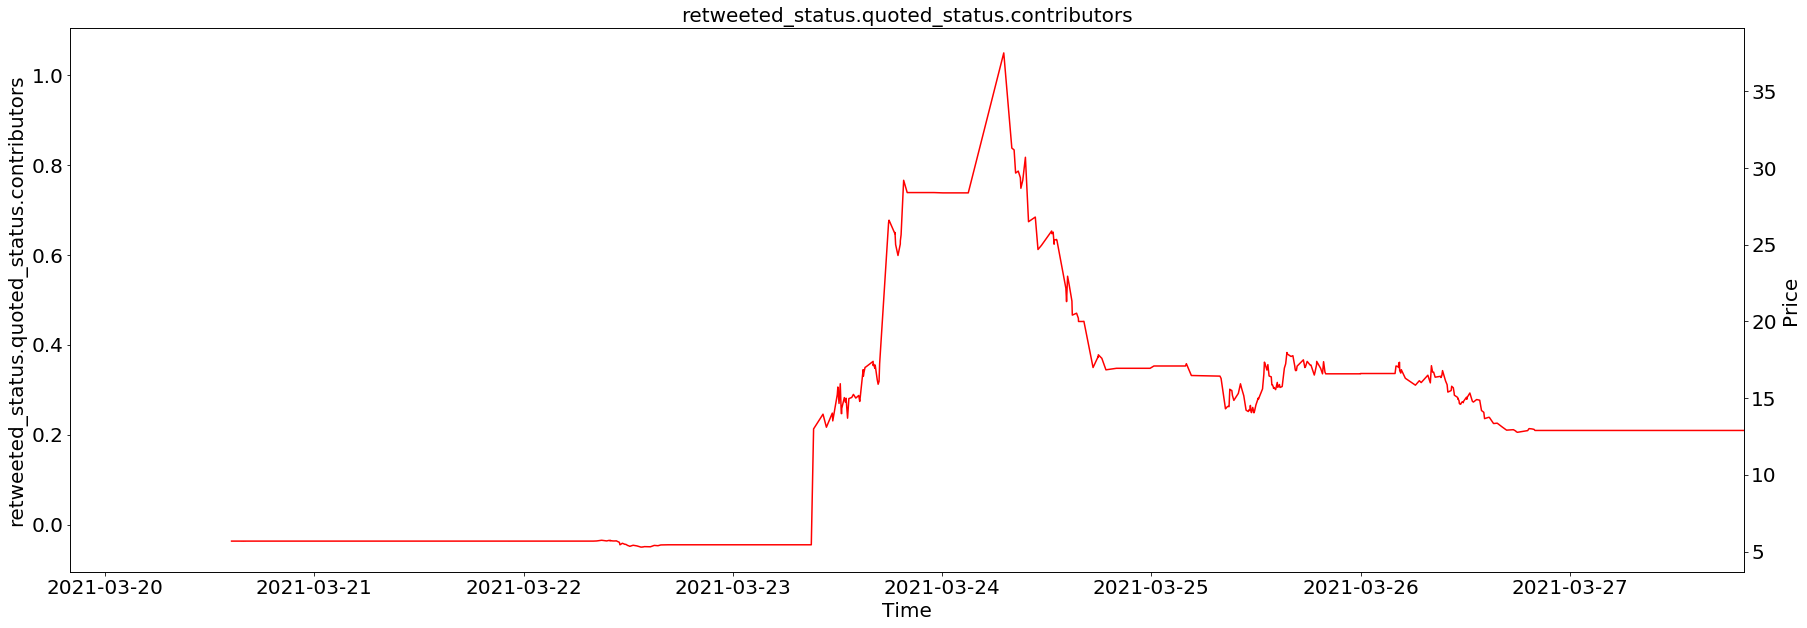

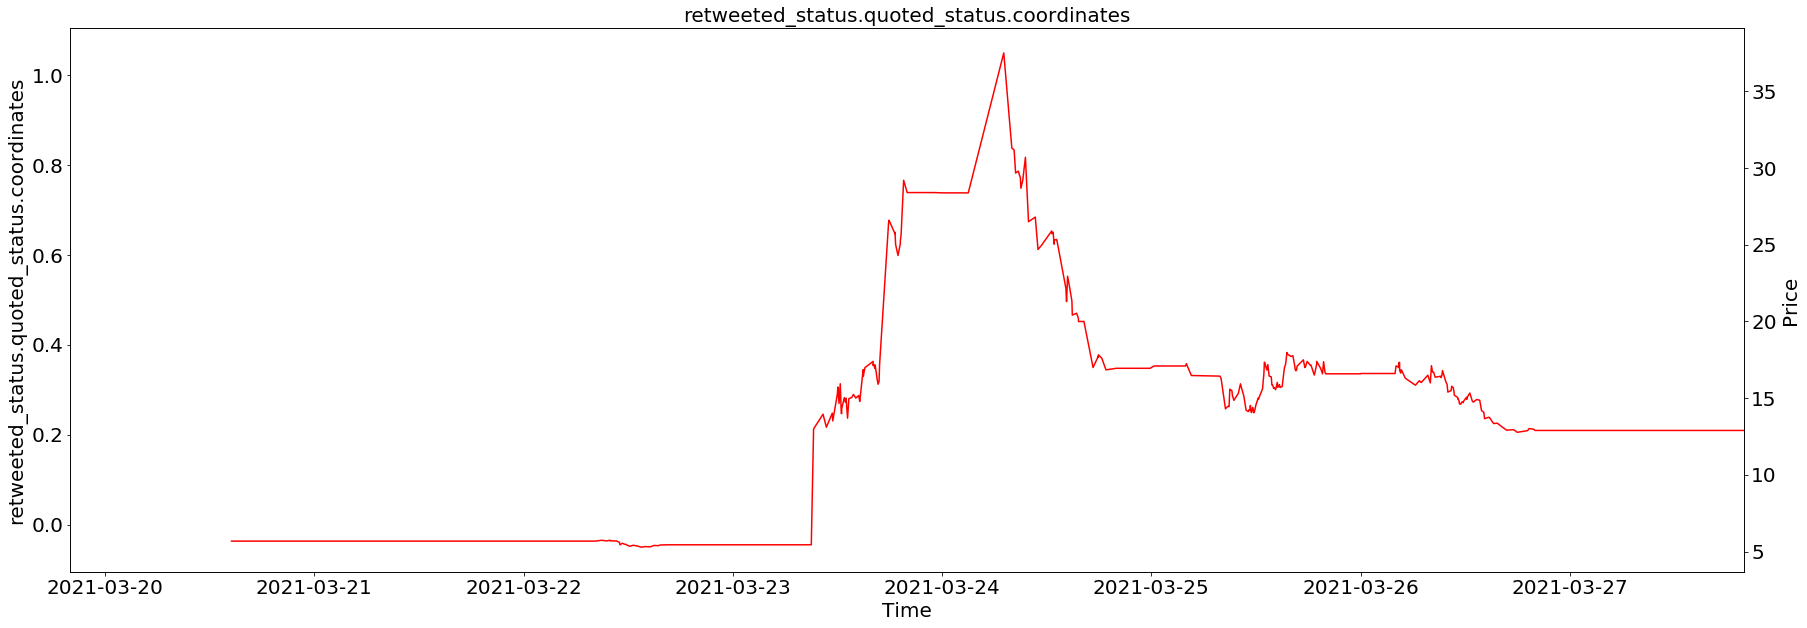

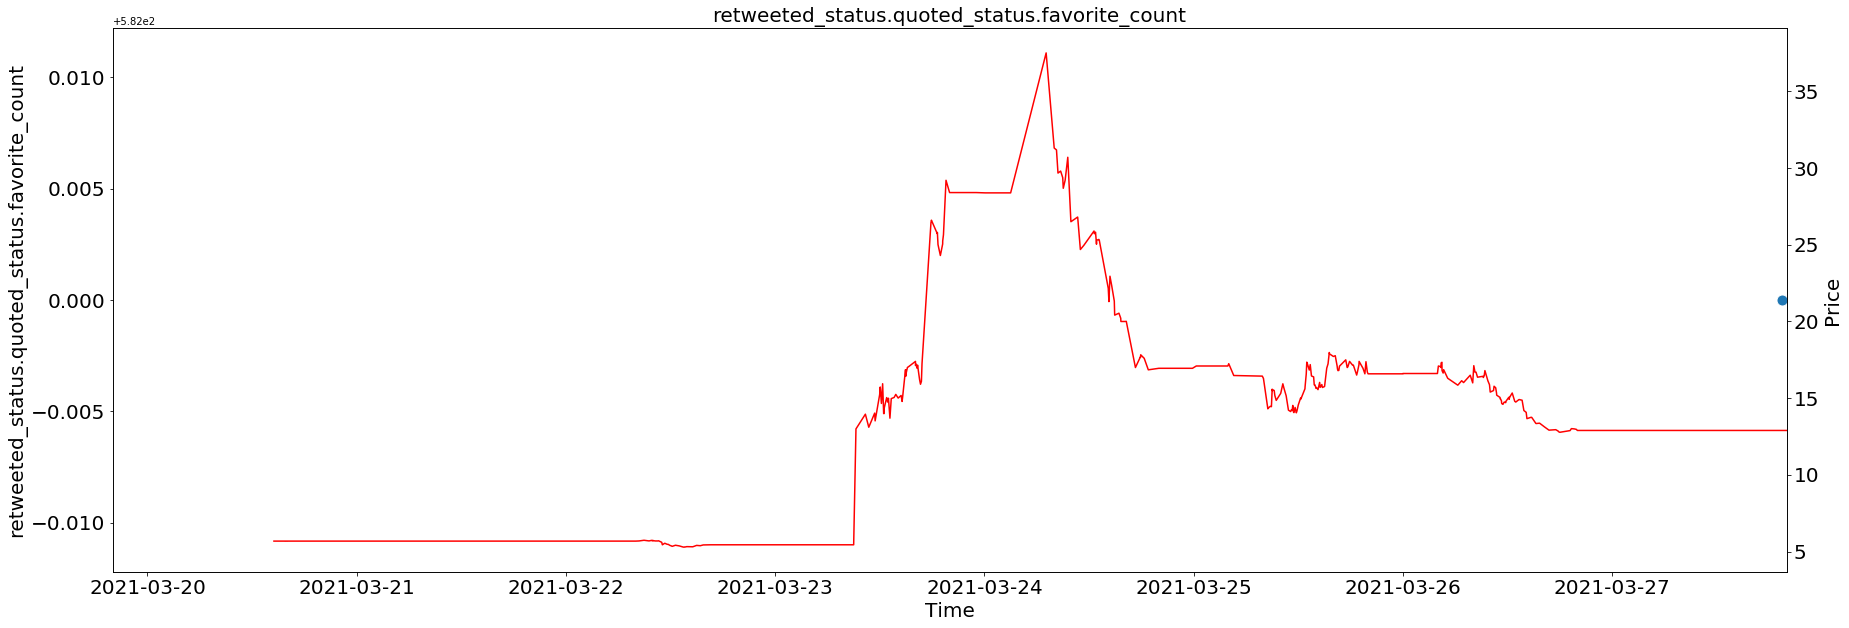

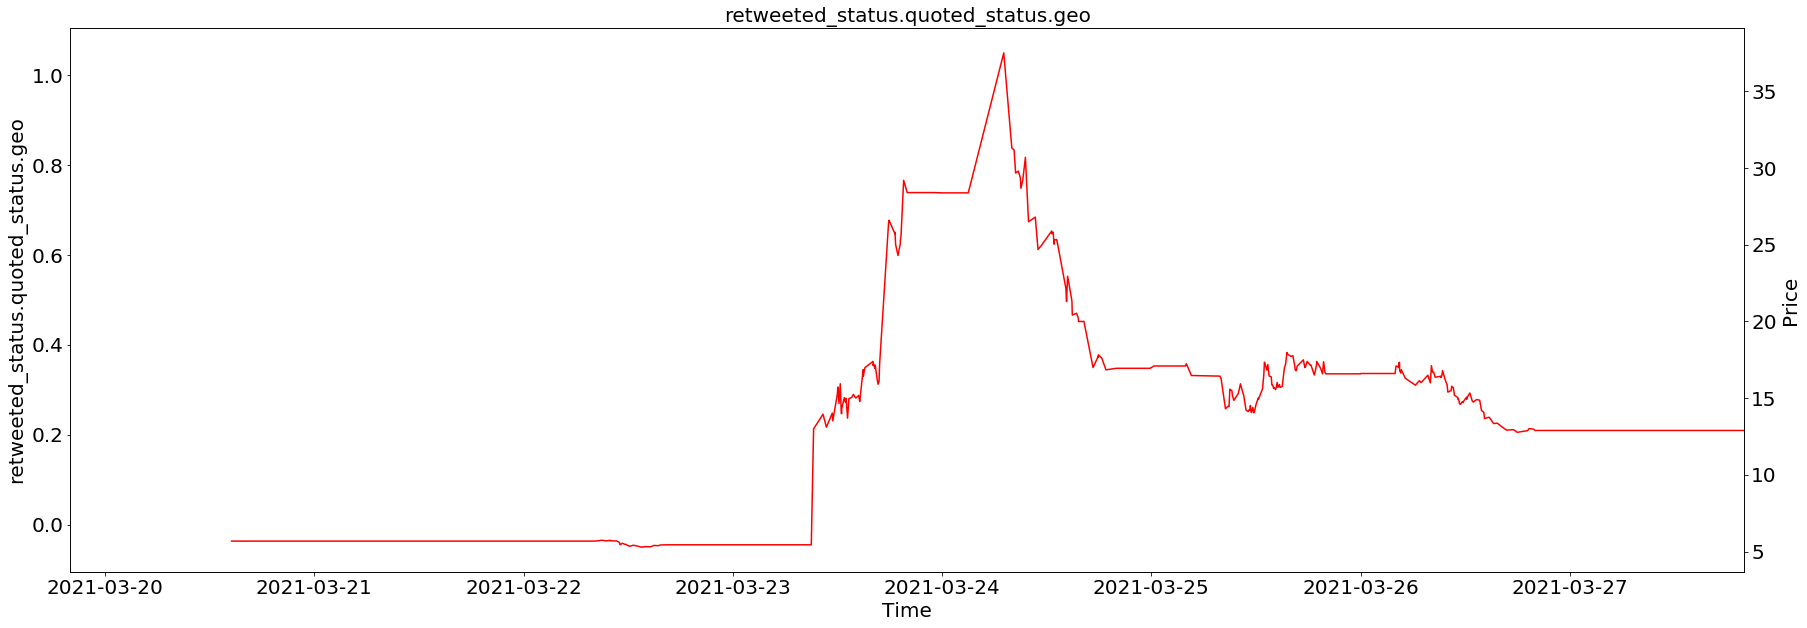

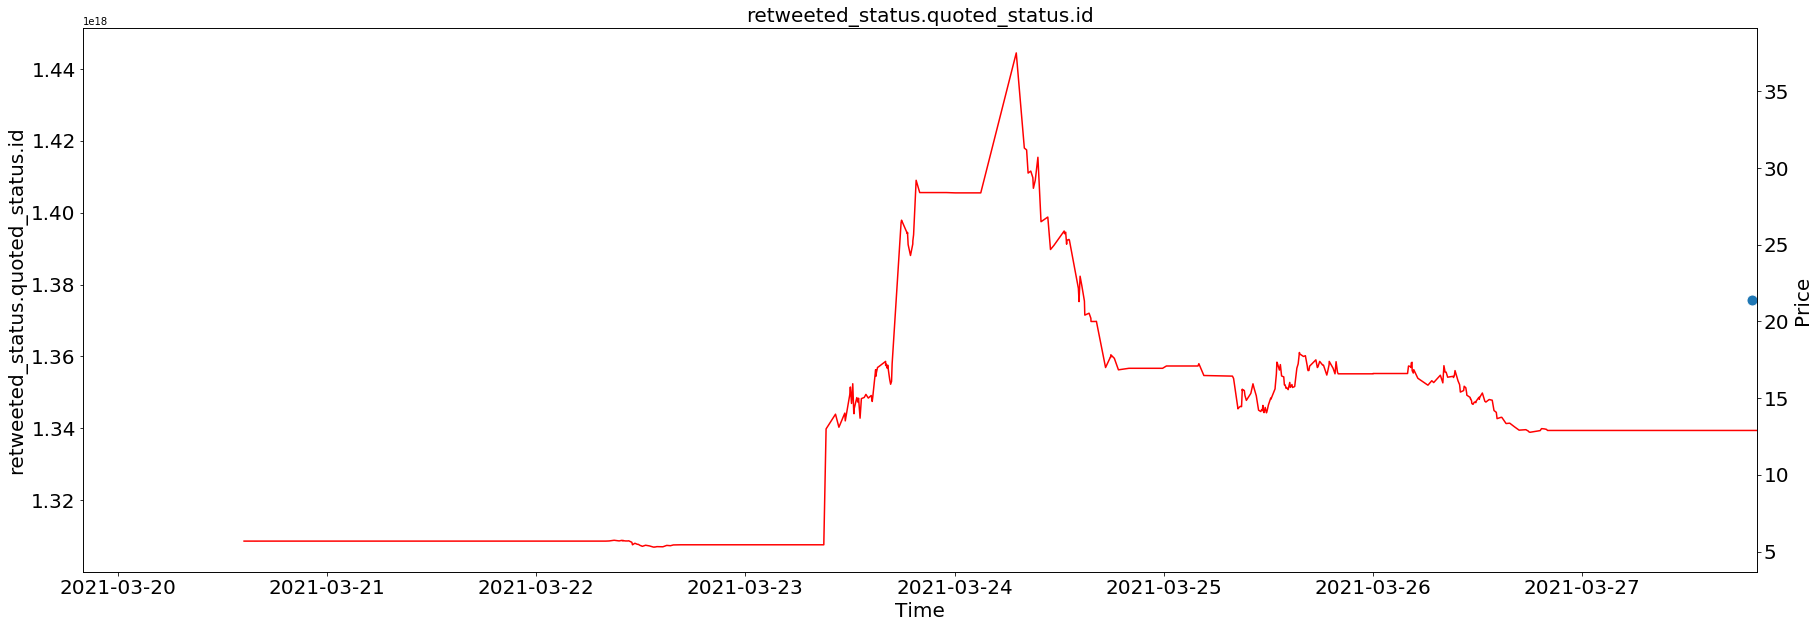

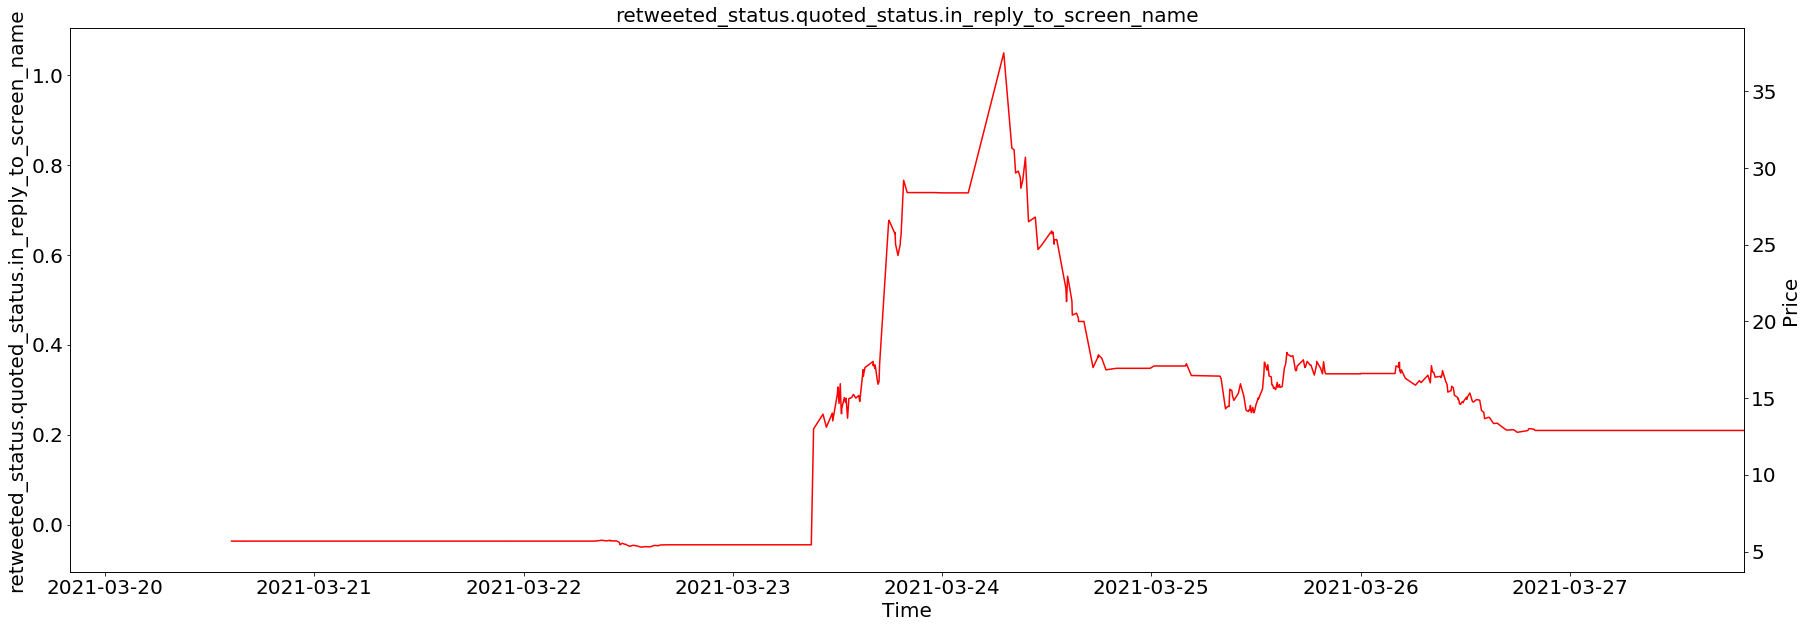

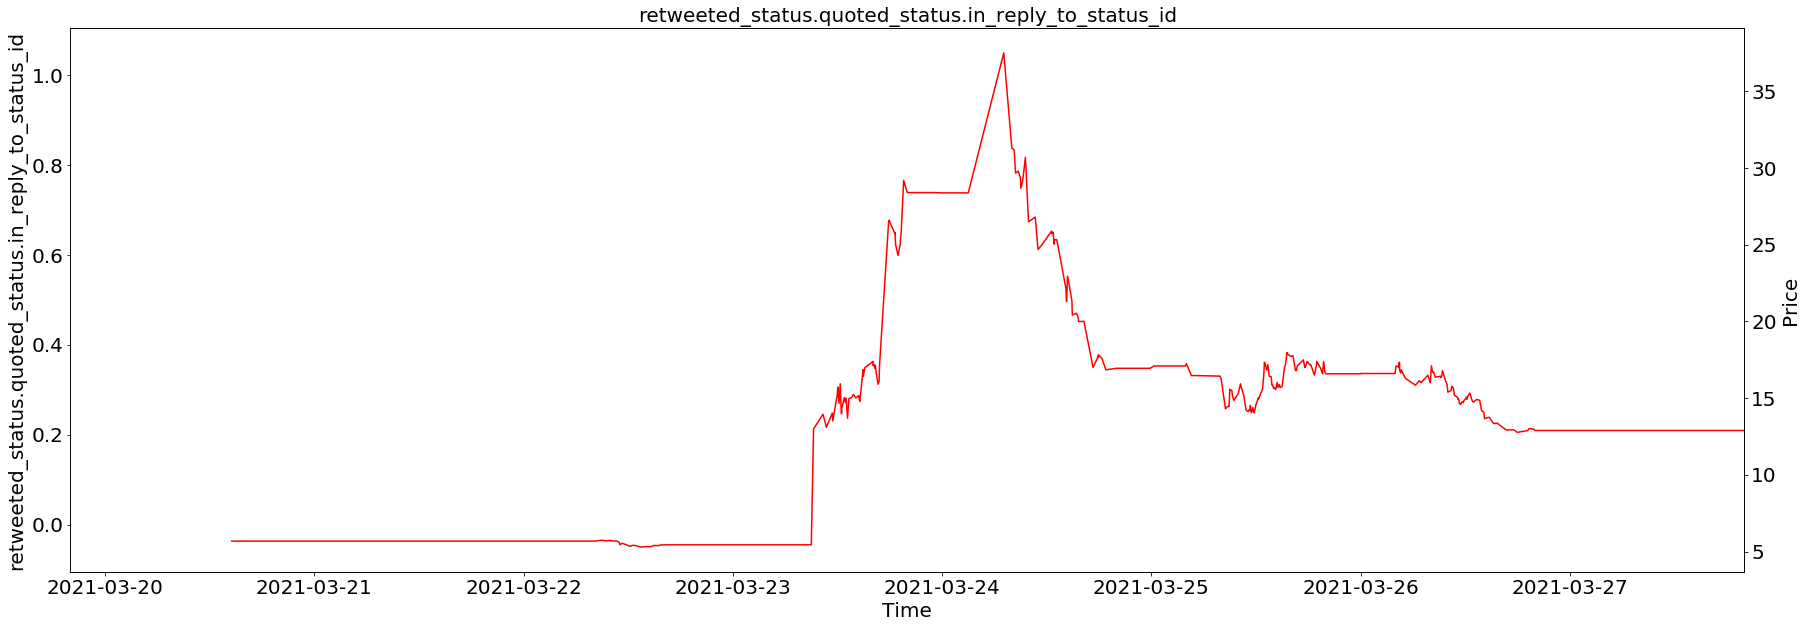

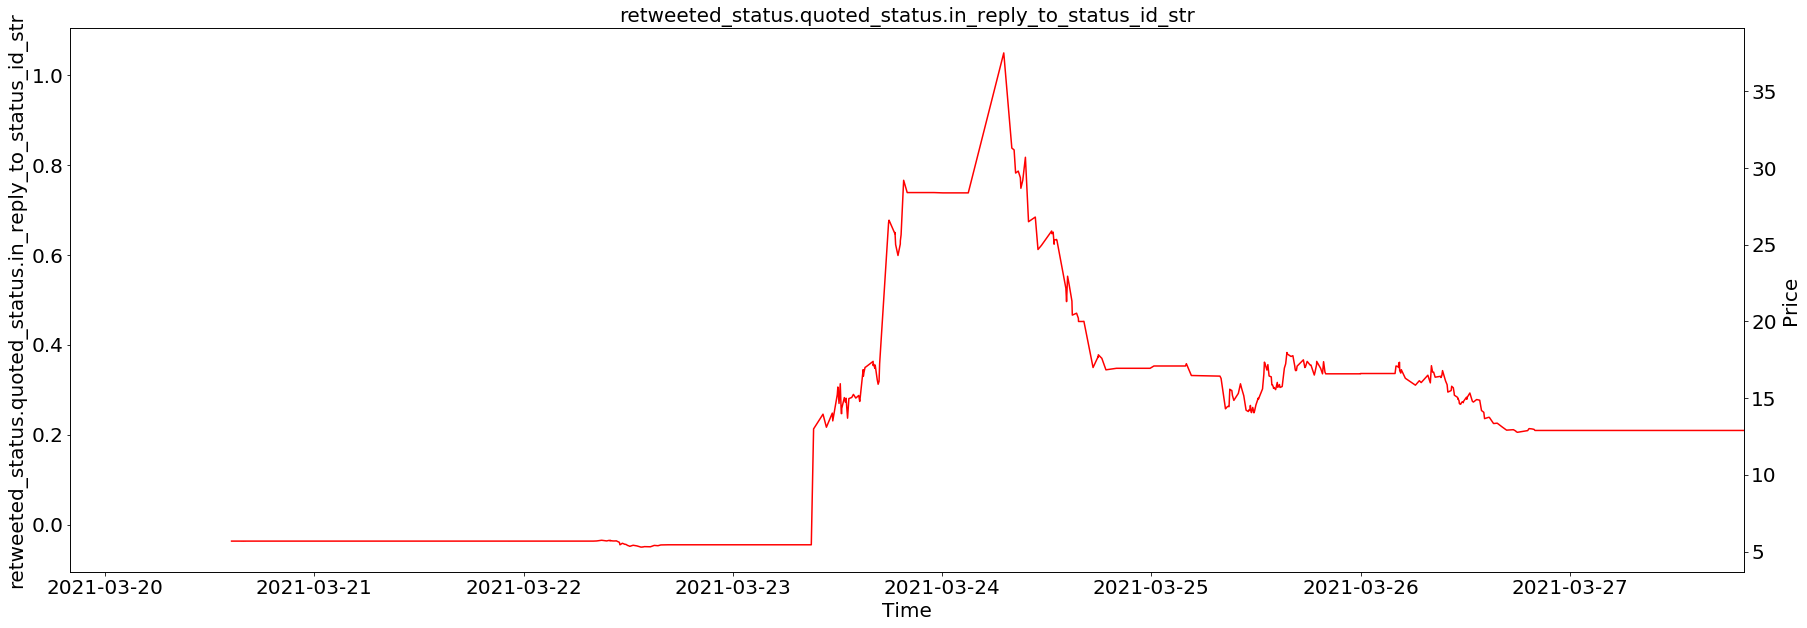

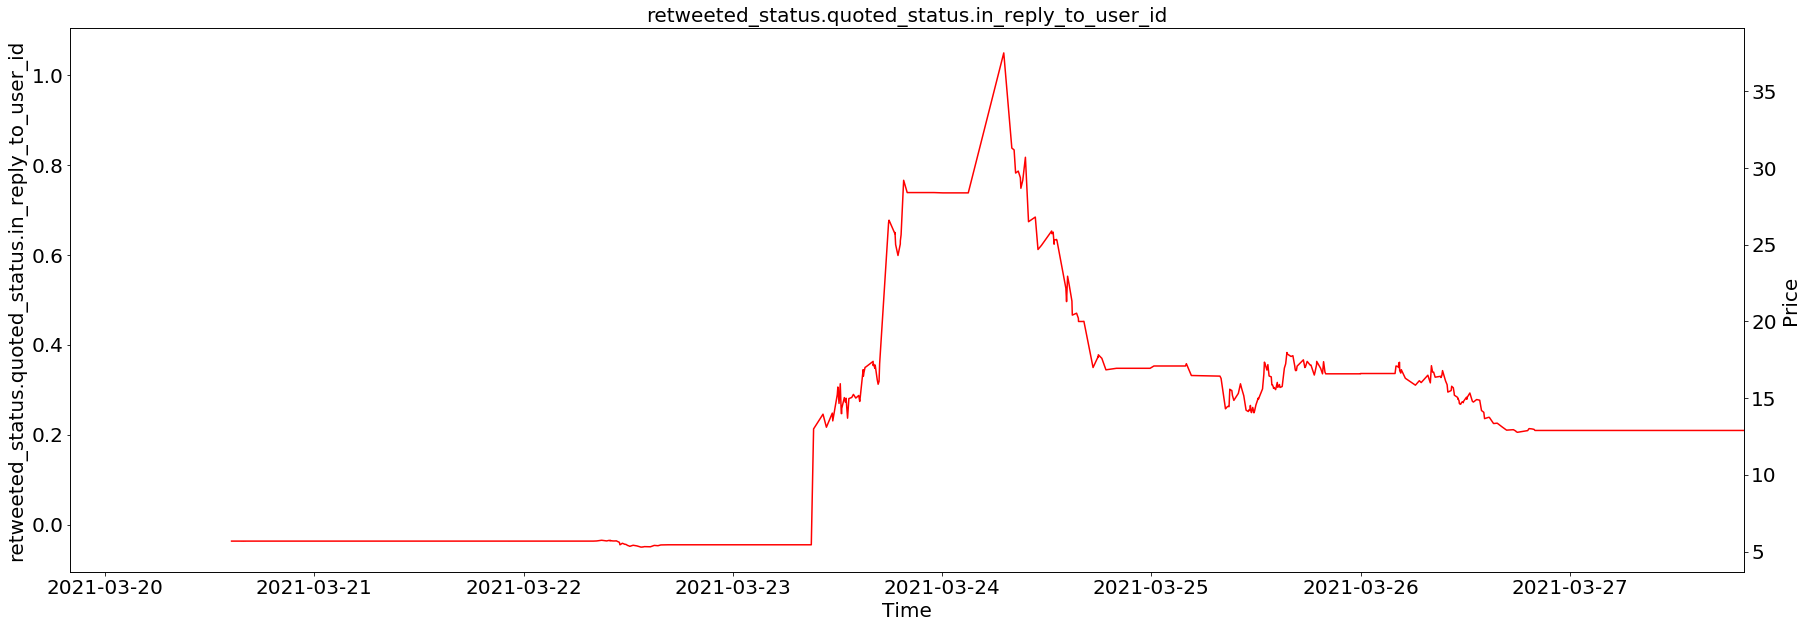

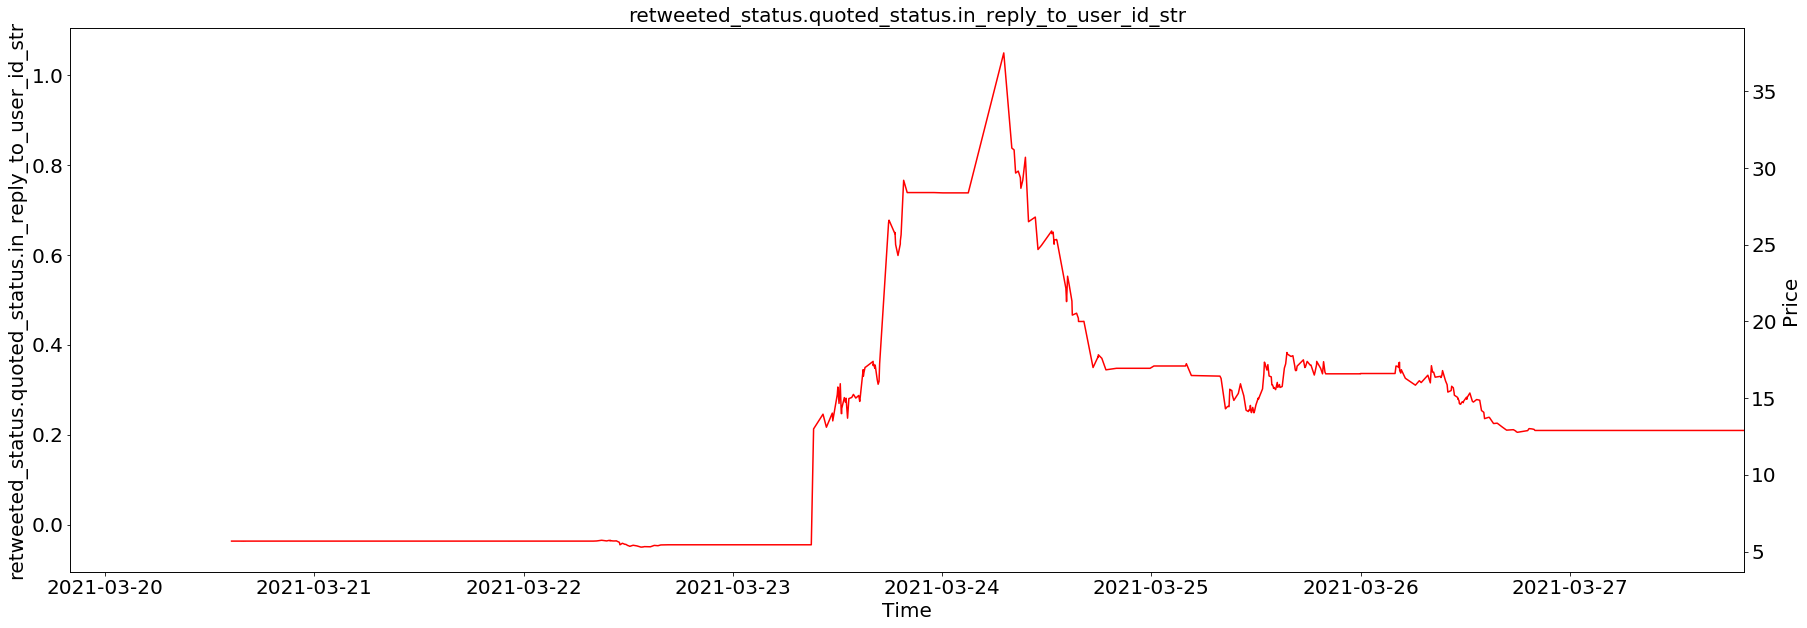

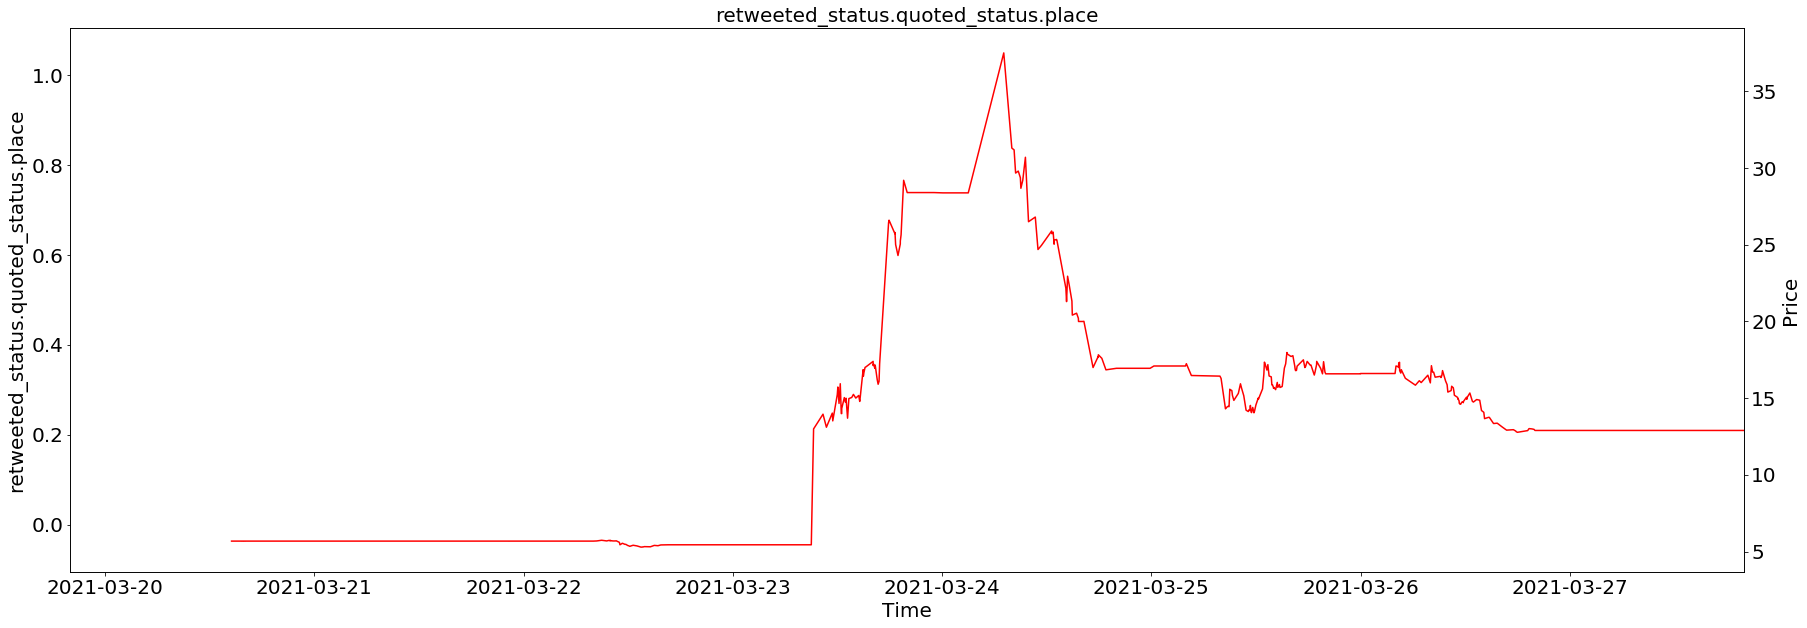

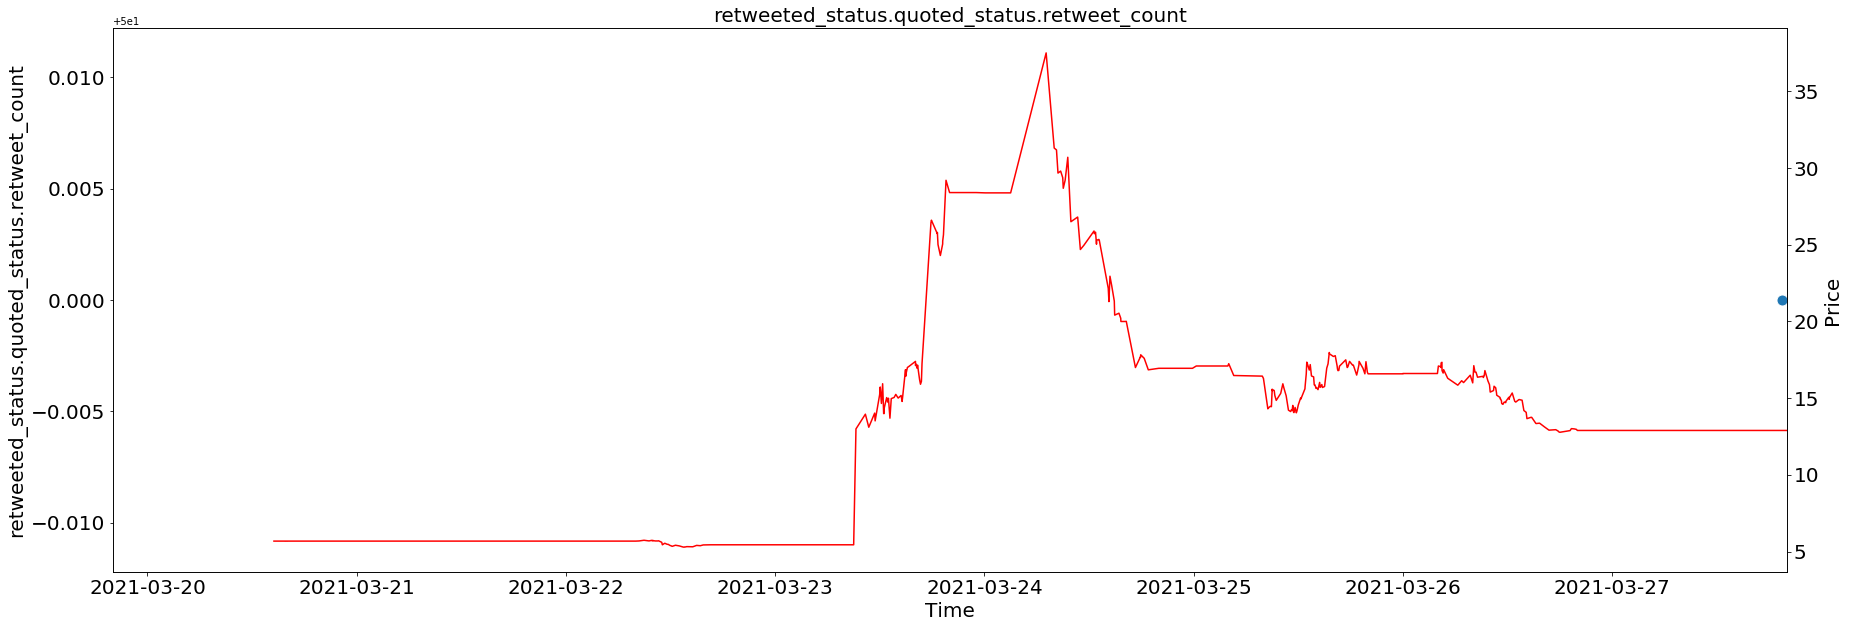

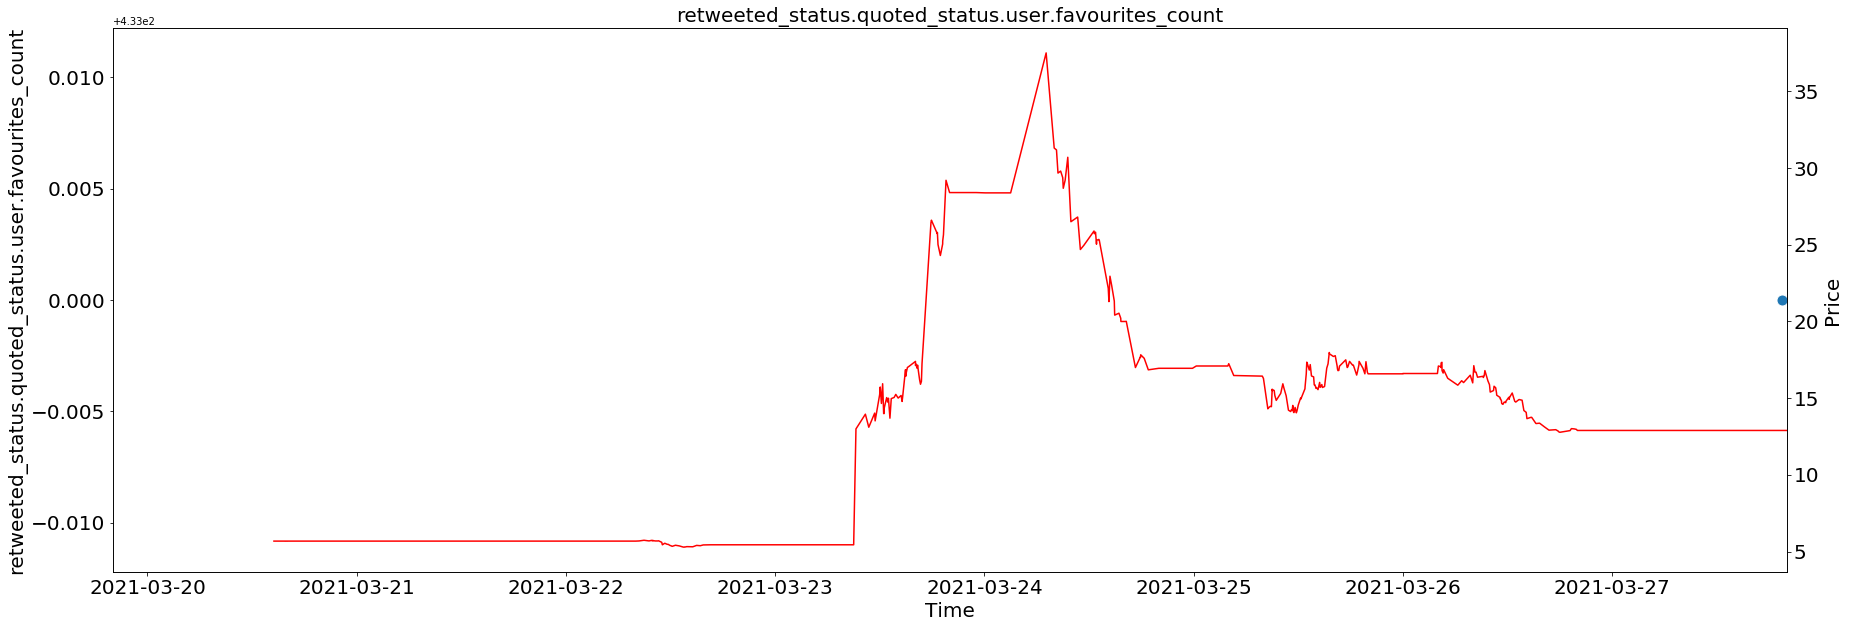

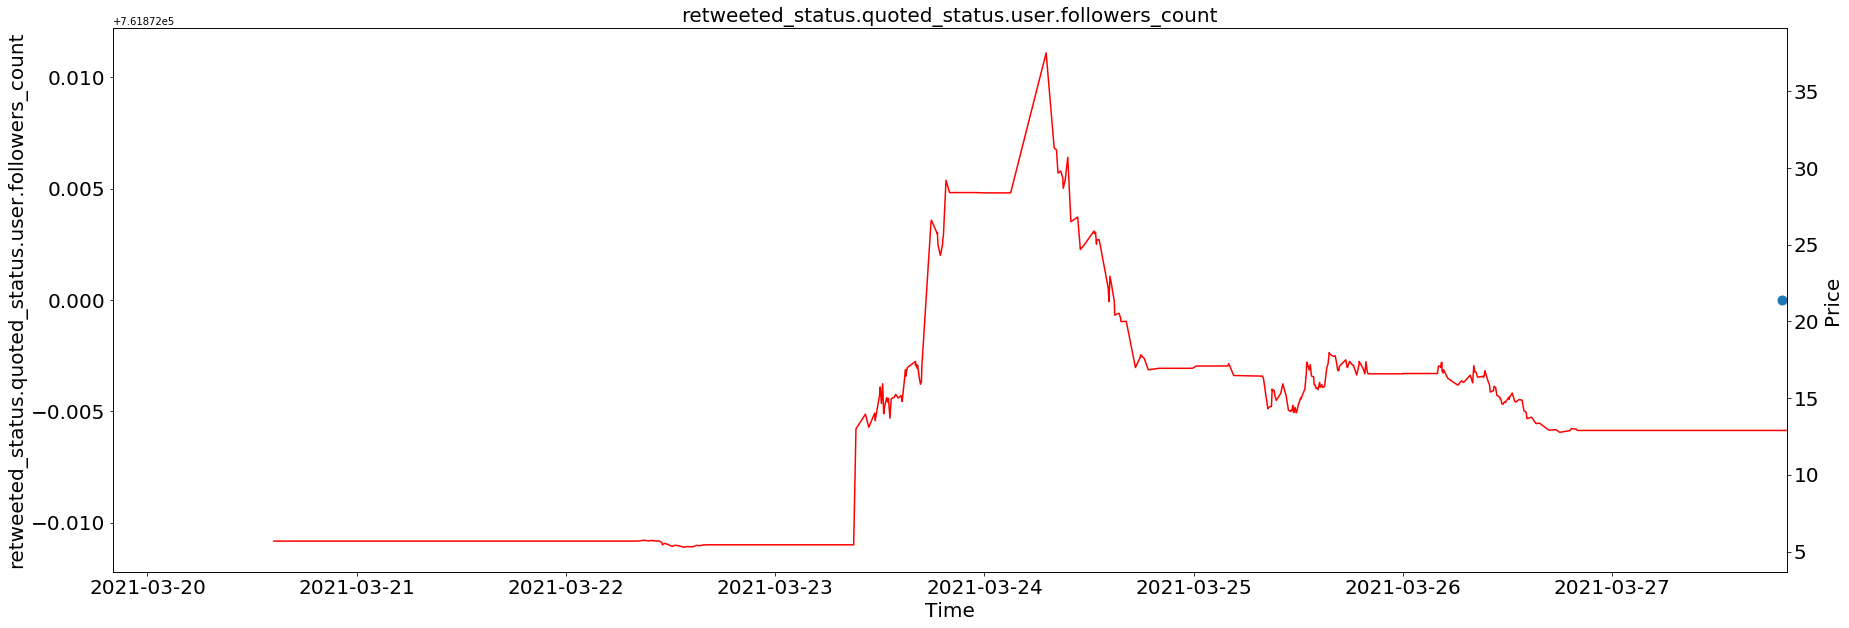

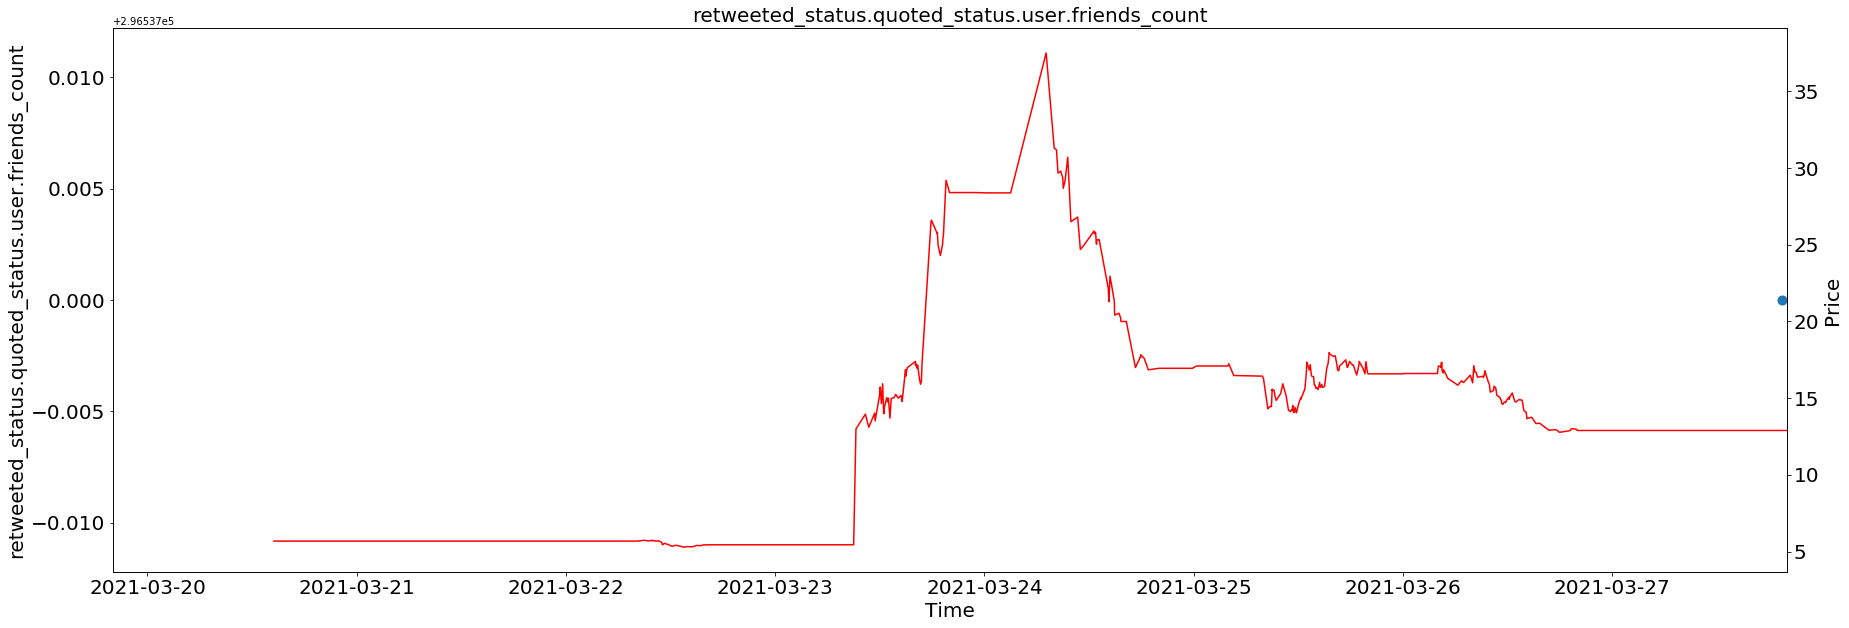

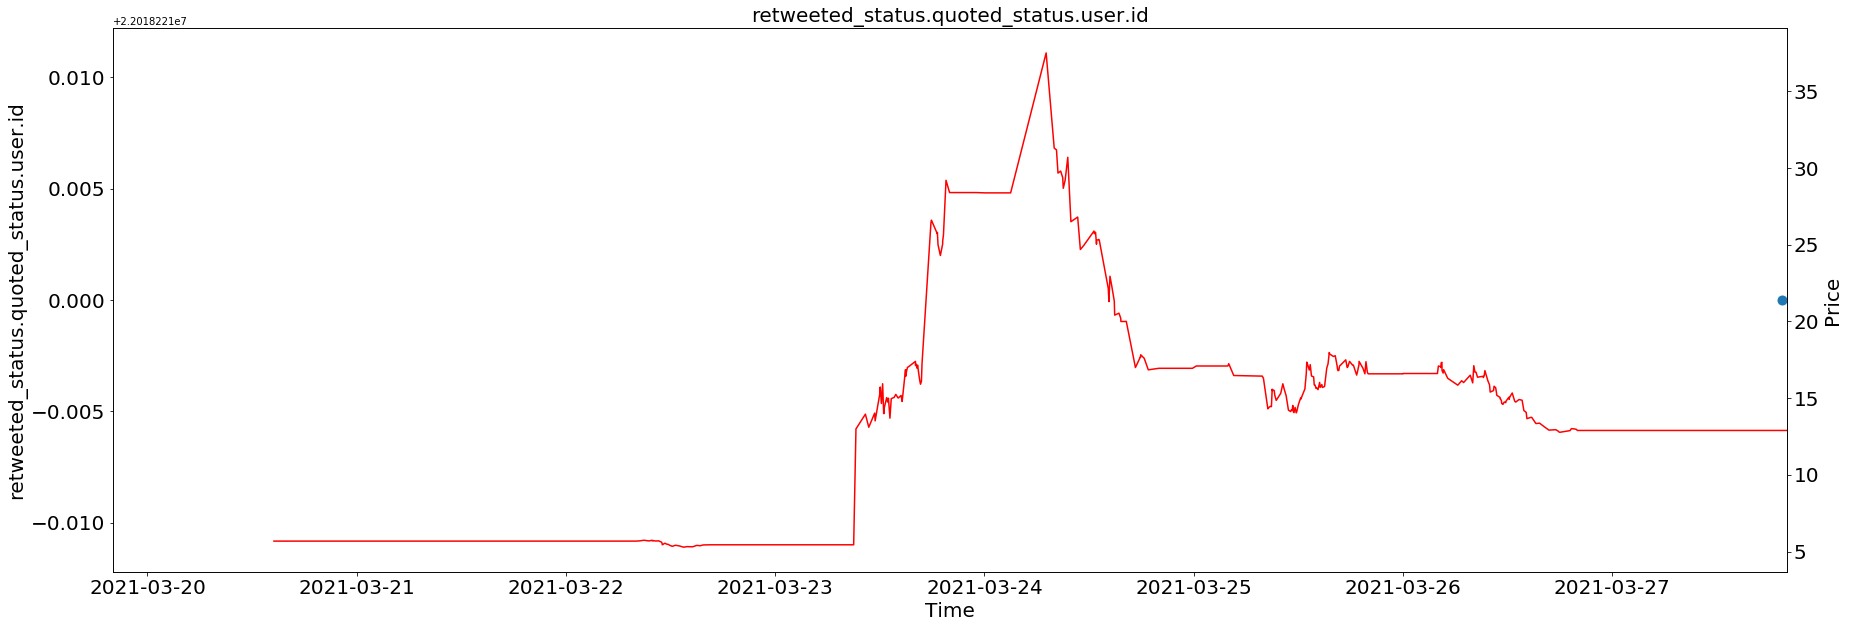

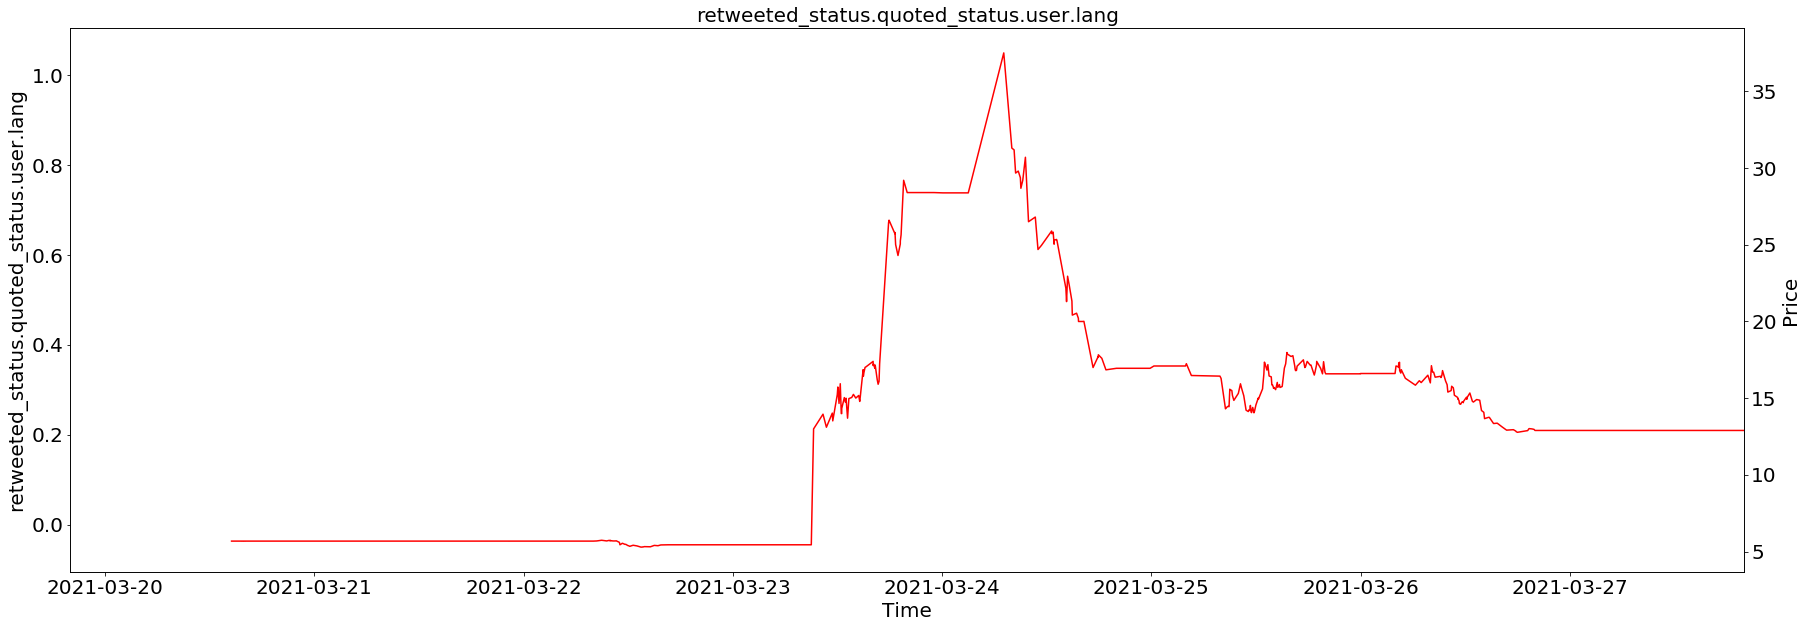

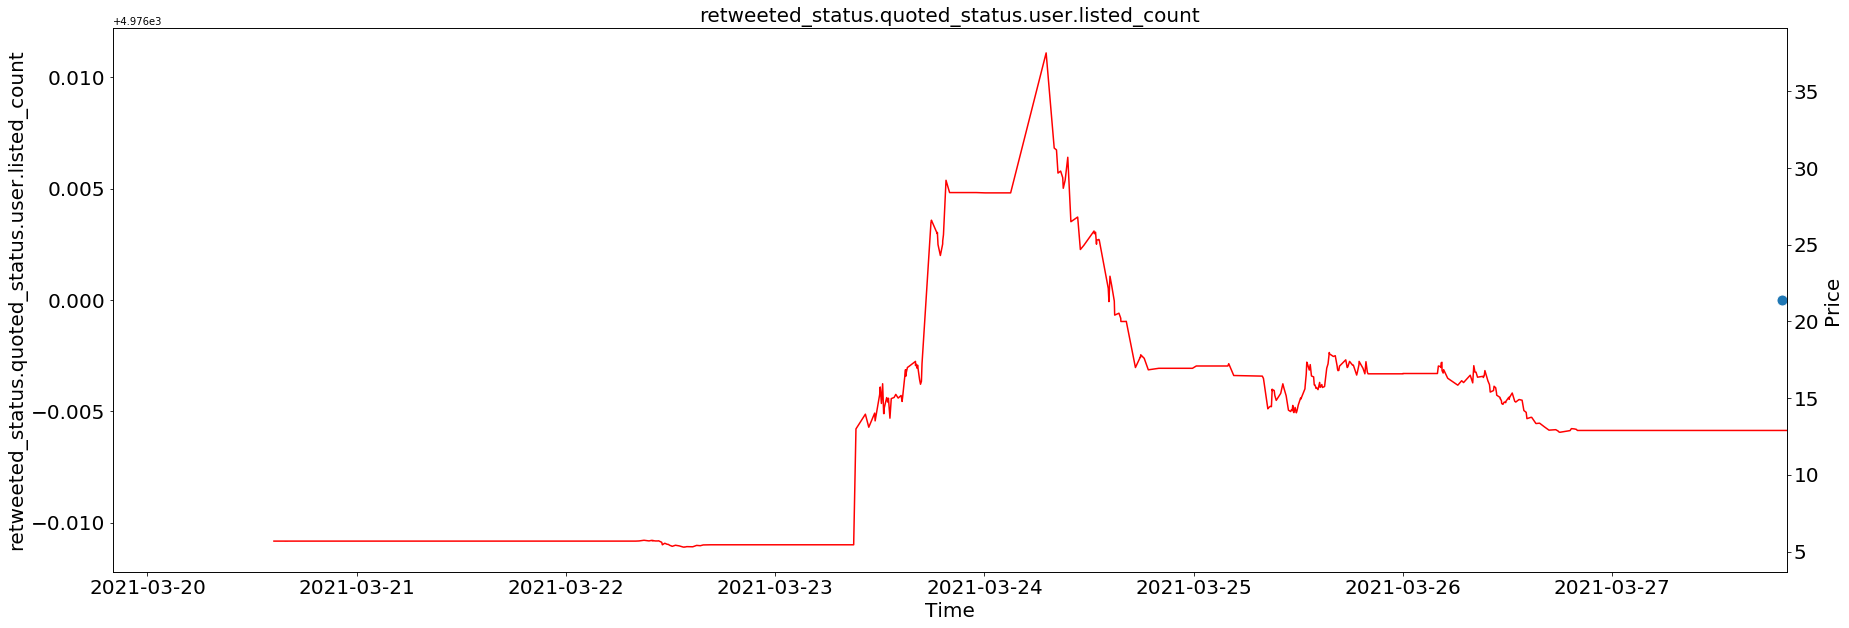

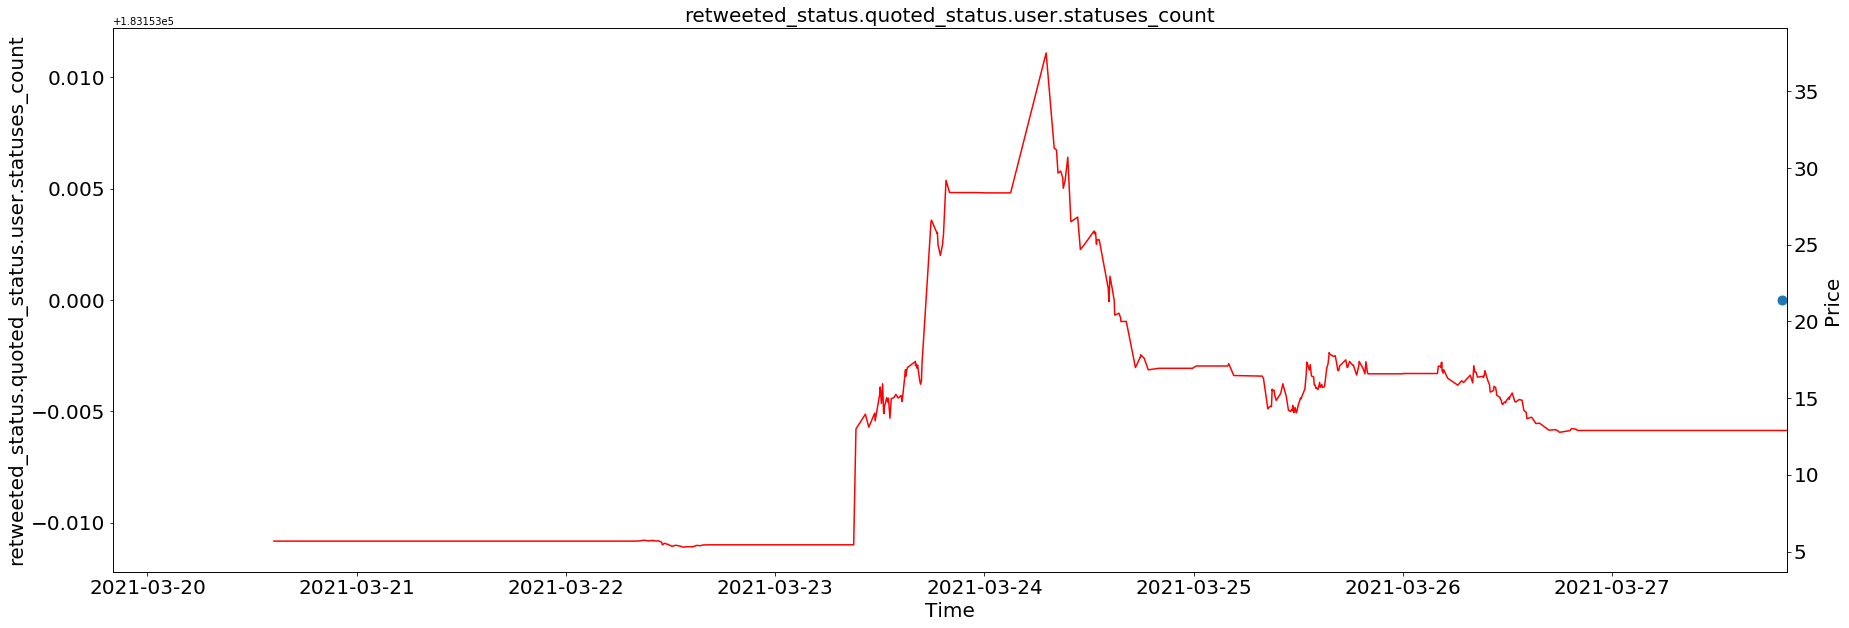

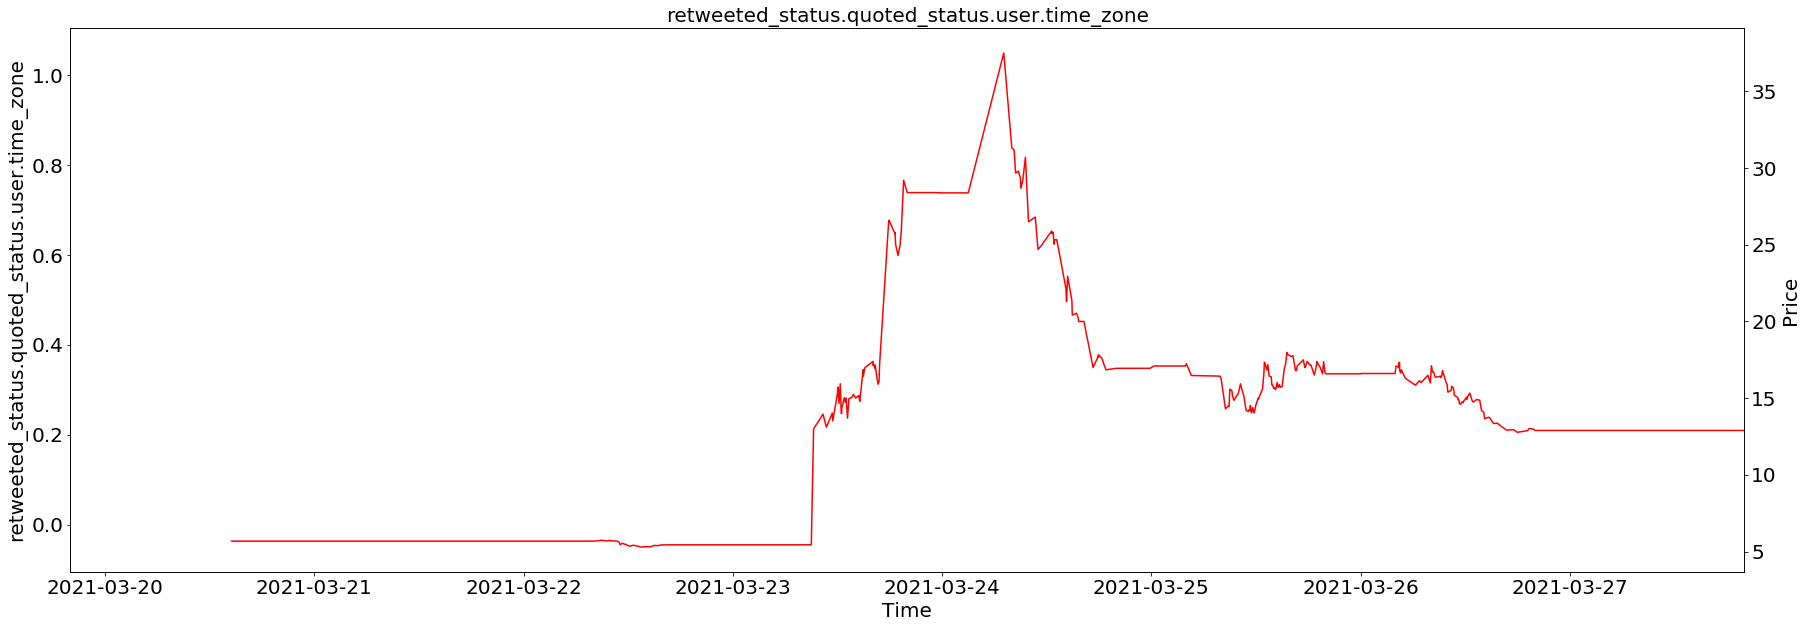

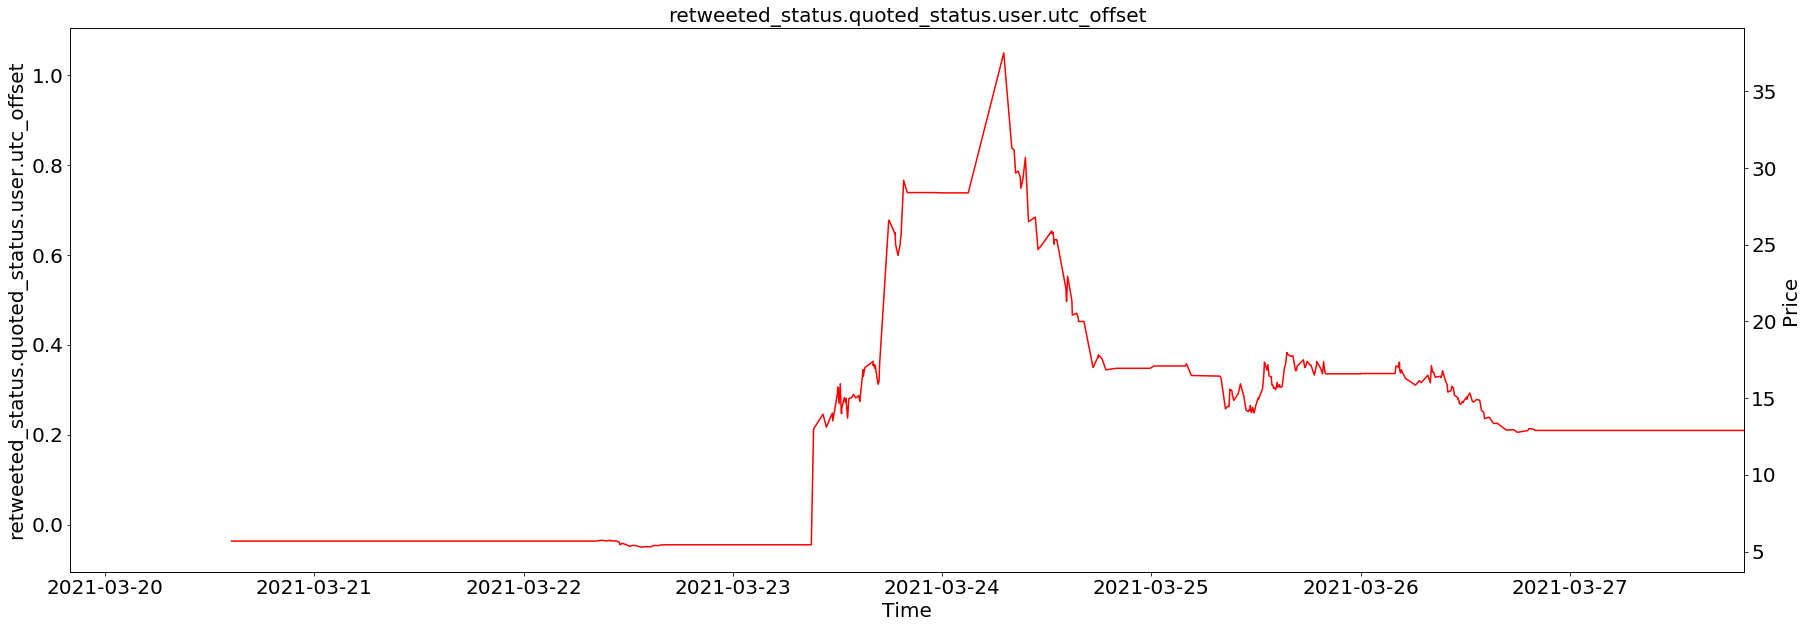

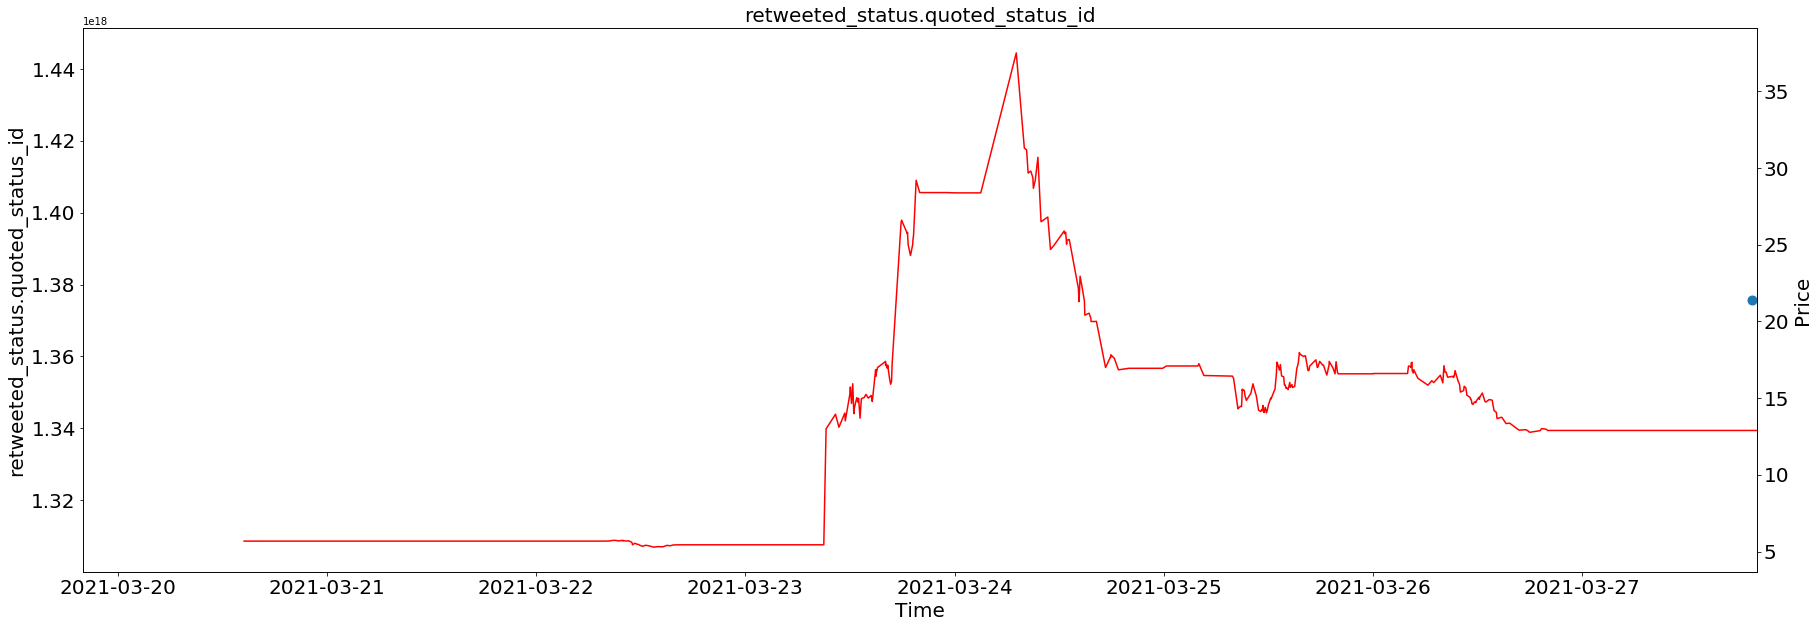

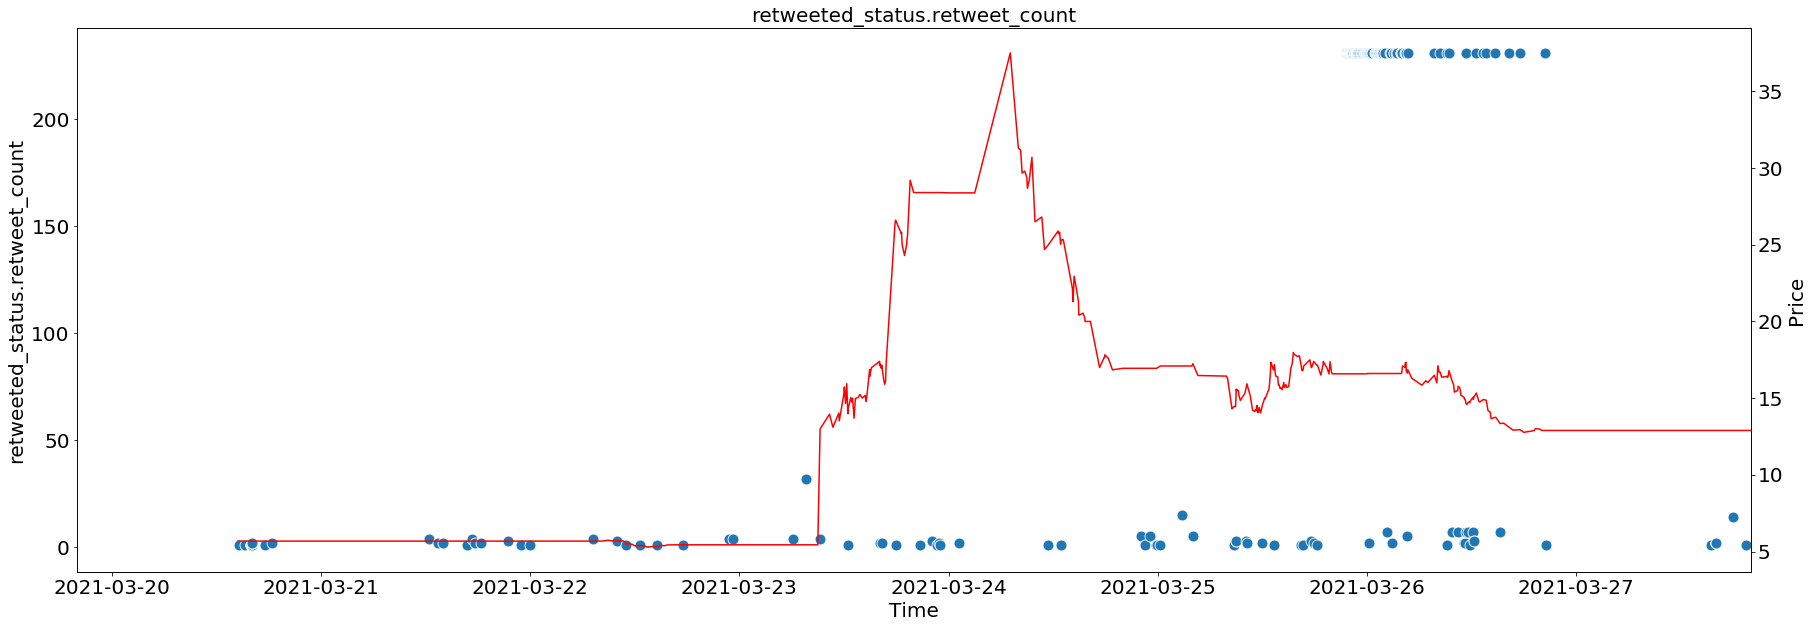

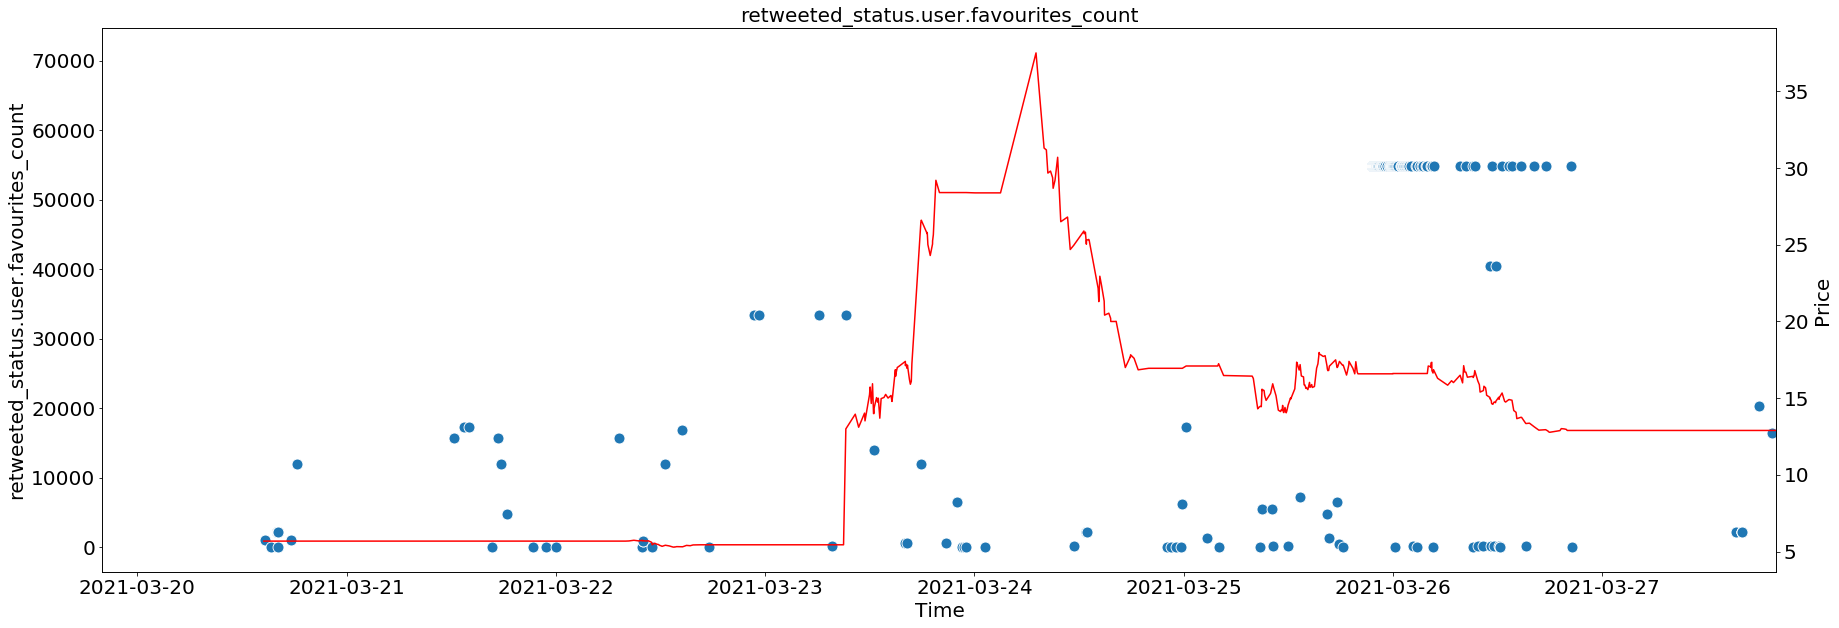

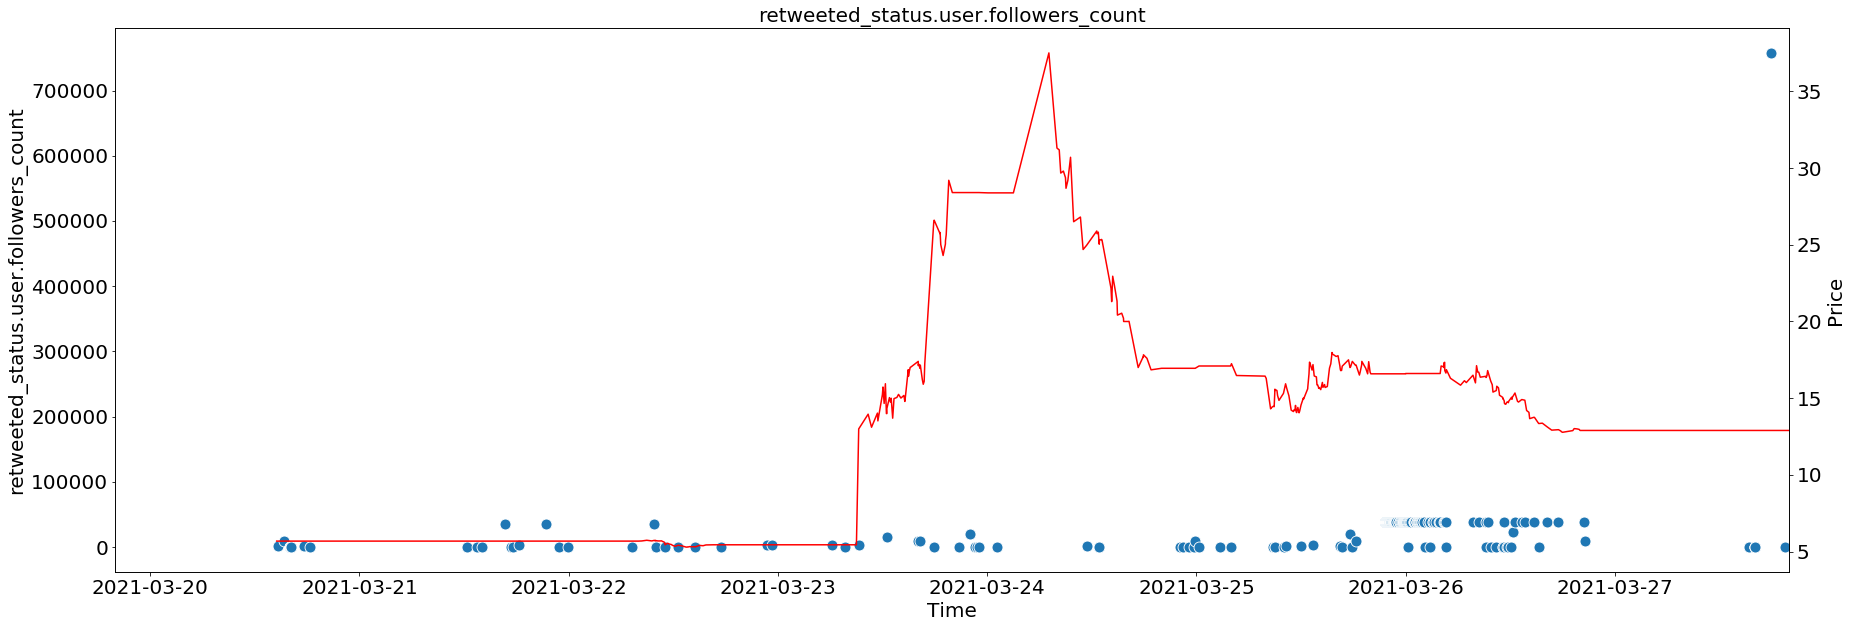

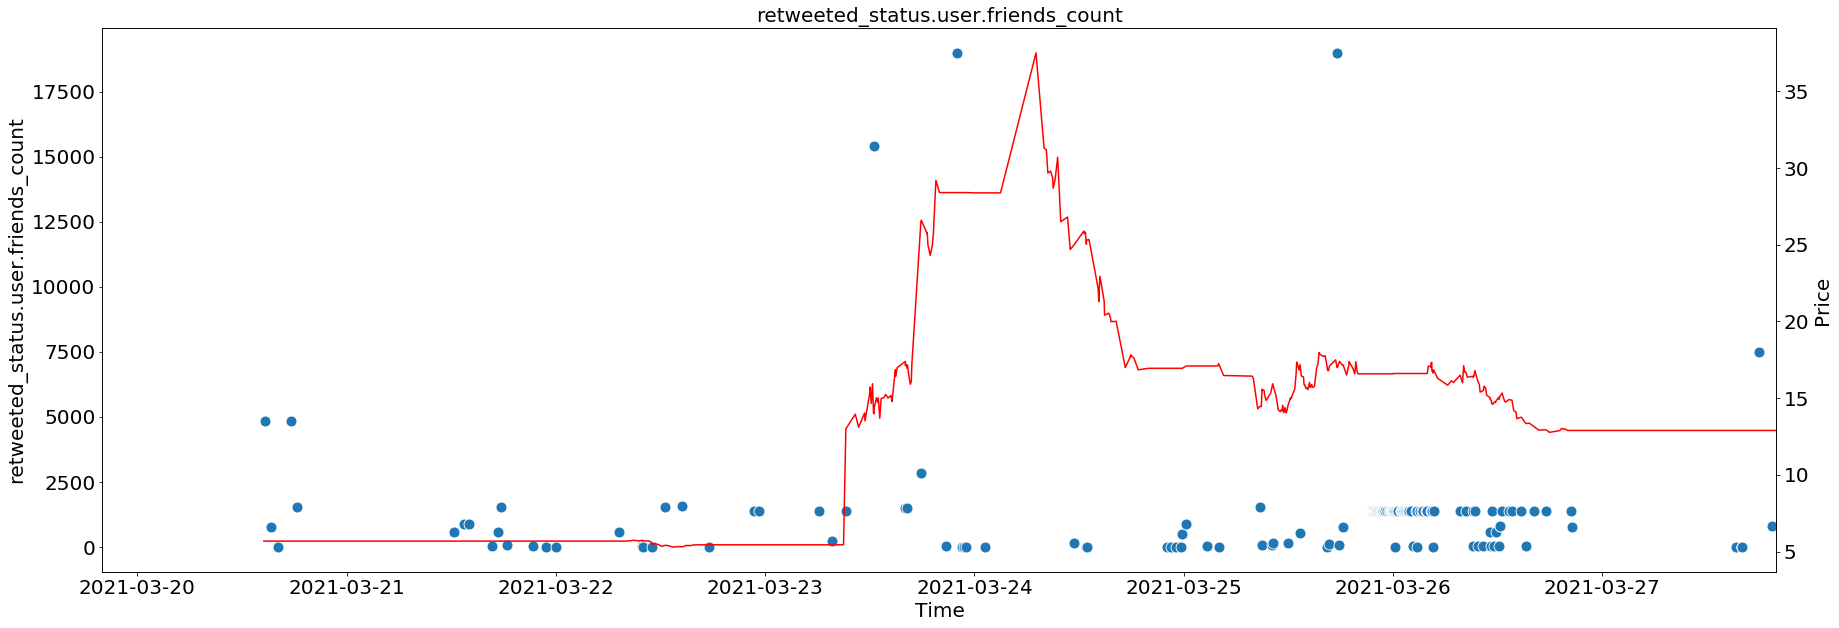

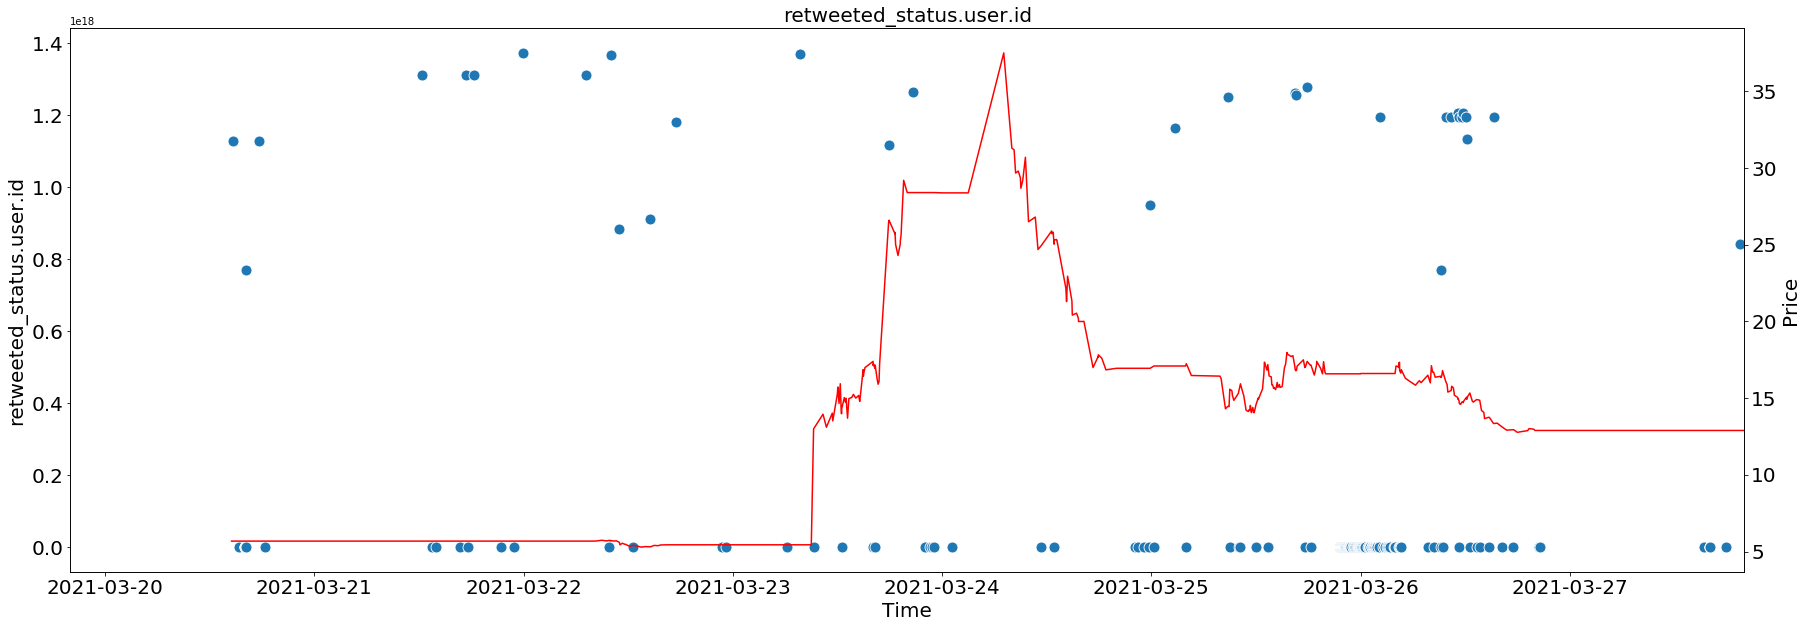

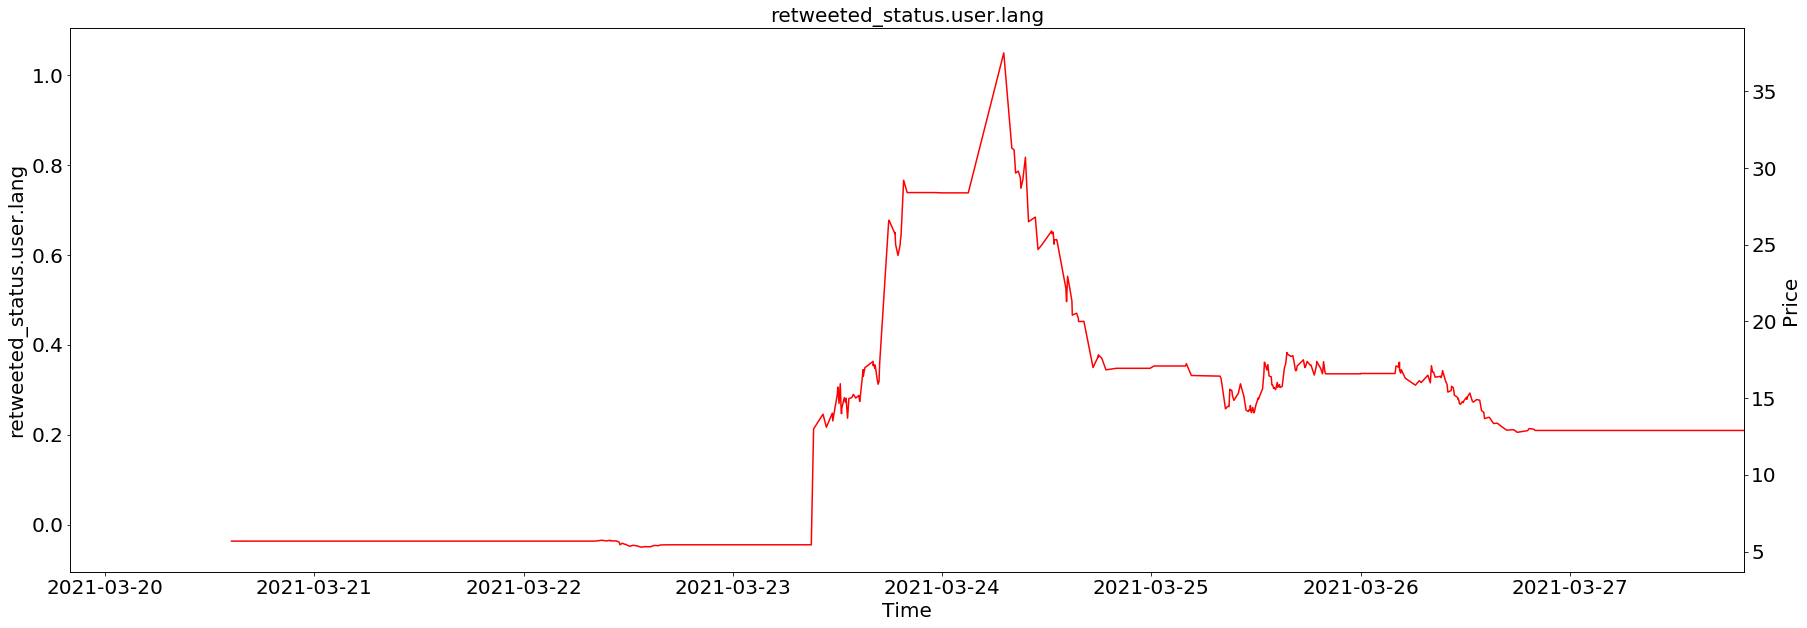

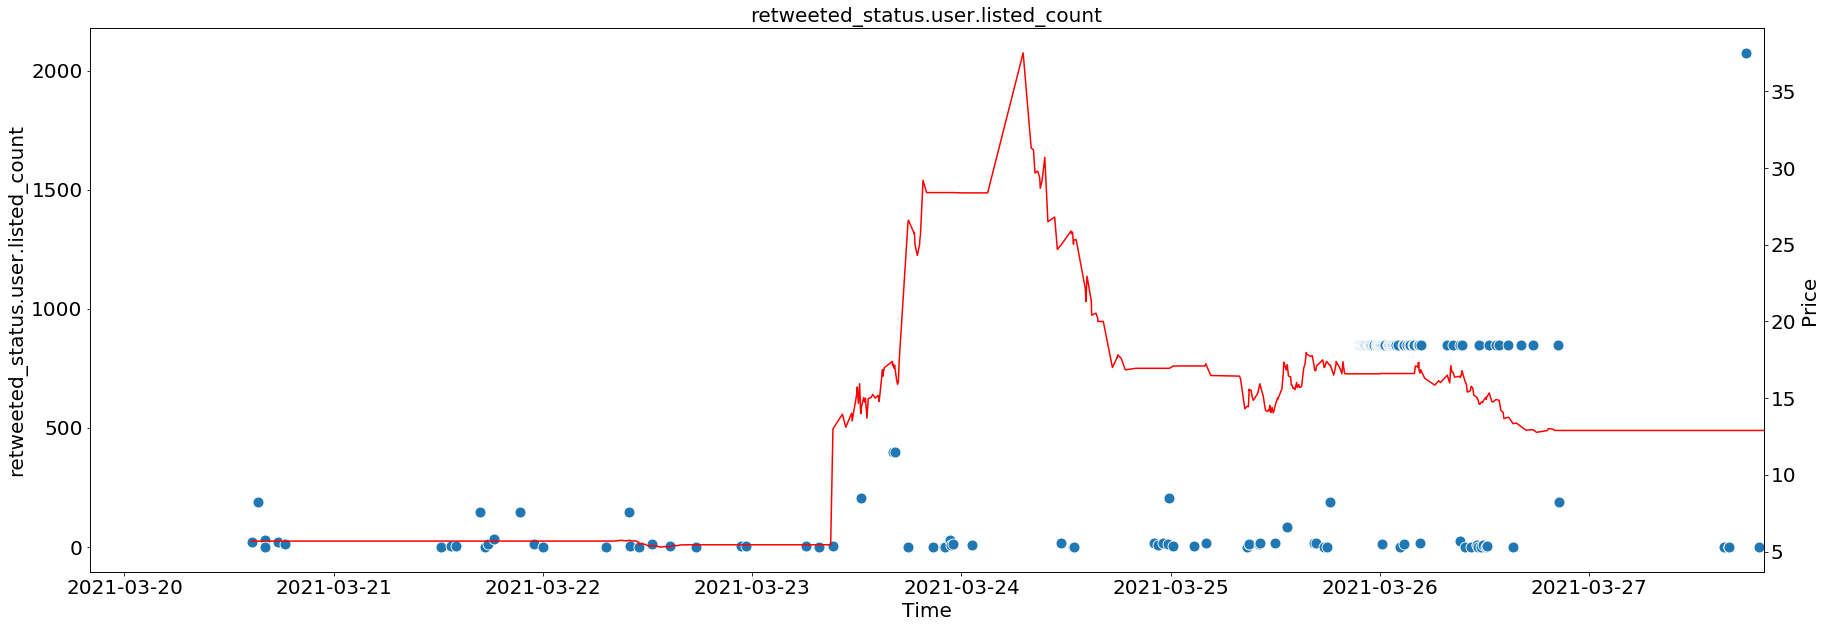

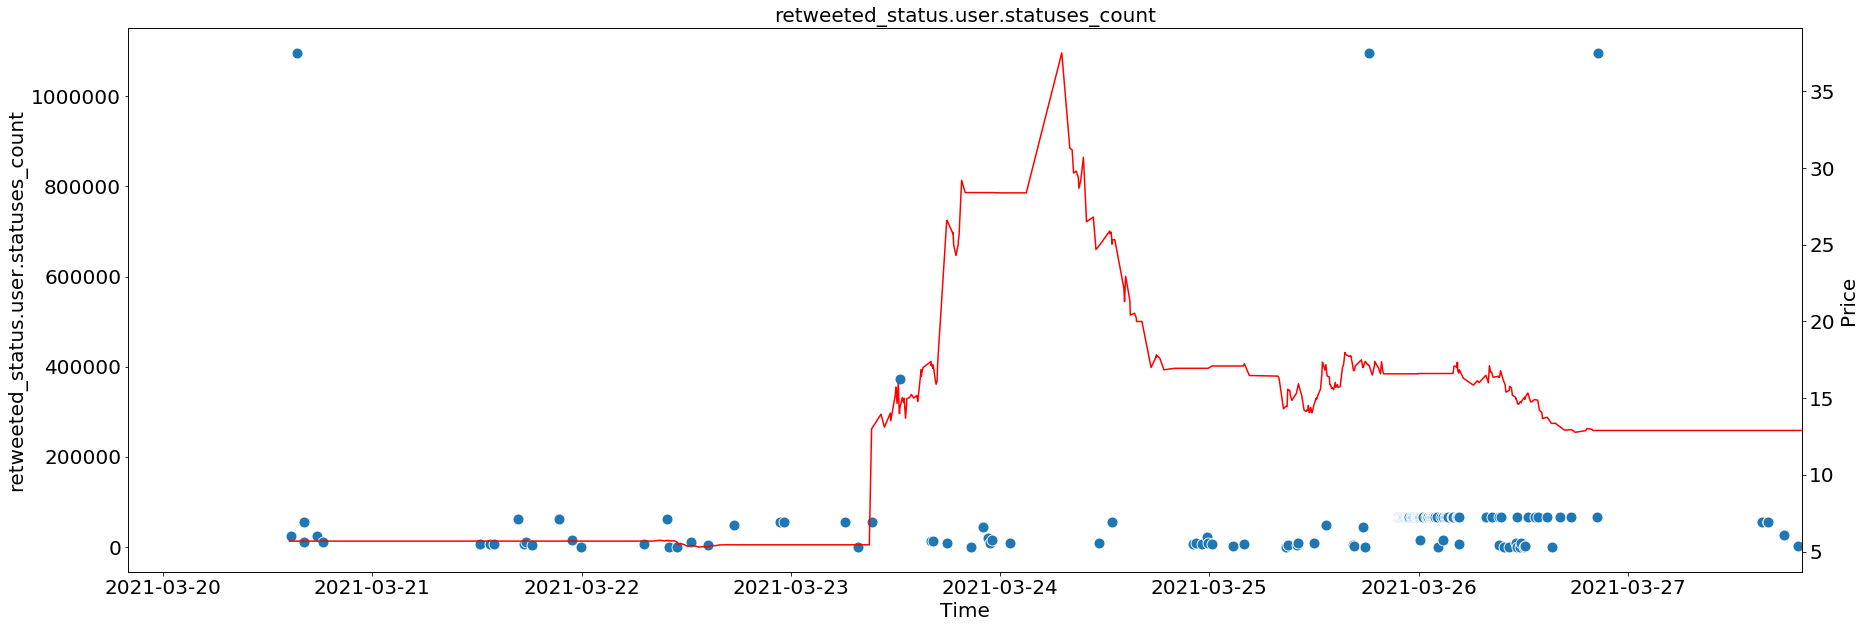

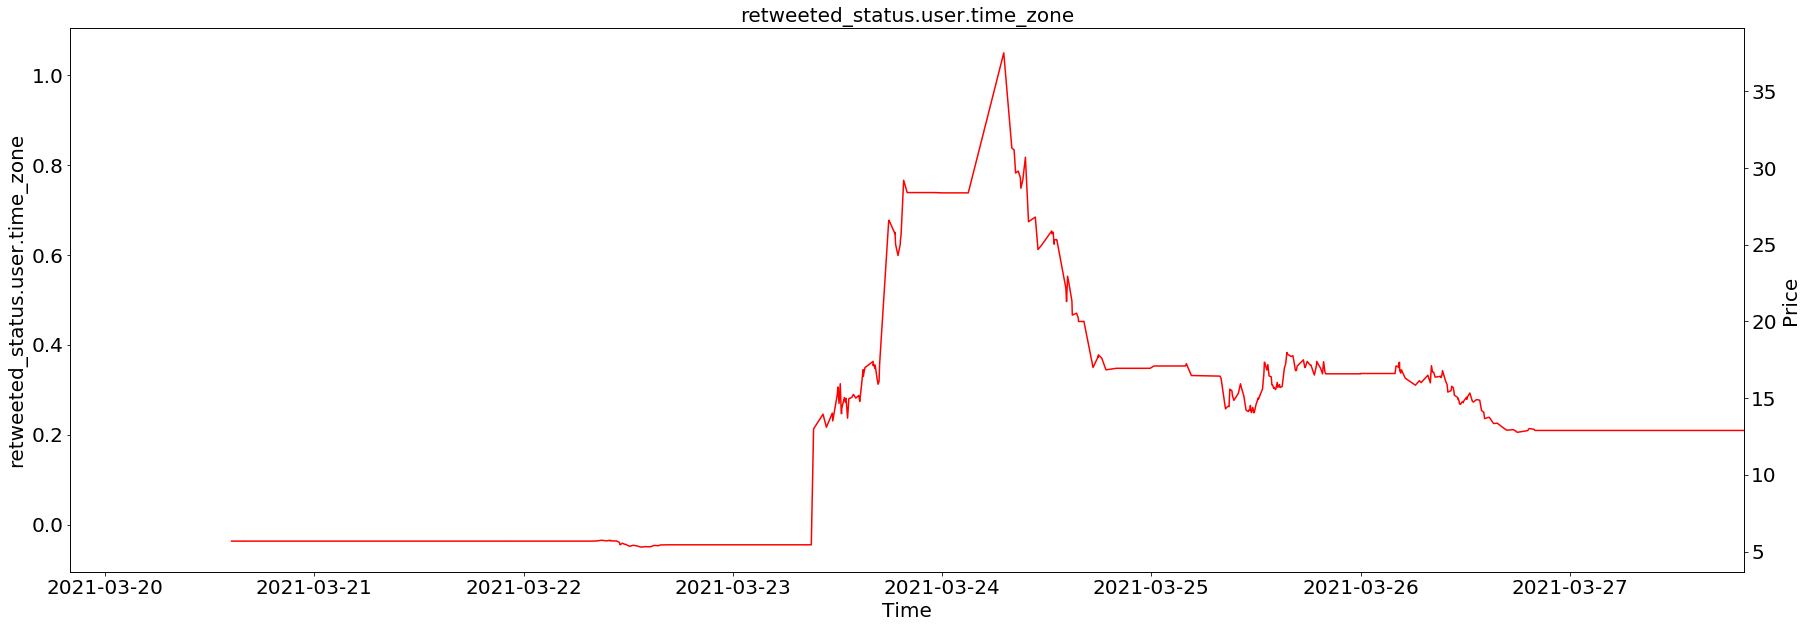

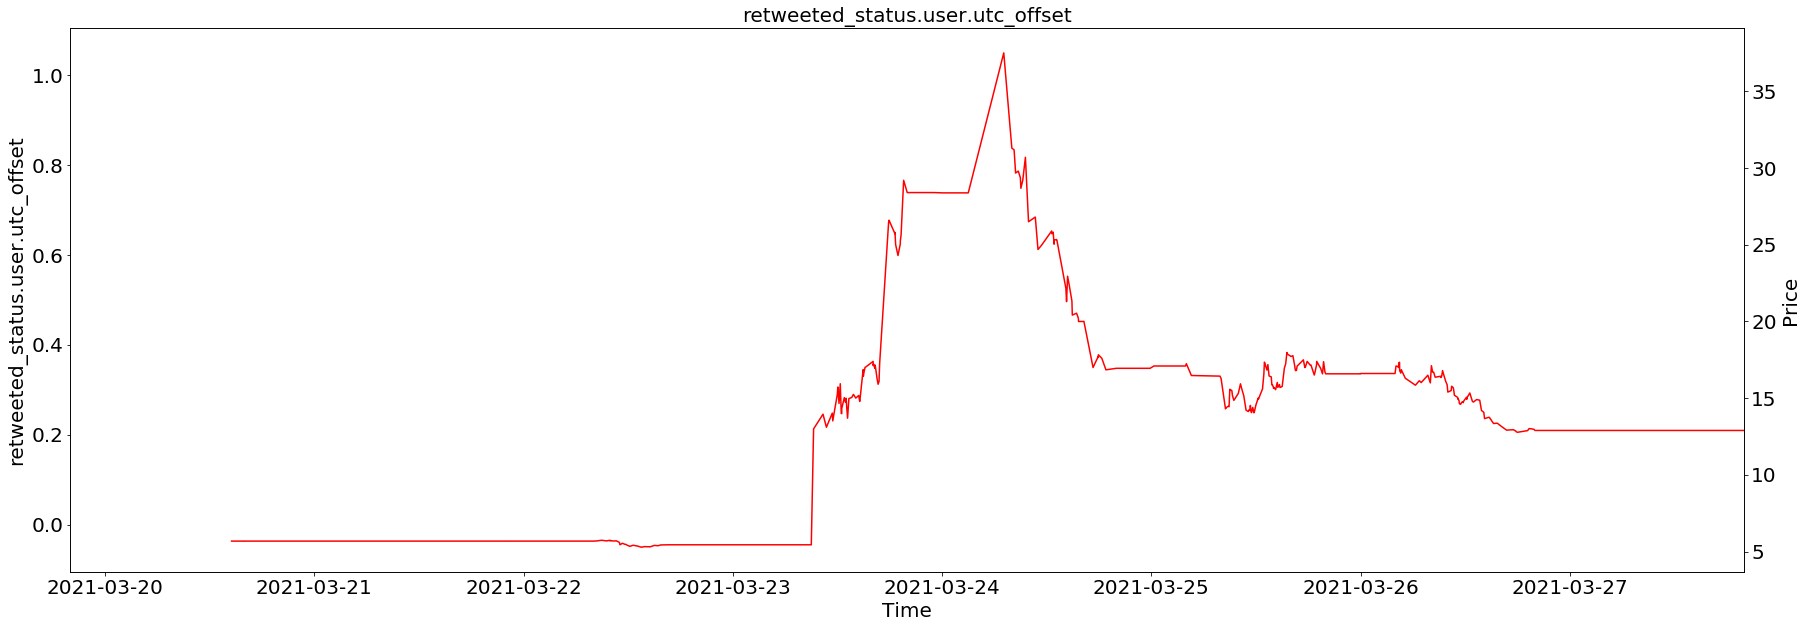

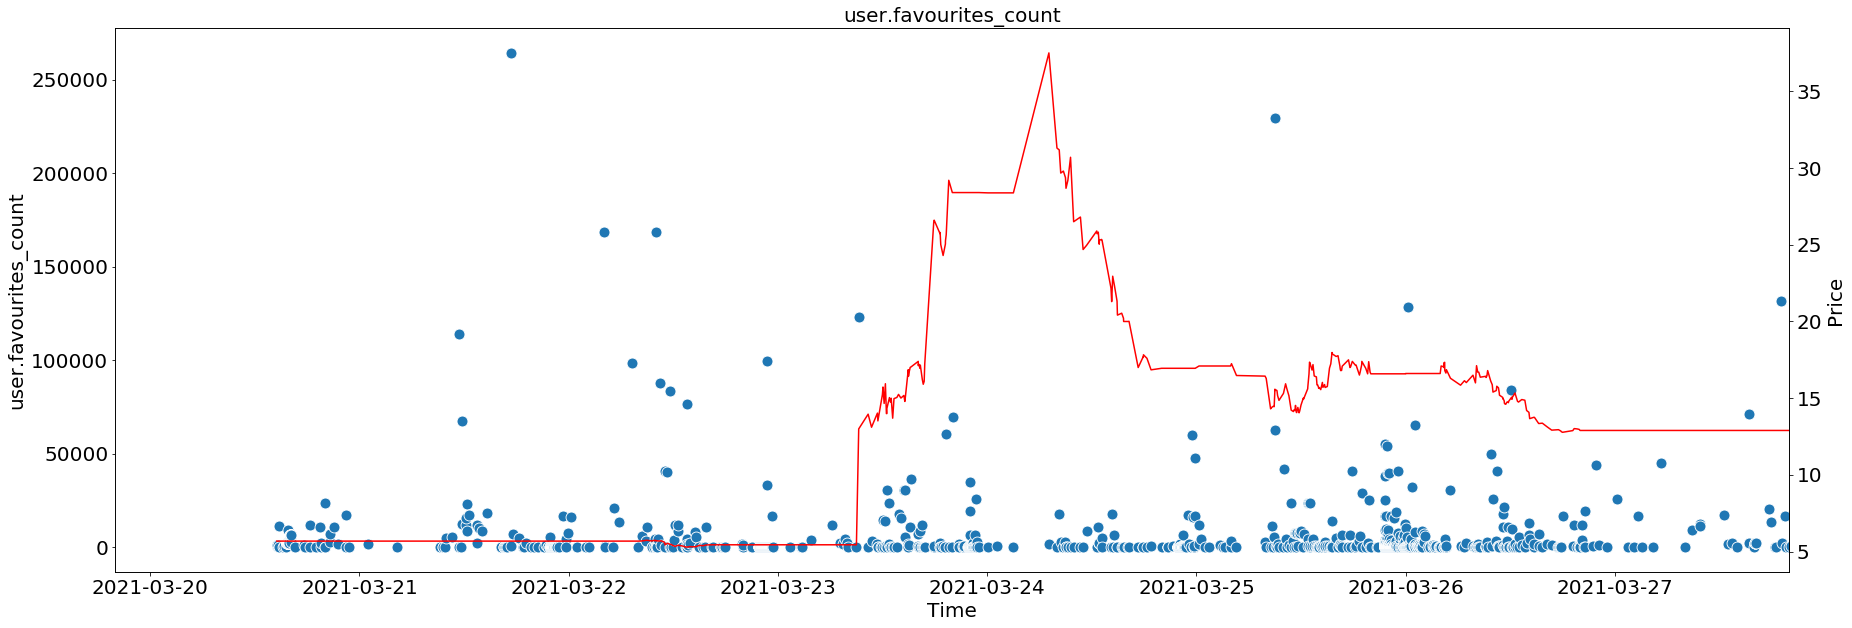

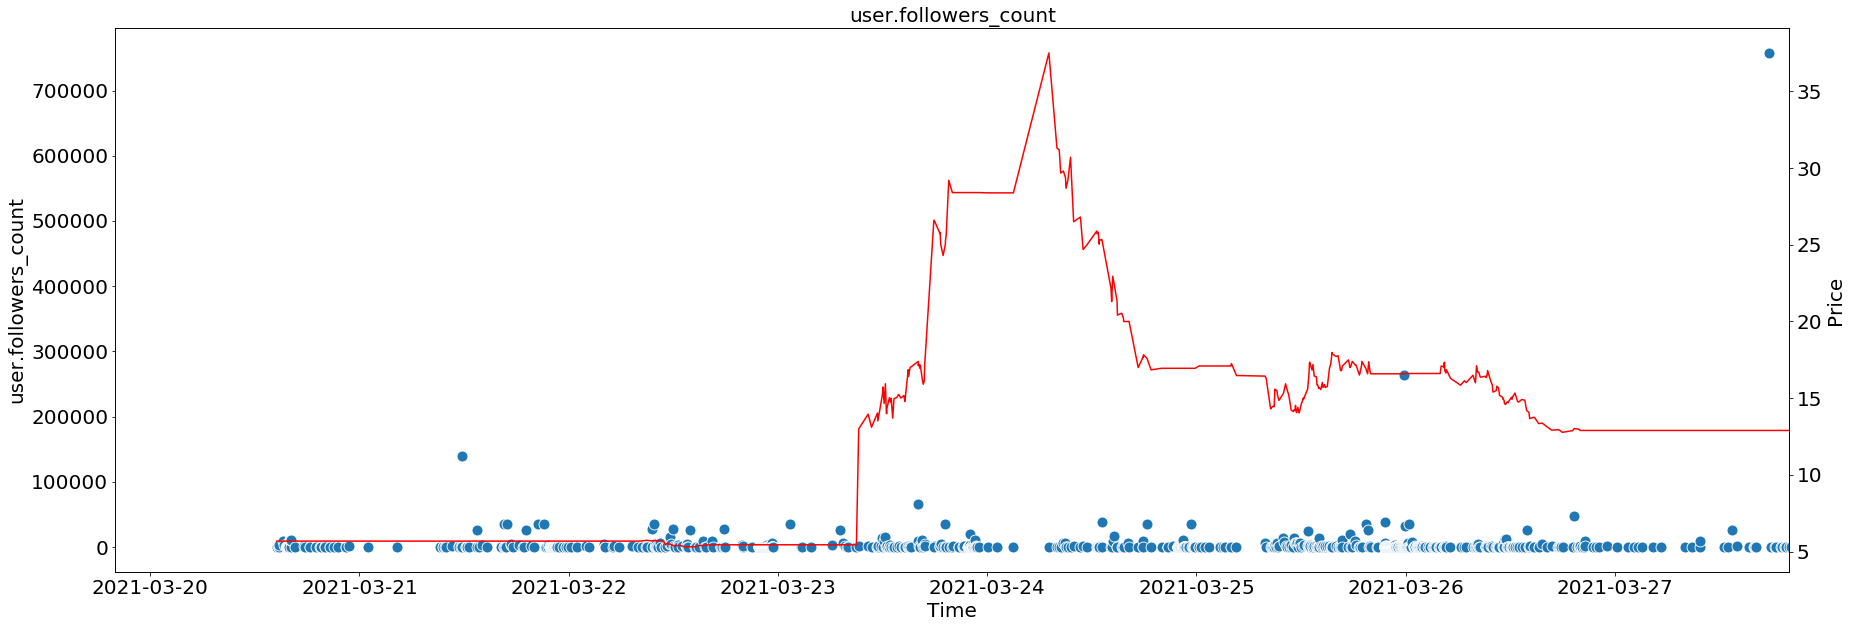

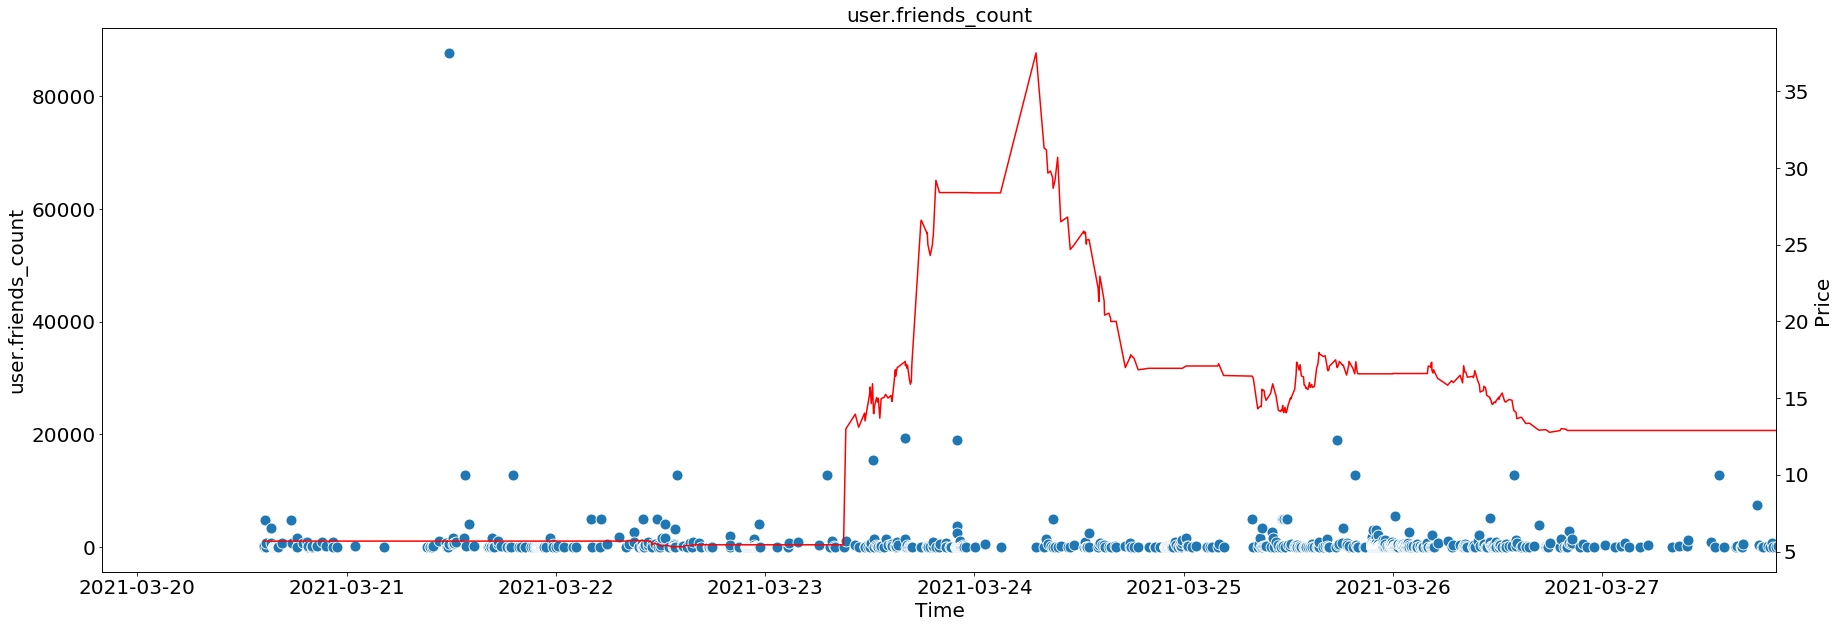

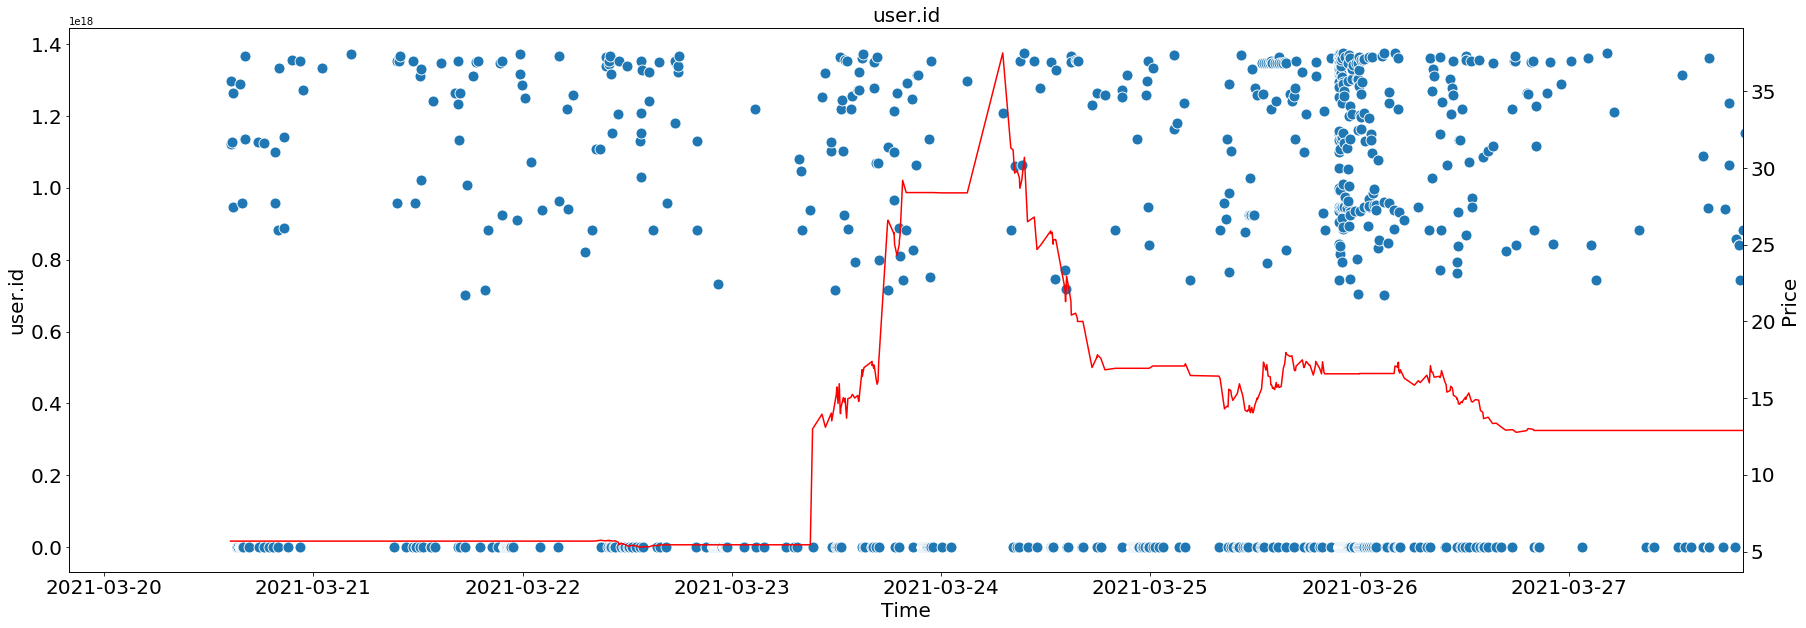

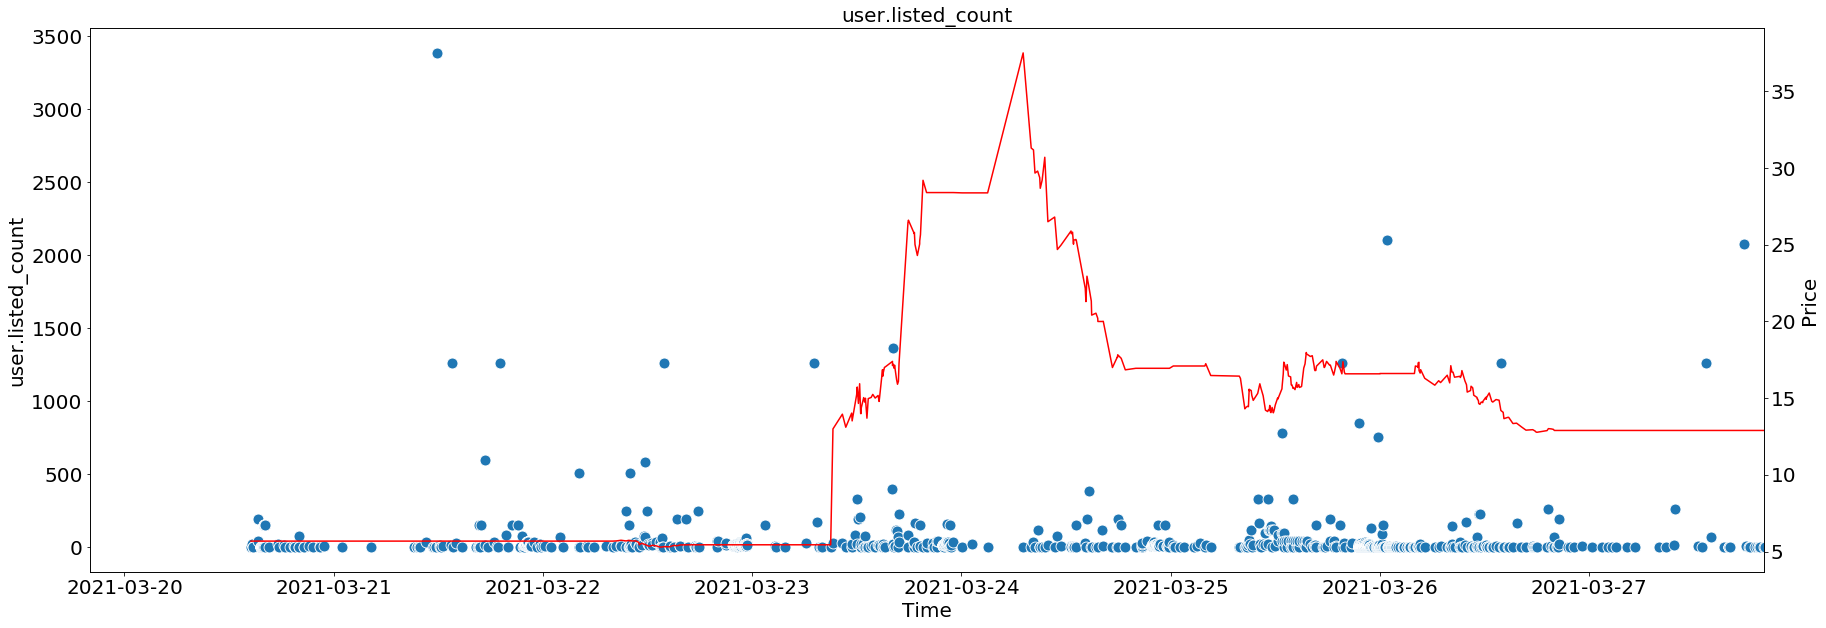

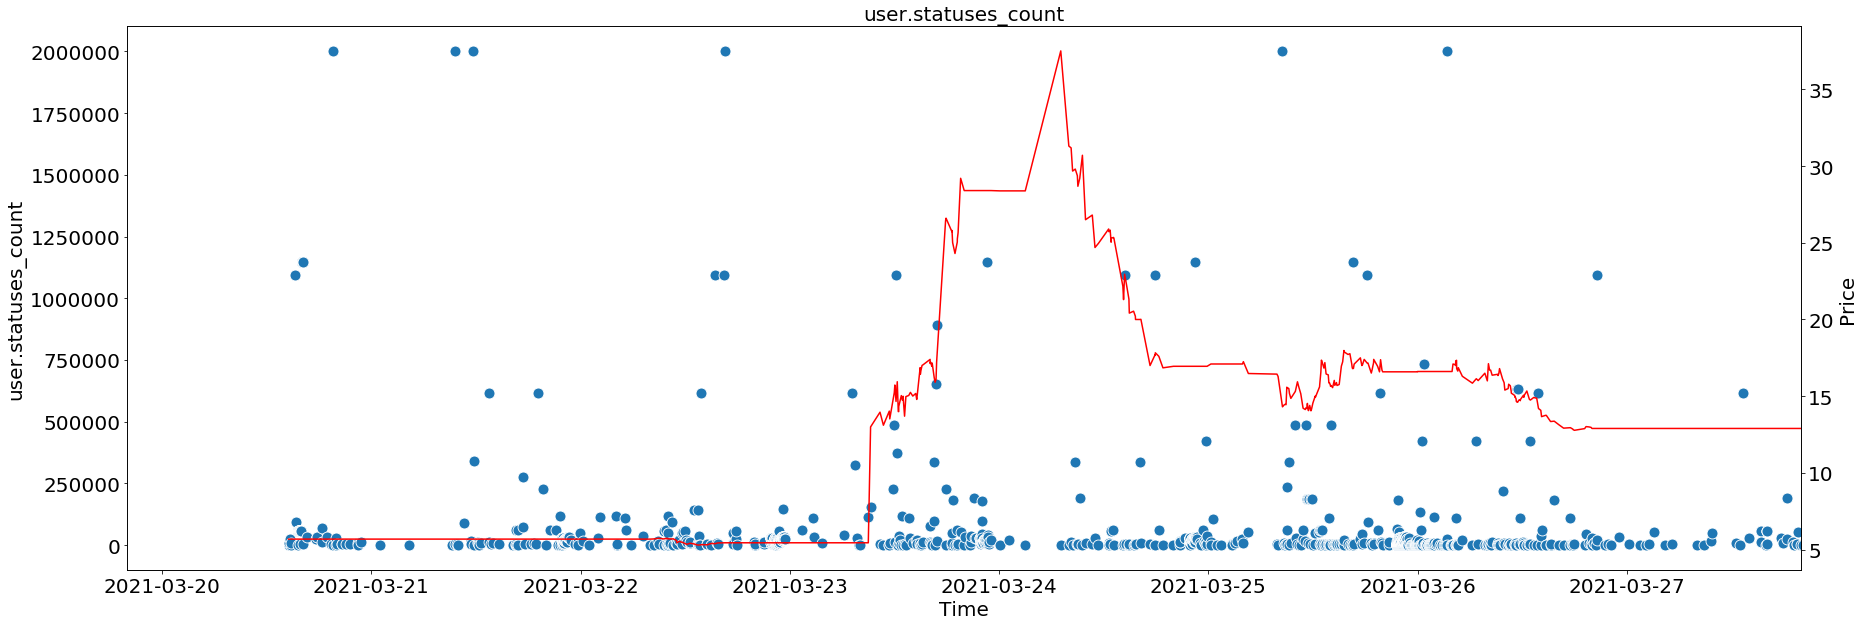

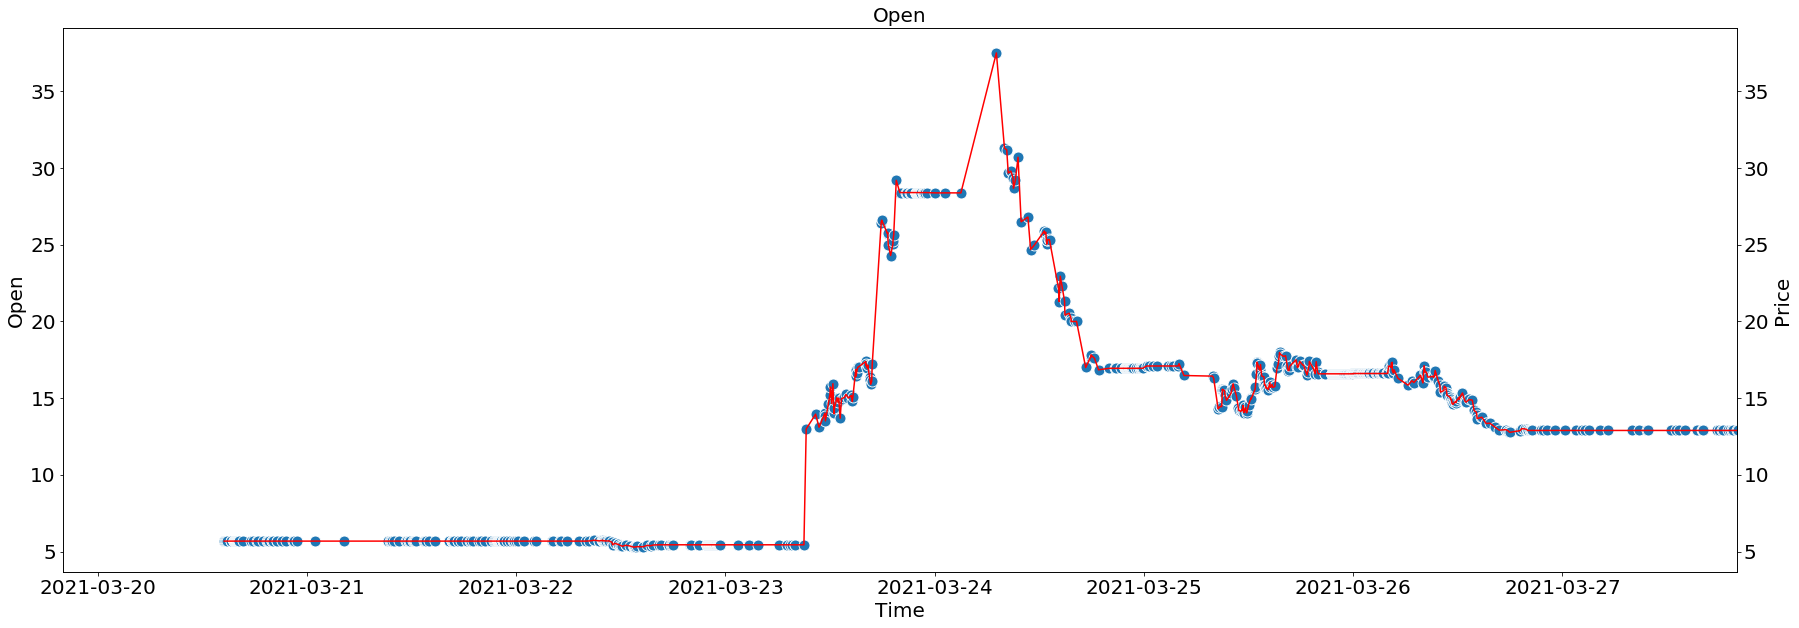

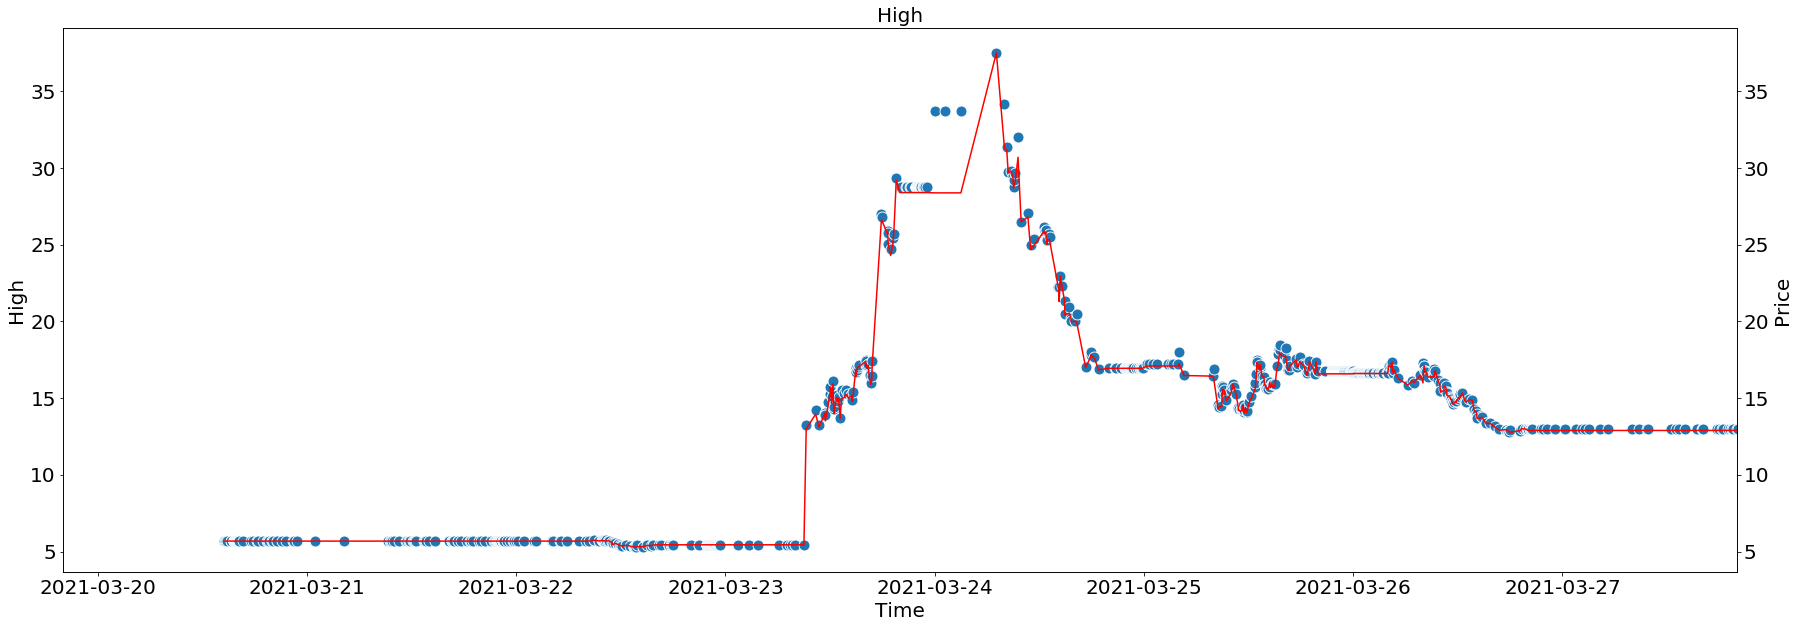

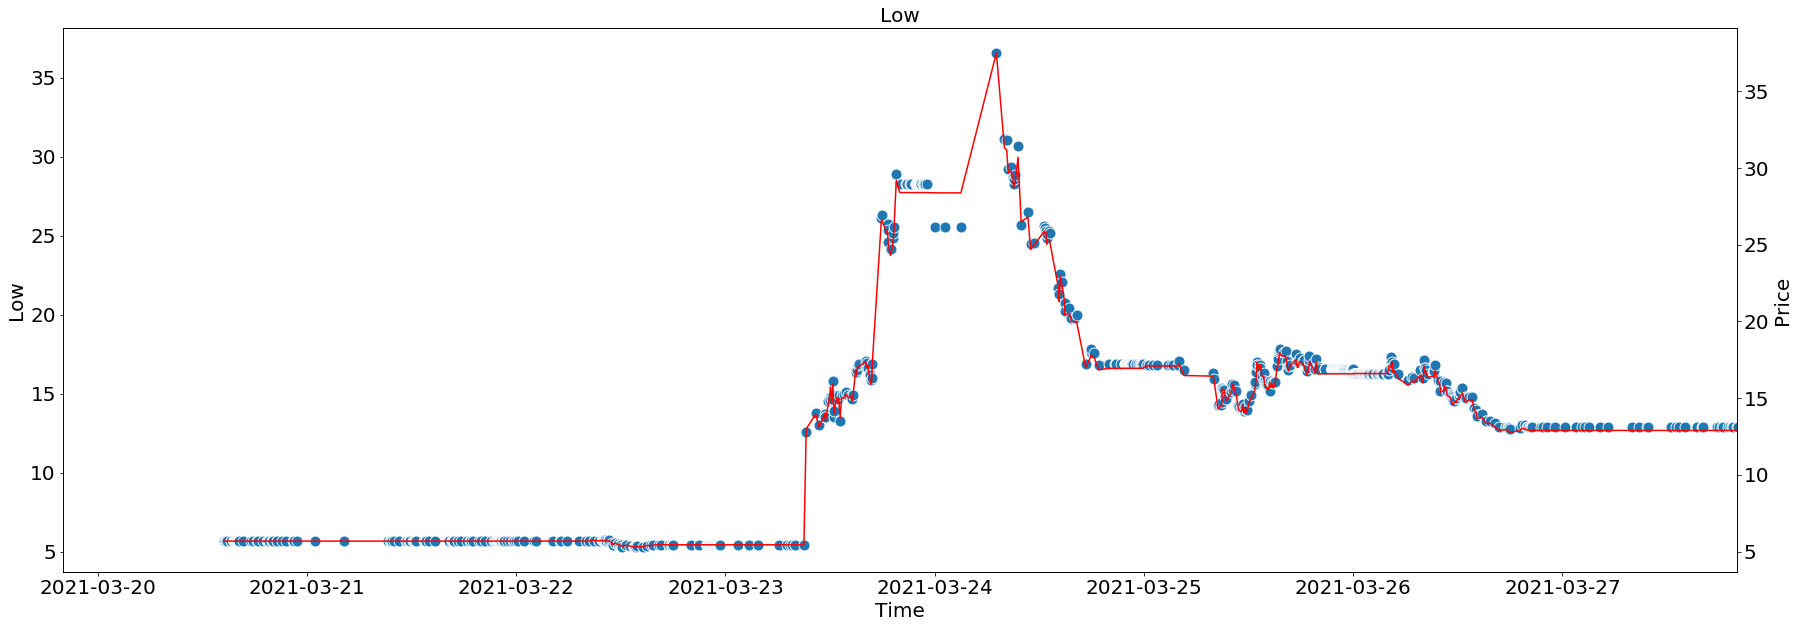

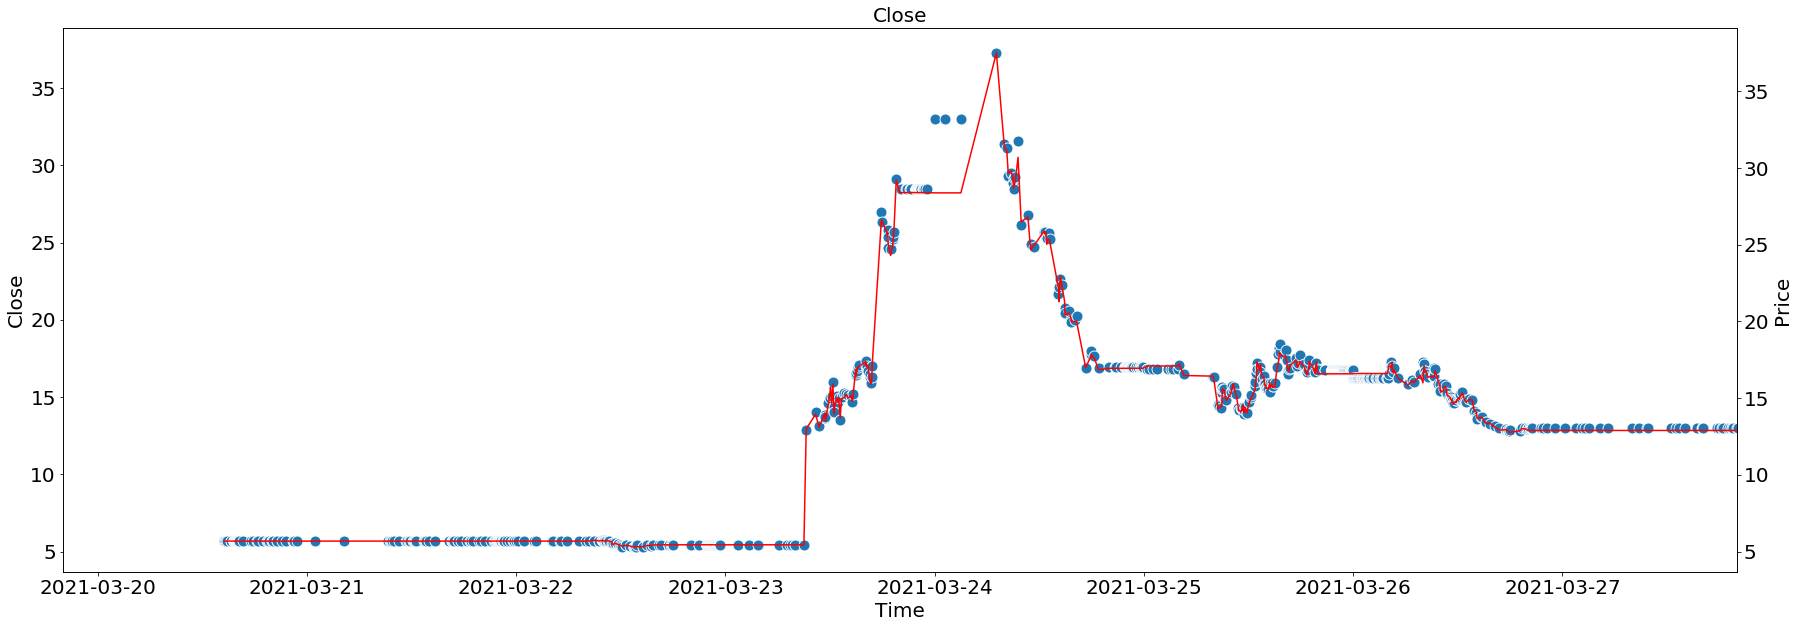

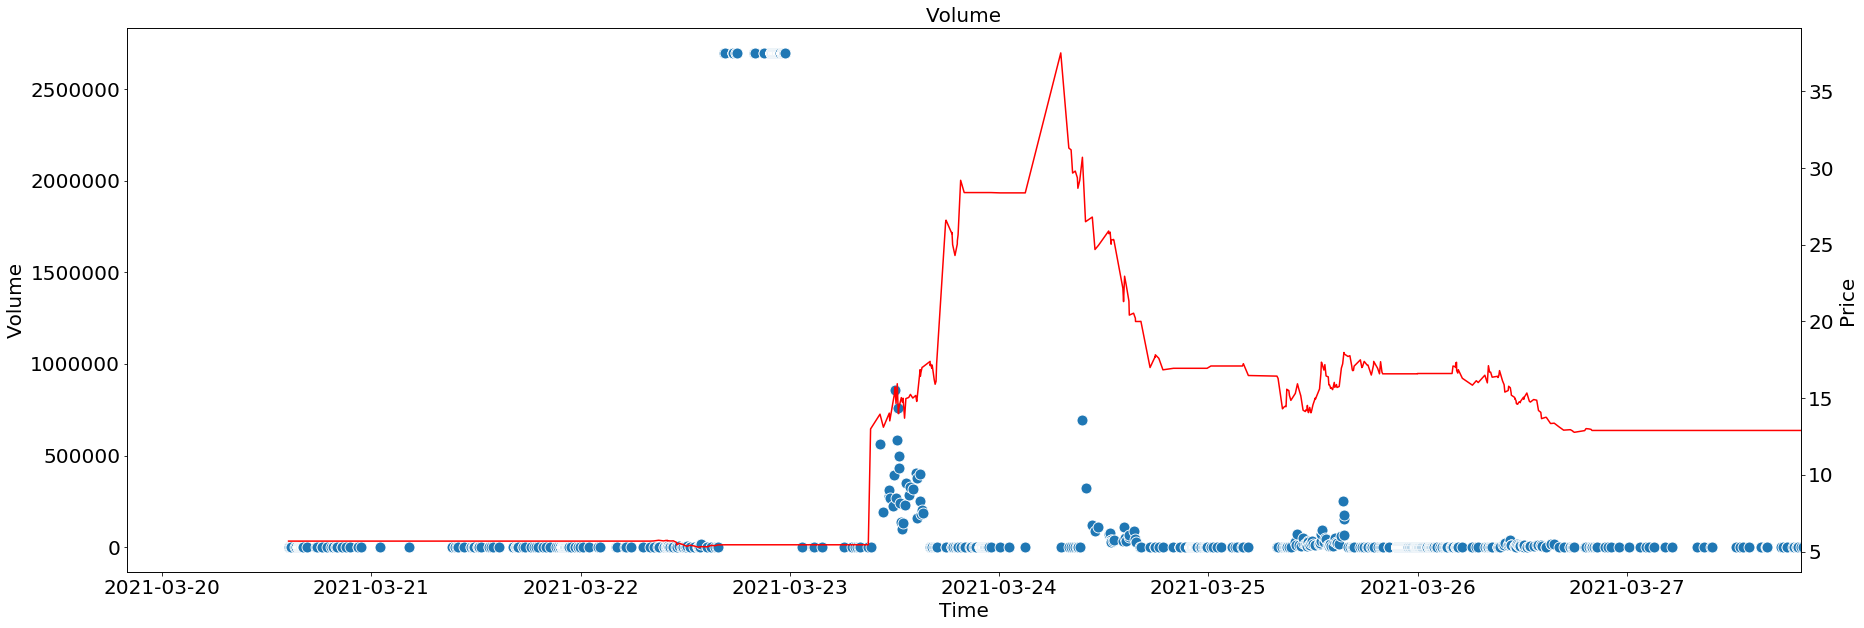

In [71]:
for col in twitter_stonks_num.columns:
    plot_vs_price(twitter_stonks, col, '2021-03-20', '2021-03-28')